In [1]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [4]:
pwd

'/content/drive/MyDrive/recommandation_systems'

In [3]:
cd /content/drive/MyDrive/recommandation_systems

/content/drive/MyDrive/recommandation_systems


In [8]:
import pyforest

In [10]:
df=pd.read_csv('flipkartdata.csv')
df

<IPython.core.display.Javascript object>

,image,brand,item,color,price,discount_price,discount,category
0,https://rukminim2.flixcart.com/image/329/395/k...,Toriox,"Woven, Embroidered, Checkered Banarasi Jacquar...",Orange,₹599,"₹2,599",76% off,sarees
1,https://rukminim2.flixcart.com/image/329/395/k...,kashvi sarees,Printed Daily Wear Georgette Saree,Black,₹186,"₹1,299",85% off,sarees
2,https://rukminim2.flixcart.com/image/329/395/k...,Krishna R fashion,Embroidered Bollywood Vichitra Saree,"Red, Grey",₹399,"₹3,999",90% off,sarees
3,https://rukminim2.flixcart.com/image/329/395/k...,vasundhra fashion,Embroidered Bollywood Cotton Silk Saree,Light Blue,₹399,"₹2,000",80% off,sarees
4,https://rukminim2.flixcart.com/image/329/395/k...,RHEY,Printed Daily Wear Chiffon Saree,Black,₹263,"₹1,999",86% off,sarees
...,...,...,...,...,...,...,...,...
4155,https://rukminim2.flixcart.com/image/329/395/k...,ABS FAB,Embroidered Cotton Silk Semi Stitched Anarkali...,Multicolor,₹699,"₹1,599",56% off,gowns
4156,https://rukminim2.flixcart.com/image/329/395/k...,MAYERO,Solid Rayon Blend Stitched Anarkali Gown,Purple,₹231,₹999,76% off,gowns
4157,https://rukminim2.flixcart.com/image/329/395/k...,Ameliya designer,Embroidered Art Silk Semi Stitched Anarkali Gown,Dark Blue,₹279,"₹1,199",76% off,gowns
4158,https://rukminim2.flixcart.com/image/329/395/k...,Fashionuma,"Embroidered Georgette Blend, Net Semi Stitched...",Black,"₹1,849","₹4,999",63% off,gowns


In [11]:
from urllib.request import urlopen
from PIL import Image

url = 'https://rukminim2.flixcart.com/image/329/395/j9oiufk0/sari/3/p/y/free-a15-bandhani-mehndi-flower-firozi-gold-aqua-best-seller-original-imaezeznd7vfnxbz.jpeg?q=50'

img = Image.open(urlopen(url))
image=np.array(img)

<IPython.core.display.Javascript object>

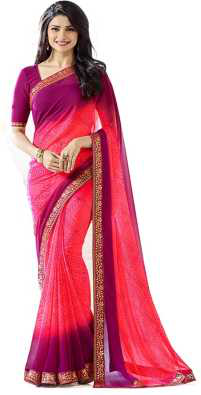

In [12]:
img

In [15]:
import tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle

In [16]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

#print(model.summary())

def extract_features(img_url,model):
    img = Image.open(urlopen(img_url))
    # print(img1)
    # img = image.load_img(img_path,target_size=(224,224))
    # img = image.load_img(img,target_size=(224,224))

    img_array = image.img_to_array(img)
    img_array= tf.image.resize(img_array, [224,224]).numpy()

    # print(img_array)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result

In [17]:
filenames = []
for i in df['image']:
  filenames.append(i)
filenames


['https://rukminim2.flixcart.com/image/329/395/kjbr8280-0/sari/r/x/m/free-rebit-lichi-toriox-semi-stitched-original-imafywymdhjjxrwz.jpeg?q=50',
 'https://rukminim2.flixcart.com/image/329/395/kqgyhe80/sari/z/j/t/free-greyt-1152-1-kashvi-sarees-unstitched-original-imag4h6mft9kydgv.jpeg?q=50',
 'https://rukminim2.flixcart.com/image/329/395/kx9as280/sari/u/2/3/free-kajal-krishna-r-fashion-unstitched-original-imag9r7w2uggsqrj.jpeg?q=50',
 'https://rukminim2.flixcart.com/image/329/395/ke5zzbk0-0/sari/a/u/7/free-embroidery-saree-fancy-lifestyle-unstitched-original-imafuwkazsm3zqq3.jpeg?q=50',
 'https://rukminim2.flixcart.com/image/329/395/kbgu1e80/sari/2/r/h/free-box04bn-rhey-unstitched-original-imafssh49zejvhpx.jpeg?q=50',
 'https://rukminim2.flixcart.com/image/329/395/k7c88sw0/sari/j/z/y/free-ladli-krishna-r-fashion-original-imafphxuxmkutnt8.jpeg?q=50',
 'https://rukminim2.flixcart.com/image/329/395/kwwfte80/sari/t/q/e/free-grey-1682-1-kashvi-sarees-unstitched-original-imag9ha5ff4fpz9u.jpe

In [18]:

l=[]
for i in tqdm(filenames):
  print(i)
  l.append(extract_features(i,model))

  0%|          | 0/4160 [00:00<?, ?it/s]

https://rukminim2.flixcart.com/image/329/395/kjbr8280-0/sari/r/x/m/free-rebit-lichi-toriox-semi-stitched-original-imafywymdhjjxrwz.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 1/4160 [00:01<2:04:30,  1.80s/it]

https://rukminim2.flixcart.com/image/329/395/kqgyhe80/sari/z/j/t/free-greyt-1152-1-kashvi-sarees-unstitched-original-imag4h6mft9kydgv.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 2/4160 [00:02<1:05:22,  1.06it/s]

https://rukminim2.flixcart.com/image/329/395/kx9as280/sari/u/2/3/free-kajal-krishna-r-fashion-unstitched-original-imag9r7w2uggsqrj.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 3/4160 [00:03<1:04:41,  1.07it/s]

https://rukminim2.flixcart.com/image/329/395/ke5zzbk0-0/sari/a/u/7/free-embroidery-saree-fancy-lifestyle-unstitched-original-imafuwkazsm3zqq3.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 4/4160 [00:03<47:46,  1.45it/s]  

https://rukminim2.flixcart.com/image/329/395/kbgu1e80/sari/2/r/h/free-box04bn-rhey-unstitched-original-imafssh49zejvhpx.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 5/4160 [00:04<50:13,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/k7c88sw0/sari/j/z/y/free-ladli-krishna-r-fashion-original-imafphxuxmkutnt8.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 6/4160 [00:04<47:18,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kwwfte80/sari/t/q/e/free-grey-1682-1-kashvi-sarees-unstitched-original-imag9ha5ff4fpz9u.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 7/4160 [00:05<50:10,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/k12go7k0/sari/p/h/c/free-bd030-bollydoll-designer-original-imafgjen5kwbudbm.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 8/4160 [00:06<50:24,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kbgu1e80/sari/5/k/y/free-box05bn-rhey-unstitched-original-imafssh4zubgvwz9.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 9/4160 [00:07<52:21,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kyhlfgw0/sari/e/e/q/free-1694s128-1770s401-1694s127-samah-unstitched-original-imagapezfrmyfsye.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 10/4160 [00:07<50:45,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kjkbv680-0/sari/e/s/t/free-wedding-sarees-vaidehi-fashion-unstitched-original-imafz3zfpjpnrqrn.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 11/4160 [00:08<49:54,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0-0/sari/o/y/c/free-hitesh2series-fumvel-unstitched-original-imafwypg4fwky3a7.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 12/4160 [00:09<48:17,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/k5zn9u80/sari/u/n/t/free-svf1468-3-a-jabali-enterprise-original-imafdfszdcpvcwrp.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 13/4160 [00:09<47:35,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/knan98w0/sari/s/v/q/free-vs-507-1-leelavati-unstitched-original-imag2y9vgxpzme3j.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 14/4160 [00:11<1:04:32,  1.07it/s]

https://rukminim2.flixcart.com/image/329/395/k4ss2a80/sari/s/e/b/free-1051b-fashion-day-original-imafnmt93zgkktmz.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 15/4160 [00:11<58:53,  1.17it/s]  

https://rukminim2.flixcart.com/image/329/395/knxiavk0/sari/n/o/r/free-grey-lf-1001-laheja-unstitched-original-imag2gyqbphsgscd.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 16/4160 [00:13<1:06:01,  1.05it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0-0/sari/o/y/c/free-hitesh2series-fumvel-unstitched-original-imafwypg4fwky3a7.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 17/4160 [00:13<52:35,  1.31it/s]  

https://rukminim2.flixcart.com/image/329/395/kfmv9u80-0/sari/m/v/n/free-combo-as-1134-1-1152-4-kashvi-sarees-unstitched-original-imafwfrqnrkqc2ec.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 18/4160 [00:14<1:04:48,  1.07it/s]

https://rukminim2.flixcart.com/image/329/395/kxm5qq80/lehenga-choli/s/d/m/free-na-silk-lahenga-choli-prihal-art-original-imagafycnf3ugbvf.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 19/4160 [00:15<1:07:07,  1.03it/s]

https://rukminim2.flixcart.com/image/329/395/kuvkcy80/sari/p/3/5/free-kj-1164-2-kashvi-sarees-unstitched-original-imag7whhancgwkzv.jpeg?q=50


<IPython.core.display.Javascript object>

  0%|          | 20/4160 [00:17<1:16:41,  1.11s/it]

https://rukminim2.flixcart.com/image/329/395/kfikya80-0/sari/m/u/u/free-mc-171-minakshi-creation-unstitched-original-imafvyczzxaz4ger.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 21/4160 [00:18<1:18:36,  1.14s/it]

https://rukminim2.flixcart.com/image/329/395/k3xcdjk0pkrrdj/sari/3/q/x/free-green-vjs366-2-v-j-fashion-vjs366-2-original-imafn2zzhg3vbfxy.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 22/4160 [00:20<1:27:37,  1.27s/it]

https://rukminim2.flixcart.com/image/329/395/k7m8brk0/sari/y/p/q/free-mfs-66-black-mahalaxmi-fashion-unstitched-original-imafpt5nerdsufv8.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 23/4160 [00:21<1:38:01,  1.42s/it]

https://rukminim2.flixcart.com/image/329/395/k23m4cw0/sari/w/5/w/free-mor-skyblue-radadiyatrd-original-imafhgqfbfq7fmck.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 24/4160 [00:23<1:45:41,  1.53s/it]

https://rukminim2.flixcart.com/image/329/395/kqpj4i80/sari/o/5/1/free-chainlacesaree-qvidya-unstitched-original-imag4nzsz27v6pk3.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 25/4160 [00:25<1:43:59,  1.51s/it]

https://rukminim2.flixcart.com/image/329/395/kgcl7680-0/sari/m/t/4/free-blue-velvet003-foogfeb-unstitched-original-imafwhv4hwzf43yg.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 26/4160 [00:26<1:49:54,  1.60s/it]

https://rukminim2.flixcart.com/image/329/395/l02r1jk0/sari/0/1/p/free-2329sj781-siril-unstitched-original-imagbxxwcjqgyvzu.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 27/4160 [00:28<1:54:34,  1.66s/it]

https://rukminim2.flixcart.com/image/329/395/j13vqfk0/sari/q/h/h/1-free-siyan2-9006-shaily-retails-1-original-imaeskkjmzknnzud.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 28/4160 [00:30<1:47:43,  1.56s/it]

https://rukminim2.flixcart.com/image/329/395/kxaq7ww0/sari/o/k/q/free-grey-1692-6-kashvi-sarees-unstitched-original-imag9s7ggsjw2gcn.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 29/4160 [00:31<1:48:34,  1.58s/it]

https://rukminim2.flixcart.com/image/329/395/kay9bbk0/sari/a/s/z/free-1262-5-kashvi-sarees-unstitched-original-imafsepbpnpbxgsz.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 30/4160 [00:33<1:47:43,  1.57s/it]

https://rukminim2.flixcart.com/image/329/395/kuef2q80/sari/d/l/v/free-s189392-fabwomen-unstitched-original-imag7j5npbxdzkhq.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 31/4160 [00:33<1:30:40,  1.32s/it]

https://rukminim2.flixcart.com/image/329/395/k66sh3k0/sari/5/t/8/free-pari-24-maroon-dharm-enterprises-original-imafbb2hvzxqhs3x.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 32/4160 [00:35<1:37:30,  1.42s/it]

https://rukminim2.flixcart.com/image/329/395/kxp0mfk0/sari/u/a/l/free-brassosari-lorofy-unstitched-original-imaga39xczu7fcgt.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 33/4160 [00:37<1:39:37,  1.45s/it]

https://rukminim2.flixcart.com/image/329/395/kqpj4i80/sari/2/t/1/free-chainlacesaree-qvidya-unstitched-original-imag4numztzgk8rk.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 34/4160 [00:37<1:17:06,  1.12s/it]

https://rukminim2.flixcart.com/image/329/395/kq6yefk0/sari/1/n/s/free-kalki-kedar-fab-unstitched-original-imag49jxxbqbdf2x.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 35/4160 [00:38<1:06:29,  1.03it/s]

https://rukminim2.flixcart.com/image/329/395/k3xcdjk0pkrrdj/sari/h/q/e/free-black-goli-black-ashvmegh-goli-black-original-imafn2tcjk78bsuj.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 36/4160 [00:39<1:19:02,  1.15s/it]

https://rukminim2.flixcart.com/image/329/395/k4d27ww0/sari/f/s/k/free-new-more-kanjivaram-fashion-anusuya-saree-original-imafgvemre4fcxy6.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 37/4160 [00:40<1:14:27,  1.08s/it]

https://rukminim2.flixcart.com/image/329/395/kex5ci80-0/sari/0/d/q/free-bhatia-1-kyrila-unstitched-original-imafvhgyyzgs88ca.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 38/4160 [00:41<1:18:33,  1.14s/it]

https://rukminim2.flixcart.com/image/329/395/kjym9ow0/sari/x/s/j/free-d-n-101-ahiranifashion-unstitched-original-imafzf4uzupdzbah.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 39/4160 [00:42<1:09:43,  1.02s/it]

https://rukminim2.flixcart.com/image/329/395/kuef2q80/sari/r/d/q/free-s185469-wt-fabwomen-unstitched-original-imag7j6wqz5fgdtb.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 40/4160 [00:43<1:08:54,  1.00s/it]

https://rukminim2.flixcart.com/image/329/395/kjbr8280-0/sari/r/x/m/free-rebit-lichi-toriox-semi-stitched-original-imafywymdhjjxrwz.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 41/4160 [00:43<55:15,  1.24it/s]  

https://rukminim2.flixcart.com/image/329/395/kqgyhe80/sari/z/j/t/free-greyt-1152-1-kashvi-sarees-unstitched-original-imag4h6mft9kydgv.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 42/4160 [00:44<46:12,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kx9as280/sari/u/2/3/free-kajal-krishna-r-fashion-unstitched-original-imag9r7w2uggsqrj.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 43/4160 [00:44<39:00,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/ke5zzbk0-0/sari/a/u/7/free-embroidery-saree-fancy-lifestyle-unstitched-original-imafuwkazsm3zqq3.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 44/4160 [00:44<34:02,  2.01it/s]

https://rukminim2.flixcart.com/image/329/395/kbgu1e80/sari/2/r/h/free-box04bn-rhey-unstitched-original-imafssh49zejvhpx.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 45/4160 [00:45<30:28,  2.25it/s]

https://rukminim2.flixcart.com/image/329/395/k7c88sw0/sari/j/z/y/free-ladli-krishna-r-fashion-original-imafphxuxmkutnt8.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 46/4160 [00:45<27:26,  2.50it/s]

https://rukminim2.flixcart.com/image/329/395/kwwfte80/sari/t/q/e/free-grey-1682-1-kashvi-sarees-unstitched-original-imag9ha5ff4fpz9u.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 47/4160 [00:45<25:05,  2.73it/s]

https://rukminim2.flixcart.com/image/329/395/k12go7k0/sari/p/h/c/free-bd030-bollydoll-designer-original-imafgjen5kwbudbm.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 48/4160 [00:46<23:45,  2.88it/s]

https://rukminim2.flixcart.com/image/329/395/kbgu1e80/sari/5/k/y/free-box05bn-rhey-unstitched-original-imafssh4zubgvwz9.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 49/4160 [00:46<22:55,  2.99it/s]

https://rukminim2.flixcart.com/image/329/395/kyhlfgw0/sari/e/e/q/free-1694s128-1770s401-1694s127-samah-unstitched-original-imagapezfrmyfsye.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 50/4160 [00:46<22:03,  3.11it/s]

https://rukminim2.flixcart.com/image/329/395/kjkbv680-0/sari/e/s/t/free-wedding-sarees-vaidehi-fashion-unstitched-original-imafz3zfpjpnrqrn.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|          | 51/4160 [00:47<22:25,  3.05it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0-0/sari/o/y/c/free-hitesh2series-fumvel-unstitched-original-imafwypg4fwky3a7.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|▏         | 52/4160 [00:47<22:35,  3.03it/s]

https://rukminim2.flixcart.com/image/329/395/k5zn9u80/sari/u/n/t/free-svf1468-3-a-jabali-enterprise-original-imafdfszdcpvcwrp.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|▏         | 53/4160 [00:47<22:01,  3.11it/s]

https://rukminim2.flixcart.com/image/329/395/knan98w0/sari/s/v/q/free-vs-507-1-leelavati-unstitched-original-imag2y9vgxpzme3j.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|▏         | 54/4160 [00:48<22:05,  3.10it/s]

https://rukminim2.flixcart.com/image/329/395/k4ss2a80/sari/s/e/b/free-1051b-fashion-day-original-imafnmt93zgkktmz.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|▏         | 55/4160 [00:48<21:32,  3.18it/s]

https://rukminim2.flixcart.com/image/329/395/knxiavk0/sari/n/o/r/free-grey-lf-1001-laheja-unstitched-original-imag2gyqbphsgscd.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|▏         | 56/4160 [00:48<21:26,  3.19it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0-0/sari/o/y/c/free-hitesh2series-fumvel-unstitched-original-imafwypg4fwky3a7.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|▏         | 57/4160 [00:48<21:14,  3.22it/s]

https://rukminim2.flixcart.com/image/329/395/kfmv9u80-0/sari/m/v/n/free-combo-as-1134-1-1152-4-kashvi-sarees-unstitched-original-imafwfrqnrkqc2ec.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|▏         | 58/4160 [00:49<20:55,  3.27it/s]

https://rukminim2.flixcart.com/image/329/395/kxm5qq80/lehenga-choli/s/d/m/free-na-silk-lahenga-choli-prihal-art-original-imagafycnf3ugbvf.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|▏         | 59/4160 [00:49<21:11,  3.22it/s]

https://rukminim2.flixcart.com/image/329/395/kuvkcy80/sari/p/3/5/free-kj-1164-2-kashvi-sarees-unstitched-original-imag7whhancgwkzv.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|▏         | 60/4160 [00:49<21:28,  3.18it/s]

https://rukminim2.flixcart.com/image/329/395/kfikya80-0/sari/m/u/u/free-mc-171-minakshi-creation-unstitched-original-imafvyczzxaz4ger.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|▏         | 61/4160 [00:50<21:13,  3.22it/s]

https://rukminim2.flixcart.com/image/329/395/k3xcdjk0pkrrdj/sari/3/q/x/free-green-vjs366-2-v-j-fashion-vjs366-2-original-imafn2zzhg3vbfxy.jpeg?q=50


<IPython.core.display.Javascript object>

  1%|▏         | 62/4160 [00:50<21:04,  3.24it/s]

https://rukminim2.flixcart.com/image/329/395/k7m8brk0/sari/y/p/q/free-mfs-66-black-mahalaxmi-fashion-unstitched-original-imafpt5nerdsufv8.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 63/4160 [00:50<20:27,  3.34it/s]

https://rukminim2.flixcart.com/image/329/395/k23m4cw0/sari/w/5/w/free-mor-skyblue-radadiyatrd-original-imafhgqfbfq7fmck.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 64/4160 [00:51<20:27,  3.34it/s]

https://rukminim2.flixcart.com/image/329/395/kqpj4i80/sari/o/5/1/free-chainlacesaree-qvidya-unstitched-original-imag4nzsz27v6pk3.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 65/4160 [00:51<20:12,  3.38it/s]

https://rukminim2.flixcart.com/image/329/395/kgcl7680-0/sari/m/t/4/free-blue-velvet003-foogfeb-unstitched-original-imafwhv4hwzf43yg.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 66/4160 [00:51<20:31,  3.32it/s]

https://rukminim2.flixcart.com/image/329/395/l02r1jk0/sari/0/1/p/free-2329sj781-siril-unstitched-original-imagbxxwcjqgyvzu.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 67/4160 [00:52<21:12,  3.22it/s]

https://rukminim2.flixcart.com/image/329/395/j13vqfk0/sari/q/h/h/1-free-siyan2-9006-shaily-retails-1-original-imaeskkjmzknnzud.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 68/4160 [00:52<20:38,  3.30it/s]

https://rukminim2.flixcart.com/image/329/395/kxaq7ww0/sari/o/k/q/free-grey-1692-6-kashvi-sarees-unstitched-original-imag9s7ggsjw2gcn.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 69/4160 [00:52<20:30,  3.32it/s]

https://rukminim2.flixcart.com/image/329/395/kay9bbk0/sari/a/s/z/free-1262-5-kashvi-sarees-unstitched-original-imafsepbpnpbxgsz.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 70/4160 [00:52<20:28,  3.33it/s]

https://rukminim2.flixcart.com/image/329/395/kuef2q80/sari/d/l/v/free-s189392-fabwomen-unstitched-original-imag7j5npbxdzkhq.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 71/4160 [00:53<20:34,  3.31it/s]

https://rukminim2.flixcart.com/image/329/395/k66sh3k0/sari/5/t/8/free-pari-24-maroon-dharm-enterprises-original-imafbb2hvzxqhs3x.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 72/4160 [00:53<20:50,  3.27it/s]

https://rukminim2.flixcart.com/image/329/395/kxp0mfk0/sari/u/a/l/free-brassosari-lorofy-unstitched-original-imaga39xczu7fcgt.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 73/4160 [00:53<20:59,  3.24it/s]

https://rukminim2.flixcart.com/image/329/395/kqpj4i80/sari/2/t/1/free-chainlacesaree-qvidya-unstitched-original-imag4numztzgk8rk.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 74/4160 [00:54<20:44,  3.28it/s]

https://rukminim2.flixcart.com/image/329/395/kq6yefk0/sari/1/n/s/free-kalki-kedar-fab-unstitched-original-imag49jxxbqbdf2x.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 75/4160 [00:54<21:32,  3.16it/s]

https://rukminim2.flixcart.com/image/329/395/k3xcdjk0pkrrdj/sari/h/q/e/free-black-goli-black-ashvmegh-goli-black-original-imafn2tcjk78bsuj.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 76/4160 [00:54<21:08,  3.22it/s]

https://rukminim2.flixcart.com/image/329/395/k4d27ww0/sari/f/s/k/free-new-more-kanjivaram-fashion-anusuya-saree-original-imafgvemre4fcxy6.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 77/4160 [00:55<20:54,  3.25it/s]

https://rukminim2.flixcart.com/image/329/395/kex5ci80-0/sari/0/d/q/free-bhatia-1-kyrila-unstitched-original-imafvhgyyzgs88ca.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 78/4160 [00:55<20:48,  3.27it/s]

https://rukminim2.flixcart.com/image/329/395/kjym9ow0/sari/x/s/j/free-d-n-101-ahiranifashion-unstitched-original-imafzf4uzupdzbah.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 79/4160 [00:55<20:48,  3.27it/s]

https://rukminim2.flixcart.com/image/329/395/kuef2q80/sari/r/d/q/free-s185469-wt-fabwomen-unstitched-original-imag7j6wqz5fgdtb.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 80/4160 [00:55<20:46,  3.27it/s]

https://rukminim2.flixcart.com/image/329/395/ksru0sw0/sari/e/f/j/free-black-pari-p-shop-unstitched-original-imag69nhhg8khgmd.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 81/4160 [00:56<27:04,  2.51it/s]

https://rukminim2.flixcart.com/image/329/395/kqgyhe80/sari/c/5/w/free-greyt-1152-4-kashvi-sarees-unstitched-original-imag4h6mweebfhv9.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 82/4160 [00:57<34:40,  1.96it/s]

https://rukminim2.flixcart.com/image/329/395/k3xcdjk0pkrrdj/sari/s/y/a/free-blue-vjs1297-1-v-j-fashion-vjs1297-1-original-imafjfbrdrsx7xzm.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 83/4160 [00:58<37:12,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/kv2pk7k0/sari/q/x/t/free-s181131-aadvika-unstitched-original-imag824kznzfracy.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 84/4160 [00:58<42:21,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kqjtd3k0/sari/u/w/p/free-at-1108-1-kashvi-sarees-unstitched-original-imag4jepc36f9jdh.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 85/4160 [00:59<42:01,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/jsqe7bk0/sari/s/6/b/free-222-sareeopera-original-imaeygwtrbakpmhg.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 86/4160 [01:00<42:28,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/k2urhjk0/sari/c/9/d/free-saaho-rama-om-r-fashion-original-imafkr77wxu7eus2.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 87/4160 [01:00<42:01,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/ky7lci80hlty2aw/sari/x/c/n/5-5m-vinay-fashion-shoppershopee-original-imafa5f6y4vgvtyr.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 88/4160 [01:01<40:58,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/k5y7tzk0/sari/b/x/q/free-vs-197-blue-leelavati-original-imafzgnpqee8mppa.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 89/4160 [01:01<41:13,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kqfj1jk0/sari/s/k/8/free-greyt-1107-1-anand-sarees-unstitched-original-imag4g48hqgdsgzt.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 90/4160 [01:02<42:54,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/kz1lle80/shopsy-sari/t/o/v/free-richa-brasso-000005-no-brand-unstitched-original-imagaqsgxhz6ubag.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 91/4160 [01:03<42:09,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/k6wiefk0/sari/g/x/k/free-trio-1285-1287-1301-kashvi-sarees-original-imafp8vqfky69ghq.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 92/4160 [01:03<42:03,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/k0lbdzk0pkrrdj/sari/b/b/u/yellow-momi-netal-designer-original-imaf66r4qfdvakth.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 93/4160 [01:04<42:45,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kpsnzww0/sari/q/a/l/free-ton-combo-black-blue-omicron-fab-unstitched-original-imag3y7z2ttk4ssq.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 94/4160 [01:05<43:16,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/ktketu80/sari/s/7/i/free-grey-kb-1630-1-anand-sarees-unstitched-original-imag6w4j4fhgqgzy.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 95/4160 [01:05<45:00,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kjbr8280-0/sari/x/p/2/free-rebit-lichi-toriox-semi-stitched-original-imafywymhk7mdshj.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 96/4160 [01:06<49:00,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kt4ozgw0/sari/g/d/b/free-polka-dot-gold-best-seller-sexy-bollywood-stylish-budget-original-imag6jfdamhwffrn.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 97/4160 [01:07<54:50,  1.23it/s]

https://rukminim2.flixcart.com/image/329/395/kz3118w0/sari/n/w/s/free-vs-5067-leelavati-unstitched-original-imagb66xzt6zvd3j.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 98/4160 [01:08<54:25,  1.24it/s]

https://rukminim2.flixcart.com/image/329/395/kxz0pe80/sari/d/3/n/free-shailja-pink-krishna-r-fashion-unstitched-original-imagab2kdhyfrjny.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 99/4160 [01:09<51:51,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/kwxv98w0/sari/i/a/h/free-grey-1682-6-anand-sarees-unstitched-original-imag9gcpwgq3wbwr.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 100/4160 [01:09<50:58,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/k7xnukw0/sari/e/8/d/free-khusi-krishna-r-fashion-unstitched-original-imafq22gfteg5gzh.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 101/4160 [01:10<48:22,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kqv8vww0/sari/s/c/d/free-n-60-firoji-anissa-saree-unstitched-original-imag4sk5eszxskpc.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 102/4160 [01:11<56:10,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/kpzt7680/sari/f/h/9/free-it0018-bd-pink-isha-textile-unstitched-original-imag43pn9qa5ehrz.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▏         | 103/4160 [01:12<1:01:11,  1.10it/s]

https://rukminim2.flixcart.com/image/329/395/krkyt8w0/sari/y/p/v/free-wedding-saree-ecolors-fab-unstitched-original-imag5c8efuhrjz9t.jpeg?q=50


<IPython.core.display.Javascript object>

  2%|▎         | 104/4160 [01:13<56:58,  1.19it/s]  

https://rukminim2.flixcart.com/image/329/395/ku79vgw0/sari/c/h/t/free-28562-mirchi-fashion-unstitched-original-imag7dtfjrtmgbth.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 105/4160 [01:14<55:30,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/jyhl1u80/sari/h/r/h/free-black-velvet-zalucreation-original-imaf9hbfxfqawbej.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 106/4160 [01:14<52:11,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/kfyasnk0-0/sari/o/p/b/free-ds-georgette-moti-navy-dream-style-unstitched-original-imafwbyfrducfcem.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 107/4160 [01:15<44:12,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kqgyhe80/sari/z/a/w/free-greyt-1152-2-kashvi-sarees-unstitched-original-imag4h6mrkjmcgfy.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 108/4160 [01:15<37:38,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/kfyasnk0-0/sari/g/l/p/free-ds-georgette-moti-black-dream-style-unstitched-original-imafwazzvj76hshb.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 109/4160 [01:16<40:05,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kbgu1e80/sari/z/k/f/free-box02bn-rhey-unstitched-original-imafssh4tkdb3y6p.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 110/4160 [01:16<44:16,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kz3118w0/sari/1/t/f/free-wedding-saree-krishna-r-fashion-unstitched-original-imagb6gqh2dhvffn.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 111/4160 [01:17<47:48,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kj4m0sw0-0/sari/e/t/f/free-shivani-kedar-fab-unstitched-original-imafyrchck9z4fmt.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 112/4160 [01:18<45:53,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/jt1tq4w0/sari/y/b/q/free-vjs1137-1-v-j-fashion-original-imafehhjshv3ntjr.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 113/4160 [01:19<45:22,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/k5h2jrk0/sari/x/h/b/free-butterfly-red-ditisa-fashion-original-imafnab873puwcvq.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 114/4160 [01:19<45:59,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kqpj4i80/sari/k/l/a/free-chainlacesaree-qvidya-unstitched-original-imag4nzvhhybn8df.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 115/4160 [01:20<49:11,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kdoup3k0-0/sari/l/2/v/free-bf-babypink-aroziya-unstitched-original-imafujekswywp7qm.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 116/4160 [01:21<46:47,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kn97te80/sari/l/d/n/free-1068-k-shaibo-saree-unstitched-original-imagfz7jpaquwduy.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 117/4160 [01:22<48:21,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/sari/w/c/l/free-mahek-saree-ejoty-fashion-unstitched-original-imag23m3mwejkhfc.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 118/4160 [01:22<48:06,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kuef2q80/sari/i/2/u/free-s189975-wt-fabwomen-unstitched-original-imag7j6wxkcyfuyz.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 119/4160 [01:23<52:01,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/krqoknk0/sari/i/p/z/free-losal-yellow-tereza-unstitched-original-imag5guyxyu5zyj7.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 120/4160 [01:24<54:38,  1.23it/s]

https://rukminim2.flixcart.com/image/329/395/kkyc9zk0/sari/s/s/0/free-tam-red-vasundhra-fashion-unstitched-original-imagy7yud2qzycsq.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 121/4160 [01:25<52:05,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/kq43iq80/sari/e/0/j/free-mk-zal-cosbila-fashion-unstitched-original-imag474v4rpqjzqz.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 122/4160 [01:26<1:00:06,  1.12it/s]

https://rukminim2.flixcart.com/image/329/395/ky3b0y80/sari/r/n/i/free-hetvi-heena-yellow-hetvi-fashion-unstitched-original-imagaekkeshe4j6w.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 123/4160 [01:27<1:00:17,  1.12it/s]

https://rukminim2.flixcart.com/image/329/395/kpmy8i80/sari/z/9/f/free-in-1005-gr-nimidiya-unstitched-original-imag3twntdunzfxr.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 124/4160 [01:27<54:09,  1.24it/s]  

https://rukminim2.flixcart.com/image/329/395/krqoknk0/sari/c/f/r/free-gulab-new-saree-anjavi-fashion-unstitched-original-imag5gqthy7pztr8.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 125/4160 [01:28<53:11,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/k3lwuq80/sari/v/w/d/free-bd-1-javalba-original-imafjzc3r7xpzpbk.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 126/4160 [01:29<54:45,  1.23it/s]

https://rukminim2.flixcart.com/image/329/395/kjabs7k0-0/sari/a/h/b/free-brasosari-lorofy-unstitched-original-imafyvdavr2hzyze.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 127/4160 [01:30<52:24,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/k1xwcy80/sari/y/w/p/free-jacquard-mor-blue-regolith-designer-sarees-original-imafkxmfc52swy9n.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 128/4160 [01:31<56:21,  1.19it/s]

https://rukminim2.flixcart.com/image/329/395/kkprmvk0/sari/e/y/x/free-tamnna-orange-vasundhra-fashion-unstitched-original-imafzzu2cqj3vwg7.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 129/4160 [01:31<52:34,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/ksoz53k0/sari/t/s/h/free-apsara-white-mallika-black-yashika-unstitched-original-imag67gvm8pxvduy.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 130/4160 [01:32<53:22,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/kmf7ki80/sari/v/f/5/free-wedding-sarees-vaidehi-fashion-unstitched-original-imagfbnykanvywet.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 131/4160 [01:33<56:28,  1.19it/s]

https://rukminim2.flixcart.com/image/329/395/l0o6nbk0/sari/z/v/9/free-sstd-nandi-moti-grey-hirexa-unstitched-original-imagceg9g64qqabg.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 132/4160 [01:34<56:02,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/kr83ukw0/sari/l/o/j/free-red-gold-marin-gold-best-seller-bollywood-stylish-budget-original-imag524pssnfhh2e.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 133/4160 [01:35<55:26,  1.21it/s]

https://rukminim2.flixcart.com/image/329/395/kksmikw0/sari/z/z/x/free-designer-clemira-unstitched-original-imagy25qcbqgvgwj.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 134/4160 [01:35<52:54,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/k65d18w0/sari/v/d/h/free-pari-6-r-blue-aryanik-designer-original-imaf7atftaaqufzd.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 135/4160 [01:36<50:13,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/kxf0jgw0/sari/7/d/g/free-red-patta-mor-royora-fashion-unstitched-original-imag9vhzsttqdpaz.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 136/4160 [01:37<52:31,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/l0o6nbk0/sari/t/v/m/free-6565-kishankanani-unstitched-original-imagcermav2sngng.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 137/4160 [01:38<57:26,  1.17it/s]

https://rukminim2.flixcart.com/image/329/395/ke7ff680-0/sari/h/4/v/free-as-1545-2-kashvi-sarees-unstitched-original-imafuyyscjkbfehv.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 138/4160 [01:39<53:41,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/kjym9ow0/sari/y/j/g/free-d-n-101-ahiranifashion-unstitched-original-imafzf4ud8thpxzv.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 139/4160 [01:39<51:53,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/km82d8w0/sari/7/b/9/free-prl-vrn-blue-wish-unstitched-original-imagf66cvzbdff4e.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 140/4160 [01:40<48:48,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/klfhk7k0/sari/8/k/s/free-velvet-blue-120-anugrah-textile-unstitched-original-imagykf7jfhv9vhh.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 141/4160 [01:41<47:08,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/ku2zjww0/sari/j/a/9/free-au-mb-baps-unstitched-original-imag7a4ggq3wmfak.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 142/4160 [01:41<45:30,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kxuqdu80/sari/y/5/e/free-ready2magenta-ksevencreation-unstitched-original-imaga7z5s2s4ytbr.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 143/4160 [01:42<46:05,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kf8kvbk0-0/sari/r/w/u/free-net-black-red-1-yara-creation-unstitched-original-imafvqv2mzqg2nvq.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 144/4160 [01:43<46:46,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kmxsakw0/sari/g/g/b/free-mahek-saree-ejoty-fashion-unstitched-original-imagfq7wkxamnhxx.jpeg?q=50


<IPython.core.display.Javascript object>

  3%|▎         | 145/4160 [01:44<1:03:58,  1.05it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/sari/5/0/k/free-mk-zal-cosbila-fashion-unstitched-original-imagbpgj83pvffj2.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▎         | 146/4160 [01:45<57:30,  1.16it/s]  

https://rukminim2.flixcart.com/image/329/395/kfikya80-0/sari/s/n/f/free-mc-174-minakshi-creation-unstitched-original-imafvycznqmyfyey.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▎         | 147/4160 [01:46<1:06:57,  1.00s/it]

https://rukminim2.flixcart.com/image/329/395/kx7vc7k0/sari/1/f/f/free-2-b-bella-creation-unstitched-original-imag9qf4rwtwbybm.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▎         | 148/4160 [01:47<1:06:48,  1.00it/s]

https://rukminim2.flixcart.com/image/329/395/k6gsk280/sari/s/z/k/free-die-mor-pink-dynamic-import-export-original-imaf7yhpmd98jth2.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▎         | 149/4160 [01:48<1:00:23,  1.11it/s]

https://rukminim2.flixcart.com/image/329/395/k3xcdjk0pkrrdj/sari/h/q/h/free-pink-5s-mor-4-hr-pisara-5s-mor-4-hr-original-imafgmkfvnntxgfp.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▎         | 150/4160 [01:49<58:05,  1.15it/s]  

https://rukminim2.flixcart.com/image/329/395/kjym9ow0/sari/0/i/x/free-d-n-101-ahiranifashion-unstitched-original-imafzf4urwubgmhe.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▎         | 151/4160 [01:49<55:44,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/kq2o2vk0/sari/s/7/6/free-grey-12023-laheja-unstitched-original-imag466sfkt7ckxr.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▎         | 152/4160 [01:50<53:34,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/k5h2jrk0/sari/c/x/n/free-butterfly-blue-ditisa-fashion-original-imafnab8sbthk5gf.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▎         | 153/4160 [01:51<50:44,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kl9rssw0/sari/o/t/f/free-rebit-lichi-toriox-semi-stitched-original-imagyfgymdyggg2y.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▎         | 154/4160 [01:52<50:21,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/kfcv6vk0-0/sari/w/a/n/free-combo-as-1412-1152-1-anand-unstitched-original-imafvtybhd7rzpd7.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▎         | 155/4160 [01:52<48:22,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kuef2q80/sari/z/h/b/free-s189976-wt-fabwomen-unstitched-original-imag7j6whujdvrc6.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 156/4160 [01:53<48:09,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/l08gsy80/sari/j/e/4/free-33-pink-priheta-creation-unstitched-original-imagc2g9dpbz3q4g.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 157/4160 [01:54<48:47,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kqgyhe80/sari/z/j/t/free-greyt-1152-1-kashvi-sarees-unstitched-original-imag4h6mft9kydgv.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 158/4160 [01:54<39:58,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kxqg2a80/sari/f/i/h/free-hm-p-1001-m-s-retail-unstitched-original-imaga4f5rks5fxuf.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 159/4160 [01:55<41:10,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kzk6bgw0/sari/h/b/i/free-chiffon-flower-vr-fashions-unstitched-original-imagbjhb65nj2nwg.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 160/4160 [01:55<45:29,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kz1lle80/sari/c/l/c/free-sr-morny-dark-pink-sevanthi-unstitched-original-imagb5bwcemhckgz.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 161/4160 [01:57<1:01:11,  1.09it/s]

https://rukminim2.flixcart.com/image/329/395/kr58yvk0/sari/o/p/1/free-lxm-saree-abhi-d-design-unstitched-original-imag4ztgfgn3zbhg.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 162/4160 [01:58<55:58,  1.19it/s]  

https://rukminim2.flixcart.com/image/329/395/k6jnfrk0/sari/f/p/p/free-sari-rimisha-ethinic-original-imafnzy6uur7tfmz.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 163/4160 [01:58<51:10,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/knoxnrk0/sari/y/r/u/free-1s-d-mahendi-sep-1-fashionseye-unstitched-original-imag2bgzznqxtmhp.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 164/4160 [01:59<49:24,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/k5o7r0w0/sari/s/s/u/free-sarii-kanjivaram-cotton-anusuya-saree-original-imafjp5hhpfybz5f.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 165/4160 [01:59<47:07,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/ky0g58w0/sari/s/5/s/free-1694s126-2019s121-1363s506-samah-unstitched-original-imagacapggvrgbkg.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 166/4160 [02:00<45:43,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/krce64w0/sari/m/r/r/free-chex-m-u-fashion-hub-unstitched-original-imag55xggbahhgvh.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 167/4160 [02:01<43:34,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/klscivk0/sari/b/v/f/free-combo-1107-1-1262-7-anand-unstitched-original-imagyu5ah4r2scn9.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 168/4160 [02:01<44:00,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kuef2q80/sari/z/w/2/free-s185467-wt-fabwomen-unstitched-original-imag7j6wbncgasg9.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 169/4160 [02:02<46:14,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kyag87k0/sari/x/a/k/free-sadi-ki-pasand-2-krishna-r-fashion-unstitched-original-imagajrggybw85hd.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 170/4160 [02:03<46:35,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kza68i80/sari/l/8/j/free-nddj-gold-1-parmila-fashion-unstitched-original-imagbbrzxwyftbs3.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 171/4160 [02:04<49:23,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/klgx0280/sari/s/z/m/free-losal-green-rageox-unstitched-original-imagyh7ejw7zhnbv.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 172/4160 [02:04<47:41,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kgv5x8w0-0/sari/6/t/x/free-bee-rama-badrinath-fab-villa-unstitched-original-imafxy46wyc8gvqe.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 173/4160 [02:05<49:05,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/kyt0ya80/sari/w/r/l/free-haryn0001grn-hritika-unstitched-original-imagayjrermjtrg2.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 174/4160 [02:06<47:11,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/k3xcdjk0pkrrdj/sari/y/5/f/free-black-vjs1299-1-v-j-fashion-vjs1299-1-original-imafjfbhjr7hmmtz.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 175/4160 [02:06<44:27,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/ktizdzk0/shopsy-sari/7/h/f/free-emb007-om-shantam-sarees-unstitched-original-imaf5g8yvynegv5t.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 176/4160 [02:07<43:46,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kuvkcy80/sari/d/w/v/free-kj-1164-1-kashvi-sarees-unstitched-original-imag7whhk4nttpyh.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 177/4160 [02:08<57:57,  1.15it/s]

https://rukminim2.flixcart.com/image/329/395/kl175ow0/sari/f/p/n/free-tz-palbi-international-unstitched-original-imagy8x5sjhnegfv.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 178/4160 [02:09<52:24,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/kt0enww0/sari/g/c/j/free-swati-navy-metro-navy-air-peach-yashika-unstitched-original-imag6gf8nv4hmx83.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 179/4160 [02:10<50:03,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/kikluvk0-0/sari/b/k/l/free-33kusum-ashvmegh-unstitched-original-imafyc2suv8r6tzn.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 180/4160 [02:10<50:30,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/l0igvww0/sari/7/d/x/free-velvet-green-pd-cloth-villa-unstitched-original-imagcabwahywhvwt.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 181/4160 [02:11<48:59,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/kpzt7680/sari/w/y/1/free-1976s513-saara-unstitched-original-imag43pggyuzcxhz.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 182/4160 [02:12<46:57,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/ktketu80/sari/d/z/u/free-brown-kb-1080-anand-sarees-unstitched-original-imag6w4gg2y7hkmg.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 183/4160 [02:13<48:24,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kasjjww0/sari/v/9/y/free-n-gulzar-coffe-patlani-style-unstitched-original-imafsaakphexech7.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 184/4160 [02:13<47:44,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kuvkcy80/sari/c/k/g/free-kj-1500-anand-sarees-unstitched-original-imag7whgqpw9bfhg.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 185/4160 [02:14<48:37,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kq8dua80/sari/w/5/n/free-pattu-saree-ejoty-fashion-unstitched-original-imag4abzywzyk5ry.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 186/4160 [02:15<49:18,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/ksoz53k0/shopsy-sari/w/z/m/free-sp-net-white-lovisa-fashion-unstitched-original-imag67hngcxggkna.jpeg?q=50


<IPython.core.display.Javascript object>

  4%|▍         | 187/4160 [02:15<45:39,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/sari/j/4/d/free-mk-zal-cosbila-fashion-unstitched-original-imagbpgmfvx7cehu.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 188/4160 [02:16<47:24,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/k3j1z0w0/sari/s/y/c/free-1051-a-renrotic-original-imafkwszphjq4cnd.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 189/4160 [02:17<45:56,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kqfj1jk0/sari/z/x/5/free-greyt-1646-1-anand-sarees-unstitched-original-imag4g5qrzzkpgpq.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 190/4160 [02:17<46:51,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kppt47k0/sari/t/o/v/free-awesome-maroon-villagius-unstitched-original-imag3vt2rwjssrbh.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 191/4160 [02:18<49:44,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/kfikya80-0/sari/b/z/c/free-mc-172-minakshi-creation-unstitched-original-imafvyczzkjwfzbm.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 192/4160 [02:19<47:41,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/k4ss2a80/sari/y/d/d/free-1051e-fashion-day-original-imafnmtrktghdzy7.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 193/4160 [02:20<45:49,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kybvo280/sari/u/a/m/free-sadi-ki-pasand-4-krishna-r-fashion-unstitched-original-imagahab7txbjwrt.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 194/4160 [02:20<45:21,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/k55n0y80/sari/g/p/x/free-kaveri-green-red-firo-original-imafnbhzqn8cazab.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 195/4160 [02:21<48:00,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/knxiavk0/sari/g/2/q/free-grey-lf-1034-laheja-unstitched-original-imag2gyrazz9cyvf.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 196/4160 [02:22<50:35,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/l071d3k0/sari/9/r/6/free-sre-vivera-naishu-trendz-unstitched-original-imagcfe4wgt6h7xh.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 197/4160 [02:23<47:19,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/k6i7zww0/sari/r/h/b/free-muta2893-muta-fashion-original-imafnbhzdkgqkmjs.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 198/4160 [02:23<48:14,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/k13w4280/sari/z/t/5/free-piku-pink-pranavi-original-imaf5e9gexttykan.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 199/4160 [02:24<46:44,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/ksru0sw0/sari/u/e/v/free-black-pari-p-shop-unstitched-original-imag69nkhfn4zehp.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 200/4160 [02:25<45:05,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kl2mljk0/sari/c/f/u/free-cotton-01-jashvicreation-unstitched-original-imagya4ezrhxdk7r.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 201/4160 [02:25<42:41,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/kplisnk0/sari/q/p/h/free-bt-j-78-bansari-textiles-unstitched-original-imag3skgh83dgvnk.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 202/4160 [02:26<41:33,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/jrtj2q80/sari/g/z/p/free-sps1139-1-soor-panchi-original-imaf9jawz8gcdjhy.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 203/4160 [02:26<40:33,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/jhwazrk0/sari/e/7/e/free-darkbluenazmin-arrayblue-original-imaf5s9gz8czzbzt.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 204/4160 [02:27<41:14,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kumzpu80/sari/d/1/g/free-1790s471b-samah-unstitched-original-imag7pvx7bhbrvzg.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 205/4160 [02:28<41:11,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kc29n680/sari/z/r/z/free-a8-checks-new-designer-classic-saree-shopivatestore-original-imaf2f6cgvhryy25.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 206/4160 [02:28<41:26,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/l08gsy80/sari/4/d/n/free-fl-1199-jsitaliya-unstitched-original-imagc2ctzxb7erz3.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▍         | 207/4160 [02:29<47:41,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kbgu1e80/sari/n/w/g/free-box07bn-rhey-unstitched-original-imafssh4kfmbay84.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 208/4160 [02:30<48:40,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/kr0ynbk0/sari/t/m/n/free-piku-pink-apsara-white-yashika-unstitched-original-imag4wgnspykrhrv.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 209/4160 [02:31<47:01,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/krz97rk0/sari/c/z/x/free-1926s306n-magmina-unstitched-original-imag5ng3ruymzpzb.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 210/4160 [02:31<46:17,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/kqmo8sw0/sari/a/j/p/free-rupali-rama-ek-pal-unstitched-original-imag4hhwqaevvzmu.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 211/4160 [02:32<50:58,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/kqjtd3k0/sari/q/3/z/free-at-1108-2-kashvi-sarees-unstitched-original-imag4jezcgp3jyvj.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 212/4160 [02:33<49:38,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/kza68i80/sari/u/z/6/free-kp-drizomiz-unstitched-original-imagbc4zghdvz9b9.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 213/4160 [02:34<50:49,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/kog30y80/sari/j/h/s/free-yukti-rama-indian-culture-unstitched-original-imag2w7x3e7aqwdy.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 214/4160 [02:35<52:23,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/k3xcdjk0pkrrdj/sari/a/h/g/free-magenta-linenplain1-majenta-ashvmegh-linenplain-majenta-original-imaff97ysz7dckzk.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 215/4160 [02:35<48:21,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kmds4nk0/sari/o/s/k/free-wedding-sarees-5-vaidehi-fashion-unstitched-original-imagfakggjqbbtmf.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 216/4160 [02:37<1:01:42,  1.07it/s]

https://rukminim2.flixcart.com/image/329/395/kqgyhe80/sari/u/4/j/free-greyt-1152-3-kashvi-sarees-unstitched-original-imag4h6mghmwyvgj.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 217/4160 [02:38<1:02:19,  1.05it/s]

https://rukminim2.flixcart.com/image/329/395/kcgk1ow0/sari/t/p/r/free-digivihar-ashvmegh-unstitched-original-imaftkxzfw9z6zfc.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 218/4160 [02:38<56:11,  1.17it/s]  

https://rukminim2.flixcart.com/image/329/395/ke7ff680-0/sari/1/e/h/free-as-1370-kashvi-sarees-unstitched-original-imafuyyjjnyz5ezs.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 219/4160 [02:39<53:55,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/jxrv4i80/sari/8/a/z/free-rust-red-perfect-wear-original-imafg5wn7mpp5eyz.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 220/4160 [02:40<52:52,  1.24it/s]

https://rukminim2.flixcart.com/image/329/395/jz30nm80/sari/b/8/k/free-k-s-007-kapuriya-fab-original-imafbb9fsf2zp4yx.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 221/4160 [02:40<50:26,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/km82d8w0/sari/a/3/o/free-in-1001-mr-nimidiya-unstitched-original-imagf654vvpffbgz.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 222/4160 [02:41<51:55,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/kxtaxzk0/shopsy-sari/d/s/j/free-lnb-fabian-fashion-unstitched-original-imaga6mvtkskmess.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 223/4160 [02:42<55:27,  1.18it/s]

https://rukminim2.flixcart.com/image/329/395/kqjtd3k0/sari/5/b/t/free-at-1108-3-anand-sarees-unstitched-original-imag4jengbnwzdnm.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 224/4160 [02:43<51:59,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0-0/sari/o/y/c/free-hitesh2series-fumvel-unstitched-original-imafwypg4fwky3a7.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 225/4160 [02:43<43:22,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kx6fwcw0/sari/v/l/0/free-s-gauri60083-hritika-unstitched-original-imag9p2y94r5fuux.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 226/4160 [02:44<43:35,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/k5pn6vk0/sari/w/y/y/free-di-silverdigi-black-prefons-original-imafzbfzh3rhgtcf.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 227/4160 [02:45<45:11,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kfoapow0-0/sari/e/x/j/free-ds-1795-a3-divastri-unstitched-original-imafw2ga8bf45hff.jpeg?q=50


<IPython.core.display.Javascript object>

  5%|▌         | 228/4160 [02:45<45:08,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/ke7ff680-0/sari/h/4/v/free-as-1545-2-kashvi-sarees-unstitched-original-imafuyyscjkbfehv.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 229/4160 [02:46<38:00,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/kbgu1e80/sari/t/h/y/free-box03bn-rhey-unstitched-original-imafssh4hmn8zmaf.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 230/4160 [02:46<41:55,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/l046he80/sari/o/f/o/free-1-shalu-opara-silk-saree-pure-cotton-sarees-for-summer-original-imagbz6emfzufuh7.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 231/4160 [02:47<43:31,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/k5zn9u80/sari/y/3/c/free-sari-pachiba-enterprise-original-imafhyyskf8ageth.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 232/4160 [02:48<42:55,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/jzhb24w0/sari/g/6/7/free-kara115-red-sariya-original-imafjhsbhzkhbqcz.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 233/4160 [02:49<44:25,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/krz97rk0/sari/h/c/g/free-sp228-black-fashdeal-unstitched-original-imag5nayxzpyufq7.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 234/4160 [02:49<46:10,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0-0/sari/b/s/k/free-vs-402-1-leelavati-unstitched-original-imafvc3gfmmfphj2.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 235/4160 [02:50<45:59,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/krkyt8w0/sari/y/p/v/free-wedding-saree-ecolors-fab-unstitched-original-imag5c8efuhrjz9t.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 236/4160 [02:50<39:14,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kwxv98w0/sari/5/2/q/free-grey-1682-4-anand-sarees-unstitched-original-imag9gcpvuj6xdxg.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 237/4160 [02:51<41:30,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kjkbv680-0/sari/j/i/b/free-wedding-sarees-vaidehi-fashion-unstitched-original-imafz3zf47xbwj2q.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 238/4160 [02:52<43:17,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kz1lle80/shopsy-sari/b/d/0/free-cotton-1-no-brand-unstitched-original-imag74meh7wnyyz6.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 239/4160 [02:52<43:02,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kt0enww0/sari/c/r/1/free-air-peach-swati-navy-kora-blue-yashika-unstitched-original-imag6gdv6zznuebb.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 240/4160 [02:54<53:01,  1.23it/s]

https://rukminim2.flixcart.com/image/329/395/kehfi4w0-0/sari/8/q/s/free-saaho-red-krishna-r-fashion-unstitched-original-imafv5u44ba9dn7f.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 241/4160 [02:54<50:38,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/kqfj1jk0/sari/a/o/y/free-1694s126b-samah-unstitched-original-imag4g4cbmww4jpj.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 242/4160 [02:55<54:23,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/kr58yvk0/sari/o/q/b/free-23531-mirchi-fashion-unstitched-original-imag5yyzzgzzcnyz.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 243/4160 [02:56<55:40,  1.17it/s]

https://rukminim2.flixcart.com/image/329/395/kfikya80-0/sari/i/b/v/free-mc-176-minakshi-creation-unstitched-original-imafvyczyy2fcpxm.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 244/4160 [02:58<1:05:53,  1.01s/it]

https://rukminim2.flixcart.com/image/329/395/l08gsy80/sari/8/o/u/free-fl-1199-jsitaliya-unstitched-original-imagc2cxuxmwbgcz.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 245/4160 [02:58<58:25,  1.12it/s]  

https://rukminim2.flixcart.com/image/329/395/kjabs7k0-0/sari/u/y/m/free-1786s214-saara-unstitched-original-imafyvtjhzh3ufgr.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 246/4160 [02:59<53:09,  1.23it/s]

https://rukminim2.flixcart.com/image/329/395/kl175ow0/sari/n/p/h/free-dn-dmr-prihal-art-unstitched-original-imagy9fk5g4bnuuj.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 247/4160 [03:00<51:18,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/kfu0h3k0-0/sari/x/w/s/free-pom-pom-black-jinal-jinal-unstitched-original-imafw7d3py6ggbq9.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 248/4160 [03:00<48:31,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/kwb07m80/sari/c/9/k/free-gharchola-999-mine-choice-unstitched-original-imag9ypt7csawnpq.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 249/4160 [03:01<45:20,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kr3tj0w0/sari/3/b/h/free-orange-black-jiyanfashionretail-unstitched-original-imag4yqfnzgtdzeg.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 250/4160 [03:02<45:39,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kq2o2vk0/sari/j/y/x/free-grey-12029-laheja-unstitched-original-imag467djfhs7g92.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 251/4160 [03:02<47:28,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kgiaykw0-0/sari/i/1/j/free-lycra-m5studio-unstitched-original-imafwq9ywznhhzka.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 252/4160 [03:03<44:26,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/k6gsk280/sari/g/3/6/free-6254-kjpvilla-original-imafzrsfssg5uvv2.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 253/4160 [03:04<47:03,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/k3xcdjk0pkrrdj/sari/z/a/y/free-yellow-mastani-weaving-winza-designer-mastani-weaving-original-imaf399xvgxqhfkz.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 254/4160 [03:04<45:46,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/kmqn3bk0/sari/k/s/n/free-brasosari-lorofy-unstitched-original-imagfkuhvpbbrvfw.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 255/4160 [03:05<45:14,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kxz0pe80/sari/1/z/m/free-zara-mamaapir-trend-unstitched-original-imagab2auht8rzcd.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 256/4160 [03:06<44:34,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kgtqhe80-0/sari/b/m/8/free-air-peach-yashika-unstitched-original-imafwzyttpz3sas8.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 257/4160 [03:07<50:43,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/kdga1zk0/sari/r/d/0/free-buttorfly-net-luckyvision-unstitched-original-imafucuphygqpnks.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 258/4160 [03:07<48:10,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/jzhb24w0/sari/3/x/z/free-kara115-pink-sariya-original-imafjhruvuz6gdrd.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▌         | 259/4160 [03:08<46:25,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/ke4kjgw0-0/sari/k/b/7/free-bb-2037-d-being-banarasi-unstitched-original-imafuvx4xtxm36fx.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▋         | 260/4160 [03:09<46:03,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/k66sh3k0/sari/5/t/8/free-pari-24-maroon-dharm-enterprises-original-imafbb2hvzxqhs3x.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▋         | 261/4160 [03:09<38:22,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kwwfte80/sari/b/o/5/free-1682-1-anand-sarees-unstitched-original-imag9ha5qjqh2hpg.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▋         | 262/4160 [03:10<40:20,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kylvr0w0/sari/f/q/9/free-gvqv1-green-pears-unstitched-original-imagasuep2z8ajh7.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▋         | 263/4160 [03:10<39:24,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/sari/2/y/y/free-b21-black-leheriya-saree-best-seller-sexy-bollywood-stylish-original-imag5h9yxf2uu42t.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▋         | 264/4160 [03:11<47:24,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/klb78nk0/sari/d/x/e/free-malay-pati-pink-fentik-com-unstitched-original-imagygfkwguddgxp.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▋         | 265/4160 [03:12<45:09,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/k0lbdzk0pkrrdj/sari/s/8/q/orange-momi-netal-designer-original-imafcdw8ujgxqhsn.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▋         | 266/4160 [03:13<43:51,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/ktvucnk0/sari/5/u/e/free-uniform-ashwath-unstitched-original-imag74qp7ffhhx4n.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▋         | 267/4160 [03:13<42:34,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kkbh8cw0/sari/h/7/6/free-vinay-shoppershopee-unstitched-original-imafzzzbmngswn72.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▋         | 268/4160 [03:14<42:20,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/sari/z/m/c/free-1955s350-saara-unstitched-original-imag3hywe2cfzhwx.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▋         | 269/4160 [03:15<44:38,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/k6b2snk0/sari/m/6/g/free-1415sr151-swaron-original-imafzrymsehkmhsh.jpeg?q=50


<IPython.core.display.Javascript object>

  6%|▋         | 270/4160 [03:15<42:48,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/ky7lci80/sari/w/s/o/free-gokul11-navygriin-kanjiqueen-unstitched-original-imagahr2g2qctmuy.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 271/4160 [03:16<46:44,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kcqk4nk0/sari/1/6/v/free-pompom-mm-venture-unstitched-original-imafttf6ankbyf6h.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 272/4160 [03:17<43:16,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kuvkcy80/sari/p/3/5/free-kj-1164-2-kashvi-sarees-unstitched-original-imag7whhancgwkzv.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 273/4160 [03:17<36:32,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kohigsw0/sari/z/x/s/free-rasal-net-saree-fashion-field-unstitched-original-imag2xzmxdauv2zs.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 274/4160 [03:17<36:39,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/k4rcmfk0pkrrdj/sari/v/a/6/free-black-1466-6-pooja-fashion-1466-6-original-imafd5yyehhspgex.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 275/4160 [03:18<40:22,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/sari/p/0/m/free-mk-zal-cosbila-fashion-unstitched-original-imagbpgpvj6vzbpr.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 276/4160 [03:19<42:11,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kqfj1jk0/sari/r/q/c/free-greyt-1107-2-kashvi-sarees-unstitched-original-imag4g35dmzjgynb.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 277/4160 [03:20<44:54,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/ksuowi80/shopsy-sari/s/f/l/free-1moti-rosegold-navyblue-rosecloud-unstitched-original-imag6bneeapuxxzs.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 278/4160 [03:20<43:36,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/jwfa5jk0/sari/5/h/c/free-bindi-kuki-fashion-original-imafh3yzxtmesb74.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 279/4160 [03:21<44:12,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kz1lle80/shopsy-sari/d/j/e/free-richa-brasso-000005-no-brand-unstitched-original-imagaqsgsezxdyvf.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 280/4160 [03:22<42:17,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kt8zb0w0/sari/0/k/m/free-2021-sgf-fashion-unstitched-original-imag6maayhmb9f5z.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 281/4160 [03:22<45:24,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/kcauaa80/sari/k/p/c/free-arohi-rudra-fashion-unstitched-original-imaftgd2xanpgrqj.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 282/4160 [03:23<43:50,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kgtqhe80-0/sari/b/m/8/free-air-peach-yashika-unstitched-original-imafwzyttpz3sas8.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 283/4160 [03:23<36:51,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/kxz0pe80/sari/g/a/6/free-003-red-net-saree-yavarna-fashion-unstitched-original-imagabbawgdpgqbh.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 284/4160 [03:24<40:04,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kiew3gw0-0/sari/i/u/s/free-1262-6-kashvi-sarees-unstitched-original-imafy7tha8rph8zu.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 285/4160 [03:25<40:11,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kqjtd3k0/sari/x/i/h/free-at-1108-4-kashvi-sarees-unstitched-original-imag4jeqpfcqehg3.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 286/4160 [03:25<41:08,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/k66sh3k0/sari/f/b/k/free-dazzling-pink-night-light-bollywood-plain-saree-indian-original-imafmf5ugp2ffznh.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 287/4160 [03:27<53:33,  1.21it/s]

https://rukminim2.flixcart.com/image/329/395/kbjox3k0/sari/b/p/a/free-yellow-satin-butterfly-saree-aadimam-creation-unstitched-original-imafsuwyjxtgvjt6.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 288/4160 [03:27<48:55,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/ktketu80/sari/j/z/w/free-grey-kb-1667-1-anand-sarees-unstitched-original-imag6w4jb5vafeke.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 289/4160 [03:28<49:12,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/kylvr0w0/sari/t/g/m/free-haryn0004-hritika-unstitched-original-imagaspqu9eannjg.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 290/4160 [03:29<46:33,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kb2jmvk0/sari/9/d/e/free-pnkd-trijal-fab-unstitched-original-imafshr5bxmyxqfq.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 291/4160 [03:29<44:28,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/keaaavk0-0/sari/x/i/0/free-jl-peacock-4-black-ab-pisara-unstitched-original-imafvy3nwjvs3psh.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 292/4160 [03:30<50:47,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/k4d27ww0/sari/6/b/u/free-new-more-kanjivaram-fashion-anusuya-saree-original-imafjpaae2mdwzhu.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 293/4160 [03:31<47:43,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/ke4kjgw0-0/sari/i/r/n/free-bb-1870-a-being-banarasi-unstitched-original-imafuvx4rgjcb5ab.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 294/4160 [03:32<45:24,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/kura1e80/sari/m/u/1/free-s189974-fabwomen-unstitched-original-imag7t4vjvvtvpm8.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 295/4160 [03:32<46:34,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kdga1zk0/sari/r/d/0/free-buttorfly-net-luckyvision-unstitched-original-imafucuphygqpnks.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 296/4160 [03:33<38:13,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/jw2f6vk0/sari/m/q/t/free-patola-tripotdesigner-original-imafcpbaahggxgee.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 297/4160 [03:33<38:30,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kwxv98w0/sari/i/w/w/free-grey-1682-5-anand-sarees-unstitched-original-imag9gcpz92ksmae.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 298/4160 [03:34<41:24,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/k547l3k0/sari/p/u/9/free-combosr-a-76023-ishin-original-imaf2yyahkjbu7qc.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 299/4160 [03:35<40:52,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kf75fgw0-0/sari/e/b/s/free-combo-as-1499-1164-1-anand-unstitched-original-imafvprvychvdf8e.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 300/4160 [03:35<42:22,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kj4m0sw0-0/sari/5/d/z/free-shivani-kedar-fab-unstitched-original-imafyrcd3p4ye7qe.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 301/4160 [03:36<41:40,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kkvhea80/sari/y/c/f/free-varni-nr19-blue-wish-unstitched-original-imagy4gmtjrhkgek.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 302/4160 [03:37<41:22,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/kxaq7ww0/sari/l/g/d/free-grey-1692-1-anand-sarees-unstitched-original-imag9s7gdfjffsuk.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 303/4160 [03:37<43:11,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/krdtlzk0/sari/q/e/z/free-2081sj633-siril-unstitched-original-imag56jdgxjhafwh.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 304/4160 [03:38<41:46,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kskotjk0/shopsy-sari/f/7/l/free-hiran-mor-mehndi-best-seller-sexy-bollywood-stylish-budget-original-imag63rt2rkcxf5u.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 305/4160 [03:39<41:55,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kqfj1jk0/sari/a/s/1/free-greyt-1190-1-kashvi-sarees-unstitched-original-imag4g3hmgryfwcp.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 306/4160 [03:39<44:42,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/ke4kjgw0-0/sari/k/b/z/free-riddhi-krishna-r-fashion-unstitched-original-imafuvessfz5avg9.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 307/4160 [03:40<45:05,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/kpsnzww0/sari/x/a/e/free-jacquard-mukut-red-great-label-lifestyle-unstitched-original-imag3y37bcpcza8h.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 308/4160 [03:41<44:21,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/sari/b/f/a/free-deep-magenta-cs-baps-unstitched-original-imagfcs4ykxg3zat.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 309/4160 [03:41<43:58,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/jk4bngw0/sari/v/t/q/free-1262-3-anand-sarees-original-imaf7jnvanhpajcn.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 310/4160 [03:42<47:30,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/ki6bgcw0-0/sari/s/y/9/free-103-black-black-emiway-fabhub-unstitched-original-imafyf38xvf8hkzj.jpeg?q=50


<IPython.core.display.Javascript object>

  7%|▋         | 311/4160 [03:43<50:46,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/k79dd3k0/sari/w/g/9/free-pavitra-016-xenilla-original-imafpj9ysb8rwchz.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 312/4160 [03:44<47:22,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/sari/w/s/s/free-2108s237n-magmina-unstitched-original-imag5kw2rdh7hyag.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 313/4160 [03:44<44:53,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kxqg2a80/sari/n/s/r/free-ve-26-vrundavan-ethics-unstitched-original-imaga4mefvagqz5s.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 314/4160 [03:45<49:19,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/l0lbrm80/sari/n/6/c/free-velvet-wine-pd-cloth-villa-unstitched-original-imagcc74ggjzfncg.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 315/4160 [03:46<45:22,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kyq62kw0/sari/t/z/j/free-23-pink-vbhp-fashion-unstitched-original-imagawyw7kb8xjzt.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 316/4160 [03:47<45:50,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kzpw2vk0/sari/f/5/a/free-msbadhani2redyellowflower-adornshopping-unstitched-original-imagbz36n5rx8crw.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 317/4160 [03:47<47:48,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/k4vmxzk0/sari/y/p/r/free-1127sr7126-1159sr88-swaron-original-imafjfmrntf7yynz.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 318/4160 [03:48<49:51,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/k3yrte80/sari/4/t/p/free-cott-996-sf-sanku-fashion-original-imafmz7zcctmuztr.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 319/4160 [03:49<51:34,  1.24it/s]

https://rukminim2.flixcart.com/image/329/395/l08gsy80/sari/i/e/s/free-fl-1199-jsitaliya-unstitched-original-imagc2cz7b9vhmuw.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 320/4160 [03:50<47:09,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kxp0mfk0/sari/f/c/5/free-vs-936-leelavati-unstitched-original-imaga35h56hyjqx9.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 321/4160 [03:51<48:20,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kuvkcy80/sari/q/p/i/free-kj-1152-1-kashvi-sarees-unstitched-original-imag7whh8fdhfmen.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 322/4160 [03:51<46:29,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/knt7zbk0/sari/9/q/c/free-msd-beg-wht-red-bong-butiq-no-blouse-original-imag2ehznycpsbym.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 323/4160 [03:52<44:00,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kqo3onk0/sari/y/f/9/free-sari-ruuprekha-no-blouse-original-imag4mv4zpuhaj3x.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 324/4160 [03:52<42:05,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/k4rcmfk0pkrrdj/sari/n/g/j/free-blue-1474-pooja-fashion-1474-original-imafevfgmddpfes7.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 325/4160 [03:53<41:48,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/krdtlzk0/sari/m/z/s/free-33-purple-priheta-creation-unstitched-original-imag56refnvhwahw.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 326/4160 [03:54<42:25,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/k6v2ykw0/sari/h/r/z/free-zfs-08-orange-zoleni-original-imafp86ymmn4gtwf.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 327/4160 [03:54<42:06,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kwxv98w0/sari/3/k/z/free-grey-1682-3-anand-sarees-unstitched-original-imag9gcpedhcytnb.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 328/4160 [03:55<42:47,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kpinwy80/sari/g/h/4/free-awesome-wine-villagius-unstitched-original-imag3qh5bqf38hr5.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 329/4160 [03:56<42:29,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kyj0vbk0/sari/4/4/q/free-2206s934-samah-unstitched-original-imagaqzhm7dzzfev.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 330/4160 [03:56<42:06,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kqwobrk0/sari/e/a/s/free-2041s576-saara-unstitched-original-imag4tk5auuwspm8.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 331/4160 [03:57<41:15,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/k58hwnk0/sari/y/9/3/free-utsav-rust-marron-fine-wear-original-imafnyrbyhdq7fua.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 332/4160 [03:58<42:56,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kigbjbk0-0/sari/j/y/b/free-net-red-embroidered-mango-saree-aspora-unstitched-original-imafy8ze9gtaxr2z.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 333/4160 [03:58<42:25,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/krdtlzk0/sari/w/z/0/free-33-navy-blue-priheta-creation-unstitched-original-imag56remmhvqcee.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 334/4160 [03:59<42:43,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kwv0djk0/sari/u/t/i/free-grey-1677-1-anand-sarees-unstitched-original-imag9g2uqrvcqmsd.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 335/4160 [04:00<44:16,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kxgfzbk0/sari/x/c/q/free-fancy-net-saree-2022-crally-unstitched-original-imag9whunfmbhycr.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 336/4160 [04:01<44:05,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kshtxu80/sari/u/t/d/free-1363s506-1775s466-815s211-saara-unstitched-original-imag6fvhqhfnc4xx.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 337/4160 [04:01<42:31,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kyxb9u80/sari/3/b/a/free-chex1-m-u-fashion-hub-unstitched-original-imagbfufvmceyhzt.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 338/4160 [04:02<43:41,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kr2e3680/sari/l/1/a/free-20912-mirchi-fashion-unstitched-original-imag4xtgepsbstrw.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 339/4160 [04:03<44:02,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kq43iq80/sari/m/s/b/free-1068-f-shaibo-saree-unstitched-original-imag46yq6gyum64q.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 340/4160 [04:03<44:25,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kxz0pe80/sari/o/1/z/free-shailja-maroon-krishna-r-fashion-unstitched-original-imagab2zm9nhnvyd.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 341/4160 [04:04<44:10,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/knyxqq80/sari/p/l/j/free-mrrsa251-women-saree-design-is-new-latest-arrival-designer-original-imag2gxhyngz839n.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 342/4160 [04:05<46:45,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/k5zn9u80/sari/u/n/t/free-svf1468-3-a-jabali-enterprise-original-imafdfszdcpvcwrp.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 343/4160 [04:05<38:48,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/k6gsk280/sari/e/y/c/free-pavitra-016-xenilla-original-imafzx6kfuvdktsy.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 344/4160 [04:06<38:35,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kxtaxzk0/sari/i/r/m/free-morpeach-darkgajari-dwiti-fabrics-unstitched-original-imaga6nfny5hbbtc.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 345/4160 [04:06<40:23,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/l0r1j0w0/sari/v/r/r/free-l-k-gajari-new-sarees-sari-sare-saree-saris-sadi-sarii-original-imagcgp2qnqkwhse.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 346/4160 [04:07<45:14,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kz065jk0/sari/t/w/x/free-2034-aai-shree-khodiyar-art-unstitched-original-imagb3q5aefgmnnp.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 347/4160 [04:08<45:39,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/k6l2vm80/sari/q/z/u/free-a20-maroon-1-shivansh-original-imaf2xaxgyp6zz3z.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 348/4160 [04:09<43:40,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kwxv98w0/sari/u/u/v/free-grey-1682-2-anand-sarees-unstitched-original-imag9gcpxbwvupsb.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 349/4160 [04:09<44:51,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/kydb3ww0/sari/9/f/u/free-vivera-small-kalash-green-avantika-fashion-unstitched-original-imagamm4tcqkdgjx.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 350/4160 [04:10<47:38,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/kyq62kw0/sari/b/8/9/free-hf330-hinayat-fashion-unstitched-original-imagaw5bf3gwgyz4.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 351/4160 [04:11<46:55,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/kqgyhe80/sari/c/5/w/free-greyt-1152-4-kashvi-sarees-unstitched-original-imag4h6mweebfhv9.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 352/4160 [04:11<38:49,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kp78e4w0/sari/n/7/6/free-daman-18-yara-creation-unstitched-original-imag3hcdyxfvamme.jpeg?q=50


<IPython.core.display.Javascript object>

  8%|▊         | 353/4160 [04:12<41:25,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kikluvk0-0/sari/i/p/u/free-vs-594-1-leelavati-unstitched-original-imafybvxgphgf2kq.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▊         | 354/4160 [04:13<42:33,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/ks0onm80/sari/o/i/o/free-in-1007-rd-nimidiya-unstitched-original-imag5zm8s4zfvcsz.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▊         | 355/4160 [04:13<41:38,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/k3rmm4w0/sari/z/y/v/free-kb-2267-pink-1-kyara-brand-original-imafm249yhwk3x5f.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▊         | 356/4160 [04:14<44:22,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kohigsw0/sari/z/x/s/free-rasal-net-saree-fashion-field-unstitched-original-imag2xzmxdauv2zs.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▊         | 357/4160 [04:14<37:01,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/k62i5jk0/sari/m/s/z/free-ec-sarees-cotton-amipara-creation-original-imafydt8e7wyrbfh.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▊         | 358/4160 [04:15<40:10,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/jyoq93k0/sari/f/e/4/free-ld-cott-937-rola-trendz-original-imafgu8g2uhayh23.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▊         | 359/4160 [04:16<40:58,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/kqv8vww0/sari/h/o/b/free-n-51-rani-anissa-saree-unstitched-original-imag4sgpmgdrzgnz.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▊         | 360/4160 [04:17<44:27,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/kvgzyq80/sari/r/a/z/free-a49-star-walk-wholsale-bazar-unstitched-original-imag8d6ys39ex9x8.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▊         | 361/4160 [04:17<44:08,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kwtkxow0/sari/2/a/z/free-looknbook-7045-peach-fabian-fashion-unstitched-original-imag9eztv86gbvfq.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▊         | 362/4160 [04:18<43:17,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/k5si2kw0/sari/r/p/v/free-cotton-work-blue-wish-original-imafz5syebttffnn.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▊         | 363/4160 [04:19<41:56,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kr58yvk0/sari/g/v/o/free-23535-mirchi-fashion-unstitched-original-imag5yyrpwafehqy.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 364/4160 [04:19<42:42,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/k5zn9u80/sari/f/f/5/free-svf1470-2-a-yellow-jabali-enterprise-original-imafene2ztcgzjvu.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 365/4160 [04:20<49:01,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/kcgk1ow0/sari/q/c/q/free-digivihar-ashvmegh-unstitched-original-imaftkxz7huyt3pr.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 366/4160 [04:21<45:49,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/ktketu80/sari/4/3/u/free-30663-mirchi-fashion-unstitched-original-imag6vtska53yxhr.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 367/4160 [04:22<45:17,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kj36ky80-0/sari/m/m/p/free-vs-598-1-leelavati-unstitched-original-imafyqtghw4n3u3x.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 368/4160 [04:22<43:44,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/ky0g58w0/sari/b/a/p/free-1363s506-1159s88-1363s505-samah-unstitched-original-imagacappkh2yka5.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 369/4160 [04:23<42:41,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/sari/k/q/v/free-pp-10-shiroya-brothers-unstitched-original-imagbgkzb6yzby3z.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 370/4160 [04:24<43:12,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kxqg2a80/sari/w/4/5/free-sequence-pmd-fashion-unstitched-original-imaga4brys7namse.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 371/4160 [04:24<43:10,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/krz97rk0/sari/e/h/u/free-pich-patti-jiyan-fashion-retail-unstitched-original-imag5nedmgrjqusu.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 372/4160 [04:25<40:54,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/l09w8sw0/sari/y/y/p/free-mz-ghumar-pink-avantika-fashion-unstitched-original-imagc3hjg4zkjutz.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 373/4160 [04:26<39:50,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/kj61gnk0-0/sari/k/5/w/free-bahubali-line-silky-ss-new-desirable-admirable-most-south-original-imafysh2un8g3wdk.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 374/4160 [04:26<42:12,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kyt0ya80/sari/e/c/s/free-chex-m-u-fashion-hub-unstitched-original-imagay72z5wxqqze.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 375/4160 [04:27<44:51,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kq6yefk0/sari/5/9/1/free-kalki-kedar-fab-unstitched-original-imag49kygp5m8qcj.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 376/4160 [04:28<43:29,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/sari/v/h/b/free-laxmi-glamdarling-unstitched-original-imagycabm8zkczcy.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 377/4160 [04:28<42:40,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kxaq7ww0/sari/a/x/7/free-mspink-navy-2022-new-latest-designer-saree-for-women-latest-original-imag9s8byzgd8dhn.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 378/4160 [04:29<41:48,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/k3xcdjk0pkrrdj/sari/c/p/q/free-multicolor-1341-anand-sarees-1341-original-imaf7msqenvug4gv.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 379/4160 [04:30<47:00,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/ku8pbbk0/sari/m/e/v/free-a1023-mirchi-fashion-unstitched-original-imag7dz7vhkqybyg.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 380/4160 [04:31<48:18,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/knxiavk0/sari/q/z/y/free-in-1004-pl-nimidiya-unstitched-original-imag2gy5badm2b55.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 381/4160 [04:31<46:18,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kj7gwi80-0/sari/b/f/s/free-brasosari-lorofy-unstitched-original-imafytnfjzj5khkg.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 382/4160 [04:32<45:42,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kskotjk0/sari/l/o/w/free-st-st1-cartyshop-unstitched-original-imaf7e8audujg9yp.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 383/4160 [04:33<49:24,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/kh5607k0-0/sari/3/p/j/free-holika-black-yashika-unstitched-original-imafx85782acq4fg.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 384/4160 [04:34<49:29,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/ktketu80/sari/1/z/3/free-30662-mirchi-fashion-unstitched-original-imag6vtszwmkam3v.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 385/4160 [04:35<48:06,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/ktketu80/sari/g/l/t/free-grey-kb-1412-anand-sarees-unstitched-original-imag6w4jru3aqu7s.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 386/4160 [04:35<48:06,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/l05lx8w0/sari/l/r/0/free-mirel-laddu-creation-unstitched-original-imagcyc45hmcbnt7.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 387/4160 [04:36<47:18,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/l05lx8w0/sari/e/l/j/free-beautifulprintedgold-best-seller-sexy-bollywood-stylish-original-imagcyg9gzf8xqhw.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 388/4160 [04:37<44:27,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kyoqmq80/sari/l/s/a/free-sari2847-clara-unstitched-original-imagav7hzqrx3ked.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 389/4160 [04:38<49:22,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/l08gsy80/sari/4/e/i/free-fl-1199-jsitaliya-unstitched-original-imagc2cybmdbubxj.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 390/4160 [04:38<48:19,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/kvba7bk0/sari/p/z/4/free-8018-liberty-lifestyle-unstitched-original-imag88nz6frc5nya.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 391/4160 [04:39<47:02,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/kr58yvk0/sari/b/d/z/free-24513-mirchi-fashion-unstitched-original-imag5yfhnkpmkwe9.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 392/4160 [04:40<47:16,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/krgohow0/sari/o/p/f/free-temp01kk-rhey-unstitched-original-imag58xntzyuggzu.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 393/4160 [04:41<47:06,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/l02r1jk0/sari/d/1/n/free-qpr03-sakarmaa-unstitched-original-imagby2pykzu2cjg.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 394/4160 [04:42<54:45,  1.15it/s]

https://rukminim2.flixcart.com/image/329/395/k37mg7k0/sari/f/m/v/free-grey-lycra-ebiz-original-imafmdbsbxkngd64.jpeg?q=50


<IPython.core.display.Javascript object>

  9%|▉         | 395/4160 [04:43<55:50,  1.12it/s]

https://rukminim2.flixcart.com/image/329/395/kialrww0-0/sari/u/z/k/free-1613-4-anand-unstitched-original-imafy43spd9vjnw5.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 396/4160 [04:43<51:54,  1.21it/s]

https://rukminim2.flixcart.com/image/329/395/ku4ezrk0/sari/a/c/w/free-s-gauri60083sr05-hritika-unstitched-original-imag7bayhx9z62cg.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 397/4160 [04:44<50:13,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/jxrv4i80/sari/z/r/f/free-white-red-perfect-wear-original-imafg5wnxhcwae4d.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 398/4160 [04:45<52:27,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/jx6fiq80/sari/z/y/3/free-mor-yellow-radadiyatrd-original-imafhpfqmhthjreg.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 399/4160 [04:46<52:28,  1.19it/s]

https://rukminim2.flixcart.com/image/329/395/kh6lg280-0/sari/h/c/t/free-vr2-1139-vr2enterprise-unstitched-original-imafx98n8tzqvrfx.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 400/4160 [04:47<52:46,  1.19it/s]

https://rukminim2.flixcart.com/image/329/395/kh6lg280-0/sari/h/c/t/free-vr2-1139-vr2enterprise-unstitched-original-imafx98n8tzqvrfx.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 401/4160 [04:47<43:06,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kura1e80/sari/k/n/t/free-s189977-fabwomen-unstitched-original-imag7t5dtbpqhphy.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 402/4160 [04:48<43:56,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/l0bbonk0/sari/x/g/i/free-fl-1199-jsitaliya-unstitched-original-imagc4q5csjac5bq.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 403/4160 [04:48<44:08,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/ku4ezrk0/sari/a/c/w/free-s-gauri60083sr05-hritika-unstitched-original-imag7bayhx9z62cg.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 404/4160 [04:49<37:01,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/jx6fiq80/sari/z/y/3/free-mor-yellow-radadiyatrd-original-imafhpfqmhthjreg.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 405/4160 [04:49<31:52,  1.96it/s]

https://rukminim2.flixcart.com/image/329/395/jxrv4i80/sari/z/r/f/free-white-red-perfect-wear-original-imafg5wnxhcwae4d.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 406/4160 [04:49<28:01,  2.23it/s]

https://rukminim2.flixcart.com/image/329/395/k62i5jk0/sari/p/n/g/free-rustom-blue-kg-s-drm-original-imafh4yh4mshkq3g.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 407/4160 [04:50<32:45,  1.91it/s]

https://rukminim2.flixcart.com/image/329/395/kq6yefk0/sari/t/h/r/free-kalki-kedar-fab-unstitched-original-imag49jrhzhyxnff.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 408/4160 [04:51<38:11,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kdoup3k0-0/sari/l/2/v/free-bf-babypink-aroziya-unstitched-original-imafujekswywp7qm.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 409/4160 [04:51<33:05,  1.89it/s]

https://rukminim2.flixcart.com/image/329/395/l0r1j0w0/sari/u/6/7/free-l-k-mehndi-new-sarees-sari-sare-saree-saris-sadi-sarii-original-imagcgzzzpfv66gh.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 410/4160 [04:52<38:50,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kk2wl8w0/sari/x/t/4/free-laxmi-black-aanahit-designer-unstitched-original-imafzg6h3hf9ea9x.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 411/4160 [04:54<1:03:31,  1.02s/it]

https://rukminim2.flixcart.com/image/329/395/k62i5jk0/sari/w/f/n/free-svf11ast-blouse-jabali-enterprise-original-imaempjvcuqbhe2g.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 412/4160 [04:55<1:01:04,  1.02it/s]

https://rukminim2.flixcart.com/image/329/395/kjkbv680-0/sari/r/i/c/free-wedding-sarees-vaidehi-fashion-unstitched-original-imafz3zfufhhshzh.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 413/4160 [04:56<1:04:27,  1.03s/it]

https://rukminim2.flixcart.com/image/329/395/k4vmxzk0/sari/4/p/j/free-s182847-sareesell-original-imafgpyxmcgazzea.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 414/4160 [04:57<1:00:34,  1.03it/s]

https://rukminim2.flixcart.com/image/329/395/kkk1vgw0/sari/q/7/t/free-tjnt7200109-t-j-sarees-no-blouse-original-imafzvk25fhyzx9c.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|▉         | 415/4160 [04:58<59:38,  1.05it/s]  

https://rukminim2.flixcart.com/image/329/395/kyj0vbk0/sari/p/n/h/free-haryn0004-hritika-unstitched-original-imagaqzfqr5vyhud.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 416/4160 [04:59<55:57,  1.11it/s]

https://rukminim2.flixcart.com/image/329/395/kdvzwcw0-0/sari/z/a/y/free-ff-30-n-blue-ffashion-unstitched-original-imafuzypygzxaejd.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 417/4160 [04:59<52:07,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/keuagsw0-0/sari/k/r/6/free-paytm-hkweaves-unstitched-original-imafvfmykdnpx4tt.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 418/4160 [05:00<53:35,  1.16it/s]

https://rukminim2.flixcart.com/image/329/395/kvgzyq80/sari/q/f/p/free-matka-satin-vivan-fab-unstitched-original-imag8cytj23gwnw9.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 419/4160 [05:01<49:41,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/kqttg280/sari/r/o/q/free-grey-1670-6-kashvi-sarees-unstitched-original-imag4r2fhesmfzna.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 420/4160 [05:02<50:14,  1.24it/s]

https://rukminim2.flixcart.com/image/329/395/kj4m0sw0-0/sari/r/w/6/free-shivani-kedar-fab-unstitched-original-imafyrckyqfebg5r.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 421/4160 [05:02<48:21,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/jybvafk0/sari/x/j/j/free-bandhan-m-rudra-fashion-original-imafghbfhgxxrfu6.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 422/4160 [05:03<46:28,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/l071d3k0/sari/p/u/8/free-hathi-prihal-art-unstitched-original-imagcf7vh7umx25p.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 423/4160 [05:04<44:01,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kirr24w0-0/sari/g/9/h/free-bahubali-gajari-dharam-fabrics-unstitched-original-imafyhjgvcmerbjp.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 424/4160 [05:05<48:07,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/kr58yvk0/sari/p/l/9/free-23533-mirchi-fashion-unstitched-original-imag5yypgdpbsxaz.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 425/4160 [05:05<47:58,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/klgx0280/sari/p/a/m/free-ready-pleated-saree-with-fashionable-mask-matching-mask-original-imagyhbhtt96pxhb.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 426/4160 [05:06<50:59,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/ktketu80/sari/z/b/r/free-grey-kb-1667-2-anand-sarees-unstitched-original-imag6w4j2rtzrhk2.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 427/4160 [05:07<50:39,  1.23it/s]

https://rukminim2.flixcart.com/image/329/395/k76ihe80/sari/y/u/3/free-1471s132-saara-original-imafpgfxdgyf5bey.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 428/4160 [05:08<46:38,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/k30h8y80/sari/k/g/p/free-r-banglori-aruna-sarees-original-imafm8j3wrzqgdg8.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 429/4160 [05:09<49:21,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/kt7jv680/sari/t/e/j/free-dfg-saree-0202-te-unstitched-original-imag6hhhwfcghgng.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 430/4160 [05:09<45:57,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/kdnf98w0/sari/8/d/y/free-hkchiku6006-aanzia-unstitched-original-imafuhhfwghzg47s.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 431/4160 [05:10<44:37,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/ky4qgsw0/sari/f/c/h/free-lilen-box-sky-blue-moltira-unstitched-original-imagafhfwdvxupke.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 432/4160 [05:11<47:24,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/kzllrbk0/sari/o/d/z/free-2302s127-samah-unstitched-original-imagbksmae4amhyf.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 433/4160 [05:11<46:42,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/kpk3csw0/sari/f/j/i/free-kenil-2-black-dhrey-creation-unstitched-original-imag3rzjmcy9zafm.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 434/4160 [05:12<45:08,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/ktep2fk0/sari/i/h/v/free-s-01-signagraph-unstitched-original-imag6r9nqmybjhpq.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 435/4160 [05:13<52:25,  1.18it/s]

https://rukminim2.flixcart.com/image/329/395/kltryq80/sari/m/g/i/free-vs-732-1-leelavati-unstitched-original-imagyv9f8uuz5pgh.jpeg?q=50


<IPython.core.display.Javascript object>

 10%|█         | 436/4160 [05:14<49:44,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/k612pow0/sari/d/j/y/free-svf1164-3-awomens-latest-georgette-dailywear-partwear-original-imaempzvhuyqp3ut.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 437/4160 [05:15<48:10,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/l0lbrm80/sari/6/p/v/free-velvet-maroon-drasti-pd-cloth-villa-unstitched-original-imagcc7ajrzsyesp.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 438/4160 [05:15<45:06,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/ku2zjww0/sari/q/i/y/free-au-r-baps-unstitched-original-imag7a3ymb9ffcna.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 439/4160 [05:16<42:26,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/jc299jk0/sari/g/2/n/free-kr-bgp-gola-royal-blue-kara-original-imaff9ccuzj3hupf.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 440/4160 [05:17<41:39,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/krce64w0/sari/w/i/u/free-chex-m-u-fashion-hub-unstitched-original-imag55xgh4sspxwg.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 441/4160 [05:17<40:55,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/k65d18w0/sari/x/z/t/free-pari-20-maroon-aryanik-designer-original-imafb4hy5typzf6y.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 442/4160 [05:18<41:29,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/k5si2kw0/sari/z/h/t/free-velvet-sari-cozena-original-imafj8y6ebhmrmbh.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 443/4160 [05:19<41:20,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/l02r1jk0/sari/q/p/g/free-2331sj803-siril-unstitched-original-imagbxxwdjhahpy4.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 444/4160 [05:19<42:33,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kxjav0w0/sari/m/m/h/free-tamanna-yellow-pink-jasmin-unstitched-original-imag9ysfkwfntcpx.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 445/4160 [05:20<40:54,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/ku4ezrk0/sari/a/v/5/free-s-line-grey-clomita-unstitched-original-imag7b6fz8dfnbfb.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 446/4160 [05:21<42:08,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/k4324y80/sari/b/b/z/free-sls056-sareeslatest-designer-original-imafnfzmaeer6xz9.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 447/4160 [05:21<43:18,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/sari/q/6/4/free-23536-mirchi-fashion-unstitched-original-imag5v6yz3qprza2.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 448/4160 [05:22<44:57,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kl9rssw0/sari/w/g/y/free-red-more-s-b-creation-unstitched-original-imagyfgxs8fxk3sf.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 449/4160 [05:23<47:20,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/ke4kjgw0-0/sari/s/v/z/free-siddhi-krishna-r-fashion-unstitched-original-imafuvffrcngyye4.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 450/4160 [05:24<48:01,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/keekmfk0-0/sari/w/r/e/free-as-1545-1-anand-unstitched-original-imafv3gzkzrz8atq.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 451/4160 [05:25<50:08,  1.23it/s]

https://rukminim2.flixcart.com/image/329/395/k5wse4w0/sari/w/p/j/free-pe3002-rama-pachiba-enterprise-original-imaf8gr7dhzr5prx.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 452/4160 [05:26<59:45,  1.03it/s]

https://rukminim2.flixcart.com/image/329/395/l02r1jk0/sari/1/s/e/free-2331sj801-siril-unstitched-original-imagbxxwjgxtayum.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 453/4160 [05:27<56:03,  1.10it/s]

https://rukminim2.flixcart.com/image/329/395/kgtqhe80-0/sari/j/v/y/free-diamond-anghanbrothers-unstitched-original-imafwz872w92mzsz.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 454/4160 [05:28<53:26,  1.16it/s]

https://rukminim2.flixcart.com/image/329/395/kuvkcy80/sari/d/d/e/free-kj-1554-anand-sarees-unstitched-original-imag7whgxetw9fwh.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 455/4160 [05:28<50:31,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/kz7bcsw0/sari/s/h/y/free-2276sj147-siril-unstitched-original-imagb9mhgug8ubhm.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 456/4160 [05:29<49:00,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/kt7jv680/sari/x/x/4/free-dfg-saree-3302green-te-unstitched-original-imag6hhhhc8hvdvc.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 457/4160 [05:30<47:13,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/kohigsw0/sari/i/0/f/free-9007-2-anand-sarees-unstitched-original-imag2xkfrnjmvdpj.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 458/4160 [05:30<44:57,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kv8fbm80/sari/k/g/b/free-sz-aura-gn-431-silk-zone-unstitched-original-imag86f5jazmmx6y.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 459/4160 [05:31<47:25,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/kzblocw0/sari/d/t/o/free-grey-1719-3-kashvi-sarees-unstitched-original-imagbcypcmkazqv9.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 460/4160 [05:32<46:13,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/kxjav0w0/sari/l/i/x/free-k-sp242-yellow-fashdeal-unstitched-original-imag9ypf4gcyfzn3.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 461/4160 [05:32<43:38,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/k3xcdjk0pkrrdj/sari/c/p/q/free-multicolor-1341-anand-sarees-1341-original-imaf7msqenvug4gv.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 462/4160 [05:33<36:25,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kon887k0/sari/w/p/3/free-sup-greenpinkshiboru-361-kiaaron-unstitched-original-imag324scym7k26d.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 463/4160 [05:33<36:41,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/k4u7i4w0/sari/g/q/u/free-combo-038-anni-designer-original-imafgehsjfp5jhsy.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 464/4160 [05:34<42:47,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kshtxu80/sari/9/s/7/free-mahek-saree-ejoty-fashion-unstitched-original-imag6fuffvghbzhf.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 465/4160 [05:35<42:56,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/ktizdzk0/sari/w/4/f/free-s-line-maroon-clomita-unstitched-original-imag6usyxmwwf2wp.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 466/4160 [05:36<42:34,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/k4k7f680/sari/2/a/5/free-velvet-black-yaksh-creation-original-imafgj5zaztnueu9.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█         | 467/4160 [05:36<41:30,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/jt8yxe80/sari/d/n/h/free-nbs366-2-nightblue-original-imaffhzhsbnjfgfq.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█▏        | 468/4160 [05:38<56:37,  1.09it/s]

https://rukminim2.flixcart.com/image/329/395/kynb6vk0/sari/n/u/7/free-15253-laheja-unstitched-original-imagau367z8ygq8e.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█▏        | 469/4160 [05:39<54:41,  1.12it/s]

https://rukminim2.flixcart.com/image/329/395/kj8wccw0-0/sari/i/l/e/free-jecard-ramaiya-orange-radadiyatrd-unstitched-original-imafyund9vhx2kae.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█▏        | 470/4160 [05:39<51:42,  1.19it/s]

https://rukminim2.flixcart.com/image/329/395/ksdjma80/sari/x/k/b/free-kt-173-less-than-three-unstitched-original-imag5yjggp2fhcgg.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█▏        | 471/4160 [05:40<47:36,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/kjabs7k0-0/sari/s/v/y/free-s-173-peacock-fashion-unstitched-original-imafyvtpeq3tz6gn.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█▏        | 472/4160 [05:41<46:46,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/ksgehzk0/shopsy-sari/a/m/y/free-ff-17-linen-pink-florinest-fashion-unstitched-original-imag6yqcxjsemgng.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█▏        | 473/4160 [05:42<56:09,  1.09it/s]

https://rukminim2.flixcart.com/image/329/395/kr3tj0w0/sari/n/p/h/free-1790sj489-siril-unstitched-original-imag4yrwdvaj7sf3.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█▏        | 474/4160 [05:43<51:09,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/l0cr4i80/sari/9/s/j/free-sneha-yellow-skydyeing-unstitched-original-imagc5p9w8eaprth.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█▏        | 475/4160 [05:43<47:13,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/sari/q/e/e/free-blueikat-hansika-art-unstitched-original-imagbgskpp34jnqe.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█▏        | 476/4160 [05:44<44:28,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/jvv9zm80/sari/a/x/q/free-cotten-silk-vinayak-trendz-original-imafg9svawvvnam9.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█▏        | 477/4160 [05:45<43:50,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kwtkxow0/sari/e/1/3/free-pakistani-green-toriox-unstitched-original-imag9evg7yqxh8dc.jpeg?q=50


<IPython.core.display.Javascript object>

 11%|█▏        | 478/4160 [05:45<45:19,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/kmf7ki80/sari/j/c/u/free-chiffon-square-red-fabmora-unstitched-original-imagfbretmgfuraj.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 479/4160 [05:46<46:22,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kgtqhe80-0/sari/v/v/l/free-air-light-green-yashika-unstitched-original-imafwzythhsgzsqz.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 480/4160 [05:47<48:00,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/kxp0mfk0/sari/9/l/t/free-df-176-sequence-maroon-nirave-fashion-unstitched-original-imaga2rfvh4sykpv.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 481/4160 [05:48<46:26,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/ke7ff680-0/sari/4/8/s/free-as-1194-2-kashvi-sarees-unstitched-original-imafuyygbk2sgaaz.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 482/4160 [05:48<45:05,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/ky7lci80/sari/k/u/t/free-patti-pich-ksevencreation-unstitched-original-imagahr45vsrgrvz.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 483/4160 [05:49<44:52,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kz8qsnk0/sari/l/1/k/free-shch-36205-ratan-no-blouse-original-imagbah33hzrdz55.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 484/4160 [05:50<54:11,  1.13it/s]

https://rukminim2.flixcart.com/image/329/395/kxgfzbk0/sari/n/l/t/free-fancy-net-saree-2022-crally-unstitched-original-imag9whujumdhuhk.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 485/4160 [05:51<52:23,  1.17it/s]

https://rukminim2.flixcart.com/image/329/395/ksgehzk0/shopsy-sari/g/c/n/free-ff-4-2more-yellow-florinest-fashion-unstitched-original-imag6yqe9e9unfbu.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 486/4160 [05:52<47:56,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/kwxv98w0/sari/s/v/f/free-grey-1682-7-anand-sarees-unstitched-original-imag9gcpwm9qtnpz.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 487/4160 [05:53<47:51,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/kf8kvbk0-0/sari/y/a/3/free-poly4012pgreena-skiran-s-unstitched-original-imafvq26stmcsxdz.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 488/4160 [05:53<46:49,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/k0bbb0w0/sari/6/r/f/free-chokada-small-druxy-original-imafgpmfhyhgvgeu.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 489/4160 [05:54<45:20,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/kh6lg280-0/sari/j/h/9/free-nbs1176-2-nightblue-unstitched-original-imafx9axcqhywcfe.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 490/4160 [05:55<45:19,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/kjswia80/sari/1/i/0/free-s-k-blp230-black-red-selinta-unstitched-original-imafbb98rdchdffs.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 491/4160 [05:56<47:26,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/kyq62kw0/sari/s/9/x/free-23-raama-green-vbhp-fashion-unstitched-original-imagaw22grhyhbt5.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 492/4160 [05:56<48:49,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/kjlrb0w0-0/sari/w/t/o/free-mc-183-minakshi-creation-unstitched-original-imafz5fkrhv9buse.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 493/4160 [05:57<50:18,  1.21it/s]

https://rukminim2.flixcart.com/image/329/395/k7p37gw0/sari/k/r/b/free-ej6004-kanjeevaram-pink-mustard-ethnicjunction-unstitched-original-imafpvpfpqguwkh2.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 494/4160 [05:58<50:03,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/ky3b0y80/sari/s/0/y/free-grey-g-jelly-fashion-tree-unstitched-original-imagaemsynhhf4j9.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 495/4160 [05:59<49:26,  1.24it/s]

https://rukminim2.flixcart.com/image/329/395/k6b2snk0/sari/p/y/z/free-sls064-sareeslatest-designer-original-imafzszgdpt7pphp.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 496/4160 [06:00<49:39,  1.23it/s]

https://rukminim2.flixcart.com/image/329/395/kmxsakw0/sari/z/r/d/free-mahek-saree-ejoty-fashion-unstitched-original-imagfq7wzydrcsjx.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 497/4160 [06:00<47:42,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/jk4bngw0/sari/7/y/f/free-789s54-saara-original-imaf7j9bkw34cag2.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 498/4160 [06:01<46:47,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/kzn17680/sari/x/z/j/free-mayuri-red-melfiza-unstitched-original-imagbhu4hvkrxggf.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 499/4160 [06:02<45:04,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/ku2zjww0/sari/s/p/5/free-au-p-baps-unstitched-original-imag7a42qzghdsn8.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 500/4160 [06:02<44:01,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kt7jv680/sari/b/t/1/free-durgamati-shivadit-ethnic-unstitched-original-imag6hr3gzd6mkmy.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 501/4160 [06:03<47:01,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/k44hksw0/sari/h/6/v/free-rps-173-rudrapriya-fashion-original-imafk77adnrhtx6k.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 502/4160 [06:04<47:45,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/kyq62kw0/sari/r/4/g/free-1-hirva-opara-silk-saree-pure-cotton-sarees-for-summer-original-imagaw3tmppysfbn.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 503/4160 [06:05<46:55,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/ksoz53k0/shopsy-sari/1/i/f/free-upada-gold-s-suyukti-fab-unstitched-original-imag67fsuqusz2wj.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 504/4160 [06:06<46:39,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/kt8zb0w0/sari/s/h/d/free-jecard-mor-black-radadiyatrd-unstitched-original-imag6mzztv6zgver.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 505/4160 [06:06<47:27,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/kppt47k0/sari/v/i/s/free-saree-d2-red-kamya-textiles-unstitched-original-imag3w85mphartdb.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 506/4160 [06:07<46:05,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kj4m0sw0-0/sari/v/v/f/free-shivani-kedar-fab-unstitched-original-imafyrcdzdzcncwq.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 507/4160 [06:08<44:34,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kz5vwy80/sari/l/g/t/free-jiyanitex-chanderi-saree-jiyani-tex-unstitched-original-imagb8hzjzgf68gh.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 508/4160 [06:09<42:47,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/kay9bbk0/sari/a/s/z/free-1262-5-kashvi-sarees-unstitched-original-imafsepbpnpbxgsz.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 509/4160 [06:09<36:50,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kpydrbk0/sari/7/c/u/free-1985s481-saara-unstitched-original-imag42pv8mwtcgpz.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 510/4160 [06:10<38:09,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kyag87k0/sari/z/k/f/free-al-almari-135-maroon-all-saree-this-latest-banarasi-original-imagak8ycfjw72y5.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 511/4160 [06:10<38:57,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/k5zn9u80/sari/w/g/9/free-sari-pachiba-enterprise-original-imafge9zmn9apc4g.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 512/4160 [06:11<38:52,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kuipea80/sari/6/v/x/free-silver-butta-mr-creation-unstitched-original-imag7m9ejdfwrynk.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 513/4160 [06:12<40:06,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/l0pm3680/sari/v/u/b/free-mayuri-navy-blue-red-indian-beautiful-unstitched-original-imagcfxhw4yzp5zq.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 514/4160 [06:13<50:53,  1.19it/s]

https://rukminim2.flixcart.com/image/329/395/k5si2kw0/sari/e/x/y/free-cotton-work-blue-wish-original-imafz5sywnbzy4bu.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 515/4160 [06:13<47:24,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/kpydrbk0/sari/p/4/p/free-1985s484-saara-unstitched-original-imag42pvyp5gtxkf.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 516/4160 [06:14<46:36,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/k5zn9u80/sari/k/g/w/free-svf1468-1-a-jabali-enterprise-original-imafdfszr9rhbzwk.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 517/4160 [06:15<46:26,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/js6e1e80/sari/z/j/x/free-k-blp230-kuki-original-imafds9zzghgjdeg.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 518/4160 [06:16<44:18,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kmf7ki80/sari/g/f/f/free-brasosari-lorofy-unstitched-original-imagfbj6ubye6bzm.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▏        | 519/4160 [06:16<43:57,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/ksm49e80/sari/r/o/m/free-1671-1-anand-sarees-unstitched-original-imag64wx6h6e4grh.jpeg?q=50


<IPython.core.display.Javascript object>

 12%|█▎        | 520/4160 [06:17<44:18,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kay9bbk0/sari/a/s/z/free-1262-5-kashvi-sarees-unstitched-original-imafsepbpnpbxgsz.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 521/4160 [06:17<36:53,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kqo3onk0/sari/q/z/9/free-sari-handloompd-no-blouse-original-imag4mxphxsx296e.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 522/4160 [06:18<37:53,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kynb6vk0/sari/q/m/e/free-choclatetree-chikoo-kanjiqueen-unstitched-original-imagatvxuybzjvdf.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 523/4160 [06:20<52:41,  1.15it/s]

https://rukminim2.flixcart.com/image/329/395/kqqykcw0/sari/9/v/i/free-brasosari-lorofy-unstitched-original-imag4zqq4anc55a5.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 524/4160 [06:20<51:10,  1.18it/s]

https://rukminim2.flixcart.com/image/329/395/ksru0sw0/sari/k/w/o/free-33-dark-green-priheta-creation-unstitched-original-imag69dg2yfpfv8k.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 525/4160 [06:21<50:16,  1.21it/s]

https://rukminim2.flixcart.com/image/329/395/krqoknk0/sari/6/u/k/free-gulab-new-saree-anjavi-fashion-unstitched-original-imag5gqt2twbx6ju.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 526/4160 [06:22<48:59,  1.24it/s]

https://rukminim2.flixcart.com/image/329/395/kmds4nk0/sari/o/s/k/free-wedding-sarees-5-vaidehi-fashion-unstitched-original-imagfakggjqbbtmf.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 527/4160 [06:22<40:14,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kzblocw0/shopsy-sari/p/p/j/free-rose-saree-re-renny-enterprise-unstitched-original-imagbcqzzadmcqtc.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 528/4160 [06:23<43:20,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/knt7zbk0/sari/j/w/p/free-lycra-sarees-kitkina-unstitched-original-imag2eswekadcefs.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 529/4160 [06:24<41:53,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kqjtd3k0/sari/h/q/j/free-at-1664-1-anand-sarees-unstitched-original-imag4jen4wmmhxzz.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 530/4160 [06:24<42:23,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kqse07k0/sari/8/a/w/free-your-dhrey-dream-wedding-look-should-seamlessly-fit-your-original-imag4qywfuscdwmg.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 531/4160 [06:25<44:29,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kj4m0sw0-0/sari/j/g/w/free-shivani-kedar-fab-unstitched-original-imafyrcec9hqyjxg.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 532/4160 [06:26<44:58,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/kxaq7ww0/sari/d/d/w/free-grey-1692-2-kashvi-sarees-unstitched-original-imag9s7gmg9yrepv.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 533/4160 [06:27<46:42,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/ksm49e80/sari/r/o/m/free-1671-1-anand-sarees-unstitched-original-imag64wx6h6e4grh.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 534/4160 [06:27<39:00,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/kusph8w0/sari/n/n/p/free-53634634-radadiyatrd-unstitched-original-imag7u7daf3h9t7c.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 535/4160 [06:28<46:47,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/k4px6kw0/sari/r/g/z/free-nbs1212-1-nightblue-original-imafdpuwkwscmru4.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 536/4160 [06:29<45:25,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/jumzc7k0/sari/n/f/2/free-swati-dharmesh-enterprise-original-imaf2fz5ehjbywnu.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 537/4160 [06:30<45:00,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/kzhbfrk0/sari/a/o/u/free-jivraj-grey-ek-pal-unstitched-original-imagbhhtzruffpha.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 538/4160 [06:30<45:16,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/sari/s/e/b/free-19082-mirchi-fashion-unstitched-original-imag5v63tzswwmgf.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 539/4160 [06:31<46:40,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/kklhbbk0/sari/n/1/x/free-5000-laheja-unstitched-original-imafzwuzsyfezpxf.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 540/4160 [06:32<46:17,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/kc54ivk0/sari/v/a/4/free-n260aw-wine-villagius-unstitched-original-imaftc8tykjgr5uk.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 541/4160 [06:33<46:14,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/l0pm3680/sari/f/4/f/free-jimi-lemon-yellow-butani-export-unstitched-original-imagcfnwzejdvygm.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 542/4160 [06:33<45:26,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/kzfvzww0/sari/n/x/v/free-patola-01-aesha-enterpirse-unstitched-original-imagbg7f4k85dez2.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 543/4160 [06:34<42:58,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kt0enww0/sari/y/g/f/free-kora-blue-metro-navy-swati-navy-yashika-unstitched-original-imag6gf8f9dd4wvt.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 544/4160 [06:35<42:58,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/k3xcdjk0pkrrdj/sari/z/f/d/free-multicolor-digidark-brown-ashvmegh-digidark-majenta-original-imafm8g5fu2pgt66.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 545/4160 [06:35<41:07,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kcgk1ow0/sari/v/6/o/free-digivihar-ashvmegh-unstitched-original-imaftkxruzpggz7y.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 546/4160 [06:36<42:09,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/k6ci8i80/sari/u/y/w/free-svfsa1552-a-floral-print-daily-wear-georgette-saree-with-original-imafgu674zcgk7jx.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 547/4160 [06:37<43:34,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kyoqmq80/sari/i/k/b/free-banarasi-morpich-best-seller-sexy-bollywood-stylish-budget-original-imagavbhdzszgrfu.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 548/4160 [06:38<42:12,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/jyrl4sw0/sari/n/x/b/free-ld-cott-941-rola-trendz-original-imafgu8kg5ps8xpd.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 549/4160 [06:38<42:35,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kv2pk7k0/sari/c/3/x/free-netra-gajari-thesiya-fab-unstitched-original-imag82apanzuquuh.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 550/4160 [06:39<42:34,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kcgk1ow0/sari/x/x/2/free-pearl-prihal-art-unstitched-original-imafth4hsqg8whkn.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 551/4160 [06:40<43:38,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kruyw7k0/sari/7/g/q/free-crismistmas-cotton-silk-kerela-type-bollywood-casual-office-original-imag5k224ztqfeeb.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 552/4160 [06:41<44:15,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/klgx0280/sari/v/t/n/free-6026-laheja-unstitched-original-imagyhhqy63hqu84.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 553/4160 [06:41<43:31,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kzfvzww0/sari/a/s/i/free-embroidery-sari-fronlioz-unstitched-original-imagbgdf5rqnzk8c.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 554/4160 [06:43<59:25,  1.01it/s]

https://rukminim2.flixcart.com/image/329/395/jm81zm80/sari/z/q/x/free-work007-vaghani-tex-original-imaf7faku3bzt3rz.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 555/4160 [06:44<53:24,  1.13it/s]

https://rukminim2.flixcart.com/image/329/395/kz7bcsw0/sari/s/c/v/free-p-yellow-trendyy-shop-unstitched-original-imagb9bc7yxgbdyu.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 556/4160 [06:44<51:28,  1.17it/s]

https://rukminim2.flixcart.com/image/329/395/klb78nk0/sari/p/y/u/free-laxmi-red-sareeya16-unstitched-original-imagygsfrg7hz4xh.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 557/4160 [06:45<50:11,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/l0bbonk0/sari/a/e/j/free-fl-1199-jsitaliya-unstitched-original-imagc4qjezazze6m.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 558/4160 [06:46<46:11,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/k4vmxzk0/sari/k/2/j/free-s182847-sareesell-original-imafgezj4njxgqjq.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 559/4160 [06:47<47:05,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/kumzpu80/sari/z/t/s/free-gulab-new-saree-anjavi-fashion-unstitched-original-imag7pw9skh8hneb.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 560/4160 [06:47<47:22,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/kzllrbk0/sari/5/r/x/free-2302s123-samah-unstitched-original-imagbksmcgzzgyvu.jpeg?q=50


<IPython.core.display.Javascript object>

 13%|█▎        | 561/4160 [06:48<46:23,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/jm81zm80/sari/z/q/x/free-work007-vaghani-tex-original-imaf7faku3bzt3rz.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▎        | 562/4160 [06:48<38:17,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kruyw7k0/sari/7/g/q/free-crismistmas-cotton-silk-kerela-type-bollywood-casual-office-original-imag5k224ztqfeeb.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▎        | 563/4160 [06:49<32:29,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/klgx0280/sari/v/t/n/free-6026-laheja-unstitched-original-imagyhhqy63hqu84.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▎        | 564/4160 [06:49<28:24,  2.11it/s]

https://rukminim2.flixcart.com/image/329/395/k62i5jk0/sari/w/f/n/free-svf11ast-blouse-jabali-enterprise-original-imaempjvcuqbhe2g.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▎        | 565/4160 [06:49<25:43,  2.33it/s]

https://rukminim2.flixcart.com/image/329/395/kzhbfrk0/sari/z/w/z/free-dn-dr-blue-wish-unstitched-original-imagbh8pegyhezmj.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▎        | 566/4160 [06:50<29:33,  2.03it/s]

https://rukminim2.flixcart.com/image/329/395/ktbu6q80/sari/9/s/2/free-13075-laheja-unstitched-original-imag6p6ua5k3g9zy.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▎        | 567/4160 [06:51<34:10,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/ko62xzk0/sari/3/p/d/free-malang-yellow-dhanjyoti-unstitched-original-imag2zyygwdbrffp.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▎        | 568/4160 [06:51<34:29,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kykgb680/sari/l/i/n/free-dandiya-grey-yashika-unstitched-original-imagarwpfumv4zqj.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▎        | 569/4160 [06:52<37:18,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/k4324y80/sari/k/a/j/free-2074-prefons-original-imafn2nmuacaa7re.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▎        | 570/4160 [06:53<39:31,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/ke4kjgw0-0/sari/n/7/4/free-rajvadi-komalpankh-unstitched-original-imafuvzbkcxsmmht.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▎        | 571/4160 [06:54<42:07,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/k4ss2a80/sari/q/9/a/free-s181194-new-desirable-admirable-most-south-indian-bengali-original-imaf2yyqzestjazq.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 572/4160 [06:54<42:17,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/k5jxfgw0/sari/f/k/m/free-lf-sr-03-haviya-original-imafnqyfjpufmak8.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 573/4160 [06:55<42:00,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/l02r1jk0/sari/x/a/8/free-2331sj802-siril-unstitched-original-imagbxxwrfqhwndp.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 574/4160 [06:56<40:57,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/km0x5zk0/sari/t/o/y/free-new-designer-cotton-silk-saree-collection-weaving-technique-original-imagfyn3y2yhgner.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 575/4160 [06:56<40:52,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kc29n680/sari/z/r/z/free-a8-checks-new-designer-classic-saree-shopivatestore-original-imaf2f6cgvhryy25.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 576/4160 [06:57<34:23,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/k5y7tzk0/sari/v/t/p/free-blue-velvet-mobideals-original-imaf3m89wqpcmbzb.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 577/4160 [06:57<35:06,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/kxgfzbk0/sari/m/y/7/free-rangoli-fashion-filament-live-your-fashion-unstitched-original-imag9whbgezyhj5m.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 578/4160 [06:58<43:34,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/klscivk0/sari/g/v/5/free-lc-1000-cosbila-fashion-unstitched-original-imagytrye3v2jngu.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 579/4160 [06:59<42:59,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/k65d18w0/sari/9/w/c/free-pari-6-rani-aryanik-designer-original-imaf7at6mgedyxvq.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 580/4160 [07:00<42:06,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/k62i5jk0/sari/c/y/y/free-svf11ntrast-blouse-jabali-enterprise-original-imaempjxexhzyejw.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 581/4160 [07:00<43:08,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kwwfte80/sari/o/i/p/free-grey-1678-1-anand-sarees-unstitched-original-imag9ha2xnjpynke.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 582/4160 [07:01<43:00,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/k6i7zww0/sari/3/2/s/free-criiyan-stylished-printed-saree-criyan-original-imaexqd6kwmu8puh.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 583/4160 [07:02<41:16,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kxaq7ww0/sari/x/m/f/free-losal-firozi-tereza-unstitched-original-imag9sfmfhemjujb.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 584/4160 [07:03<43:54,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kzu6efk0/sari/q/t/m/free-combo-jaykar-unstitched-original-imagbr9avxqmhguc.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 585/4160 [07:03<43:04,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/l13whow0/sari/k/2/e/free-checks-gold-best-seller-sexy-bollywood-stylish-budget-original-imagcqptbppnbhw8.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 586/4160 [07:04<40:46,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/k5zn9u80/sari/4/k/5/free-sari-pachiba-enterprise-original-imafhyyqprkpzm8f.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 587/4160 [07:05<51:59,  1.15it/s]

https://rukminim2.flixcart.com/image/329/395/klwmufk0/sari/k/z/v/free-awesome-firozi-villagius-unstitched-original-imagyxhb8rfmagjf.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 588/4160 [07:06<47:13,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/kz1lle80/sari/x/k/k/free-apple-blue-pd-fashion-unstitched-original-imagb58ejzvbvfh3.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 589/4160 [07:07<48:32,  1.23it/s]

https://rukminim2.flixcart.com/image/329/395/kza68i80/sari/2/d/b/free-nddj-navy-blue-1-parmila-fashion-unstitched-original-imagbbrzjkcwzjn6.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 590/4160 [07:07<47:00,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/l01blow0/sari/z/1/7/free-sartin-cotton-4-aarti-selection-unstitched-original-imagbw725fefjy3v.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 591/4160 [07:08<44:47,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/kmkxbww0/sari/u/l/8/free-3002-wine-kuvarbafashion-unstitched-original-imagfg9zxqhgwfp5.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 592/4160 [07:09<42:24,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kzfvzww0/sari/n/x/v/free-patola-01-aesha-enterpirse-unstitched-original-imagbg7f4k85dez2.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 593/4160 [07:09<35:27,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kyj0vbk0/sari/d/b/9/free-2206s933-samah-unstitched-original-imagaqzhmeez6qqg.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 594/4160 [07:10<38:17,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/ksgehzk0/shopsy-sari/0/y/q/free-ff-1-chanderi-cotton-rama-florinest-fashion-unstitched-original-imag6yqgzbkqwugr.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 595/4160 [07:10<37:36,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/l0o6nbk0/sari/i/r/o/free-3-anjali-silk-saree-aqua-jali-brocade-zari-tissues-kincab-original-imagcegt2hgnf4bz.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 596/4160 [07:11<38:04,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/k3xcdjk0pkrrdj/sari/w/q/g/free-pink-5s-mor-6-hr-pisara-5s-mor-6-hr-original-imafgmkymdepqg24.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 597/4160 [07:12<41:31,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/ksgehzk0/shopsy-sari/n/s/c/free-ff-1-chanderi-cotton-chiku-florinest-fashion-unstitched-original-imag6yq9cbufzepe.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 598/4160 [07:13<40:37,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/l02r1jk0/sari/s/e/j/free-2331sj805-siril-unstitched-original-imagbxxwqcuubxbz.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 599/4160 [07:13<40:24,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kq8dua80/sari/m/1/c/free-pattu-saree-ejoty-fashion-unstitched-original-imag4aazfyzyduym.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 600/4160 [07:14<42:36,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/ksdjma80/sari/z/n/s/free-cotton-silver-patti-saree-spetila-unstitched-original-imag5yjjsgytecdn.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 601/4160 [07:15<41:10,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kfikya80-0/sari/2/6/v/free-mc-175-minakshi-creation-unstitched-original-imafvyczmz5nzjzm.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 602/4160 [07:15<41:05,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kpzt7680/sari/m/a/d/free-1976s514-saara-unstitched-original-imag43pgrycf5szg.jpeg?q=50


<IPython.core.display.Javascript object>

 14%|█▍        | 603/4160 [07:16<42:03,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kqpj4i80/sari/q/s/w/free-1363sj505-siril-unstitched-original-imag4nzfyyhfxzx3.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 604/4160 [07:17<40:38,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/krgohow0/sari/s/g/k/free-temp07kk-rhey-unstitched-original-imag58xndn4ryb58.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 605/4160 [07:17<40:50,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kylvr0w0/sari/5/c/s/free-6005-leriya-latest-brocade-banarasi-designer-zari-jacquard-original-imagatyypaaepnf3.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 606/4160 [07:18<40:51,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kwwfte80/sari/o/w/i/free-women-s-gorgeous-soft-kanjivaram-art-silk-and-pure-silk-original-imag9h28fdufdxsr.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 607/4160 [07:19<40:57,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kovsvbk0/sari/c/5/j/free-alexa-black-010-pragati-designer-unstitched-original-imag38mjwmtvcmtz.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 608/4160 [07:20<40:35,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kasjjww0/sari/3/v/e/free-n-gulzar-nblue-patlani-style-unstitched-original-imafsaakfsjhjzft.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 609/4160 [07:20<39:28,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/krgohow0/sari/i/y/2/free-kathakale-yellow-m-u-fashion-hub-unstitched-original-imag594gnhx6x5ng.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 610/4160 [07:21<37:49,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kppt47k0/sari/4/a/a/free-awesome-green-villagius-unstitched-original-imag3vt2sspddqgw.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 611/4160 [07:21<38:10,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/kgv5x8w0-0/sari/6/t/x/free-bee-rama-badrinath-fab-villa-unstitched-original-imafxy46wyc8gvqe.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 612/4160 [07:22<32:32,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/kxdl3m80/sari/u/w/h/free-kundali-mod-maulikr-semi-stitched-original-imag9umrt29ntp47.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 613/4160 [07:22<33:33,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/ktizdzk0/sari/t/b/a/free-s-line-navy-blue-clomita-unstitched-original-imag6us2rge9dybb.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 614/4160 [07:23<36:02,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kqpj4i80/sari/d/1/k/free-2019s121-saara-unstitched-original-imag4nxhztfncnfn.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 615/4160 [07:24<36:28,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kx50gi80/sari/v/s/5/free-bfsrr-024-dori-unstitched-original-imag9nu8yw3ypgb3.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 616/4160 [07:24<37:24,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/krxtrww0/sari/6/n/m/free-combobraso-lorofy-unstitched-original-imag5mbb5bhdnasf.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 617/4160 [07:25<40:03,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/k7tdj0w0/sari/z/3/m/free-saree101-tealblue-sariya-unstitched-original-imafpyybbfgpagkr.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 618/4160 [07:26<39:55,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kxz0pe80/sari/7/z/w/free-003-pink-net-saree-griventom-creation-unstitched-original-imagab5a426hgnny.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 619/4160 [07:26<39:04,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/k58hwnk0/sari/7/y/2/free-parag-rama-navy-blue-fine-wear-original-imafnyrczrdbakn6.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 620/4160 [07:27<44:59,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/l08gsy80/sari/n/5/8/free-fl-1199-jsitaliya-unstitched-original-imagc2cu7gjrhnf3.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 621/4160 [07:28<42:41,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/k6b2snk0/sari/k/k/9/free-1415sr148-swaron-original-imafzrymyszuxkxh.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 622/4160 [07:29<41:09,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kzblocw0/sari/p/1/h/free-paaree-blaack-22-parampara-designer-unstitched-original-imagbd5ffpmkhe2r.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▍        | 623/4160 [07:29<39:16,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kzu6efk0/sari/n/q/r/free-new-chasma-t-j-sarees-no-blouse-original-imagbrkmjad2m3yu.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 624/4160 [07:30<42:08,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/km9ht3k0/sari/f/f/h/free-pearl-blue-wish-unstitched-original-imagf7fwfymuns9g.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 625/4160 [07:31<42:45,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kxtaxzk0/sari/0/z/r/free-bt-124-yellow-simple-sadi-semi-paithani-bengali-silk-original-imaga6hcakv9kard.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 626/4160 [07:31<40:49,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/ktbu6q80/sari/c/6/9/free-29865-mirchi-fashion-unstitched-original-imag6p7sh6d7ngcb.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 627/4160 [07:32<41:17,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kex5ci80-0/sari/e/p/g/free-square-gondaliya-unstitched-original-imafvg3unaezeh3h.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 628/4160 [07:33<41:34,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/kkbh8cw0/sari/e/2/9/free-vinay-shoppershopee-unstitched-original-imafzzzyxprqph7z.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 629/4160 [07:34<41:08,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/ktaeqvk0/shopsy-sari/6/5/o/free-me-saree-madhav-semi-stitched-original-imag6z9eqjhsaxqg.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 630/4160 [07:34<39:41,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kxjav0w0/sari/h/m/x/free-k-sp243-red-fashdeal-unstitched-original-imag9ypfacqp8gwp.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 631/4160 [07:35<38:56,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kx9as280/sari/6/x/7/free-beautifulprintedgold-best-seller-sexy-bollywood-stylish-original-imag9rc3hbq2puzt.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 632/4160 [07:35<38:06,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kvwpt3k0/sari/x/i/l/free-9016-signagraph-unstitched-original-imag8pccgqfay52d.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 633/4160 [07:36<37:57,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/k0vbgy80/sari/u/b/a/free-maroon-velvet-123-hnc-retail-original-imafkhfyfggp2gvh.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 634/4160 [07:37<37:36,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/klwmufk0/sari/e/5/w/free-awesome-grey-villagius-unstitched-original-imagyxhb6zjchhzc.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 635/4160 [07:37<38:28,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kyeqjrk0/sari/p/p/u/free-deep-bkack-06-parampara-designer-semi-stitched-original-imaganjajcbuqz9z.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 636/4160 [07:38<43:18,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/sari/m/2/k/free-gp-78-purple-art-silk-designer-bollywood-fashion-style-original-imagbp8xcge4evhr.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 637/4160 [07:39<42:05,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kzllrbk0/shopsy-sari/f/d/k/free-new-lace-sarees-denizli-fashion-unstitched-original-imagbkqekvqwuxys.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 638/4160 [07:40<42:26,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kiw1dow0-0/sari/w/6/h/free-2d-trijal-fab-unstitched-original-imafykt8zv5gyxpv.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 639/4160 [07:41<52:28,  1.12it/s]

https://rukminim2.flixcart.com/image/329/395/kzhbfrk0/sari/v/p/g/free-ve-26-vrundavan-ethics-unstitched-original-imagbhywxknvhsw2.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 640/4160 [07:42<49:06,  1.19it/s]

https://rukminim2.flixcart.com/image/329/395/kz8qsnk0/sari/r/1/c/free-jacquard-gold-best-seller-bollywood-stylish-budget-designer-original-imagbas7ukzyj4ub.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 641/4160 [07:42<46:06,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/kjabs7k0-0/sari/7/w/8/free-1786s215-saara-unstitched-original-imafyvtjgpzzj8ss.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 642/4160 [07:43<42:57,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/l0e6kcw0/sari/t/f/m/free-minaxi-jaipuri-sycron-unstitched-original-imagc6rkm6ycjxuy.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 643/4160 [07:44<40:55,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kzk6bgw0/sari/0/4/j/free-chiffon-flower-vr-fashions-unstitched-original-imagbjhadbrf4dad.jpeg?q=50


<IPython.core.display.Javascript object>

 15%|█▌        | 644/4160 [07:44<42:46,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kyj0vbk0/sari/3/k/n/free-2206s941-samah-unstitched-original-imagaqzhugsgsyym.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 645/4160 [07:45<42:48,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/knqd3m80/sari/o/v/8/free-1932sr454-swaron-unstitched-original-imag2c8ujzqj2rez.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 646/4160 [07:46<41:42,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kmkxbww0/sari/6/t/l/free-fns183147-ksut-unstitched-original-imagfg34t2c7hpzk.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 647/4160 [07:47<42:39,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/ksm49e80/sari/r/o/m/free-1671-1-anand-sarees-unstitched-original-imag64wx6h6e4grh.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 648/4160 [07:47<35:49,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/ko8xtow0/sari/u/h/z/free-shiva-trilok-fab-unstitched-original-imag2qh48f3yjkvb.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 649/4160 [07:48<36:21,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kqjtd3k0/sari/o/s/t/free-at-1643-1-anand-sarees-unstitched-original-imag4jembt9hq7qh.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 650/4160 [07:48<38:03,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/k7jdg280/sari/w/t/h/free-s081-chandani-blk-aika-unstitched-original-imafpr94dzwaffgp.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 651/4160 [07:49<38:06,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/ku4ezrk0/sari/0/u/6/free-31881-mirchi-fashion-unstitched-original-imag7b9m8ev7cux3.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 652/4160 [07:50<41:36,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/krqoknk0/sari/f/m/p/free-2098sj668-siril-unstitched-original-imag5gufttqzhvs6.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 653/4160 [07:51<49:25,  1.18it/s]

https://rukminim2.flixcart.com/image/329/395/kkoc70w0/sari/7/q/f/free-1847s643-samah-unstitched-original-imafzz2a4uajmf8f.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 654/4160 [07:52<45:04,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/kx3l0nk0/sari/p/h/y/free-vastco11-vastra-factory-store-unstitched-original-imag9mhmcfdaccxx.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 655/4160 [07:52<46:41,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/krf91u80/sari/s/b/p/free-hydra-pink-yashika-unstitched-original-imag57zmytn45ajv.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 656/4160 [07:53<46:35,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/kxqg2a80/sari/p/i/s/free-ve-26-vrundavan-ethics-unstitched-original-imaga4ff8q48mdws.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 657/4160 [07:54<44:03,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/k5txifk0/sari/h/h/u/free-rani-gulab-harlik-pasto-original-imafnvwbfgkp4hd4.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 658/4160 [07:55<48:37,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/kfr5le80-0/sari/o/l/a/free-800s39-1458s150-saara-unstitched-original-imafw4xh54hvfzh6.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 659/4160 [07:56<45:43,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/kpydrbk0/sari/b/g/6/free-1985s488-saara-unstitched-original-imag42pw4juh5fan.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 660/4160 [07:57<48:38,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/kf75fgw0-0/sari/n/5/x/free-combo-as-1500-1164-1-anand-unstitched-original-imafvprv9egavgty.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 661/4160 [07:57<46:44,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/kzblocw0/sari/2/5/a/free-31784-mirchi-fashion-unstitched-original-imagbcx9ffxyjfxd.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 662/4160 [07:58<50:26,  1.16it/s]

https://rukminim2.flixcart.com/image/329/395/kq2o2vk0/sari/s/7/6/free-grey-12023-laheja-unstitched-original-imag466sfkt7ckxr.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 663/4160 [07:59<41:19,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kxdl3m80/sari/4/p/q/free-kundali-mod-maulikr-semi-stitched-original-imag9umrughvenpm.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 664/4160 [07:59<42:05,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/ktep2fk0/sari/z/k/c/free-s-01-signagraph-unstitched-original-imag6r9wg2ffs95f.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 665/4160 [08:00<40:39,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kxuqdu80/sari/m/9/i/free-v-02-gajri-new-marble-chiffon-sambalpuri-muslin-gujarati-original-imaga7xvgshuhxb3.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 666/4160 [08:01<39:16,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kqpj4i80/sari/c/b/x/free-chainlacesaree-qvidya-unstitched-original-imag4nzye7cz6nra.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 667/4160 [08:01<38:54,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kzygpzk0/sari/y/u/a/free-superline-k-47-petrol-blue-parmila-fashion-unstitched-original-imagbuwsh938fjbu.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 668/4160 [08:02<43:29,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/jxrv4i80/sari/j/d/k/free-pink-royal-blue-perfect-wear-original-imafg5wnye6yz6zz.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 669/4160 [08:03<43:50,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/ki0loy80-0/sari/o/u/u/free-laxmi-saree-ejoty-fashion-unstitched-original-imafxwdukwm6murg.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 670/4160 [08:04<47:06,  1.23it/s]

https://rukminim2.flixcart.com/image/329/395/kst9gnk0/sari/u/m/i/free-19031-mirchi-fashion-unstitched-original-imag6akqnfzwz8ph.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 671/4160 [08:05<45:15,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/kjkbv680-0/sari/k/o/w/free-wedding-sarees-vaidehi-fashion-unstitched-original-imafz3zfzzc2mech.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 672/4160 [08:05<44:07,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kh6lg280-0/sari/b/t/4/free-au-black-baps-unstitched-original-imafx8zq62gaypjf.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 673/4160 [08:06<41:42,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/l0o6nbk0/sari/m/l/z/free-ncs-dblue-vr-fashions-unstitched-original-imagcek8mbhxgrtv.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 674/4160 [08:07<45:04,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/kpzt7680/sari/s/b/j/free-26311-mirchi-fashion-unstitched-original-imag43tvp5aeug36.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▌        | 675/4160 [08:08<44:33,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/kj7gwi80-0/sari/d/c/a/free-ruffle-saree-keltax-store-unstitched-original-imafyts4fvxcpcjv.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▋        | 676/4160 [08:09<47:01,  1.23it/s]

https://rukminim2.flixcart.com/image/329/395/kbxzbm80/sari/h/2/w/free-digi-multi5-ashvmegh-unstitched-original-imaft6kap6c7yesu.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▋        | 677/4160 [08:09<43:47,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/k547l3k0/sari/z/x/e/free-combosr-a-24013-ishin-original-imaf7ytkpbcwndfr.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▋        | 678/4160 [08:10<41:28,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/k6l2vm80/sari/a/z/c/free-dove-mehendi-a-to-z-cart-original-imafzzhfmthvqsj4.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▋        | 679/4160 [08:11<42:58,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/l0r1j0w0/sari/b/4/k/free-l-k-grey-new-sarees-sari-sare-saree-saris-sadi-sarii-sadiya-original-imagcgptx7jwv9zg.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▋        | 680/4160 [08:12<46:27,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/kjuby4w0/sari/f/u/h/free-6403raniblue-woman-dressed-in-a-traditional-eco-friendly-original-imafzbn4f9r8hgnt.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▋        | 681/4160 [08:12<45:28,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/kwb07m80/sari/m/z/y/free-readymade-101-n-g-stuff-fashion-unstitched-original-imag9ynnnzn8cfhw.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▋        | 682/4160 [08:13<45:42,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/kxgfzbk0/sari/n/y/j/free-net-saree-2022-crally-unstitched-original-imag9wjxhp4zdyfh.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▋        | 683/4160 [08:14<46:59,  1.23it/s]

https://rukminim2.flixcart.com/image/329/395/kxp0mfk0/sari/3/k/b/free-parmar-gold-ek-pal-unstitched-original-imaga3e3gp6zq2hu.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▋        | 684/4160 [08:15<46:07,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/ktszgy80/sari/z/1/z/free-wedding-festive-saree-s-more-mahija-saree-unstitched-original-imag72subgehrpar.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▋        | 685/4160 [08:15<44:35,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/ky0g58w0/sari/w/m/n/free-1399s501-1363s505-1694s126-samah-unstitched-original-imagacappr85xkfy.jpeg?q=50


<IPython.core.display.Javascript object>

 16%|█▋        | 686/4160 [08:16<42:18,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/knxiavk0/sari/j/5/p/free-grey-lf-1002-laheja-unstitched-original-imag2gyr5wugmmdw.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 687/4160 [08:17<42:33,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kxdl3m80/sari/b/4/k/free-reniyal-badhani-yellow-red-sareya-veela-unstitched-original-imag9uhrgeft5ex4.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 688/4160 [08:18<44:27,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/kzllrbk0/sari/5/r/x/free-2302s123-samah-unstitched-original-imagbksmcgzzgyvu.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 689/4160 [08:18<36:26,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kxc5nrk0/shopsy-sari/t/l/o/free-52531011a-khial-unstitched-original-imag9tcrzjrah2er.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 690/4160 [08:19<40:02,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/krgohow0/sari/j/9/p/free-temp03kk-rhey-unstitched-original-imag58xn2c3yehde.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 691/4160 [08:19<39:50,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kxc5nrk0/sari/u/v/1/free-rpgga-yellow-saree-sdk-fashion-unstitched-original-imag9t8njgyh2aze.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 692/4160 [08:20<39:45,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kusph8w0/sari/6/k/k/free-au-mb-au-p-baps-unstitched-original-imag7ufqc8zpz6v2.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 693/4160 [08:21<38:27,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kpodocw0/sari/f/k/o/free-meenakari-anissa-saree-no-blouse-original-imag3v88n8etafkx.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 694/4160 [08:22<41:07,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kynb6vk0/sari/e/w/v/free-sari2847-clara-unstitched-original-imagau3p74agwhb9.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 695/4160 [08:22<43:23,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/ktketu80/sari/c/l/c/free-kb-1552-anand-sarees-unstitched-original-imag6w4gjqgpsgjn.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 696/4160 [08:23<42:23,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kxgfzbk0/sari/m/y/7/free-rangoli-fashion-filament-live-your-fashion-unstitched-original-imag9whbgezyhj5m.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 697/4160 [08:23<35:10,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kxtaxzk0/sari/q/b/s/free-sk-series-net-line-sarees-traditional-sarees-designer-saree-original-imag6g3qzayhwthj.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 698/4160 [08:24<35:09,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kn7sdjk0/sari/n/x/d/free-1451s133-1363s505-1458s150-saara-unstitched-original-imagfxv2cbz3wfmr.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 699/4160 [08:25<39:38,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kxp0mfk0/sari/n/s/v/free-12533-mirchi-fashion-unstitched-original-imaga396zavzvkba.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 700/4160 [08:26<40:16,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/k01b8280pkrrdj/sari/u/r/z/black-1042sj126-siril-original-imafghahracpnzd2.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 701/4160 [08:26<39:07,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kyg5zm80/sari/3/d/5/free-025-pink-yavarna-fashion-semi-stitched-original-imagaz6zgzg67rhw.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 702/4160 [08:27<42:56,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/kz1lle80/sari/a/n/k/free-readymade-101-texstile-unstitched-original-imagb59cfzxshsah.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 703/4160 [08:28<45:01,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/kx9as280/sari/6/x/7/free-beautifulprintedgold-best-seller-sexy-bollywood-stylish-original-imag9rc3hbq2puzt.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 704/4160 [08:28<36:57,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kt7jv680/sari/b/t/1/free-durgamati-shivadit-ethnic-unstitched-original-imag6hr3gzd6mkmy.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 705/4160 [08:29<31:37,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/kbxzbm80/sari/c/p/n/free-digi-multi6-ashvmegh-unstitched-original-imaft6kaar5m6jdx.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 706/4160 [08:29<33:37,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/l05lx8w0/sari/v/2/l/free-mirel-laddu-creation-unstitched-original-imagcyc4x9egrdqc.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 707/4160 [08:30<36:42,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/sari/6/m/7/free-l-purple-satin-sari-anant-designer-studio-unstitched-original-imagfcwx7uknxcxp.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 708/4160 [08:31<37:22,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/l0h1g280/sari/k/r/h/free-se-mohit-green-maroon-jeravi-enterprise-unstitched-original-imagc9f4effhe4jf.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 709/4160 [08:32<39:14,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kjhgzgw0-0/sari/g/i/k/free-tilak-bpin-bandhani-hub-unstitched-original-imafzfm7mh7yz5zg.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 710/4160 [08:32<41:46,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/ku8pbbk0/sari/y/w/n/free-plainlinen-pink-ashvmegh-stitched-original-imag7ec5gahyyseh.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 711/4160 [08:33<43:42,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kjlrb0w0-0/sari/g/q/p/free-maroonminaxi-women-saree-design-is-new-latest-arrival-original-imafz53httfkhzzn.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 712/4160 [08:34<41:10,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kzygpzk0/sari/o/s/z/free-al-anx-172-royal-blue-avantika-fashion-unstitched-original-imagbuq2abztzdgg.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 713/4160 [08:34<39:02,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kyxb9u80/sari/b/n/m/free-hf-bule-rt-393-harsaddhi-fashion-unstitched-original-imagb24swgmyhfgb.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 714/4160 [08:35<42:16,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/jtaed8w0/sari/a/m/g/free-ej1178-7990-ethnicjunction-original-imafeky5xzzyqj5h.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 715/4160 [08:36<40:37,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kqjtd3k0/sari/f/y/m/free-at-1630-1-kashvi-sarees-unstitched-original-imag4jewgzatghyq.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 716/4160 [08:37<42:19,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/k6gsk280/sari/g/3/6/free-6254-kjpvilla-original-imafzrsfssg5uvv2.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 717/4160 [08:37<35:37,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kq9ta4w0/sari/m/a/a/free-2008-b-shaibo-saree-unstitched-original-imag4bhvsf6vaegh.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 718/4160 [08:38<37:44,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/ky4qgsw0/sari/h/r/x/free-v-02-red-new-marble-chiffon-sambalpuri-muslin-gujarati-original-imagafe6zdr4ytfc.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 719/4160 [08:39<38:37,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kk8mcnk0/sari/b/b/b/free-brasosari-lorofy-unstitched-original-imafzmndgxjwukdh.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 720/4160 [08:39<38:52,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kuef2q80/sari/z/p/h/free-s189392-fabwomen-unstitched-original-imag7j6fuxuyt7kc.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 721/4160 [08:40<42:48,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/kzpw2vk0/sari/h/t/p/free-2302s131-samah-unstitched-original-imagbnuz2rg3w7tn.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 722/4160 [08:41<43:11,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/jnyxd3k0/sari/a/c/3/free-combosr-68004-ishin-original-imafajgrwhczzrgt.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 723/4160 [08:42<41:18,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/sari/n/m/j/free-premium-superb-quality-saree-for-indian-occasions-silk-original-imagbp5g5xj68arw.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 724/4160 [08:42<39:25,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kykgb680/sari/1/9/s/free-rabjik-wine-kanjiqueen-unstitched-original-imagarzncns9bm2s.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 725/4160 [08:43<44:11,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/k4ss2a80/sari/g/u/f/free-ej1178m-7990-ethnicjunction-original-imafnhr4gfc3ru4g.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 726/4160 [08:44<44:24,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/k687wy80/sari/w/w/m/free-desirable-admirable-most-south-indian-bengali-creative-original-imafzpdemgrqvhde.jpeg?q=50


<IPython.core.display.Javascript object>

 17%|█▋        | 727/4160 [08:45<45:43,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/kuvkcy80/sari/i/d/g/free-kj-1152-4-kashvi-sarees-unstitched-original-imag7whhsqrkqa2z.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 728/4160 [08:46<45:41,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/krdtlzk0/sari/v/r/z/free-2081sj634-siril-unstitched-original-imag56jdrds2hvdz.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 729/4160 [08:46<47:38,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/k76ihe80/sari/a/d/f/free-1471s136-saara-original-imafpgfxgxpwdvc9.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 730/4160 [08:47<47:12,  1.21it/s]

https://rukminim2.flixcart.com/image/329/395/kfyasnk0-0/sari/g/l/p/free-ds-georgette-moti-black-dream-style-unstitched-original-imafwazzvj76hshb.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 731/4160 [08:48<38:53,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/ksru0sw0/sari/k/r/b/free-msd-anm-1-bong-butiq-no-blouse-original-imag69hgjzc9ufuz.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 732/4160 [08:48<38:33,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kyeqjrk0/sari/6/v/a/free-al-anx-165-baby-pink-all-saree-this-latest-banarasi-original-imaganaxfmscbctn.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 733/4160 [08:49<37:13,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kvgzyq80/sari/y/f/n/free-a49-star-walk-wholsale-bazar-unstitched-original-imag8d6yfmkcahrh.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 734/4160 [08:50<41:32,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kasjjww0/sari/s/f/7/free-n-gulzar-bpink-patlani-style-unstitched-original-imafsaakytbrgqzp.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 735/4160 [08:50<35:46,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kms2j680/sari/e/e/w/free-maheshwary-kedar-fab-unstitched-original-imagfhpcuvfsemvw.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 736/4160 [08:51<31:15,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/kzfvzww0/sari/3/m/d/free-embroidery-sari-fronlioz-unstitched-original-imagbgdfxgdnm7hh.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 737/4160 [08:51<27:44,  2.06it/s]

https://rukminim2.flixcart.com/image/329/395/kfyasnk0-0/sari/o/p/b/free-ds-georgette-moti-navy-dream-style-unstitched-original-imafwbyfrducfcem.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 738/4160 [08:51<25:05,  2.27it/s]

https://rukminim2.flixcart.com/image/329/395/kv8fbm80/sari/g/b/k/free-sz-aura-bu-434-silk-zone-unstitched-original-imag86f5twwzyx4h.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 739/4160 [08:52<23:34,  2.42it/s]

https://rukminim2.flixcart.com/image/329/395/km82d8w0/sari/c/l/6/free-in-1003-pk-nimidiya-unstitched-original-imagf6543xcaaems.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 740/4160 [08:52<23:22,  2.44it/s]

https://rukminim2.flixcart.com/image/329/395/kg5fzww0-0/sari/x/j/o/free-cottonwork-ashvmegh-unstitched-original-imafwg6qbj9f85ud.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 741/4160 [08:52<22:53,  2.49it/s]

https://rukminim2.flixcart.com/image/329/395/kppt47k0/sari/b/f/s/free-20211-kjp-villa-unstitched-original-imag3vxngyg5cawu.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 742/4160 [08:53<24:26,  2.33it/s]

https://rukminim2.flixcart.com/image/329/395/krkyt8w0/sari/j/w/r/free-wedding-saree-ecolors-fab-unstitched-original-imag5cammmsdf2bp.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 743/4160 [08:53<23:36,  2.41it/s]

https://rukminim2.flixcart.com/image/329/395/kpedle80/sari/u/e/n/free-p43-bhojalram-creation-unstitched-original-imag3n2chqwzjjea.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 744/4160 [08:54<22:47,  2.50it/s]

https://rukminim2.flixcart.com/image/329/395/l0bbonk0/sari/3/1/m/free-fl-1199-jsitaliya-unstitched-original-imagc4qbd4fdmbhm.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 745/4160 [08:54<21:43,  2.62it/s]

https://rukminim2.flixcart.com/image/329/395/kqzj7gw0/sari/c/p/k/free-moon-b-bella-creation-unstitched-original-imag4vp4gjprwfyz.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 746/4160 [08:54<22:25,  2.54it/s]

https://rukminim2.flixcart.com/image/329/395/kn7sdjk0/sari/p/w/j/free-1770s401-1694s126-1770s402-saara-unstitched-original-imagfxv2jz3zzswd.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 747/4160 [08:55<22:57,  2.48it/s]

https://rukminim2.flixcart.com/image/329/395/kusph8w0/sari/n/u/y/free-gulab-new-saree-anjavi-fashion-unstitched-original-imag7tz7zhgm6vx3.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 748/4160 [08:55<22:52,  2.49it/s]

https://rukminim2.flixcart.com/image/329/395/kfu0h3k0-0/sari/x/9/g/free-pom-pom-grey-jinal-jinal-unstitched-original-imafw7d3zkxdaaqn.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 749/4160 [08:56<24:04,  2.36it/s]

https://rukminim2.flixcart.com/image/329/395/knyxqq80/sari/y/6/3/free-mf-saree-03-yellow-noise-unstitched-original-imag2gz3jvexzfzj.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 750/4160 [08:56<23:26,  2.42it/s]

https://rukminim2.flixcart.com/image/329/395/krdtlzk0/sari/f/z/k/free-20686-mirchi-fashion-unstitched-original-imag56gtpher24js.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 751/4160 [08:56<22:42,  2.50it/s]

https://rukminim2.flixcart.com/image/329/395/krdtlzk0/sari/2/w/l/free-23565-mirchi-fashion-unstitched-original-imag56gshrchvzhz.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 752/4160 [08:57<23:01,  2.47it/s]

https://rukminim2.flixcart.com/image/329/395/kiew3gw0-0/sari/o/h/h/free-1262-7-kashvi-sarees-unstitched-original-imafy7thytfmyw6h.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 753/4160 [08:57<21:52,  2.60it/s]

https://rukminim2.flixcart.com/image/329/395/kmds4nk0/sari/h/d/h/free-wedding-sarees-5-vaidehi-fashion-unstitched-original-imagfakgkhpghjak.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 754/4160 [08:58<21:40,  2.62it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/sari/t/c/e/free-bindiya-dark-green-kuki-unstitched-original-imagbp2b3h7vtxsa.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 755/4160 [08:58<20:59,  2.70it/s]

https://rukminim2.flixcart.com/image/329/395/kskotjk0/shopsy-sari/a/q/l/free-rangoli-silk-embroidery-saree-new-marble-rangoli-sambalpuri-original-imag63rtru8xusfv.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 756/4160 [08:58<21:08,  2.68it/s]

https://rukminim2.flixcart.com/image/329/395/kuwzssw0/sari/f/o/l/free-kaju-da-mirror-nqueen-unstitched-original-imag7xzma5ybysjf.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 757/4160 [08:59<21:24,  2.65it/s]

https://rukminim2.flixcart.com/image/329/395/k51cpe80pkrrdj/sari/t/v/d/free-blue-1499-pooja-fashion-1499-original-imafgw8vt2qz6tgg.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 758/4160 [08:59<21:27,  2.64it/s]

https://rukminim2.flixcart.com/image/329/395/kb1470w0/sari/n/4/d/free-new913-trundz-unstitched-original-imafsh8eceufq8dw.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 759/4160 [08:59<21:15,  2.67it/s]

https://rukminim2.flixcart.com/image/329/395/krkyt8w0/sari/v/s/h/free-rangoli-saree-fizzled-unstitched-original-imag5c97wje6njhk.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 760/4160 [09:00<21:07,  2.68it/s]

https://rukminim2.flixcart.com/image/329/395/ksw4ccw0/sari/b/q/g/free-grey-1672-4-anand-sarees-unstitched-original-imag6d5fgdh3hzz4.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 761/4160 [09:00<21:03,  2.69it/s]

https://rukminim2.flixcart.com/image/329/395/kt0enww0/sari/h/h/f/free-skr5575-rani-saahiba-unstitched-original-imag6gbmrfcgj8ng.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 762/4160 [09:00<21:03,  2.69it/s]

https://rukminim2.flixcart.com/image/329/395/krgohow0/sari/i/y/2/free-kathakale-yellow-m-u-fashion-hub-unstitched-original-imag594gnhx6x5ng.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 763/4160 [09:01<20:07,  2.81it/s]

https://rukminim2.flixcart.com/image/329/395/kyrlifk0/sari/e/9/x/free-kiwis-green-kanjiqueen-unstitched-original-imagax6vhrtmfepg.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 764/4160 [09:01<20:05,  2.82it/s]

https://rukminim2.flixcart.com/image/329/395/kxf0jgw0/sari/c/i/1/free-red-patta-mor-royora-fashion-unstitched-original-imag9vhnpjgqadct.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 765/4160 [09:02<20:18,  2.79it/s]

https://rukminim2.flixcart.com/image/329/395/ksoz53k0/shopsy-sari/c/o/c/free-upada-gold-s-suyukti-fab-unstitched-original-imag67fqefxbewsk.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 766/4160 [09:02<20:00,  2.83it/s]

https://rukminim2.flixcart.com/image/329/395/kr0ynbk0/sari/f/f/r/free-piku-pink-mallika-black-yashika-unstitched-original-imag4wgnzqpqdkrg.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 767/4160 [09:02<19:59,  2.83it/s]

https://rukminim2.flixcart.com/image/329/395/kuef2q80/sari/z/p/h/free-s189392-fabwomen-unstitched-original-imag7j6fuxuyt7kc.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 768/4160 [09:03<19:37,  2.88it/s]

https://rukminim2.flixcart.com/image/329/395/krkyt8w0/sari/v/s/h/free-rangoli-saree-fizzled-unstitched-original-imag5c97wje6njhk.jpeg?q=50


<IPython.core.display.Javascript object>

 18%|█▊        | 769/4160 [09:03<18:55,  2.99it/s]

https://rukminim2.flixcart.com/image/329/395/ktizdzk0/sari/e/u/o/free-s-line-black-clomita-unstitched-original-imag6urxmaegbprf.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▊        | 770/4160 [09:03<19:11,  2.94it/s]

https://rukminim2.flixcart.com/image/329/395/kfu0h3k0-0/sari/x/w/s/free-pom-pom-black-jinal-jinal-unstitched-original-imafw7d3py6ggbq9.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▊        | 771/4160 [09:04<20:53,  2.70it/s]

https://rukminim2.flixcart.com/image/329/395/ky4qgsw0/sari/r/d/g/free-lilen-box-pink-moltira-unstitched-original-imagafj9mq8gmuzw.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▊        | 772/4160 [09:04<20:41,  2.73it/s]

https://rukminim2.flixcart.com/image/329/395/kxjav0w0/sari/v/x/l/free-latest-net-saree-2022-crally-unstitched-original-imag9ywcfvpehnwv.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▊        | 773/4160 [09:04<20:10,  2.80it/s]

https://rukminim2.flixcart.com/image/329/395/krs40i80/sari/l/g/b/free-mk-zal-cosbila-fashion-unstitched-original-imag5hputkg4gyy9.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▊        | 774/4160 [09:05<20:05,  2.81it/s]

https://rukminim2.flixcart.com/image/329/395/kasjjww0/sari/q/p/y/free-n-gulzar-rani-patlani-style-unstitched-original-imafsaak6hmg3mdt.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▊        | 775/4160 [09:05<19:50,  2.84it/s]

https://rukminim2.flixcart.com/image/329/395/kybvo280/sari/s/t/q/free-jumki-fab99-unstitched-original-imagah755vhzhzpq.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▊        | 776/4160 [09:05<19:50,  2.84it/s]

https://rukminim2.flixcart.com/image/329/395/klqx30w0/sari/n/s/q/free-lc-108-cosbila-fashion-unstitched-original-imagyt2shkqzyh52.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▊        | 777/4160 [09:06<19:42,  2.86it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/sari/o/d/d/free-mahek-saree-ejoty-fashion-unstitched-original-imag23m3tzqrezjq.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▊        | 778/4160 [09:06<19:57,  2.82it/s]

https://rukminim2.flixcart.com/image/329/395/kzfvzww0/sari/4/0/w/free-jl-kuki-white-ab-pisara-unstitched-original-imagbg4tmrnqmhgf.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▊        | 779/4160 [09:06<20:14,  2.78it/s]

https://rukminim2.flixcart.com/image/329/395/kzfvzww0/sari/3/m/d/free-embroidery-sari-fronlioz-unstitched-original-imagbgdfxgdnm7hh.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 780/4160 [09:07<19:20,  2.91it/s]

https://rukminim2.flixcart.com/image/329/395/kcz4rrk0/sari/s/v/b/free-khdki-17-mustard-khadki-unstitched-original-imaftzdkbqzshps8.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 781/4160 [09:07<19:30,  2.89it/s]

https://rukminim2.flixcart.com/image/329/395/krdtlzk0/sari/x/b/0/free-33-maroon-priheta-creation-unstitched-original-imag56refzkyudhh.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 782/4160 [09:08<19:50,  2.84it/s]

https://rukminim2.flixcart.com/image/329/395/kp036vk0/sari/5/c/q/free-cotton7504blacka-skiran-s-unstitched-original-imag3cd39nmprgmd.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 783/4160 [09:08<19:36,  2.87it/s]

https://rukminim2.flixcart.com/image/329/395/ks6ef0w0/sari/g/s/n/free-sequence-pmd-fashion-unstitched-original-imag5t2uefzhxcgx.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 784/4160 [09:08<19:30,  2.88it/s]

https://rukminim2.flixcart.com/image/329/395/kfikya80-0/sari/t/s/h/free-mc-173-minakshi-creation-unstitched-original-imafvyczgwzj6sym.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 785/4160 [09:09<19:10,  2.93it/s]

https://rukminim2.flixcart.com/image/329/395/k3hmj680/sari/h/y/w/free-morni-006-aastha-art-original-imafhhhfzkjkpwrs.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 786/4160 [09:09<19:10,  2.93it/s]

https://rukminim2.flixcart.com/image/329/395/kyq62kw0/sari/d/a/x/free-23-blue-vbhp-fashion-unstitched-original-imagawfntgdyttjd.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 787/4160 [09:09<19:42,  2.85it/s]

https://rukminim2.flixcart.com/image/329/395/kkec4280/sari/l/m/r/free-rup01-ruuprekha-no-blouse-original-imafzr3yc8bqvnu9.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 788/4160 [09:10<19:45,  2.84it/s]

https://rukminim2.flixcart.com/image/329/395/kq6yefk0/sari/h/n/v/free-kalki-kedar-fab-unstitched-original-imag49ky7kmuy8jk.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 789/4160 [09:10<19:28,  2.88it/s]

https://rukminim2.flixcart.com/image/329/395/ku4ezrk0/sari/9/u/9/free-bhanu-beige-satyam-weaves-unstitched-original-imag7befww3axnf5.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 790/4160 [09:10<19:13,  2.92it/s]

https://rukminim2.flixcart.com/image/329/395/kwwfte80/sari/s/h/n/free-grey-1681-3-anand-sarees-unstitched-original-imag9ha4tzwscasu.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 791/4160 [09:11<19:38,  2.86it/s]

https://rukminim2.flixcart.com/image/329/395/k51cpe80pkrrdj/sari/t/v/d/free-blue-1499-pooja-fashion-1499-original-imafgw8vt2qz6tgg.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 792/4160 [09:11<19:08,  2.93it/s]

https://rukminim2.flixcart.com/image/329/395/kdt50nk0-0/sari/g/t/x/free-nt98-panchaamrit-unstitched-original-imafumpqcdrbzpgn.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 793/4160 [09:11<19:24,  2.89it/s]

https://rukminim2.flixcart.com/image/329/395/kwzap3k0/sari/p/b/u/free-33034-mirchi-fashion-unstitched-original-imag9jgmzvy7udhw.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 794/4160 [09:12<19:40,  2.85it/s]

https://rukminim2.flixcart.com/image/329/395/kyq62kw0/sari/h/x/i/free-navblackflower-navsarjan-unstitched-original-imagawamtgbb4z7z.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 795/4160 [09:12<19:58,  2.81it/s]

https://rukminim2.flixcart.com/image/329/395/l01blow0/sari/g/g/i/free-richa-brasso-000008-aarti-selection-unstitched-original-imagbw72tebghzvv.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 796/4160 [09:12<19:52,  2.82it/s]

https://rukminim2.flixcart.com/image/329/395/kcgk1ow0/sari/v/q/l/free-digivihar-ashvmegh-unstitched-original-imaftkxz39zjdan9.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 797/4160 [09:13<19:45,  2.84it/s]

https://rukminim2.flixcart.com/image/329/395/kuwzssw0/sari/d/p/g/free-sequencesari-fashion-ritmo-unstitched-original-imag7xmxuc2petuu.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 798/4160 [09:13<19:52,  2.82it/s]

https://rukminim2.flixcart.com/image/329/395/kz8qsnk0/sari/n/r/r/free-kumud-wine-yashika-unstitched-original-imagbajpcqj3yvgd.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 799/4160 [09:13<19:52,  2.82it/s]

https://rukminim2.flixcart.com/image/329/395/kmds4nk0/sari/z/y/x/free-magnet-kedar-fab-unstitched-original-imagfaw6dvwshvqx.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 800/4160 [09:14<19:54,  2.81it/s]

https://rukminim2.flixcart.com/image/329/395/kp4difk0/sari/g/j/j/free-kara-saree-best-seller-sexy-bollywood-stylish-budget-original-imag3f3rzkpm4zuq.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 801/4160 [09:14<19:48,  2.83it/s]

https://rukminim2.flixcart.com/image/329/395/kerfl3k0hlty2aw-0/sari/9/l/k/5-5m-1-sdpl-mallika-black-daily-wear-yashika-original-imafvedwgntmfwjw.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 802/4160 [09:15<20:32,  2.73it/s]

https://rukminim2.flixcart.com/image/329/395/km9ht3k0/sari/w/m/h/free-s185456-f-fabwomen-unstitched-original-imagf7gxybzgaphf.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 803/4160 [09:15<20:33,  2.72it/s]

https://rukminim2.flixcart.com/image/329/395/l0lbrm80/sari/p/m/u/free-superline-parmila-fashion-unstitched-original-imagcbubbfuhreht.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 804/4160 [09:15<20:13,  2.77it/s]

https://rukminim2.flixcart.com/image/329/395/l0bbonk0/sari/v/e/o/free-2362s562-samah-unstitched-original-imagc4zqzpy7ftzg.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 805/4160 [09:16<20:14,  2.76it/s]

https://rukminim2.flixcart.com/image/329/395/kz7bcsw0/sari/a/2/x/free-2276sj146-siril-unstitched-original-imagb9mhwskuatx8.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 806/4160 [09:16<19:54,  2.81it/s]

https://rukminim2.flixcart.com/image/329/395/ktizdzk0/sari/x/s/0/free-crimona-black-2-ashvmegh-unstitched-original-imag6up5qyxtrhby.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 807/4160 [09:16<19:40,  2.84it/s]

https://rukminim2.flixcart.com/image/329/395/kg40k280-0/sari/d/o/0/free-green-butterfly-satin-lace-saree-aadimam-creation-original-imafwfgamg7wggyz.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 808/4160 [09:17<19:41,  2.84it/s]

https://rukminim2.flixcart.com/image/329/395/ky3b0y80/sari/s/u/w/free-bahubali-darkmustard-ontic-lifestyle-unstitched-original-imagaegya9a4bcsg.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 809/4160 [09:17<20:00,  2.79it/s]

https://rukminim2.flixcart.com/image/329/395/kybvo280/sari/z/d/l/free-jumki-fab99-unstitched-original-imagah75ejgh3fer.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 810/4160 [09:17<19:43,  2.83it/s]

https://rukminim2.flixcart.com/image/329/395/knxiavk0/sari/3/5/q/free-grey-lf-1003-laheja-unstitched-original-imag2gyr8qxamtgz.jpeg?q=50


<IPython.core.display.Javascript object>

 19%|█▉        | 811/4160 [09:18<19:35,  2.85it/s]

https://rukminim2.flixcart.com/image/329/395/kzsqykw0/sari/i/0/h/free-mh-pallavi-gr-mrn-this-beautiful-saree-made-with-original-imagbqfygghzpgyb.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 812/4160 [09:18<19:30,  2.86it/s]

https://rukminim2.flixcart.com/image/329/395/kuvkcy80/sari/z/w/l/free-kj-1262-6-anand-sarees-unstitched-original-imag7whgdr6wtdku.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 813/4160 [09:18<19:37,  2.84it/s]

https://rukminim2.flixcart.com/image/329/395/k3ahbww0/sari/s/9/p/free-titlisaree-blackred-darshita-international-original-imafmfzygbggzbtm.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 814/4160 [09:19<19:38,  2.84it/s]

https://rukminim2.flixcart.com/image/329/395/k6fd47k0pkrrdj/sari/z/h/f/white-tik-tok-white-pari-designer-original-imafmhx44zz5ejje.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 815/4160 [09:19<19:24,  2.87it/s]

https://rukminim2.flixcart.com/image/329/395/jb13te80/sari/w/z/m/free-gls175-1-glamexyfab-original-imaexr6spvuyfkgg.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 816/4160 [09:19<19:15,  2.89it/s]

https://rukminim2.flixcart.com/image/329/395/kh6lg280-0/sari/j/y/p/free-zari-pink-baps-unstitched-original-imaep9zuywfqmxhg.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 817/4160 [09:20<19:46,  2.82it/s]

https://rukminim2.flixcart.com/image/329/395/kp1imq80/sari/3/i/j/free-nazmin-flair-prutha-fashions-unstitched-original-imag3d6cqfnrejef.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 818/4160 [09:20<19:30,  2.86it/s]

https://rukminim2.flixcart.com/image/329/395/kuvkcy80/sari/a/f/j/free-kj-1630-1-anand-sarees-unstitched-original-imag7whgvnzfymfs.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 819/4160 [09:21<19:54,  2.80it/s]

https://rukminim2.flixcart.com/image/329/395/ktop5e80/sari/p/i/7/free-s-line-peacock-clomita-unstitched-original-imag6z56gmdhkgbz.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 820/4160 [09:21<19:32,  2.85it/s]

https://rukminim2.flixcart.com/image/329/395/kp8ntzk0/sari/j/c/h/free-fb-1030-ashiya-fab-unstitched-original-imag3gpynx2dfzfh.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 821/4160 [09:21<20:06,  2.77it/s]

https://rukminim2.flixcart.com/image/329/395/kt64fbk0/sari/v/u/m/free-163126-hopoyo-fashion-unstitched-original-imag6kghz3htazze.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 822/4160 [09:22<22:44,  2.45it/s]

https://rukminim2.flixcart.com/image/329/395/ke5zzbk0-0/sari/a/u/7/free-embroidery-saree-fancy-lifestyle-unstitched-original-imafuwkazsm3zqq3.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 823/4160 [09:22<21:17,  2.61it/s]

https://rukminim2.flixcart.com/image/329/395/k62i5jk0/sari/d/y/t/free-svf11trast-blouse-jabali-enterprise-original-imaempjvhdn5bfem.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 824/4160 [09:22<21:04,  2.64it/s]

https://rukminim2.flixcart.com/image/329/395/kpvivm80/sari/p/6/o/free-b11-georgette-premium-quality-royal-blue-red-yellow-fabric-original-imag4ymuvxaehuyr.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 825/4160 [09:23<20:43,  2.68it/s]

https://rukminim2.flixcart.com/image/329/395/kl2mljk0/sari/n/3/x/free-cotton-01-jashvicreation-unstitched-original-imagya4ezyzexhfa.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 826/4160 [09:23<20:46,  2.67it/s]

https://rukminim2.flixcart.com/image/329/395/kzn17680/sari/m/f/6/free-r-raidana-navy-blue-sitafal-trendz-unstitched-original-imagbhm6gyyd5zjb.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 827/4160 [09:24<20:25,  2.72it/s]

https://rukminim2.flixcart.com/image/329/395/jxrv4i80/sari/m/8/d/free-firozi-royal-blue-perfect-wear-original-imafg5wnfzshc9pz.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 828/4160 [09:24<19:54,  2.79it/s]

https://rukminim2.flixcart.com/image/329/395/ksgehzk0/shopsy-sari/k/n/8/free-ff-17-linen-parrot-florinest-fashion-unstitched-original-imag6yqhpc6ct8cq.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 829/4160 [09:24<20:08,  2.76it/s]

https://rukminim2.flixcart.com/image/329/395/kzvlua80/sari/r/m/i/free-latest-georgette-saree-omicron-fab-unstitched-original-imagbsphd7fpbx7m.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 830/4160 [09:25<20:01,  2.77it/s]

https://rukminim2.flixcart.com/image/329/395/khuvxjk0-0/sari/b/o/l/free-vjs1697-1-vj-fashion-unstitched-original-imafxrxug8zzkg7a.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|█▉        | 831/4160 [09:25<20:07,  2.76it/s]

https://rukminim2.flixcart.com/image/329/395/kyxb9u80/sari/g/x/9/free-latest-printed-saree-blue-wish-unstitched-original-imagbfqkn27mt5rw.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 832/4160 [09:25<19:52,  2.79it/s]

https://rukminim2.flixcart.com/image/329/395/kyvvtzk0/sari/e/p/4/free-k-sp249-green-fashdeal-unstitched-original-imagbymbrsz2zfzm.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 833/4160 [09:26<19:44,  2.81it/s]

https://rukminim2.flixcart.com/image/329/395/ky1vl3k0/sari/a/h/j/free-bf-saree-kakadiya-enterprise-unstitched-original-imagaderxyuw3hxc.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 834/4160 [09:26<20:06,  2.76it/s]

https://rukminim2.flixcart.com/image/329/395/kwjkuq80/sari/4/b/9/free-n260aw-bgwine-villagius-unstitched-original-imag97bawggwr7yf.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 835/4160 [09:26<19:55,  2.78it/s]

https://rukminim2.flixcart.com/image/329/395/ks0onm80/sari/s/g/b/free-in-1006-gy-nimidiya-unstitched-original-imag5zm8prqhwp3r.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 836/4160 [09:27<19:59,  2.77it/s]

https://rukminim2.flixcart.com/image/329/395/k4324y80/sari/x/8/p/free-kara115-wine-sariya-original-imafnfyadsgkethh.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 837/4160 [09:27<19:57,  2.77it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/sari/h/h/d/free-patti-laycra-blend-frill-combo-ruffle-lace-border-ruffle-original-imag3m2m24adg6ta.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 838/4160 [09:28<19:55,  2.78it/s]

https://rukminim2.flixcart.com/image/329/395/kmf7ki80/sari/d/j/v/free-chiffon-square-royal-blue-fabmora-unstitched-original-imagfbre2axm5g4h.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 839/4160 [09:28<19:35,  2.83it/s]

https://rukminim2.flixcart.com/image/329/395/ktketu80/sari/k/4/o/free-grey-kb-1515-anand-sarees-unstitched-original-imag6w4jydfajvwc.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 840/4160 [09:28<19:57,  2.77it/s]

https://rukminim2.flixcart.com/image/329/395/kjom6q80-0/sari/q/i/i/free-1805s324-saara-unstitched-original-imafz742gbzpcntc.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 841/4160 [09:29<19:54,  2.78it/s]

https://rukminim2.flixcart.com/image/329/395/kkwwu4w0/sari/u/q/s/free-zumka-silky-ss-new-desirable-admirable-most-south-indian-original-imagy5h3nwkjgpbe.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 842/4160 [09:29<19:51,  2.78it/s]

https://rukminim2.flixcart.com/image/329/395/k6b2snk0/sari/g/w/h/free-0115-blue-aqua-marin-gold-best-seller-sexy-bollywood-original-imafzs4aj3zd6ptx.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 843/4160 [09:29<20:09,  2.74it/s]

https://rukminim2.flixcart.com/image/329/395/krce64w0/sari/z/w/l/free-sarees-2247-rola-trendz-unstitched-original-imag55se2psrbbnk.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 844/4160 [09:30<20:00,  2.76it/s]

https://rukminim2.flixcart.com/image/329/395/k6v2ykw0/sari/3/f/h/free-zfs-08-black-zoleni-original-imafp84ehauwy6ys.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 845/4160 [09:30<19:54,  2.78it/s]

https://rukminim2.flixcart.com/image/329/395/l02r1jk0/sari/w/w/8/free-2329sj783-siril-unstitched-original-imagbxxwxynuzwqg.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 846/4160 [09:30<19:54,  2.77it/s]

https://rukminim2.flixcart.com/image/329/395/ktn9pjk0/sari/k/m/r/free-designer-saree-crally-unstitched-original-imag6yfg4apfvngf.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 847/4160 [09:31<19:27,  2.84it/s]

https://rukminim2.flixcart.com/image/329/395/k69ncsw0/sari/3/k/d/free-dark-blue-chakri-nirlobh-original-imafzr2fadhz7bhj.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 848/4160 [09:31<19:14,  2.87it/s]

https://rukminim2.flixcart.com/image/329/395/ktep2fk0/sari/o/t/k/free-jamdani-saree-pithavadiwala-unstitched-original-imag6r93jdxxcjfh.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 849/4160 [09:31<19:09,  2.88it/s]

https://rukminim2.flixcart.com/image/329/395/ksoz53k0/shopsy-sari/f/t/l/free-dkc2-dhnik-creation-unstitched-original-imag673jgrv7bmyf.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 850/4160 [09:32<18:59,  2.90it/s]

https://rukminim2.flixcart.com/image/329/395/k65d18w0/sari/y/c/p/free-pari-6-red-aryanik-designer-original-imaf7asxxqf2mzn7.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 851/4160 [09:32<19:38,  2.81it/s]

https://rukminim2.flixcart.com/image/329/395/kc54ivk0/sari/p/c/r/free-ruffle-gold-best-femiro-fab-unstitched-original-imaftbxtbhhfbmct.jpeg?q=50


<IPython.core.display.Javascript object>

 20%|██        | 852/4160 [09:33<19:58,  2.76it/s]

https://rukminim2.flixcart.com/image/329/395/k4rcmfk0pkrrdj/sari/h/a/b/free-multicolor-1339-pooja-fashion-1339-original-imaf7jz3txhjjev8.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 853/4160 [09:33<19:30,  2.83it/s]

https://rukminim2.flixcart.com/image/329/395/kr58yvk0/sari/6/e/5/free-softy-purple-vaidehi-fashion-unstitched-original-imag4zunmnhqmphf.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 854/4160 [09:33<19:57,  2.76it/s]

https://rukminim2.flixcart.com/image/329/395/kqfj1jk0/sari/n/u/c/free-greyt-1168-3-kashvi-sarees-unstitched-original-imag4g5cagzcf9ue.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 855/4160 [09:34<19:46,  2.79it/s]

https://rukminim2.flixcart.com/image/329/395/kn6cxow0/sari/e/y/6/free-grey-pink-con-bplash-fashion-unstitched-original-imagfx3fryjugxze.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 856/4160 [09:34<19:36,  2.81it/s]

https://rukminim2.flixcart.com/image/329/395/l02r1jk0/sari/u/g/x/free-2329sj785-siril-unstitched-original-imagbxxwaj7dgejq.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 857/4160 [09:34<20:39,  2.66it/s]

https://rukminim2.flixcart.com/image/329/395/kqgyhe80/sari/z/a/w/free-greyt-1152-2-kashvi-sarees-unstitched-original-imag4h6mrkjmcgfy.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 858/4160 [09:35<19:51,  2.77it/s]

https://rukminim2.flixcart.com/image/329/395/kjlrb0w0-0/sari/p/c/r/free-royalblueminaxi-women-saree-design-is-new-latest-arrival-original-imafz53hfqyzmyhx.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 859/4160 [09:35<19:28,  2.82it/s]

https://rukminim2.flixcart.com/image/329/395/j6b2f0w0/sari/h/r/k/free-pbbhagtgrn-prabhas-original-imaewsugaq8hanqc.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 860/4160 [09:35<19:23,  2.84it/s]

https://rukminim2.flixcart.com/image/329/395/kz7bcsw0/sari/z/b/f/free-2276sj144-siril-unstitched-original-imagb9mhpquyxa7d.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 861/4160 [09:36<19:52,  2.77it/s]

https://rukminim2.flixcart.com/image/329/395/kt7jv680/shopsy-sari/i/r/w/free-anannnd-anand-saree-unstitched-original-imag6hxhczrgsnuq.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 862/4160 [09:36<19:39,  2.80it/s]

https://rukminim2.flixcart.com/image/329/395/l071d3k0/sari/s/x/r/free-nr-16-prihal-art-unstitched-original-imagcf9k2zjzbtv9.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 863/4160 [09:36<19:46,  2.78it/s]

https://rukminim2.flixcart.com/image/329/395/krjjde80/sari/0/h/h/free-rinaa-new-desirable-admirable-most-south-indian-saree-r-r-b-original-imag5b7xzgsyawhr.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 864/4160 [09:37<19:43,  2.79it/s]

https://rukminim2.flixcart.com/image/329/395/kxw5tow0/sari/7/p/y/free-latest-saree-2022-vaidehi-fashion-unstitched-original-imaga93yxhbwhr6z.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 865/4160 [09:37<20:56,  2.62it/s]

https://rukminim2.flixcart.com/image/329/395/l046he80/sari/5/u/n/free-sr-white-red-naishu-trendz-unstitched-original-imagbz7hnzdkqjnj.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 866/4160 [09:38<27:31,  1.99it/s]

https://rukminim2.flixcart.com/image/329/395/kxtaxzk0/sari/j/4/u/free-chex-gold-m-u-fashion-hub-unstitched-original-imaga6shrytzbhyg.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 867/4160 [09:39<28:58,  1.89it/s]

https://rukminim2.flixcart.com/image/329/395/k4324y80/sari/x/h/r/free-rps-173-rudrapriya-fashion-original-imafk785p6fgzzug.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 868/4160 [09:39<25:58,  2.11it/s]

https://rukminim2.flixcart.com/image/329/395/l0lbrm80/sari/a/w/t/free-velvet-black-drasti-pd-cloth-villa-unstitched-original-imagcc75h9wh8wju.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 869/4160 [09:40<28:01,  1.96it/s]

https://rukminim2.flixcart.com/image/329/395/kqfj1jk0/sari/v/s/1/free-greyt-1262-7-anand-sarees-unstitched-original-imag4g3939fyeeuu.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 870/4160 [09:40<31:20,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/kz1lle80/sari/a/g/a/free-hf337-hinayat-fashion-unstitched-original-imagb5ayt8j9ft4g.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 871/4160 [09:41<28:03,  1.95it/s]

https://rukminim2.flixcart.com/image/329/395/kkfrjww0/sari/i/n/5/free-m377-mahamantra-unstitched-original-imafzsypqh4zmswf.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 872/4160 [09:41<25:39,  2.14it/s]

https://rukminim2.flixcart.com/image/329/395/kevpwnk0-0/sari/t/1/o/free-richa1005-aurika-fashion-unstitched-original-imafvgfyqkz8awht.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 873/4160 [09:41<23:48,  2.30it/s]

https://rukminim2.flixcart.com/image/329/395/kuh9yfk0/sari/a/z/0/free-pari-sky-navy-blue-perfect-wear-unstitched-original-imag7h9arucddqfv.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 874/4160 [09:42<22:45,  2.41it/s]

https://rukminim2.flixcart.com/image/329/395/k070zgw0/sari/j/m/h/free-97105-magneitta-original-imafkynjgwxpfzns.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 875/4160 [09:42<22:14,  2.46it/s]

https://rukminim2.flixcart.com/image/329/395/kf2v3ww0-0/sari/f/y/4/free-vs-428-m28-leelavati-unstitched-original-imafvmb6whxtvznh.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 876/4160 [09:42<21:23,  2.56it/s]

https://rukminim2.flixcart.com/image/329/395/kr58yvk0/sari/w/k/l/free-23532-mirchi-fashion-unstitched-original-imag5yypttazqdyf.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 877/4160 [09:43<27:52,  1.96it/s]

https://rukminim2.flixcart.com/image/329/395/k80iqa80/sari/v/b/d/free-1601-2-anand-unstitched-original-imafq4yjqkhxsjgc.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 878/4160 [09:44<26:08,  2.09it/s]

https://rukminim2.flixcart.com/image/329/395/kpinwy80/sari/c/3/t/free-ready-pleated-saree-with-fashionable-mask-matching-mask-original-imag3qbecqeajt9x.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 879/4160 [09:44<24:36,  2.22it/s]

https://rukminim2.flixcart.com/image/329/395/ksez24w0/sari/n/s/g/free-tika-yellow-dhola-creation-unstitched-original-imag5zfnhzgkjfff.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 880/4160 [09:45<25:13,  2.17it/s]

https://rukminim2.flixcart.com/image/329/395/kngd0nk0/sari/l/p/t/free-vr2-1139-c-vr2enterprise-unstitched-original-imag24segsehvevs.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 881/4160 [09:45<28:07,  1.94it/s]

https://rukminim2.flixcart.com/image/329/395/kumzpu80/sari/b/a/n/free-kalakari-firozi-florinest-fashion-unstitched-original-imag7qy3d68rkpzh.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 882/4160 [09:46<29:52,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/kqmo8sw0/sari/o/h/l/free-kaanta-001-nikhilam-unstitched-original-imag4hdrvwszrp2k.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██        | 883/4160 [09:46<30:28,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/kn4xhu80/sari/y/h/c/free-malaicombo-decofin-unstitched-original-imagfvyezwzjacdk.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██▏       | 884/4160 [09:47<27:04,  2.02it/s]

https://rukminim2.flixcart.com/image/329/395/l071d3k0/sari/s/x/r/free-nr-16-prihal-art-unstitched-original-imagcf9k2zjzbtv9.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██▏       | 885/4160 [09:47<24:33,  2.22it/s]

https://rukminim2.flixcart.com/image/329/395/kjym9ow0/sari/o/1/e/free-d-n-101-ahiranifashion-unstitched-original-imafzf4uwhzp8qvy.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██▏       | 886/4160 [09:48<28:51,  1.89it/s]

https://rukminim2.flixcart.com/image/329/395/kzvlua80/sari/r/o/o/free-grey-pd6466-1-anand-sarees-unstitched-original-imagbskgtf9h8wvz.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██▏       | 887/4160 [09:48<31:17,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kpsnzww0/sari/x/v/k/free-jacquard-mukut-rani-pink-great-label-lifestyle-unstitched-original-imag3y37gmb7zyvy.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██▏       | 888/4160 [09:49<27:49,  1.96it/s]

https://rukminim2.flixcart.com/image/329/395/kzx1a4w0/sari/r/4/h/free-pari-6-shoppershopee-unstitched-original-imagbtz2frpdkegv.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██▏       | 889/4160 [09:49<27:34,  1.98it/s]

https://rukminim2.flixcart.com/image/329/395/kdj4xow0/sari/s/q/6/free-firangi-bandhani-jaanvi-fashion-unstitched-original-imafueuzraxhkcvu.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██▏       | 890/4160 [09:50<25:08,  2.17it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/sari/v/b/y/free-vandana-rama-wuxi-unstitched-original-imag9xvbubgy6h2n.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██▏       | 891/4160 [09:50<23:32,  2.31it/s]

https://rukminim2.flixcart.com/image/329/395/l02r1jk0/sari/v/m/q/free-9183-magneitta-unstitched-original-imagby46gzstfdhm.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██▏       | 892/4160 [09:50<22:08,  2.46it/s]

https://rukminim2.flixcart.com/image/329/395/kyoqmq80/sari/8/2/n/free-heavy-georgette-pearl-lace-saree-off-white-002-royal-wavess-original-imagavapfhjmddf9.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██▏       | 893/4160 [09:51<25:08,  2.17it/s]

https://rukminim2.flixcart.com/image/329/395/klscivk0/sari/4/f/t/free-lc-1000-cosbila-fashion-unstitched-original-imagytrygxgxnh5p.jpeg?q=50


<IPython.core.display.Javascript object>

 21%|██▏       | 894/4160 [09:51<24:35,  2.21it/s]

https://rukminim2.flixcart.com/image/329/395/kqqykcw0/sari/2/2/k/free-mc-sy-73-nb-esencee-unstitched-original-imag4zjhgjxge87g.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 895/4160 [09:52<23:23,  2.33it/s]

https://rukminim2.flixcart.com/image/329/395/k6fd47k0/sari/m/h/s/free-9016-a-dharm-enterprises-original-imaf4sjerkkqveec.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 896/4160 [09:52<22:51,  2.38it/s]

https://rukminim2.flixcart.com/image/329/395/ksj9dow0/sari/l/b/j/free-1955s350-1955s345-saara-unstitched-original-imag63fsgxrunf8x.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 897/4160 [09:53<26:35,  2.04it/s]

https://rukminim2.flixcart.com/image/329/395/k5ihzm80/sari/z/n/r/free-butterfly-black-saree-pd-cloth-villa-original-imafnz45esuceefw.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 898/4160 [09:53<24:57,  2.18it/s]

https://rukminim2.flixcart.com/image/329/395/kza68i80/sari/k/2/z/free-msd-hndlm-kb-sky-bong-butiq-no-blouse-original-imagbcy3wbd3mgzg.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 899/4160 [09:54<23:46,  2.29it/s]

https://rukminim2.flixcart.com/image/329/395/kn3i1zk0/sari/s/j/h/free-1926s306-saara-unstitched-original-imagfunh73hx8xjr.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 900/4160 [09:54<24:29,  2.22it/s]

https://rukminim2.flixcart.com/image/329/395/kkwwu4w0/sari/q/y/t/free-yellow-deep-006-pragati-designer-unstitched-original-imagy5mtdcrutkk7.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 901/4160 [09:55<24:25,  2.22it/s]

https://rukminim2.flixcart.com/image/329/395/l0cr4i80/sari/t/1/c/free-embroidery-sari-tripzira-unstitched-original-imagc5kxxvvjrqhy.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 902/4160 [09:55<24:05,  2.25it/s]

https://rukminim2.flixcart.com/image/329/395/k44hksw0/sari/a/n/h/free-jj-gulaab-nazneen-rani-jalwa-boutique-world-original-imaf4uf9y3qnvgyx.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 903/4160 [09:55<23:28,  2.31it/s]

https://rukminim2.flixcart.com/image/329/395/kyeqjrk0/sari/s/s/4/free-diamonds-yellow-21-parampara-designer-semi-stitched-original-imagangthdqj9nyb.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 904/4160 [09:56<22:34,  2.40it/s]

https://rukminim2.flixcart.com/image/329/395/kqwobrk0/sari/e/g/6/free-sequnce-maroon-bollywood-satin-sailk-saree-jacquards-original-imag4t7fhbmnbtzn.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 905/4160 [09:56<21:40,  2.50it/s]

https://rukminim2.flixcart.com/image/329/395/kthjy4w0/sari/g/c/t/free-purmbsaree-asnr-trend-unstitched-original-imag6tnapffxfz7y.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 906/4160 [09:56<20:58,  2.59it/s]

https://rukminim2.flixcart.com/image/329/395/kyag87k0/sari/i/p/f/free-kusum-01-tereza-unstitched-original-imagakfqsswy7s6q.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 907/4160 [09:57<20:28,  2.65it/s]

https://rukminim2.flixcart.com/image/329/395/kxrvi4w0/sari/x/x/1/free-krish-dot-saree-banarasi-cotton-silk-sarees-have-been-original-imaga5mps4v22zgz.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 908/4160 [09:57<20:49,  2.60it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/sari/f/i/u/free-plain-linen-saree-latest-blue-wish-unstitched-original-imag9xupudztgjrd.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 909/4160 [09:58<21:34,  2.51it/s]

https://rukminim2.flixcart.com/image/329/395/klqx30w0/sari/l/l/j/free-velvet-5-niza-fashion-unstitched-original-imagysspmvy4rhcr.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 910/4160 [09:58<21:56,  2.47it/s]

https://rukminim2.flixcart.com/image/329/395/kj0bp8w0-0/sari/l/o/l/free-doly2605-ratnavati-unstitched-original-imafyz6mkgdqhhfp.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 911/4160 [09:58<21:30,  2.52it/s]

https://rukminim2.flixcart.com/image/329/395/kgtqhe80-0/sari/l/t/6/free-fl-1199-jsitaliya-unstitched-original-imafwz63szkazj5u.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 912/4160 [09:59<21:56,  2.47it/s]

https://rukminim2.flixcart.com/image/329/395/kwtkxow0/sari/j/7/g/free-looknbook-8081-sblue-fabian-fashion-unstitched-original-imag9ezqhpchxdh3.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 913/4160 [09:59<22:40,  2.39it/s]

https://rukminim2.flixcart.com/image/329/395/kqpj4i80/sari/o/5/1/free-chainlacesaree-qvidya-unstitched-original-imag4nzsz27v6pk3.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 914/4160 [10:00<20:54,  2.59it/s]

https://rukminim2.flixcart.com/image/329/395/kxp0mfk0/sari/j/z/e/free-black-1-clomita-unstitched-original-imaga3bfzm3stk7b.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 915/4160 [10:00<20:44,  2.61it/s]

https://rukminim2.flixcart.com/image/329/395/kqfj1jk0/sari/9/k/k/free-1694s127b-samah-unstitched-original-imag4g4cgych29da.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 916/4160 [10:00<20:36,  2.62it/s]

https://rukminim2.flixcart.com/image/329/395/kxaq7ww0/sari/f/k/w/free-grey-1692-5-anand-sarees-unstitched-original-imag9s7gjtk8hee2.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 917/4160 [10:01<20:17,  2.66it/s]

https://rukminim2.flixcart.com/image/329/395/jc0ttow0-1/sari/z/d/x/free-kumkum-red-ej1178-7978-ethnicjunction-original-imaff5ejzcau42f8.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 918/4160 [10:01<20:13,  2.67it/s]

https://rukminim2.flixcart.com/image/329/395/krkyt8w0/sari/y/d/h/free-wedding-saree-ecolors-fab-unstitched-original-imag5c6bvfsc3pzy.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 919/4160 [10:02<19:58,  2.70it/s]

https://rukminim2.flixcart.com/image/329/395/kqpj4i80/sari/2/t/1/free-chainlacesaree-qvidya-unstitched-original-imag4numztzgk8rk.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 920/4160 [10:02<19:13,  2.81it/s]

https://rukminim2.flixcart.com/image/329/395/ktbu6q80/sari/j/u/n/free-apsara-white-mallika-black-yashika-unstitched-original-imag6pf9v6khacah.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 921/4160 [10:02<21:57,  2.46it/s]

https://rukminim2.flixcart.com/image/329/395/k6b2snk0/sari/g/c/h/free-1415sr149-swaron-original-imafzrymtunpy5ms.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 922/4160 [10:03<22:32,  2.39it/s]

https://rukminim2.flixcart.com/image/329/395/kfa0b680-0/sari/o/x/o/free-bollywood-sarees-color-dye-sarees-hirexa-unstitched-original-imafvrqzzh7z9g4p.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 923/4160 [10:03<21:46,  2.48it/s]

https://rukminim2.flixcart.com/image/329/395/kyyqpow0/sari/n/d/m/free-rainbow-grey-sarvagny-clothing-unstitched-original-imagb3f4wgnkrzhb.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 924/4160 [10:04<21:11,  2.55it/s]

https://rukminim2.flixcart.com/image/329/395/ksj9dow0/shopsy-sari/f/n/d/free-japansaree-zinloriz-unstitched-original-imag62nsqj6fferz.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 925/4160 [10:04<20:52,  2.58it/s]

https://rukminim2.flixcart.com/image/329/395/k73nlow0/sari/c/x/t/free-avsar-lace-avsar-trendz-original-imafpev8dwbqsyyy.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 926/4160 [10:05<28:39,  1.88it/s]

https://rukminim2.flixcart.com/image/329/395/kyvvtzk0/sari/y/2/o/free-saree-5109-kmk-studio-unstitched-original-imagbyfdxzczdvx6.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 927/4160 [10:05<30:21,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/k1nw9zk0/sari/s/k/w/free-jecard-mor-pink-radadiyatrd-original-imafh6kpwhzduhhb.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 928/4160 [10:06<33:21,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kvsfhjk0/sari/k/u/o/free-hm-kash-1050-m-s-retail-unstitched-original-imag8m4svxvwvsmw.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 929/4160 [10:07<35:51,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/keaaavk0-0/sari/u/j/a/free-as-1152-1-anand-unstitched-original-imafuzuhfjbz7jh5.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 930/4160 [10:08<36:07,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kqfj1jk0/sari/t/9/y/free-1694s128b-samah-unstitched-original-imag4g6dtqnzhutg.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 931/4160 [10:08<35:48,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kpodocw0/sari/m/c/1/free-1068-a-shaibo-saree-unstitched-original-imag3urwccntwhfy.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 932/4160 [10:09<38:41,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kzvlua80/sari/7/t/u/free-zalak-wj-peach-kanjiqueen-unstitched-original-imagbsqyyzqtamhp.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 933/4160 [10:10<38:35,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/jq4353k0/sari/w/x/g/free-3090-ac-aashvi-creation-original-imafc78z9rz2xkb5.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 934/4160 [10:11<37:50,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/krz97rk0/sari/p/l/f/free-green-checks-dhivan-weavetech-unstitched-original-imag5ngsf7kyhayr.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▏       | 935/4160 [10:11<35:52,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kza68i80/sari/m/t/b/free-all-saree-this-latest-banarasi-designer-zari-jacquard-saree-original-imagbbu9emdxrwmx.jpeg?q=50


<IPython.core.display.Javascript object>

 22%|██▎       | 936/4160 [10:12<35:28,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/ktketu80/sari/g/f/q/free-grey-kb-1152-1-anand-sarees-unstitched-original-imag6w4jytavpvam.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 937/4160 [10:13<37:32,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kf8kvbk0-0/sari/i/g/x/free-mt-kwhsh-22015-pisara-unstitched-original-imafvqnaxcywmgrb.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 938/4160 [10:13<38:28,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/krdtlzk0/sari/4/c/a/free-33-mustard-priheta-creation-unstitched-original-imag56red2nefrhm.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 939/4160 [10:14<38:08,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kxaq7ww0/sari/i/u/i/free-grey-1692-4-kashvi-sarees-unstitched-original-imag9s7gzpgyuttg.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 940/4160 [10:15<39:23,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/keekmfk0-0/sari/6/q/o/free-as-1190-1-anand-unstitched-original-imafv3gsmf2gy5fd.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 941/4160 [10:15<39:05,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/ktuewsw0/shopsy-sari/5/q/t/free-satin-silk-plain-saree-with-jacquard-print-blouse-arpita-original-imag73mgfktyjhau.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 942/4160 [10:16<36:47,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kigbjbk0-0/sari/b/s/w/free-poly4012greyblacka-skiran-s-unstitched-original-imafy7ze3zr3zr9j.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 943/4160 [10:17<36:58,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/ky4qgsw0/sari/e/7/t/free-v-02-yellow-new-marble-chiffon-sambalpuri-muslin-gujarati-original-imagafe6ue7cugah.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 944/4160 [10:17<36:00,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/ktszgy80/sari/o/k/r/free-grey-14102-laheja-unstitched-original-imag72kjsy9knhhv.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 945/4160 [10:18<35:16,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kklhbbk0/sari/f/y/n/free-4098-laheja-unstitched-original-imafzwuznrsf3zbz.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 946/4160 [10:19<36:04,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kxjav0w0/sari/c/b/6/free-k-sp222-fstore24x7-unstitched-original-imag9yyqjs96eyfz.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 947/4160 [10:19<35:18,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/krayqa80/sari/a/g/n/free-poly4012creama-skiran-s-unstitched-original-imag546ykabgnjzb.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 948/4160 [10:20<35:09,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/ksgehzk0/shopsy-sari/x/n/v/free-ff-2-chnaderi-yellow-florinest-fashion-unstitched-original-imag6yqdgbtrzsbb.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 949/4160 [10:21<35:55,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kxqg2a80/sari/2/d/3/free-lichi-butti-jacquard-laxmipati-daily-wear-premium-quality-original-imaga4rdxpgthdzv.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 950/4160 [10:22<44:47,  1.19it/s]

https://rukminim2.flixcart.com/image/329/395/ktd9mkw0/sari/l/i/e/free-lycra-tzo-b-bella-creation-unstitched-original-imag6qc8xhmxqzbm.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 951/4160 [10:23<46:33,  1.15it/s]

https://rukminim2.flixcart.com/image/329/395/krkyt8w0/sari/k/l/l/free-pattu-saree-ejoty-fashion-unstitched-original-imag5c6vaeg5hncn.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 952/4160 [10:24<44:17,  1.21it/s]

https://rukminim2.flixcart.com/image/329/395/l071d3k0/shopsy-sari/x/y/j/free-stone-studded-cotton-silk-fancy-saree-ronix-fashion-original-imagcfe994s2eymc.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 953/4160 [10:24<41:38,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/kj8wccw0-0/sari/y/n/f/free-1620-1-anand-unstitched-original-imafyv4qgsxxk4hp.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 954/4160 [10:25<39:12,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kz7bcsw0/sari/g/u/d/free-mal-5605-ratan-no-blouse-original-imagb9zfgutmu2gy.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 955/4160 [10:26<39:47,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/k69ncsw0/sari/6/d/6/free-rustom-black-sumantra-fashion-original-imaf9hzpx3gtcz2h.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 956/4160 [10:26<38:19,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/ktaeqvk0/sari/f/o/p/free-p143-poshyaa-fashion-unstitched-original-imag6z6gzhqgmmqj.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 957/4160 [10:27<36:47,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kmmcrrk0/sari/j/c/z/free-latest-pure-net-sarees-partywear-fancy-designer-heavy-pallu-original-imagfhaebtrmxxm6.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 958/4160 [10:28<36:37,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kxf0jgw0/sari/z/l/e/free-plainsaree-aarsbrand-no-blouse-original-imag9vbpmqvdz45j.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 959/4160 [10:28<38:17,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/k65d18w0/sari/n/s/5/free-pari-20-n-blue-aryanik-designer-original-imafb4nytujsbghz.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 960/4160 [10:29<36:46,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kph8h3k0/sari/b/9/n/free-2024-grey-satika-riti-unstitched-original-imag3pbkp7bxykyw.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 961/4160 [10:30<44:16,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/kppt47k0/sari/j/u/v/free-saree-d2-pink-kamya-textiles-unstitched-original-imag3w85yn4dhyr3.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 962/4160 [10:31<43:34,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/kzvlua80/sari/i/2/k/free-31781-mirchi-fashion-unstitched-original-imagbshe7mwmv5gd.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 963/4160 [10:32<43:02,  1.24it/s]

https://rukminim2.flixcart.com/image/329/395/kmwcuq80/sari/r/l/b/free-shiv-orangelehariya-2074-kiaaron-unstitched-original-imagfpbfnvfembxd.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 964/4160 [10:32<40:12,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/ktd9mkw0/sari/t/2/u/free-churi-paar-ruuprekha-no-blouse-original-imag6qjfqtpdbvqu.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 965/4160 [10:33<38:47,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kxxl9jk0/sari/w/1/j/free-organzza-pista-pari-designer-unstitched-original-imagaa4byrhjrbzc.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 966/4160 [10:34<37:32,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/kyg5zm80/sari/y/d/a/free-025-red-yavarna-fashion-semi-stitched-original-imagaz6zedk3ner5.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 967/4160 [10:34<36:42,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/klgx0280/sari/d/5/x/free-losal-blue-rageox-unstitched-original-imagyh7e2gzapbv2.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 968/4160 [10:35<38:06,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/j9oiufk0/sari/3/p/y/free-a15-bandhani-mehndi-flower-firozi-gold-aqua-best-seller-original-imaezeznd7vfnxbz.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 969/4160 [10:36<32:21,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kqqykcw0/sari/7/b/y/free-ango-01-4-angoshobha-unstitched-original-imag4zmr4ezrmgyt.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 970/4160 [10:36<32:49,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kqmo8sw0/sari/h/x/8/free-dot-002-nikhilam-unstitched-original-imag4hggr4xcthbg.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 971/4160 [10:37<33:21,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kdt50nk0-0/sari/t/t/a/free-skr5576-rani-saahiba-unstitched-original-imafun2srdc3h6h4.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 972/4160 [10:37<34:02,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/k66sh3k0/sari/p/6/r/free-bijli-flower-black-arra-enterprise-original-imafnhcg7qpjanb4.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 973/4160 [10:38<35:16,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kjhgzgw0-0/sari/z/t/r/free-tilak-bpin-bandhani-hub-unstitched-original-imafzfm7dubbfszr.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 974/4160 [10:39<35:53,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/k5ihzm80/sari/g/d/k/free-skr5269-rani-saahiba-original-imafz6ngyz4pf9fd.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 975/4160 [10:40<35:54,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/klo27bk0/sari/b/3/a/free-all-new-unick-unstitched-original-imagyqqrgz4xen4g.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 976/4160 [10:41<42:24,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/kuof5ow0/sari/d/e/g/free-stone21-r-sanniddhi-creation-unstitched-original-imag7qqphdnkfurh.jpeg?q=50


<IPython.core.display.Javascript object>

 23%|██▎       | 977/4160 [10:41<39:45,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/keekmfk0-0/sari/w/r/e/free-as-1545-1-anand-unstitched-original-imafv3gzkzrz8atq.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▎       | 978/4160 [10:42<32:47,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kpzt7680/sari/w/b/l/free-1976s511-saara-unstitched-original-imag43pgqnaeagmq.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▎       | 979/4160 [10:43<37:15,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/klb78nk0/sari/n/a/w/free-laxmi-navy-blue-sareeya16-unstitched-original-imagygseycqtvxya.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▎       | 980/4160 [10:43<36:51,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/k5h2jrk0/sari/z/r/g/free-frill-saree101-maroon-sariya-original-imafz4mwmc2ctrqy.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▎       | 981/4160 [10:44<39:12,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/kr58yvk0/sari/f/c/0/free-lxm-saree-abhi-d-design-unstitched-original-imag4ztjd7gtyhnt.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▎       | 982/4160 [10:45<39:01,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/ktrk13k0/sari/5/9/z/free-trio-at-1134-1-1152-1-1469-anand-sarees-unstitched-original-imag7fkeguzg5gh3.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▎       | 983/4160 [10:45<37:45,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/l0lbrm80/sari/q/a/c/free-velvet-nevy-blue-pd-cloth-villa-unstitched-original-imagcc78tsxadgsk.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▎       | 984/4160 [10:46<35:54,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/l02r1jk0/sari/u/g/u/free-cotton-saree-linza-unstitched-original-imagbxbgprcx4gpw.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▎       | 985/4160 [10:47<36:00,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kw85bww0/shopsy-fabric/o/4/c/na-unstitched-rose-blue-na-multi-purpose-fabric-vleez-original-imag8y5s7ekrxwyu.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▎       | 986/4160 [10:47<34:47,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/k0vbgy80/sari/u/b/a/free-maroon-velvet-123-hnc-retail-original-imafkhfyfggp2gvh.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▎       | 987/4160 [10:48<29:50,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kruyw7k0/sari/a/u/c/free-crismistmas-cotton-silk-kerela-type-bollywood-casual-office-original-imag5k22dhqbyqpd.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 988/4160 [10:48<33:55,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/ks7tuvk0/sari/9/e/q/free-pahal-silk-marin-gold-best-seller-sexy-bollywood-stylish-original-imag5u62fhuq4gjz.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 989/4160 [10:50<42:43,  1.24it/s]

https://rukminim2.flixcart.com/image/329/395/koad9jk0/sari/u/8/m/free-sup-yellowwhiteblackbox-127-kiaaron-unstitched-original-imag2s6g5x5pnvtp.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 990/4160 [10:50<39:54,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/jvmpci80/sari/h/4/9/free-football-rudramani-fab-original-imafghhf9apqfghn.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 991/4160 [10:51<38:02,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kh5607k0-0/sari/g/y/k/free-holika-blue-yashika-unstitched-original-imafx857kac7shry.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 992/4160 [10:52<39:08,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/k226oi80/sari/g/c/s/free-945s139-944s112-saara-original-imafdsc8memxuvbz.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 993/4160 [10:53<40:36,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/kqjtd3k0/sari/7/w/m/free-at-1107-2-kashvi-sarees-unstitched-original-imag4jeqmdzes3x6.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 994/4160 [10:53<39:27,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/l0h1g280/sari/k/r/h/free-se-mohit-green-maroon-jeravi-enterprise-unstitched-original-imagc9f4effhe4jf.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 995/4160 [10:54<34:34,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kc9eufk0/sari/n/e/7/free-arohi-rudra-fashion-unstitched-original-imaftfgs2775ehe5.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 996/4160 [10:54<34:33,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kjabs7k0-0/sari/v/j/5/free-1786s213-saara-unstitched-original-imafyvtju9qnhdvw.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 997/4160 [10:55<34:13,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kzx1a4w0/sari/0/k/m/free-grey-1727-1-anand-sarees-unstitched-original-imagbtmwzs63uyqf.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 998/4160 [10:56<34:29,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kw2fki80/sari/n/c/1/free-saree-5107-kmk-studio-unstitched-original-imag8txwmfh2hghu.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 999/4160 [10:56<34:05,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/k5r2mq80/sari/p/b/d/free-dolly-black-aura-creation-original-imafhye4tj8jqycc.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1000/4160 [10:57<36:47,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kykgb680/sari/h/m/o/free-lichi-butti-jacquard-laxmipati-daily-wear-premium-quality-original-imagarsyyuzkqphw.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1001/4160 [10:58<45:41,  1.15it/s]

https://rukminim2.flixcart.com/image/329/395/ksj9dow0/sari/s/l/f/free-1926s306-1955s344-saara-unstitched-original-imag63fsbbyghyh5.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1002/4160 [10:59<41:51,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/kxc5nrk0/sari/v/x/b/free-prh9u-pink-saree-sdk-fashion-unstitched-original-imag9t8n5fzfntpg.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1003/4160 [11:00<38:37,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kit6hzk0-0/sari/c/x/h/free-velvet-blue-retail-store-unstitched-original-imafyjysxwg4b7nz.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1004/4160 [11:00<36:46,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kwgpz0w0/sari/p/s/m/free-a49-star-walk-wholsale-bazar-unstitched-original-imag94wkqsmknujm.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1005/4160 [11:01<35:37,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/klgx0280/sari/z/4/z/free-losal-rama-rageox-unstitched-original-imagyh7etcgcxyve.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1006/4160 [11:02<36:47,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/knni7ww0/sari/6/u/j/free-designer-clemira-unstitched-original-imag2a7gwerjcb2y.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1007/4160 [11:02<37:28,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/krce64w0/sari/c/7/2/free-chex-m-u-fashion-hub-unstitched-original-imag55xgmy3vbmr6.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1008/4160 [11:03<36:04,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kqfj1jk0/sari/k/y/l/free-mohini-pink-grey-arunya-unstitched-original-imag4gcurpwc65dq.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1009/4160 [11:04<37:47,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kyoqmq80/sari/8/2/n/free-heavy-georgette-pearl-lace-saree-off-white-002-royal-wavess-original-imagavapfhjmddf9.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1010/4160 [11:04<31:30,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/klscivk0/sari/4/f/t/free-lc-1000-cosbila-fashion-unstitched-original-imagytrygxgxnh5p.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1011/4160 [11:04<27:41,  1.90it/s]

https://rukminim2.flixcart.com/image/329/395/l02r1jk0/sari/v/m/q/free-9183-magneitta-unstitched-original-imagby46gzstfdhm.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1012/4160 [11:05<24:30,  2.14it/s]

https://rukminim2.flixcart.com/image/329/395/kubk70w0/sari/m/p/i/free-vs-882-leelavati-unstitched-original-imag7gq4buyg29vz.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1013/4160 [11:05<28:05,  1.87it/s]

https://rukminim2.flixcart.com/image/329/395/k4k7f680/sari/2/a/5/free-velvet-black-yaksh-creation-original-imafgj5zaztnueu9.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1014/4160 [11:06<24:41,  2.12it/s]

https://rukminim2.flixcart.com/image/329/395/k4324y80/sari/f/y/e/free-2074-prefons-original-imafn2nhybe35bzm.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1015/4160 [11:06<26:53,  1.95it/s]

https://rukminim2.flixcart.com/image/329/395/kjym9ow0/sari/o/1/e/free-d-n-101-ahiranifashion-unstitched-original-imafzf4uwhzp8qvy.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1016/4160 [11:07<23:50,  2.20it/s]

https://rukminim2.flixcart.com/image/329/395/kpsnzww0/sari/x/v/k/free-jacquard-mukut-rani-pink-great-label-lifestyle-unstitched-original-imag3y37gmb7zyvy.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1017/4160 [11:07<21:53,  2.39it/s]

https://rukminim2.flixcart.com/image/329/395/kzvlua80/sari/r/o/o/free-grey-pd6466-1-anand-sarees-unstitched-original-imagbskgtf9h8wvz.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1018/4160 [11:07<20:53,  2.51it/s]

https://rukminim2.flixcart.com/image/329/395/l01blow0/sari/p/y/b/free-richa-brasso-000006-aarti-selection-unstitched-original-imagbw72xzkfwbdb.jpeg?q=50


<IPython.core.display.Javascript object>

 24%|██▍       | 1019/4160 [11:08<23:54,  2.19it/s]

https://rukminim2.flixcart.com/image/329/395/kynb6vk0/sari/2/m/s/free-5gotabadhaniyellow-adornshopping-unstitched-original-imagauycxvzzsjnp.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1020/4160 [11:09<26:32,  1.97it/s]

https://rukminim2.flixcart.com/image/329/395/k6fd47k0/sari/m/h/s/free-9016-a-dharm-enterprises-original-imaf4sjerkkqveec.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1021/4160 [11:09<23:45,  2.20it/s]

https://rukminim2.flixcart.com/image/329/395/k5ihzm80/sari/z/n/r/free-butterfly-black-saree-pd-cloth-villa-original-imafnz45esuceefw.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1022/4160 [11:09<21:44,  2.41it/s]

https://rukminim2.flixcart.com/image/329/395/kza68i80/sari/k/2/z/free-msd-hndlm-kb-sky-bong-butiq-no-blouse-original-imagbcy3wbd3mgzg.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1023/4160 [11:10<20:21,  2.57it/s]

https://rukminim2.flixcart.com/image/329/395/kkwwu4w0/sari/q/y/t/free-yellow-deep-006-pragati-designer-unstitched-original-imagy5mtdcrutkk7.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1024/4160 [11:10<19:20,  2.70it/s]

https://rukminim2.flixcart.com/image/329/395/kxdl3m80/sari/f/t/j/free-pure-ultra-silk-saree-with-free-new-look-brocade-blouse-original-imag9um7avzdjhqy.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1025/4160 [11:11<23:45,  2.20it/s]

https://rukminim2.flixcart.com/image/329/395/kngd0nk0/sari/l/p/t/free-vr2-1139-c-vr2enterprise-unstitched-original-imag24segsehvevs.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1026/4160 [11:11<21:42,  2.41it/s]

https://rukminim2.flixcart.com/image/329/395/kqmo8sw0/sari/o/h/l/free-kaanta-001-nikhilam-unstitched-original-imag4hdrvwszrp2k.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1027/4160 [11:11<20:39,  2.53it/s]

https://rukminim2.flixcart.com/image/329/395/kn4xhu80/sari/y/h/c/free-malaicombo-decofin-unstitched-original-imagfvyezwzjacdk.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1028/4160 [11:12<19:36,  2.66it/s]

https://rukminim2.flixcart.com/image/329/395/kumzpu80/sari/b/a/n/free-kalakari-firozi-florinest-fashion-unstitched-original-imag7qy3d68rkpzh.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1029/4160 [11:12<18:38,  2.80it/s]

https://rukminim2.flixcart.com/image/329/395/kdj4xow0/sari/s/q/6/free-firangi-bandhani-jaanvi-fashion-unstitched-original-imafueuzraxhkcvu.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1030/4160 [11:12<17:59,  2.90it/s]

https://rukminim2.flixcart.com/image/329/395/kzx1a4w0/sari/r/4/h/free-pari-6-shoppershopee-unstitched-original-imagbtz2frpdkegv.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1031/4160 [11:13<17:52,  2.92it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/sari/v/b/y/free-vandana-rama-wuxi-unstitched-original-imag9xvbubgy6h2n.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1032/4160 [11:13<17:31,  2.97it/s]

https://rukminim2.flixcart.com/image/329/395/kxp0mfk0/sari/j/z/e/free-black-1-clomita-unstitched-original-imaga3bfzm3stk7b.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1033/4160 [11:13<17:17,  3.02it/s]

https://rukminim2.flixcart.com/image/329/395/kqfj1jk0/sari/9/k/k/free-1694s127b-samah-unstitched-original-imag4g4cgych29da.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1034/4160 [11:14<17:46,  2.93it/s]

https://rukminim2.flixcart.com/image/329/395/kex5ci80-0/sari/0/d/q/free-bhatia-1-kyrila-unstitched-original-imafvhgyyzgs88ca.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1035/4160 [11:14<17:28,  2.98it/s]

https://rukminim2.flixcart.com/image/329/395/kp8ntzk0/sari/f/8/1/free-pink-1494-anand-sarees-unstitched-original-imag3gtaq6v4dkp4.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1036/4160 [11:14<22:01,  2.36it/s]

https://rukminim2.flixcart.com/image/329/395/kxkqavk0/sari/3/v/c/free-b30-3-pr-premium-qualityroyalblue-red-yellow-fabric-ideal-original-imagay6jhfzbvkpc.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1037/4160 [11:16<33:43,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kkfrjww0/sari/2/u/o/free-bollywood-net-sarre-white-color-breedan-unstitched-original-imafzsymrxtfugv7.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1038/4160 [11:16<32:45,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kqv8vww0/sari/m/z/8/free-n-60-orange-anissa-saree-unstitched-original-imag4sk5mzh79cac.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▍       | 1039/4160 [11:17<36:41,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/koad9jk0/sari/u/8/m/free-sup-yellowwhiteblackbox-127-kiaaron-unstitched-original-imag2s6g5x5pnvtp.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1040/4160 [11:17<30:48,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/k070zgw0/lehenga-choli/9/t/x/free-kav5968-katariya-collection-original-imafkff8gwyh3hfs.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1041/4160 [11:18<31:28,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kfeamq80/lehenga-choli/h/g/h/free-3-4-sleeve-ot-flurry-fab-original-imafvv6k8hpcxy6s.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1042/4160 [11:19<35:20,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/khtghow0-0/lehenga-choli/f/c/h/free-half-sleeve-kiyara-kedar-fab-original-imafxqtxcqe3zkyv.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1043/4160 [11:20<37:47,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1044/4160 [11:20<36:34,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/k3khevk0/lehenga-choli/k/z/d/free-spider-kedar-fab-original-imafgyapdgr72vtw.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1045/4160 [11:21<37:10,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1046/4160 [11:22<36:13,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kqb8pzk0/lehenga-choli/u/3/k/free-3-4-sleeve-gulabo-v-and-h-fashion-original-imag4ch4ryj7ucwq.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1047/4160 [11:23<37:03,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kt7jv680/lehenga-choli/f/n/i/free-sleeveless-l8097-fashionuma-original-imag6hxffsx8hkgh.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1048/4160 [11:23<36:18,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/k4k7f680/lehenga-choli/c/n/c/free-lc-sansa-shree-impex-original-imafnf74t3peacjm.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1049/4160 [11:24<35:57,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/ke4kjgw0/lehenga-choli/s/p/f/free-half-sleeve-red-zinariya-fab-original-imafuuzmmuy6hanw.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1050/4160 [11:25<34:44,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1051/4160 [11:25<33:52,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1052/4160 [11:26<36:05,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/m/h/f/free-na-102l10171-saara-original-imafwyyxwjnzgdnb.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1053/4160 [11:27<35:03,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/lehenga-choli/m/m/q/free-half-sleeve-ab-1-skytara-original-imagbp2xeg8d6mzd.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1054/4160 [11:27<34:04,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/krntoy80/lehenga-choli/z/n/8/free-3-4-sleeve-future-wine-goroly-original-imag5ezdwczgyb5m.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1055/4160 [11:28<33:58,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kc7zekw0/lehenga-choli/u/a/c/free-full-sleeve-jamkudi-kedar-fab-original-imaftem6k5yygmgz.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1056/4160 [11:28<33:03,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1057/4160 [11:29<33:16,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1058/4160 [11:30<34:19,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kkoc70w0/lehenga-choli/i/9/p/free-half-sleeve-blue-lahenga-choli-keshav-piya-fab-original-imafzz2g7zyxwfy6.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1059/4160 [11:30<34:07,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kxp0mfk0/lehenga-choli/i/d/r/free-half-sleeve-frtyu-shree-chamunda-creation-original-imaga3c3am9jz8nj.jpeg?q=50


<IPython.core.display.Javascript object>

 25%|██▌       | 1060/4160 [11:31<33:50,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1061/4160 [11:32<34:48,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1062/4160 [11:32<34:31,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kxuqdu80/lehenga-choli/k/c/h/free-half-sleeve-supriya01-kedar-fab-original-imaga7hdb8tctpfa.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1063/4160 [11:33<33:55,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kcauaa80/lehenga-choli/r/h/e/free-sleeveless-ms04-skytara-original-imaftge5mjmdvwdv.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1064/4160 [11:34<33:45,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/krntoy80/lehenga-choli/b/s/2/free-3-4-sleeve-future-morpankh-goroly-original-imag5ez6uxhvwreb.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1065/4160 [11:34<33:12,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/jwwffrk0/gown/z/r/u/15-free-trilok-red-gown-01-sixteencreation-64-original-imafgy539cbxyabh.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1066/4160 [11:35<34:48,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1067/4160 [11:36<34:21,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1068/4160 [11:36<34:34,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/krntoy80/lehenga-choli/x/3/s/free-3-4-sleeve-future-magenta-goroly-original-imag5ezahh6zjw4e.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1069/4160 [11:37<34:07,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kqco5u80/lehenga-choli/p/u/l/free-short-sleeve-3055-mor-for-fab-original-imag4dh6hrmyd6fd.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1070/4160 [11:38<34:11,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/jq189e80/lehenga-choli/f/n/m/free-lehanga-choli-set-lehanga-choli-set-for-girls-lehanga-choli-original-imafc4fmgqxwkw8x.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1071/4160 [11:38<34:15,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/jt7jhjk0/lehenga-choli/v/c/e/free-prasha1596-prasha-fashion-original-imaf2hjeynw7znac.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1072/4160 [11:39<34:23,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/krp94sw0/lehenga-choli/n/7/6/free-sleeveless-jp01-jahal-fashion-original-imag5fdfeakeuqje.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1073/4160 [11:40<33:16,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/kb9ou4w0/lehenga-choli/d/j/a/free-sleeveless-angel-lehengablack-logo-of-alphabet-a-original-imafsnpqvvbgxhar.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1074/4160 [11:40<32:43,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kelptow0/lehenga-choli/8/2/r/free-half-sleeve-spider-5-kedar-fab-original-imafv8qkewk9jaaz.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1075/4160 [11:41<33:21,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kn7sdjk0/lehenga-choli/2/9/c/free-half-sleeve-velentine-globalia-creation-original-imagfxy5hbfdkj9d.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1076/4160 [11:42<32:37,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1077/4160 [11:42<27:53,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/kph8h3k0/lehenga-choli/y/z/k/free-short-sleeve-jkrl1-brsk-tex-original-imag3pfcuzq2mkgk.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1078/4160 [11:43<29:14,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/kpmy8i80/lehenga-choli/y/t/k/free-sleeveless-ht-bridal-suhana-craze-n-world-original-imag3tz65s4nycza.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1079/4160 [11:43<29:55,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/ksm49e80/lehenga-choli/j/m/s/free-3-4-sleeve-sqrv4-dd-s-creation-original-imag656cmznzfhhz.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1080/4160 [11:44<30:45,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1081/4160 [11:44<26:49,  1.91it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1082/4160 [11:45<23:53,  2.15it/s]

https://rukminim2.flixcart.com/image/329/395/k070zgw0/lehenga-choli/9/t/x/free-kav5968-katariya-collection-original-imafkff8gwyh3hfs.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1083/4160 [11:45<21:43,  2.36it/s]

https://rukminim2.flixcart.com/image/329/395/kfeamq80/lehenga-choli/h/g/h/free-3-4-sleeve-ot-flurry-fab-original-imafvv6k8hpcxy6s.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1084/4160 [11:45<20:27,  2.50it/s]

https://rukminim2.flixcart.com/image/329/395/khtghow0-0/lehenga-choli/f/c/h/free-half-sleeve-kiyara-kedar-fab-original-imafxqtxcqe3zkyv.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1085/4160 [11:46<19:38,  2.61it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1086/4160 [11:46<18:38,  2.75it/s]

https://rukminim2.flixcart.com/image/329/395/k3khevk0/lehenga-choli/k/z/d/free-spider-kedar-fab-original-imafgyapdgr72vtw.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1087/4160 [11:46<18:07,  2.83it/s]

https://rukminim2.flixcart.com/image/329/395/kqb8pzk0/lehenga-choli/u/3/k/free-3-4-sleeve-gulabo-v-and-h-fashion-original-imag4ch4ryj7ucwq.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1088/4160 [11:46<17:45,  2.88it/s]

https://rukminim2.flixcart.com/image/329/395/kt7jv680/lehenga-choli/f/n/i/free-sleeveless-l8097-fashionuma-original-imag6hxffsx8hkgh.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1089/4160 [11:47<17:19,  2.95it/s]

https://rukminim2.flixcart.com/image/329/395/k4k7f680/lehenga-choli/c/n/c/free-lc-sansa-shree-impex-original-imafnf74t3peacjm.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1090/4160 [11:47<17:11,  2.98it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▌       | 1091/4160 [11:47<17:14,  2.97it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▋       | 1092/4160 [11:48<17:02,  3.00it/s]

https://rukminim2.flixcart.com/image/329/395/ke4kjgw0/lehenga-choli/s/p/f/free-half-sleeve-red-zinariya-fab-original-imafuuzmmuy6hanw.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▋       | 1093/4160 [11:48<16:42,  3.06it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/m/h/f/free-na-102l10171-saara-original-imafwyyxwjnzgdnb.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▋       | 1094/4160 [11:49<19:10,  2.66it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/lehenga-choli/m/m/q/free-half-sleeve-ab-1-skytara-original-imagbp2xeg8d6mzd.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▋       | 1095/4160 [11:49<18:24,  2.77it/s]

https://rukminim2.flixcart.com/image/329/395/krntoy80/lehenga-choli/z/n/8/free-3-4-sleeve-future-wine-goroly-original-imag5ezdwczgyb5m.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▋       | 1096/4160 [11:49<17:58,  2.84it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▋       | 1097/4160 [11:50<17:34,  2.91it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▋       | 1098/4160 [11:50<17:21,  2.94it/s]

https://rukminim2.flixcart.com/image/329/395/kc7zekw0/lehenga-choli/u/a/c/free-full-sleeve-jamkudi-kedar-fab-original-imaftem6k5yygmgz.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▋       | 1099/4160 [11:50<17:05,  2.99it/s]

https://rukminim2.flixcart.com/image/329/395/kkoc70w0/lehenga-choli/i/9/p/free-half-sleeve-blue-lahenga-choli-keshav-piya-fab-original-imafzz2g7zyxwfy6.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▋       | 1100/4160 [11:51<17:08,  2.97it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▋       | 1101/4160 [11:51<17:00,  3.00it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 26%|██▋       | 1102/4160 [11:51<16:43,  3.05it/s]

https://rukminim2.flixcart.com/image/329/395/kxp0mfk0/lehenga-choli/i/d/r/free-half-sleeve-frtyu-shree-chamunda-creation-original-imaga3c3am9jz8nj.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1103/4160 [11:52<16:55,  3.01it/s]

https://rukminim2.flixcart.com/image/329/395/kxuqdu80/lehenga-choli/k/c/h/free-half-sleeve-supriya01-kedar-fab-original-imaga7hdb8tctpfa.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1104/4160 [11:52<16:46,  3.04it/s]

https://rukminim2.flixcart.com/image/329/395/kcauaa80/lehenga-choli/r/h/e/free-sleeveless-ms04-skytara-original-imaftge5mjmdvwdv.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1105/4160 [11:52<16:50,  3.02it/s]

https://rukminim2.flixcart.com/image/329/395/krntoy80/lehenga-choli/b/s/2/free-3-4-sleeve-future-morpankh-goroly-original-imag5ez6uxhvwreb.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1106/4160 [11:53<17:24,  2.92it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1107/4160 [11:53<16:58,  3.00it/s]

https://rukminim2.flixcart.com/image/329/395/jq189e80/lehenga-choli/f/n/m/free-lehanga-choli-set-lehanga-choli-set-for-girls-lehanga-choli-original-imafc4fmgqxwkw8x.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1108/4160 [11:53<16:52,  3.01it/s]

https://rukminim2.flixcart.com/image/329/395/jwwffrk0/gown/z/r/u/15-free-trilok-red-gown-01-sixteencreation-64-original-imafgy539cbxyabh.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1109/4160 [11:54<17:40,  2.88it/s]

https://rukminim2.flixcart.com/image/329/395/krntoy80/lehenga-choli/x/3/s/free-3-4-sleeve-future-magenta-goroly-original-imag5ezahh6zjw4e.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1110/4160 [11:54<17:37,  2.88it/s]

https://rukminim2.flixcart.com/image/329/395/jt7jhjk0/lehenga-choli/v/c/e/free-prasha1596-prasha-fashion-original-imaf2hjeynw7znac.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1111/4160 [11:54<17:15,  2.94it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1112/4160 [11:55<17:21,  2.93it/s]

https://rukminim2.flixcart.com/image/329/395/kqco5u80/lehenga-choli/p/u/l/free-short-sleeve-3055-mor-for-fab-original-imag4dh6hrmyd6fd.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1113/4160 [11:55<17:12,  2.95it/s]

https://rukminim2.flixcart.com/image/329/395/krp94sw0/lehenga-choli/n/7/6/free-sleeveless-jp01-jahal-fashion-original-imag5fdfeakeuqje.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1114/4160 [11:55<16:51,  3.01it/s]

https://rukminim2.flixcart.com/image/329/395/kb9ou4w0/lehenga-choli/d/j/a/free-sleeveless-angel-lehengablack-logo-of-alphabet-a-original-imafsnpqvvbgxhar.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1115/4160 [11:56<17:06,  2.97it/s]

https://rukminim2.flixcart.com/image/329/395/kelptow0/lehenga-choli/8/2/r/free-half-sleeve-spider-5-kedar-fab-original-imafv8qkewk9jaaz.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1116/4160 [11:56<17:01,  2.98it/s]

https://rukminim2.flixcart.com/image/329/395/kn7sdjk0/lehenga-choli/2/9/c/free-half-sleeve-velentine-globalia-creation-original-imagfxy5hbfdkj9d.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1117/4160 [11:56<16:54,  3.00it/s]

https://rukminim2.flixcart.com/image/329/395/kph8h3k0/lehenga-choli/y/z/k/free-short-sleeve-jkrl1-brsk-tex-original-imag3pfcuzq2mkgk.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1118/4160 [11:57<16:51,  3.01it/s]

https://rukminim2.flixcart.com/image/329/395/kpmy8i80/lehenga-choli/y/t/k/free-sleeveless-ht-bridal-suhana-craze-n-world-original-imag3tz65s4nycza.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1119/4160 [11:57<16:54,  3.00it/s]

https://rukminim2.flixcart.com/image/329/395/ksm49e80/lehenga-choli/j/m/s/free-3-4-sleeve-sqrv4-dd-s-creation-original-imag656cmznzfhhz.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1120/4160 [11:57<17:02,  2.97it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1121/4160 [11:58<16:55,  2.99it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1122/4160 [11:58<16:39,  3.04it/s]

https://rukminim2.flixcart.com/image/329/395/kp78e4w0/lehenga-choli/n/n/d/free-short-sleeve-baby-pink-choli-trivety-original-imag3hbpwczdj2hu.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1123/4160 [11:59<20:31,  2.47it/s]

https://rukminim2.flixcart.com/image/329/395/kylvr0w0/lehenga-choli/c/u/z/free-na-fk-silk-red-2-jahal-fashion-original-imagas9eyrewheqf.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1124/4160 [11:59<23:28,  2.15it/s]

https://rukminim2.flixcart.com/image/329/395/kk1h5e80/lehenga-choli/e/i/s/free-sleeveless-madhav-pink-lehenga-choli-vm-tejani-original-imafzh6dqgxz6ufz.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1125/4160 [12:00<25:34,  1.98it/s]

https://rukminim2.flixcart.com/image/329/395/kovsvbk0/lehenga-choli/2/p/g/free-full-sleeve-blue-heay-lehenga-deidad-original-imag38fmgyachuvh.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1126/4160 [12:00<28:47,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1127/4160 [12:01<25:11,  2.01it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1128/4160 [12:01<22:58,  2.20it/s]

https://rukminim2.flixcart.com/image/329/395/kelptow0/lehenga-choli/2/3/j/free-half-sleeve-spider-7-kedar-fab-original-imafv8qkgszqxtqc.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1129/4160 [12:02<26:07,  1.93it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/u/c/f/free-full-sleeve-rk1224lc-divastri-original-imafwyyxjwgturmd.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1130/4160 [12:03<30:54,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1131/4160 [12:03<26:31,  1.90it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1132/4160 [12:03<23:26,  2.15it/s]

https://rukminim2.flixcart.com/image/329/395/kk4c13k0/lehenga-choli/c/g/j/free-3-4-sleeve-dfgfuybn45-mor-for-fab-original-imafzjdtae2t4fwp.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1133/4160 [12:04<26:01,  1.94it/s]

https://rukminim2.flixcart.com/image/329/395/jydaqa80/lehenga-choli/d/f/9/free-sansa-lc-navy-shree-impex-original-imafgmg4nc7a7h6y.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1134/4160 [12:05<32:10,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/l0pm3680/lehenga-choli/r/q/e/free-3-4-sleeve-jannat-maroon002-jahal-fashion-original-imagcfzuc7ez2vgs.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1135/4160 [12:06<32:48,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kbgu1e80/lehenga-choli/d/q/c/free-full-sleeve-honey-blue-trivety-original-imafst5mp7dp4rpc.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1136/4160 [12:06<32:26,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1137/4160 [12:06<27:57,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1138/4160 [12:07<24:31,  2.05it/s]

https://rukminim2.flixcart.com/image/329/395/kj1r53k0-0/lehenga-choli/q/o/s/free-3-4-sleeve-octoria-blue-zinariya-fab-original-imafypmbzbe2egce.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1139/4160 [12:07<26:30,  1.90it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1140/4160 [12:08<23:35,  2.13it/s]

https://rukminim2.flixcart.com/image/329/395/kjem3rk0-0/lehenga-choli/y/v/t/free-sleeveless-up-moti-hari-trendz-clothing-original-imafyz6qhmhwhw3f.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1141/4160 [12:08<25:29,  1.97it/s]

https://rukminim2.flixcart.com/image/329/395/k4ehnrk0/lehenga-choli/5/s/j/free-boutique-4-kedar-fab-original-imafnbdthbfpb8pp.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1142/4160 [12:09<28:33,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/ky0g58w0/lehenga-choli/s/4/a/free-full-sleeve-fl-105-jsitaliya-original-imagac3gdzdwy4zx.jpeg?q=50


<IPython.core.display.Javascript object>

 27%|██▋       | 1143/4160 [12:10<30:20,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1144/4160 [12:10<26:21,  1.91it/s]

https://rukminim2.flixcart.com/image/329/395/ki3gknk0-0/lehenga-choli/9/o/m/free-sleeveless-cx01-surat4fashion-original-imafxyryv65pvtht.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1145/4160 [12:11<28:23,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kj0bp8w0/lehenga-choli/8/e/n/free-half-sleeve-swati-01-kedar-fab-original-imafyzgjfh8ktxve.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1146/4160 [12:11<29:24,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kms2j680/lehenga-choli/8/s/q/free-half-sleeve-kaya-pink-r-h-comapany-original-imagfhttxpqf2mep.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1147/4160 [12:12<31:01,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/jq189e80/lehenga-choli/f/n/m/free-lehanga-choli-set-lehanga-choli-set-for-girls-lehanga-choli-original-imafc4fmgqxwkw8x.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1148/4160 [12:12<26:42,  1.88it/s]

https://rukminim2.flixcart.com/image/329/395/kpsnzww0/lehenga-choli/n/s/k/free-3-4-sleeve-re-0000001-bawri-original-imag3yfxtemjygyc.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1149/4160 [12:13<28:27,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/kelptow0/lehenga-choli/7/w/j/free-half-sleeve-spider-5-kedar-fab-original-imafv8qkbzzf5sdu.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1150/4160 [12:14<29:48,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/jusp3m80/lehenga-choli/j/h/h/free-chiku-white-bitu-enterprise-original-imafbj29ra6g7azp.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1151/4160 [12:14<30:23,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/jt7jhjk0/lehenga-choli/v/c/e/free-prasha1596-prasha-fashion-original-imaf2hjeynw7znac.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1152/4160 [12:15<26:37,  1.88it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/d/c/x/free-na-102l10173-saara-original-imafwyyxem8yvbap.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1153/4160 [12:15<28:31,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/jwwffrk0/gown/z/r/u/15-free-trilok-red-gown-01-sixteencreation-64-original-imafgy539cbxyabh.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1154/4160 [12:16<24:51,  2.02it/s]

https://rukminim2.flixcart.com/image/329/395/k5si2kw0/lehenga-choli/z/t/h/free-dikshi-pmd-fashion-original-imafzc67mapmfmt8.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1155/4160 [12:16<27:14,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1156/4160 [12:17<24:06,  2.08it/s]

https://rukminim2.flixcart.com/image/329/395/kt0enww0/lehenga-choli/h/8/8/free-full-sleeve-purple-goroly-lehenga-style-original-imag6gdfbatwwvyq.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1157/4160 [12:17<26:46,  1.87it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/q/t/h/free-k1-gallayr-original-imaezfh5ytzrxzbj.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1158/4160 [12:18<27:57,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/jxkpx8w0/lehenga-choli/n/g/e/free-rozze-balck-crezz-n-world-original-imafgyfgenjnyqyn.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1159/4160 [12:19<29:09,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kthjy4w0/lehenga-choli/8/x/d/free-full-sleeve-new-bolly-6033-zinariya-fab-original-imag6tz2sfhgthxf.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1160/4160 [12:19<31:05,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/ku2zjww0/lehenga-choli/v/t/f/free-full-sleeve-future-red-goroly-original-imag7afhzhhdsawj.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1161/4160 [12:20<36:29,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kyyqpow0/lehenga-choli/u/g/m/free-short-sleeve-reghu-shree-chamunda-creation-original-imagb35gfmy8tghs.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1162/4160 [12:21<35:04,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/k3q76a80/lehenga-choli/b/b/a/free-saiba-roopvastra-original-imafmzgnhghku3yx.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1163/4160 [12:22<33:53,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1164/4160 [12:22<28:33,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/m/6/2/free-sleeveless-102l10178-saara-original-imafwyyxgzgvegys.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1165/4160 [12:23<29:37,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kkmwr680/lehenga-choli/g/e/q/free-short-sleeve-libas-a123-zinariya-fab-original-imafzxkfzzzhwhhg.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1166/4160 [12:23<29:37,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kk1h5e80/lehenga-choli/c/n/u/free-sleeveless-madhav-grey-lehenga-choli-vm-tejani-original-imafzh5z3frycg6q.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1167/4160 [12:24<30:31,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1168/4160 [12:24<26:24,  1.89it/s]

https://rukminim2.flixcart.com/image/329/395/kxgfzbk0/lehenga-choli/w/g/j/free-full-sleeve-v-v-hukam-creation-original-imag9wszrf8jvhcj.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1169/4160 [12:25<27:34,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/kzzw5u80/lehenga-choli/h/y/p/free-half-sleeve-embroidered-semi-stitched-lehenga-crop-top-original-imagbvt6wwrhafza.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1170/4160 [12:25<28:39,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/jmawvbk0/lehenga-choli/h/t/7/free-mastani-21st-fashion-original-imaf98txenjst8yq.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1171/4160 [12:26<31:22,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1172/4160 [12:26<27:05,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/khmbafk0-0/lehenga-choli/p/m/p/free-sleeveless-rk1613-lc-divastri-original-imafxhbqwnbk6tbs.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1173/4160 [12:27<29:45,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/khtghow0-0/lehenga-choli/l/e/v/free-half-sleeve-kiyara-kedar-fab-original-imafxqtyx5rqyh3u.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1174/4160 [12:28<31:00,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kx3l0nk0/lehenga-choli/1/n/g/free-full-sleeve-pink-ghagra-choli-nena-fashion-original-imag9mkh2e3hhcn6.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1175/4160 [12:29<31:16,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1176/4160 [12:29<26:36,  1.87it/s]

https://rukminim2.flixcart.com/image/329/395/kt7jv680/lehenga-choli/x/u/g/free-3-4-sleeve-em-zi-vrajvani-fashion-original-imag6hm9bhtu2zyw.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1177/4160 [12:29<28:31,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kr58yvk0/lehenga-choli/f/g/2/free-full-sleeve-b4-555-zinariya-fab-original-imag5yya8ppr8qh2.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1178/4160 [12:30<30:25,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kq9ta4w0/lehenga-choli/m/1/p/free-3-4-sleeve-gulabo-v-and-h-fashion-original-imag4braczt9za3h.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1179/4160 [12:31<31:52,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1180/4160 [12:31<27:35,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/knan98w0/lehenga-choli/o/5/s/free-half-sleeve-lehenga-choli-tr-fab-original-imag2ydpvgezkqjg.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1181/4160 [12:32<28:23,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/k1nw9zk0/lehenga-choli/m/9/f/free-trilok-pink-lehenga-01-ashtavinayak-original-imafhe5dezzvhua3.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1182/4160 [12:32<29:06,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/t/9/free-sleeveless-rk1077-lc-divastri-original-imafwyyxaas5cfzt.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1183/4160 [12:33<31:42,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1184/4160 [12:34<27:09,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/kr58yvk0/lehenga-choli/7/7/5/free-full-sleeve-b4-555-zinariya-fab-original-imag5yya7tz758uf.jpeg?q=50


<IPython.core.display.Javascript object>

 28%|██▊       | 1185/4160 [12:34<30:33,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/knrsjgw0/lehenga-choli/r/w/u/free-sleeveless-006-kiruza-original-imag2dbh4vmtyauh.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▊       | 1186/4160 [12:35<29:52,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kylvr0w0/lehenga-choli/2/f/z/free-3-4-sleeve-sq2-mi-mert-india-original-imagas77kg9muupy.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▊       | 1187/4160 [12:36<30:14,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▊       | 1188/4160 [12:36<26:13,  1.89it/s]

https://rukminim2.flixcart.com/image/329/395/ksj9dow0/lehenga-choli/8/b/0/free-half-sleeve-new-designer-lehengas-embroidred-lehenga-legha-original-imag62mthrnhwz7t.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▊       | 1189/4160 [12:37<28:22,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/l01blow0/lehenga-choli/z/b/g/free-short-sleeve-chunadi-blue-vetrokart-original-imagbwq72cx9zcba.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▊       | 1190/4160 [12:37<29:39,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kmthz0w0/lehenga-choli/f/b/3/free-3-4-sleeve-nayra-blue-to-blue-patbro-original-imagfmqws7vwsbhz.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▊       | 1191/4160 [12:38<32:54,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▊       | 1192/4160 [12:38<27:53,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/km57hjk0/lehenga-choli/l/m/7/free-half-sleeve-kaya-pink-r-h-comapany-original-imagf4fgxsuuvnph.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▊       | 1193/4160 [12:39<28:51,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/klgx0280/lehenga-choli/4/v/z/free-half-sleeve-rose-v-and-h-fashion-original-imagyh68st9dmqtu.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▊       | 1194/4160 [12:40<30:52,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kzfvzww0/lehenga-choli/t/e/o/free-3-4-sleeve-dfgfuybn45-mor-for-fab-original-imagbgazpa3gghkc.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▊       | 1195/4160 [12:40<32:01,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1196/4160 [12:41<27:23,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/kjiwfbk0/lehenga-choli/v/w/z/free-3-4-sleeve-gulabgotto-navy-blue-forkey-original-imafz2p6fq8avggn.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1197/4160 [12:42<32:32,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/gown/q/w/a/1-1-zoya-red-98-rudra-fashion-free-original-imaejyk8vjzseh2p.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1198/4160 [12:42<31:59,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kql8sy80/lehenga-choli/y/j/n/free-full-sleeve-panchi-nplash-fashion-original-imag4khymtbyrzpg.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1199/4160 [12:43<31:35,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1200/4160 [12:43<27:07,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/kmthz0w0/lehenga-choli/u/9/y/free-3-4-sleeve-nayra-pink-blue-patbro-original-imagfmnbu6vzhtpy.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1201/4160 [12:44<32:09,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kelptow0/lehenga-choli/e/h/5/free-half-sleeve-spider-6-kedar-fab-original-imafv8qkyzzchznh.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1202/4160 [12:45<32:43,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/krdtlzk0/lehenga-choli/h/y/o/free-half-sleeve-titli-lehenga-choli-tr-fab-original-imag56tzt8j6zbr5.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1203/4160 [12:46<33:18,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1204/4160 [12:46<28:24,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/khkvukw0-0/lehenga-choli/x/r/x/free-half-sleeve-yt-suhana-saira-nx-original-imafxkankak8c3tf.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1205/4160 [12:47<29:42,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/jykfxjk0/lehenga-choli/p/x/f/free-kirti-kedar-fab-original-imafgs5yrvqprdaw.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1206/4160 [12:47<31:34,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kynb6vk0/lehenga-choli/2/n/i/free-sleeveless-032-light-green-lehenga-choli-griventom-creation-original-imagau6rvm3yk8ey.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1207/4160 [12:48<33:22,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1208/4160 [12:48<28:27,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/kxjav0w0/lehenga-choli/1/n/f/free-half-sleeve-l104-foriox-original-imag9yhyeqmczzws.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1209/4160 [12:49<34:54,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/ksoz53k0/lehenga-choli/q/q/c/free-half-sleeve-titli-lehenga-tr-fab-original-imag67hhes6aye7z.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1210/4160 [12:50<35:23,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kt8zb0w0/lehenga-choli/p/9/l/free-sleeveless-l8097-fashion-basket-original-imag6mmkecqexzhz.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1211/4160 [12:51<37:56,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1212/4160 [12:51<31:23,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kq9ta4w0/lehenga-choli/k/5/m/free-3-4-sleeve-gulabo-v-and-h-fashion-original-imag4br2znafxze4.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1213/4160 [12:52<33:14,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kjym9ow0/lehenga-choli/d/g/a/free-short-sleeve-nairas-maroon-lc-vetrokart-original-imafzeqmcvsmv6fz.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1214/4160 [12:53<36:11,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kq2o2vk0/lehenga-choli/s/u/y/free-sleeveless-sq2-rv-dd-s-creation-original-imag462nkye6gg6n.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1215/4160 [12:54<34:30,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1216/4160 [12:54<29:22,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/k58hwnk0/lehenga-choli/z/t/p/free-bnnkbl005-mozila-original-imaf9sssnfhhtpeb.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1217/4160 [12:55<29:45,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kl6wx3k0/lehenga-choli/y/n/j/free-half-sleeve-mahi-1-abhi-d-design-original-imagydewcxjymawj.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1218/4160 [12:55<31:09,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/l0pm3680/lehenga-choli/y/3/g/free-3-4-sleeve-jannat-maroon002-jahal-fashion-original-imagcfzthgrezgnh.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1219/4160 [12:56<32:44,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1220/4160 [12:56<27:55,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/ks0onm80/lehenga-choli/x/1/k/free-full-sleeve-8062021-divastri-original-imag5z8etjcvtbxq.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1221/4160 [12:57<30:46,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kqidx8w0/lehenga-choli/x/z/n/free-sleeveless-priya-craze-n-world-original-imag4ga7gwha2wj4.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1222/4160 [12:58<30:21,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/k09vv680/lehenga-choli/g/b/j/free-queen-red-lengha-choli02-j-mogal-original-imaf54mfxrqgvype.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1223/4160 [12:58<30:12,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1224/4160 [12:59<26:49,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/kbgu1e80/lehenga-choli/c/g/h/free-short-sleeve-palak-yellow-s-b-creation-original-imafssx5cysfrvxz.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1225/4160 [12:59<28:09,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kxp0mfk0/lehenga-choli/i/d/r/free-half-sleeve-frtyu-shree-chamunda-creation-original-imaga3c3am9jz8nj.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1226/4160 [13:00<24:36,  1.99it/s]

https://rukminim2.flixcart.com/image/329/395/kpsnzww0/lehenga-choli/o/c/d/free-3-4-sleeve-pi-000001-bawri-original-imag3yfuf6fsuz8y.jpeg?q=50


<IPython.core.display.Javascript object>

 29%|██▉       | 1227/4160 [13:00<27:22,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1228/4160 [13:01<24:40,  1.98it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/j/z/m/free-full-sleeve-future-royal-blue-gowtram-original-imag9xv3avp6gb3s.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1229/4160 [13:01<26:33,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/kq9ta4w0/lehenga-choli/1/q/q/free-3-4-sleeve-gulabo-v-and-h-fashion-original-imag4br59jefgvyr.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1230/4160 [13:02<30:19,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/keykscw0/gown/y/k/k/na-free-full-sleeve-semi-stitched-aruna-pink-craze-n-world-na-original-imafvjysyxgkhzyf.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1231/4160 [13:03<30:03,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1232/4160 [13:03<26:23,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/kfk0e4w0/lehenga-choli/9/e/r/free-sleeveless-pink-navy-printed-semi-stitched-lehenga-original-imafvzkqtacpbthj.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1233/4160 [13:04<28:12,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/kynb6vk0/lehenga-choli/c/3/c/free-sleeveless-032-pink-lehenga-choli-griventom-creation-original-imagau6rvkxzv2gr.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1234/4160 [13:05<30:52,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/l0jwbrk0/lehenga-choli/f/f/n/free-half-sleeve-new-designer-lehengas-embroidred-lehenga-legha-original-imagcbg6hbyavmmr.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1235/4160 [13:05<30:40,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1236/4160 [13:06<26:28,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/klgx0280/lehenga-choli/7/d/6/free-half-sleeve-rose-v-and-h-fashion-original-imagyh4yhg6suyqw.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1237/4160 [13:06<29:37,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/keykscw0/lehenga-choli/v/y/w/free-short-sleeve-ss-green-crissy-original-imafvjyygh5a2cbu.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1238/4160 [13:07<31:19,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kex5ci80/lehenga-choli/t/u/b/free-half-sleeve-honey-purple-trivety-original-imafvhpxhhu3wzed.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1239/4160 [13:08<30:54,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1240/4160 [13:08<26:37,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/jyj0how0/lehenga-choli/n/2/3/free-010-vinubhai-parshotambhai-vaghani-original-imafhexvvmhvgzps.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1241/4160 [13:09<27:59,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/krntoy80/lehenga-choli/t/i/y/free-3-4-sleeve-nayra-pink-pink-patbro-original-imag5enzmy8nghzt.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1242/4160 [13:10<32:14,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kruyw7k0/lehenga-choli/d/m/x/free-half-sleeve-hevay-baby-pink-lehengacholis-black-santara-original-imag5k5rrqqybz2g.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1243/4160 [13:10<32:41,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1244/4160 [13:11<27:51,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/k6fd47k0/lehenga-choli/t/g/h/free-1414-vyani-creation-original-imafz8vwd8wk4p5u.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1245/4160 [13:11<28:58,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kx50gi80/lehenga-choli/w/s/p/free-half-sleeve-audi-hukam-creation-original-imag9nxatfgyzax3.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1246/4160 [13:12<29:29,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kt0enww0/lehenga-choli/w/m/1/free-half-sleeve-butterfly-pista-choli-trivety-original-imag6gcvf2tdmzyc.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|██▉       | 1247/4160 [13:13<30:39,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1248/4160 [13:13<26:14,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/kffq2kw0/lehenga-choli/k/e/q/free-half-sleeve-fioa-kedar-fab-original-imafvw7nhfz4fgna.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1249/4160 [13:14<28:05,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/l0fm07k0/lehenga-choli/q/o/n/free-half-sleeve-30-baby-pink-jsitaliya-original-imagc7ss4ghyfbgv.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1250/4160 [13:14<29:22,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kex5ci80/lehenga-choli/j/q/q/free-half-sleeve-velvet-001-f-boutique-original-imafvht8dggynhyx.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1251/4160 [13:15<32:46,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1252/4160 [13:15<28:07,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/l0fm07k0/lehenga-choli/u/7/c/free-short-sleeve-white-lace-lehenga-katariya-collection-original-imagc82jhcpku4nj.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1253/4160 [13:16<28:27,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/ktuewsw0/lehenga-choli/l/s/w/free-half-sleeve-m-jokar-kedar-fab-original-imag73ggffqqg76r.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1254/4160 [13:17<29:51,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/k/p/n/free-3-4-sleeve-rk1077-lc-divastri-original-imafwyyxu46znksj.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1255/4160 [13:18<32:28,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1256/4160 [13:18<27:41,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/kj36ky80-0/lehenga-choli/9/w/l/free-3-4-sleeve-ot-zinariya-fab-original-imafyqgq8j4tkmst.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1257/4160 [13:19<32:46,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kyag87k0/lehenga-choli/o/m/t/free-sleeveless-l8160-fashion-basket-original-imagajsyy5yfg584.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1258/4160 [13:19<32:45,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/jwgple80/lehenga-choli/y/y/e/free-single-zari-pmd-fashion-original-imafh56syfuyganf.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1259/4160 [13:20<32:24,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1260/4160 [13:20<27:39,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/k16qzrk0/lehenga-choli/a/e/7/free-dikshi-indus-valley-original-imafcyywthf52xha.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1261/4160 [13:21<28:18,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/k48rwcw0/lehenga-choli/r/m/x/free-kavya-black-vadla-original-imafm8khftvj9zyp.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1262/4160 [13:22<29:05,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/jve4pe80/lehenga-choli/b/y/v/free-golo-xenilla-original-imafgb7ky9nx8dfc.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1263/4160 [13:22<30:06,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1264/4160 [13:23<26:03,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/h/c/f/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqq8zqgufny.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1265/4160 [13:24<30:06,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kfu0h3k0/lehenga-choli/f/s/u/free-half-sleeve-beautifull-kedar-fab-original-imafw7ne9xjdqghc.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1266/4160 [13:24<33:31,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/keykscw0/lehenga-choli/r/d/x/free-3-4-sleeve-rk1514-lehenga-choli-shree-creation-original-imafvj5p4hzu6fum.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1267/4160 [13:25<34:06,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 30%|███       | 1268/4160 [13:25<28:38,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kyxb9u80/shopsy-lehenga-choli/x/m/0/free-na-43-semi-stitched-1002-rama-pink-lehenga-choli-pattari-original-imagbfwn7z9xnxjt.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1269/4160 [13:26<30:49,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/klmmrgw0/lehenga-choli/w/v/a/free-full-sleeve-chain-legenga-green-bollyclues-original-imagypfzkk2zhcan.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1270/4160 [13:27<31:17,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kf1fo280/lehenga-choli/y/w/f/free-3-4-sleeve-at-glitter-cgreen-logo-of-alphabet-a-original-imafvhcgsbutqfuz.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1271/4160 [13:28<33:19,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1272/4160 [13:28<28:01,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/kex5ci80/lehenga-choli/v/j/j/free-sleeveless-angel-lehenga-grey-logo-of-alphabet-a-original-imafvgyhqp4wz8df.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1273/4160 [13:29<31:25,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kdlzte80/lehenga-choli/c/x/6/free-short-sleeve-lc-mahi-ethista-original-imafuha64bm9v3hn.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1274/4160 [13:29<31:12,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/ky90scw0/lehenga-choli/w/g/h/free-half-sleeve-self-design-semi-stitched-lehenga-crop-top-original-imagagv6hgnhccpq.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1275/4160 [13:30<30:45,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1276/4160 [13:30<27:07,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kzegk280/lehenga-choli/4/l/x/free-full-sleeve-v-v-hukam-creation-original-imagbf9gcznwhhfa.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1277/4160 [13:31<27:47,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/kmax8y80/lehenga-choli/8/y/8/free-sleeveless-black-lehenga01-color-bucket-original-imagf8ghdcc6kvuk.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1278/4160 [13:32<28:19,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/ky0g58w0/lehenga-choli/3/h/0/free-short-sleeve-chunadi-black-dharmi-fashion-original-imagacafhaj5zmfp.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1279/4160 [13:32<28:34,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1280/4160 [13:33<25:06,  1.91it/s]

https://rukminim2.flixcart.com/image/329/395/kbqu4cw0/lehenga-choli/t/h/v/free-half-sleeve-bukkey-2-lc-westcoaston-original-imaftyx3nwqfzjxx.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1281/4160 [13:34<31:21,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kk2wl8w0/lehenga-choli/r/j/e/free-na-nafiza-rani-zopviz-villa-original-imafzgcz4rfqgfbj.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1282/4160 [13:34<32:13,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kxf0jgw0/lehenga-choli/z/u/m/free-half-sleeve-mina-yellow-lc00-bbfjsfashion-original-imag9vg4bxsaaysm.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1283/4160 [13:35<31:36,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1284/4160 [13:35<26:55,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/kpr8k280/lehenga-choli/n/z/q/free-3-4-sleeve-rajvadi-forkey-original-imag3x8yczbvznd2.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1285/4160 [13:36<30:48,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/l0h1g280/lehenga-choli/y/u/l/free-sleeveless-black-frill-pmd-fashion-original-imagc9fbgnqxdcru.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1286/4160 [13:37<30:35,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kg8avm80/lehenga-choli/v/n/f/free-3-4-sleeve-atl1030-veerudra-original-imafwghcggrsj65r.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1287/4160 [13:38<32:37,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1288/4160 [13:38<27:38,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/s/p/d/free-half-sleeve-rk1233-lc-divastri-original-imafwyyxabswmrh2.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1289/4160 [13:39<29:18,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kz5vwy80/lehenga-choli/p/s/c/free-short-sleeve-bhaya-net-print-yellow-lehenga-choli-recart-original-imagb8dgzj7zy7ek.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1290/4160 [13:39<33:52,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kbgu1e80/lehenga-choli/c/g/h/free-short-sleeve-palak-yellow-s-b-creation-original-imafssx5cysfrvxz.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1291/4160 [13:40<28:25,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1292/4160 [13:40<24:44,  1.93it/s]

https://rukminim2.flixcart.com/image/329/395/kyg5zm80/lehenga-choli/h/x/2/free-short-sleeve-orange-lehenga-kedar-fab-original-imafd5xgyhwy4cyb.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1293/4160 [13:41<26:54,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/kk4c13k0/lehenga-choli/e/2/s/free-na-nafiza-red-sat-creation-original-imafzj8mawhrgznw.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1294/4160 [13:42<29:14,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kwfaj680/lehenga-choli/o/g/s/free-half-sleeve-new-ruffle-designer-lehenga-cholis-for-indian-original-imag93xvfs2r6hbv.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1295/4160 [13:42<32:59,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1296/4160 [13:43<27:41,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/q/t/h/free-k1-gallayr-original-imaezfh5ytzrxzbj.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1297/4160 [13:43<24:13,  1.97it/s]

https://rukminim2.flixcart.com/image/329/395/kyoqmq80/lehenga-choli/f/m/d/free-half-sleeve-green-lenghs-dd-s-creation-original-imagav93mypjnhhd.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1298/4160 [13:44<29:59,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kk5rgy80/lehenga-choli/o/d/p/free-sleeveless-jalar-red-01-vajiba-original-imafzkjzrgtzg9rj.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███       | 1299/4160 [13:45<29:33,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███▏      | 1300/4160 [13:45<25:44,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/jw6pifk0/lehenga-choli/x/y/q/free-purple-jokar-kedar-fab-original-imafgxha9gsm5ngs.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███▏      | 1301/4160 [13:46<29:32,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/krdtlzk0/lehenga-choli/o/o/t/free-half-sleeve-titli-lehenga-choli-tr-fab-original-imag56tzw7wzg4vm.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███▏      | 1302/4160 [13:47<33:04,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kp5sya80/lehenga-choli/j/u/b/free-3-4-sleeve-cn-05-dwitstyle-original-imag3ghzyu6hszxh.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███▏      | 1303/4160 [13:47<33:58,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███▏      | 1304/4160 [13:48<28:30,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kbgu1e80/lehenga-choli/7/x/p/free-full-sleeve-honey-maroon-trivety-original-imafst5mx6gqte7w.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███▏      | 1305/4160 [13:48<28:50,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kg2l47k0/lehenga-choli/8/g/h/free-half-sleeve-df-gunjan-gulabo-pink-divyam-fab-original-imafwe4caywwezhc.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███▏      | 1306/4160 [13:49<31:16,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kxkqavk0/lehenga-choli/g/q/q/free-short-sleeve-amayra-purvaja-original-imagay3uemfrqyfg.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███▏      | 1307/4160 [13:50<32:02,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███▏      | 1308/4160 [13:50<27:17,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kyuge4w0/lehenga-choli/3/t/4/free-na-chain-navy-blue-dharm-creation-original-imagazy2hpuzyd3v.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███▏      | 1309/4160 [13:51<31:38,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kmqn3bk0/lehenga-choli/6/p/v/free-half-sleeve-102l10173a-samah-original-imagfkrjpdkwqwk9.jpeg?q=50


<IPython.core.display.Javascript object>

 31%|███▏      | 1310/4160 [13:52<31:40,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/jm9hfgw0/lehenga-choli/h/x/g/free-bukkey-lehenga-kedar-fab-original-imaf97saddetghhg.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1311/4160 [13:52<31:37,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1312/4160 [13:53<27:05,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/k/n/d/free-full-sleeve-1382021-divastri-original-imag5vbsq5nchjqz.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1313/4160 [13:54<29:49,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kiyw9e80-0/lehenga-choli/6/t/a/free-full-sleeve-queen-black-labhuba-tex-original-imafyny2whgv68zg.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1314/4160 [13:54<29:32,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/lehenga-choli/g/v/a/free-3-4-sleeve-jc-lehenga-pink-jesani-creation-original-imag3m4yheqfcgxb.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1315/4160 [13:55<30:07,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1316/4160 [13:55<25:34,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/kpr8k280/lehenga-choli/t/f/g/free-short-sleeve-yellow-net-flower-coradell-original-imag3x9ehrywrych.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1317/4160 [13:56<36:33,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/jwgple80/lehenga-choli/z/r/d/free-single-zari-pmd-fashion-original-imafh4gyhkwuzfup.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1318/4160 [13:57<34:18,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/k7dnonk0/lehenga-choli/g/5/u/free-velvet-001-f-boutique-original-imafpmpdbznyhseu.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1319/4160 [13:58<32:36,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1320/4160 [13:58<27:44,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/ksuowi80/lehenga-choli/h/1/y/free-half-sleeve-sq2-mi-mert-india-original-imag6bxsjyabsm3z.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1321/4160 [13:59<27:45,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/k20r8nk0/dress/g/s/j/free-amira-w4-krina-enterprise-original-imafhuq2gctncpvy.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1322/4160 [13:59<28:30,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kksmikw0/lehenga-choli/2/q/h/free-half-sleeve-lc-trilok-purple-the-clothing-door-original-imagy2kpzg99c2ex.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1323/4160 [14:00<32:48,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1324/4160 [14:00<27:46,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/kusph8w0/shopsy-lehenga-choli/d/l/m/free-sleeveless-44-semi-stitched-nayra-3-lehenga-choli-original-imag7u7smmmrrjyq.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1325/4160 [14:01<28:49,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/jza5uvk0/lehenga-choli/g/z/j/free-009-sktab-original-imaffhmvazmk6gv6.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1326/4160 [14:02<29:10,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/k3lwuq80/lehenga-choli/j/h/d/free-roop-yellow-nplashfashion-original-imafmp4wyxnauyhe.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1327/4160 [14:02<29:20,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1328/4160 [14:03<25:14,  1.87it/s]

https://rukminim2.flixcart.com/image/329/395/k4ehnrk0/lehenga-choli/y/6/n/free-boutique-1-kedar-fab-original-imafnbcshyeyrbgs.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1329/4160 [14:03<26:43,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kynb6vk0/lehenga-choli/b/q/c/free-sleeveless-032-wine-lehenga-choli-griventom-creation-original-imagau7fwf6yysed.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1330/4160 [14:04<29:39,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/l08gsy80/lehenga-choli/l/e/4/free-sleeveless-organza-thakar-creation-original-imagc2z2vc2gfazd.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1331/4160 [14:05<30:27,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1332/4160 [14:05<26:00,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/ksnjp8w0/lehenga-choli/c/m/9/free-sleeveless-ttyyuui-shree-chamunda-creation-original-imag662efh3nrhxy.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1333/4160 [14:06<27:08,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/k2qh5zk0/lehenga-choli/k/f/q/free-sk-5-trilok-fab-original-imafmfyzhf2ypycq.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1334/4160 [14:06<28:15,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kqpj4i80/lehenga-choli/l/e/h/free-half-sleeve-butterfly-grey-choli-1-trivety-original-imag4njxb2aarr3z.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1335/4160 [14:07<30:45,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1336/4160 [14:08<26:24,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/l0fm07k0/lehenga-choli/t/g/c/free-half-sleeve-fl-30-yellow-jsitaliya-original-imagc7ssgxuac9v4.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1337/4160 [14:08<27:45,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/g/e/c/free-half-sleeve-pedding-lehenga-pmd-fashion-original-imag5qv9zwsuzgn8.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1338/4160 [14:09<30:53,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kvba7bk0/lehenga-choli/v/v/m/free-half-sleeve-new-ruffle-designer-lehenga-cholis-for-indian-original-imag88ryhq3gpupc.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1339/4160 [14:10<33:03,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1340/4160 [14:10<28:07,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/jyj0how0/lehenga-choli/u/9/g/free-velentine-lehenga-s-b-creation-original-imafgqqf7a7pztdg.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1341/4160 [14:11<28:22,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kfvfwy80/lehenga-choli/m/c/g/free-half-sleeve-p0001-zinariya-fab-original-imafw8h7hqmkdyyb.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1342/4160 [14:11<28:58,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kzegk280/lehenga-choli/u/d/i/free-full-sleeve-v-v-hukam-creation-original-imagbf9mcxwkwgkg.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1343/4160 [14:12<28:58,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1344/4160 [14:12<25:40,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/kt1u3rk0/lehenga-choli/4/z/v/free-3-4-sleeve-rk1224lc-divastri-original-imag6hjnsu634ygz.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1345/4160 [14:13<31:08,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kelptow0/lehenga-choli/g/7/v/free-half-sleeve-jk-4-kedar-fab-original-imafv8qky5fuug6t.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1346/4160 [14:14<31:42,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kr83ukw0/lehenga-choli/w/y/1/free-half-sleeve-nasili-aahuti-impex-original-imag52ftrzz2jtek.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1347/4160 [14:15<30:47,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1348/4160 [14:15<26:43,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/koixwnk0/lehenga-choli/t/k/c/free-short-sleeve-l8049-yoyo-fashion-original-imag2yqxzfmg2myv.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1349/4160 [14:16<37:08,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/kxz0pe80/lehenga-choli/2/s/d/free-full-sleeve-fl-105-jsitaliya-original-imagabcbyjhpuxxh.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1350/4160 [14:17<35:05,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/l08gsy80/lehenga-choli/z/2/q/free-na-nirva-blue-trivety-original-imagc26fx4zbhth5.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▏      | 1351/4160 [14:18<34:38,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 32%|███▎      | 1352/4160 [14:18<29:01,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kn0n6a80/lehenga-choli/n/n/r/free-half-sleeve-293-craze-n-world-original-imagfsfn8w5sdtdk.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1353/4160 [14:19<29:23,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kzpw2vk0/lehenga-choli/k/q/c/free-3-4-sleeve-viva-mint-lovisa-fashion-original-imagbzyfjpnztrrb.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1354/4160 [14:19<29:02,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/k7531jk0/lehenga-choli/r/q/3/free-bukkey-kedar-fab-original-imafpge7z9hgnsfq.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1355/4160 [14:20<29:22,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1356/4160 [14:20<25:12,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/k7qinbk0/lehenga-choli/k/y/c/free-full-sleeve-simar-yellow-craze-n-world-original-imafpxfgttbgmxdn.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1357/4160 [14:21<26:35,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/ktizdzk0/lehenga-choli/k/f/8/free-3-4-sleeve-diya-shree-creation-original-imag6uhbqadgmjvs.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1358/4160 [14:22<28:36,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kij6f0w0-0/lehenga-choli/7/1/m/free-sleeveless-210-crezz-n-world-original-imafyawk26kzghgu.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1359/4160 [14:22<28:37,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1360/4160 [14:23<25:05,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/kpsnzww0/lehenga-choli/l/d/h/free-3-4-sleeve-gre-00000010-bawri-original-imag3ya6pmvan7tz.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1361/4160 [14:23<26:34,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/jv6zi4w0/lehenga-choli/x/r/5/free-rk246-lehnega-choli-mr-y-original-imaevab393k3yzxt.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1362/4160 [14:24<28:16,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/knan98w0/lehenga-choli/i/f/e/free-3-4-sleeve-queen-blue-l15-ashtavinayak-original-imag2yarbhpbfrtc.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1363/4160 [14:25<28:45,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1364/4160 [14:25<25:08,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/kdnf98w0/lehenga-choli/w/g/h/free-short-sleeve-2294-ev-ethanic-villa-original-imafug3fwezwfdzb.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1365/4160 [14:26<36:24,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/k1pbpu80/lehenga-choli/n/g/x/free-019-fabkind-original-imafkp53szbvwzh9.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1366/4160 [14:27<34:21,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kwgpz0w0/lehenga-choli/w/a/m/free-full-sleeve-jannat-blue-r-h-comapany-original-imag94p2wtpr6zfn.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1367/4160 [14:28<34:14,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1368/4160 [14:28<28:49,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/knqd3m80/lehenga-choli/q/3/i/free-full-sleeve-rk1513-1-lehenga-choli-divastri-original-imag2cgr7fuehfnd.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1369/4160 [14:29<30:20,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/ky90scw0/lehenga-choli/t/4/w/free-3-4-sleeve-012-shrisha-enterprise-original-imagagzg34jfnzqq.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1370/4160 [14:29<29:27,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/gown/z/e/h/na-na-zoya-blue-rudra-fashion-free-original-imaekuy5t9vyaqnf.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1371/4160 [14:30<28:54,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1372/4160 [14:30<24:57,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/khmbafk0-0/lehenga-choli/1/h/r/free-sleeveless-rk1615-lc-divastri-original-imafxhbynyw73r7h.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1373/4160 [14:31<27:35,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kpvivm80hlty2aw/lehenga-choli/k/1/v/free-semi-stitched-atlsmkpr1418-redround-original-imag43quch5r2ubx.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1374/4160 [14:32<30:20,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kwgpz0w0/lehenga-choli/j/w/i/free-full-sleeve-jannat-blue-jahal-fashion-original-imag94zbb6b3zdxz.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1375/4160 [14:33<31:26,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1376/4160 [14:33<26:39,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/k7531jk0/lehenga-choli/k/h/q/free-bukkey-2-kedar-fab-original-imafpg95gym7xz4h.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1377/4160 [14:34<28:06,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/l0vbukw0/lehenga-choli/3/b/k/free-half-sleeve-pista-flower-2-vaibhav-designer-lehanga-choli-original-imagckftrm7hbrnh.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1378/4160 [14:34<28:15,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kx25ksw0/lehenga-choli/8/r/2/free-half-sleeve-lamon-kedar-fab-original-imag9hp7qaygepdd.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1379/4160 [14:35<30:30,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1380/4160 [14:35<26:21,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/kialrww0-0/lehenga-choli/d/w/s/free-half-sleeve-21-pandurang-fab-original-imafy48kdyzuzabg.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1381/4160 [14:36<27:20,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kzfvzww0/lehenga-choli/1/x/0/free-half-sleeve-bindi-ashohini-original-imagbg8ssneswruv.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1382/4160 [14:37<27:30,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kqse07k0/lehenga-choli/b/i/m/free-full-sleeve-atlgtjpk1481-logo-of-alphabet-a-original-imag4q3rftw7cjhe.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1383/4160 [14:37<31:43,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1384/4160 [14:38<26:48,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/kt64fbk0/lehenga-choli/b/j/d/free-short-sleeve-haldi-143-l-tpnfab-original-imag6kgdcvsh2ffa.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1385/4160 [14:38<27:50,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/k7285u80/lehenga-choli/r/a/e/free-sequins-m-kukadiya-original-imafpeykggzfashw.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1386/4160 [14:39<33:29,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kxz0pe80/lehenga-choli/x/b/b/free-full-sleeve-fl-105-jsitaliya-original-imagabchm8zvzzff.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1387/4160 [14:40<31:35,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1388/4160 [14:40<27:00,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/ktn9pjk0/lehenga-choli/u/j/h/free-half-sleeve-ribbin-pmd-fashion-original-imag6y4b4xwszm82.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1389/4160 [14:41<29:06,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/e/l/b/free-full-sleeve-1382021-divastri-original-imag5vby5mtzyhae.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1390/4160 [14:42<30:44,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/ki214sw0-0/lehenga-choli/s/s/b/free-full-sleeve-amaira-pmd-fashion-original-imafxxfaxfcbb7ge.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1391/4160 [14:43<31:25,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1392/4160 [14:43<26:50,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/ke4kjgw0/lehenga-choli/s/p/f/free-half-sleeve-red-zinariya-fab-original-imafuuzmmuy6hanw.jpeg?q=50


<IPython.core.display.Javascript object>

 33%|███▎      | 1393/4160 [14:43<23:47,  1.94it/s]

https://rukminim2.flixcart.com/image/329/395/kf1fo280/lehenga-choli/x/a/g/free-3-4-sleeve-at-glitter-dusty-logo-of-alphabet-a-original-imafvhcgbsja26am.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▎      | 1394/4160 [14:44<27:45,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/k7m8brk0/lehenga-choli/z/p/s/free-3-4-sleeve-akhand-29pinklh-aarrah-original-imafptbgwwsr7cwg.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▎      | 1395/4160 [14:45<27:47,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▎      | 1396/4160 [14:45<24:03,  1.91it/s]

https://rukminim2.flixcart.com/image/329/395/l0wrafk0/lehenga-choli/i/d/g/free-half-sleeve-sarika-kedar-fab-original-imagchf2rfhzxyqc.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▎      | 1397/4160 [14:46<26:30,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/h/a/k/free-sleeveless-lht2144-shree-ram-creation-original-imafwyyxcpp43wfb.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▎      | 1398/4160 [14:47<29:52,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/t/u/m/free-half-sleeve-rk1075-lc-divastri-original-imafwyyxh9nzr8gu.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▎      | 1399/4160 [14:47<32:41,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▎      | 1400/4160 [14:48<27:57,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/k09vv680/lehenga-choli/d/k/h/free-queen-pink-lengha-choli02-j-mogal-original-imaf6c3bghhszckq.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▎      | 1401/4160 [14:48<28:11,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kruyw7k0/lehenga-choli/e/b/l/free-full-sleeve-chvron01-kedar-fab-original-imag5k6djt4c8tgy.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▎      | 1402/4160 [14:49<29:59,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/krntoy80/lehenga-choli/t/w/l/free-3-4-sleeve-future-wine-goroly-original-imag5ezdgm3dumzv.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▎      | 1403/4160 [14:50<29:40,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1404/4160 [14:50<25:22,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/jactbww0/lehenga-choli/6/w/a/free-3214-sareebazaar-original-imaefy9zeafj5juh.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1405/4160 [14:51<27:28,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/ktbu6q80/lehenga-choli/c/i/v/free-full-sleeve-pink-futre-gowtram-original-imag6p9gs8enh7xd.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1406/4160 [14:52<30:49,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/juljwcw0/lehenga-choli/x/c/r/free-lehenga-blue-5-fabzone-original-imaf4yzfrer2ctqd.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1407/4160 [14:52<30:33,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1408/4160 [14:53<26:13,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/ksoz53k0/lehenga-choli/0/7/h/free-half-sleeve-titli-lehenga-tr-fab-original-imag67hmhfbbgfny.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1409/4160 [14:53<28:27,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kehfi4w0/lehenga-choli/r/w/t/free-full-sleeve-br-3-kedar-fab-original-imafv5cxeyhcthza.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1410/4160 [14:54<30:04,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kmxsakw0/lehenga-choli/u/n/n/free-sleeveless-atlalgred-logo-of-alphabet-a-original-imagfqabh6ehxnzm.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1411/4160 [14:55<31:20,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1412/4160 [14:55<26:51,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kq2o2vk0/lehenga-choli/s/u/y/free-sleeveless-sq2-rv-dd-s-creation-original-imag462nkye6gg6n.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1413/4160 [14:56<23:38,  1.94it/s]

https://rukminim2.flixcart.com/image/329/395/klv7ekw0/lehenga-choli/a/5/m/free-3-4-sleeve-atlsmkpk1202-veerudra-original-imagywbdegqgw5gu.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1414/4160 [14:57<29:51,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/knqd3m80/lehenga-choli/l/o/c/free-short-sleeve-green-yellow-krimaa-original-imag2cghhvknga63.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1415/4160 [14:57<29:42,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1416/4160 [14:58<26:10,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/7/n/d/free-na-102l10175-saara-original-imafwyyxbzxbmjm2.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1417/4160 [14:58<27:36,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kyxb9u80/shopsy-lehenga-choli/3/b/m/free-na-43-semi-stitched-1002-chiku-pink-lehenga-choli-pattari-original-imagbfwg3wtec3z6.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1418/4160 [14:59<27:44,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kiyw9e80-0/lehenga-choli/l/g/i/free-half-sleeve-rk1653-payu-original-imafyn2kcsghhxrh.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1419/4160 [15:00<30:41,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1420/4160 [15:00<25:58,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/kuof5ow0/lehenga-choli/w/b/c/free-full-sleeve-new-bolly-6033-zinariya-fab-original-imag7qve9hykhpmq.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1421/4160 [15:01<27:42,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kl9rssw0/lehenga-choli/8/t/3/free-sleeveless-456-coconut-original-imagyfgyageavhaf.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1422/4160 [15:01<29:22,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/klscivk0/lehenga-choli/c/5/w/free-sleeveless-atlalgyl1156-arvika-original-imagyu5wxmem87ct.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1423/4160 [15:02<32:19,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1424/4160 [15:03<27:14,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/k4a7c7k0/lehenga-choli/r/h/y/free-1222-fabcartz-original-imafn7xswxzfmvbn.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1425/4160 [15:03<29:24,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/knj7wcw0/lehenga-choli/7/r/v/free-half-sleeve-red-pavitra-1-the-era-original-imag26vyvqgbcwak.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1426/4160 [15:04<29:41,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/jwzabgw0/lehenga-choli/k/f/2/free-rf-blue-mastani-rayasa-original-imaf5eucdg6h2hdp.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1427/4160 [15:05<29:14,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1428/4160 [15:05<25:06,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/kll7bm80/lehenga-choli/c/i/g/free-half-sleeve-pedding-lehenga-pmd-fashion-original-imagyzcfmjahr8yq.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1429/4160 [15:06<29:18,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/kf0087k0/lehenga-choli/j/h/b/free-3-4-sleeve-vidhi-crissy-original-imafvk9277au2fuu.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1430/4160 [15:07<31:16,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kg9qbgw0/lehenga-choli/e/k/r/free-3-4-sleeve-hot-lady-wellesta-original-imafwgwad3xhfbyh.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1431/4160 [15:07<31:40,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1432/4160 [15:08<26:55,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/jyg5lzk0/lehenga-choli/x/r/r/free-fabkari-lh-001-f-boutique-original-imafgzhabeareqwn.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1433/4160 [15:08<27:05,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/jt8yxe80/lehenga-choli/z/a/d/free-ss-green-pmd-fashion-original-imafehvdc3gch5ff.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1434/4160 [15:09<28:13,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/ktn9pjk0/lehenga-choli/z/2/q/free-half-sleeve-ribbin-pmd-fashion-original-imag6y4gwkwjmuqe.jpeg?q=50


<IPython.core.display.Javascript object>

 34%|███▍      | 1435/4160 [15:10<28:28,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1436/4160 [15:10<24:35,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/k4k7f680/lehenga-choli/7/r/g/free-hellaro-yellow-sojitra-enterprise-original-imafneug7szfhzfx.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1437/4160 [15:11<26:56,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/jz5vjbk0/lehenga-choli/r/j/z/free-dulhan-shivanya-fashion-original-imafj7vaabsvaxg5.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1438/4160 [15:11<27:30,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/ksj9dow0/lehenga-choli/i/m/t/free-sleeveless-yt-fulpati-d-red-saira-nx-original-imag62zwg2zqdfny.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1439/4160 [15:12<28:10,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1440/4160 [15:12<24:27,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/k4a7c7k0/lehenga-choli/r/h/y/free-1222-fabcartz-original-imafn7xswxzfmvbn.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1441/4160 [15:13<21:37,  2.10it/s]

https://rukminim2.flixcart.com/image/329/395/jwzabgw0/lehenga-choli/k/f/2/free-rf-blue-mastani-rayasa-original-imaf5eucdg6h2hdp.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1442/4160 [15:13<19:59,  2.27it/s]

https://rukminim2.flixcart.com/image/329/395/kkk1vgw0/lehenga-choli/e/3/v/free-full-sleeve-rslyllwleh005-mozila-original-imafzvtkrht9gvcd.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1443/4160 [15:14<22:10,  2.04it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1444/4160 [15:14<20:11,  2.24it/s]

https://rukminim2.flixcart.com/image/329/395/kf0087k0/lehenga-choli/j/h/b/free-3-4-sleeve-vidhi-crissy-original-imafvk9277au2fuu.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1445/4160 [15:14<18:41,  2.42it/s]

https://rukminim2.flixcart.com/image/329/395/kg9qbgw0/lehenga-choli/e/k/r/free-3-4-sleeve-hot-lady-wellesta-original-imafwgwad3xhfbyh.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1446/4160 [15:15<17:45,  2.55it/s]

https://rukminim2.flixcart.com/image/329/395/kmccosw0/lehenga-choli/m/l/4/free-sleeveless-red-haldi-tpn-fab-original-imagf9e9ypzxnh5q.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1447/4160 [15:15<20:59,  2.15it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1448/4160 [15:16<19:05,  2.37it/s]

https://rukminim2.flixcart.com/image/329/395/jt8yxe80/lehenga-choli/z/a/d/free-ss-green-pmd-fashion-original-imafehvdc3gch5ff.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1449/4160 [15:16<18:05,  2.50it/s]

https://rukminim2.flixcart.com/image/329/395/l0vbukw0/lehenga-choli/3/b/k/free-half-sleeve-pista-flower-2-vaibhav-designer-lehanga-choli-original-imagckftrm7hbrnh.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1450/4160 [15:16<17:05,  2.64it/s]

https://rukminim2.flixcart.com/image/329/395/k4k7f680/lehenga-choli/7/r/g/free-hellaro-yellow-sojitra-enterprise-original-imafneug7szfhzfx.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1451/4160 [15:17<16:30,  2.74it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1452/4160 [15:17<16:14,  2.78it/s]

https://rukminim2.flixcart.com/image/329/395/jz5vjbk0/lehenga-choli/r/j/z/free-dulhan-shivanya-fashion-original-imafj7vaabsvaxg5.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1453/4160 [15:17<15:52,  2.84it/s]

https://rukminim2.flixcart.com/image/329/395/kzogn0w0/lehenga-choli/r/e/g/free-3-4-sleeve-panchhi-001-white-light-original-imagbmx8xrng94n4.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1454/4160 [15:18<21:08,  2.13it/s]

https://rukminim2.flixcart.com/image/329/395/kura1e80/lehenga-choli/y/g/b/free-3-4-sleeve-erica-d-milost-original-imag7tyzekq67z3w.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▍      | 1455/4160 [15:19<23:40,  1.90it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1456/4160 [15:19<21:05,  2.14it/s]

https://rukminim2.flixcart.com/image/329/395/kfbfr0w0hlty2aw-0/lehenga-choli/z/3/o/free-semi-stitched-1-jk-6-kedar-fab-original-imafvzhqxuzq8kqz.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1457/4160 [15:20<23:49,  1.89it/s]

https://rukminim2.flixcart.com/image/329/395/krayqa80/lehenga-choli/k/7/8/free-3-4-sleeve-nayra-pink-white-patbro-original-imag54mf4bnk2whz.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1458/4160 [15:21<26:48,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/k16qzrk0/lehenga-choli/d/w/h/free-dikshi-indus-valley-original-imafcy7dhbkawz6n.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1459/4160 [15:21<27:10,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1460/4160 [15:22<23:39,  1.90it/s]

https://rukminim2.flixcart.com/image/329/395/kpa39u80/lehenga-choli/r/7/c/free-full-sleeve-mena-maroon-1255-mor-for-fab-original-imag3jupxsjampq5.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1461/4160 [15:22<26:33,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kw2fki80/fabric/t/m/0/yes-1-m-semi-stitched-2-2-m-satara-pranitha-original-imag8tyza4kbxfze.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1462/4160 [15:23<26:45,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kxxl9jk0/lehenga-choli/d/d/x/free-sleeveless-nargis-36-zinariya-fab-original-imagaa2yd89d5mhg.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1463/4160 [15:24<27:51,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1464/4160 [15:24<24:07,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/knunf680/lehenga-choli/k/z/i/free-full-sleeve-rk1026-1-lehenga-choli-divastri-original-imag2fthyz5nzyhg.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1465/4160 [15:25<25:33,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/ks243gw0/lehenga-choli/6/q/x/free-3-4-sleeve-nayra-pink-rama-patbro-original-imag5pr4ubfjjvwf.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1466/4160 [15:25<29:08,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/k1nw9zk0/lehenga-choli/g/s/9/free-rk-trilok-fab-original-imafh6kfqex6wvsz.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1467/4160 [15:26<29:16,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1468/4160 [15:26<25:18,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/ky3b0y80/lehenga-choli/q/w/4/free-3-4-sleeve-1-bindudi-original-imagaee9hctfyd5u.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1469/4160 [15:27<25:48,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kn22m4w0/lehenga-choli/w/n/a/free-half-sleeve-gajri-pink-lenha-choli-0065-dvk-enterprise-original-imagftz9gcthkpmt.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1470/4160 [15:28<29:15,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kmuxevk0/lehenga-choli/7/z/u/free-3-4-sleeve-nayra-black-black-patbro-original-imagfz82twnycxjf.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1471/4160 [15:29<32:54,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1472/4160 [15:29<29:08,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/ktlu9ow0/lehenga-choli/w/s/r/free-half-sleeve-heavy-embroidery-work-all-festival-semi-original-imag6wntyzvm9fkx.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1473/4160 [15:30<28:46,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kjhgzgw0-0/lehenga-choli/d/v/4/free-3-4-sleeve-me-27-henzoriz-original-imafzfrehwmdufas.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1474/4160 [15:31<29:46,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/k16qzrk0/lehenga-choli/d/t/m/free-dikshi-indus-valley-original-imafcy4cgzrzseck.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1475/4160 [15:31<28:59,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 35%|███▌      | 1476/4160 [15:32<25:23,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/jeokbrk0/lehenga-choli/q/f/f/free-awesome01-crezz-n-world-original-imaf3bebhmvna8bf.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1477/4160 [15:32<27:42,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kn7sdjk0/lehenga-choli/n/q/z/free-short-sleeve-new-desirable-admirable-most-south-indian-original-imagfy3xjnn9ukpn.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1478/4160 [15:33<28:35,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kj61gnk0-0/lehenga-choli/c/f/u/free-3-4-sleeve-kyara-001-octoria-original-imafysg5rnrycpnw.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1479/4160 [15:34<28:28,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1480/4160 [15:34<24:35,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/j431rbk0/lehenga/s/e/w/free-a5001-arshimpex-original-imaevye4gevvkpgu.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1481/4160 [15:35<26:04,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/khxqt8w0-0/lehenga-choli/n/d/d/free-sleeveless-grey-net-lehenga-lehenga-ynr-fashion-original-imafxu6xgrvrupzz.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1482/4160 [15:35<26:41,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/l0tweq80/lehenga-choli/c/c/v/free-half-sleeve-grey-flower-1-vaibhav-lehanga-choli-cotton-original-imagcj2euajn4vct.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1483/4160 [15:36<31:59,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1484/4160 [15:37<26:54,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kxz0pe80/lehenga-choli/9/i/k/free-full-sleeve-fl-105-jsitaliya-original-imagabcepyqyn54k.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1485/4160 [15:37<26:55,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/knqd3m80/lehenga-choli/o/9/l/free-short-sleeve-libzu-lehenga-choli-the-dakshina-corporation-original-imag2chvasekhty4.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1486/4160 [15:38<29:52,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kg9qbgw0/lehenga-choli/e/k/r/free-3-4-sleeve-hot-lady-wellesta-original-imafwgwad3xhfbyh.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1487/4160 [15:38<25:27,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1488/4160 [15:39<22:40,  1.96it/s]

https://rukminim2.flixcart.com/image/329/395/k5o7r0w0/lehenga-choli/z/h/9/free-kaya-pink-drashti-villa-original-imafzb9dpbpsejzz.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1489/4160 [15:39<26:43,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/k4n2avk0/lehenga-choli/z/g/c/free-pr-lg20-red-pragati-fashion-hub-original-imafny65hshgh7gu.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1490/4160 [15:40<26:59,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kwqq1zk0/lehenga-choli/9/h/a/free-3-4-sleeve-rk1974-divastri-original-imag9cv7jw4mhn7t.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1491/4160 [15:41<28:44,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1492/4160 [15:41<25:13,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/kiyw9e80-0/lehenga-choli/g/h/p/free-half-sleeve-560-scummy-creation-original-imafyn49gvfsyxf8.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1493/4160 [15:42<25:22,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/kolsscw0/lehenga-choli/u/z/1/free-3-4-sleeve-naira-green-modeling-vetrokart-original-imag3ysgxh6gfym3.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1494/4160 [15:42<25:55,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kb89ea80/lehenga-choli/e/t/b/free-3-4-sleeve-sequins-lehenga-choli-d-g-italiya-trendz-original-imafsm9esy7rgwzp.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1495/4160 [15:43<27:32,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1496/4160 [15:44<24:46,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/kz4gh3k0/lehenga-choli/d/g/l/free-short-sleeve-lehenga-l35-black-harnish-fashion-original-imagb79rdzghjauq.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1497/4160 [15:44<26:13,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kvba7bk0/lehenga-choli/n/i/5/free-half-sleeve-new-ruffle-designer-lehenga-cholis-for-indian-original-imag88r84yptygte.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1498/4160 [15:45<33:06,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/kt64fbk0/lehenga-choli/b/j/d/free-short-sleeve-haldi-143-l-tpnfab-original-imag6kgdcvsh2ffa.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1499/4160 [15:46<27:52,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1500/4160 [15:46<24:08,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/kpwybgw0/lehenga-choli/o/p/b/free-half-sleeve-gold-leh-blue-darshana-original-imag4fdvs4vrgu2n.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1501/4160 [15:47<25:56,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/k1tm1e80/lehenga-choli/r/t/g/free-mira-3-trilok-fab-original-imafhbebtcmfpx9g.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1502/4160 [15:47<27:45,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kb9ou4w0/lehenga-choli/d/j/a/free-sleeveless-angel-lehengablack-logo-of-alphabet-a-original-imafsnpqvvbgxhar.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1503/4160 [15:48<24:02,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1504/4160 [15:48<21:21,  2.07it/s]

https://rukminim2.flixcart.com/image/329/395/kxz0pe80/lehenga-choli/z/u/j/free-full-sleeve-fl-105-jsitaliya-original-imagabc8vf8ghgy8.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1505/4160 [15:49<24:16,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/kixgtjk0-0/lehenga-choli/6/g/h/free-half-sleeve-naira-red-lehenga-vetrokart-original-imafym5zkufs2ye5.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1506/4160 [15:49<25:19,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/kkk1vgw0/lehenga-choli/p/q/z/free-full-sleeve-rslgryleh005-mozila-original-imafzvu2f94dxg6f.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▌      | 1507/4160 [15:50<26:24,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▋      | 1508/4160 [15:50<22:59,  1.92it/s]

https://rukminim2.flixcart.com/image/329/395/ki4w0i80-0/lehenga-choli/e/y/p/free-sleeveless-ez-001-ez-stall-original-imafxzkzdct8pfhz.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▋      | 1509/4160 [15:51<24:31,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/z/b/5/free-na-102l10181-saara-original-imafwyyxrfgkvhg7.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▋      | 1510/4160 [15:52<27:51,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/ksnjp8w0/lehenga-choli/x/c/o/free-3-4-sleeve-sqrv4-dd-s-creation-original-imag66chmzjttgmm.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▋      | 1511/4160 [15:53<28:45,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▋      | 1512/4160 [15:53<25:02,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/kqgyhe80/lehenga-choli/b/5/y/free-half-sleeve-l99-aadhiya-impex-original-imag4hajeyp4vcbc.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▋      | 1513/4160 [15:54<25:58,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/kbgu1e80/lehenga-choli/d/q/c/free-full-sleeve-honey-blue-trivety-original-imafst5mmpvzehhp.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▋      | 1514/4160 [15:54<29:44,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/krntoy80/lehenga-choli/m/l/4/free-3-4-sleeve-future-morpankh-goroly-original-imag5ez6c6zx6qwz.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▋      | 1515/4160 [15:56<38:03,  1.16it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▋      | 1516/4160 [15:57<44:15,  1.00s/it]

https://rukminim2.flixcart.com/image/329/395/kg8avm80/lehenga-choli/v/n/f/free-3-4-sleeve-atl1030-veerudra-original-imafwghcggrsj65r.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▋      | 1517/4160 [15:59<54:31,  1.24s/it]

https://rukminim2.flixcart.com/image/329/395/kt7jv680/lehenga-choli/x/u/g/free-3-4-sleeve-em-zi-vrajvani-fashion-original-imag6hm9bhtu2zyw.jpeg?q=50


<IPython.core.display.Javascript object>

 36%|███▋      | 1518/4160 [16:00<58:01,  1.32s/it]

https://rukminim2.flixcart.com/image/329/395/kjhgzgw0-0/lehenga-choli/v/v/v/free-half-sleeve-kirti-kedar-fab-original-imafzfhqfwuwe4cv.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1519/4160 [16:02<1:05:46,  1.49s/it]

https://rukminim2.flixcart.com/image/329/395/jq189e80/lehenga-choli/f/n/m/free-lehanga-choli-set-lehanga-choli-set-for-girls-lehanga-choli-original-imafc4fmgqxwkw8x.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1520/4160 [16:03<52:55,  1.20s/it]  

https://rukminim2.flixcart.com/image/329/395/ks0onm80/lehenga-choli/l/w/5/free-sleeveless-bindu-lehenga-color-bucket-original-imag5zhbd7vutanw.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1521/4160 [16:04<51:02,  1.16s/it]

https://rukminim2.flixcart.com/image/329/395/jatym4w0/lehenga-choli/h/y/j/free-33225-sareebazaar-original-imaefy9qb2jgdgje.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1522/4160 [16:05<44:29,  1.01s/it]

https://rukminim2.flixcart.com/image/329/395/kzsqykw0/lehenga-choli/f/n/p/free-half-sleeve-fiona-kedar-fab-original-imagbq3nftbhad9g.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1523/4160 [16:05<39:20,  1.12it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1524/4160 [16:06<32:05,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/ksqeky80/lehenga-choli/v/e/c/free-full-sleeve-bluecholi-rkevent-fashion-hub-original-imag68rvzyyzkh5u.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1525/4160 [16:06<31:12,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/jjd6aa80/lehenga-choli/n/s/t/free-bukkey-003-westcoaston-original-imaf6wgykhbchzjy.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1526/4160 [16:07<29:49,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kyoqmq80/lehenga-choli/h/x/p/free-full-sleeve-lc-panchii-nplash-fashion-original-imagav7z6zya9yjn.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1527/4160 [16:07<29:02,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1528/4160 [16:08<24:57,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/krxtrww0/lehenga-choli/x/0/e/free-short-sleeve-lehenga-cholis-aahana-purvaja-original-imag5mbgfspzqmtq.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1529/4160 [16:09<27:24,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kt7jv680/lehenga-choli/y/r/8/free-half-sleeve-nayra-dclothvilla-original-imag6hzhzjxmjnam.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1530/4160 [16:10<36:24,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/kfpq5jk0/lehenga-choli/c/q/f/free-half-sleeve-rk1566-divastri-original-imafw4c3eh7muk7r.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1531/4160 [16:11<37:21,  1.17it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1532/4160 [16:11<34:30,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/klgx0280/lehenga-choli/9/h/x/free-half-sleeve-rose-v-and-h-fashion-original-imagyh6gehakahns.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1533/4160 [16:12<32:55,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/jzrb53k0/lehenga-choli/w/h/q/free-romi-j-mogal-original-imaf9f6xagcz45nz.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1534/4160 [16:13<31:22,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kfk0e4w0/lehenga-choli/h/k/e/free-half-sleeve-rangoli-green-ekrilla-original-imafvzzfufmgkdzg.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1535/4160 [16:14<33:32,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1536/4160 [16:14<31:37,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kehfi4w0/lehenga-choli/a/m/v/free-sleeveless-women-lehenga-ynr-fashion-original-imafv55n4zvgfq94.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1537/4160 [16:15<30:26,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kffq2kw0/lehenga-choli/s/n/y/free-sleeveless-malang-pinkkk-nplashfashion-original-imafvwmy2ysyg7qg.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1538/4160 [16:15<29:33,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/k1nw9zk0/lehenga-choli/m/9/f/free-trilok-pink-lehenga-01-ashtavinayak-original-imafhe5dezzvhua3.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1539/4160 [16:16<29:17,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1540/4160 [16:17<30:06,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/klscivk0/lehenga-choli/m/q/d/free-full-sleeve-lf-1138-red-lehenga-b4u-fashion-original-imagyu5qfncu8dge.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1541/4160 [16:17<29:27,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kwtkxow0/lehenga-choli/n/l/g/free-full-sleeve-rk1980-divastri-original-imag9ergqtfc5gmg.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1542/4160 [16:18<31:30,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/k6pd7680/lehenga-choli/f/e/f/free-kudi-lehenga-s-b-creation-original-imafp4frdnkdcjqd.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1543/4160 [16:19<29:46,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1544/4160 [16:20<29:57,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kruyw7k0/lehenga-choli/q/n/9/free-full-sleeve-chvron01-kedar-fab-original-imag5k72pftywc6x.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1545/4160 [16:20<29:29,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/ks0onm80/lehenga-choli/n/z/2/free-full-sleeve-8062021-divastri-original-imag5zf78fzuygg2.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1546/4160 [16:21<29:49,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/k58hwnk0/lehenga-choli/z/t/p/free-bnnkbl005-mozila-original-imaf9sssnfhhtpeb.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1547/4160 [16:22<28:57,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1548/4160 [16:22<29:05,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/ktn9pjk0/lehenga-choli/9/x/9/free-half-sleeve-ribbin-pmd-fashion-original-imag6y4tj7uvqxz7.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1549/4160 [16:23<29:31,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kk4c13k0/lehenga-choli/7/g/z/free-na-ziya-orange-sat-creation-original-imafzjjzqp2enqag.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1550/4160 [16:24<29:45,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/khtghow0-0/lehenga-choli/n/n/j/free-sleeveless-wine-a012-aasmaan-original-imafxqq63fngrast.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1551/4160 [16:24<29:08,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1552/4160 [16:25<29:13,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/knqd3m80/lehenga-choli/l/o/c/free-short-sleeve-green-yellow-krimaa-original-imag2cghhvknga63.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1553/4160 [16:26<28:52,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/knj7wcw0/lehenga-choli/7/r/v/free-half-sleeve-red-pavitra-1-the-era-original-imag26vyvqgbcwak.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1554/4160 [16:26<28:10,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kzfvzww0/lehenga-choli/s/a/n/free-3-4-sleeve-angel-zoya-fabcartz-original-imagbg7szkyxxgvk.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1555/4160 [16:27<28:06,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1556/4160 [16:28<30:11,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kz8qsnk0/lehenga-choli/p/x/p/free-half-sleeve-l8198-anara-original-imagbajzbghexd2f.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1557/4160 [16:28<29:29,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/juip0nk0/lehenga-choli/6/h/s/free-new-rafel-prefons-original-imafcxfcj8e8ghak.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1558/4160 [16:29<29:21,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kfvfwy80/lehenga-choli/b/j/a/free-half-sleeve-104021-bhurakhiya-original-imafw8esuzamrhck.jpeg?q=50


<IPython.core.display.Javascript object>

 37%|███▋      | 1559/4160 [16:30<29:17,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/jq189e80/lehenga-choli/f/n/m/free-lehanga-choli-set-lehanga-choli-set-for-girls-lehanga-choli-original-imafc4fmgqxwkw8x.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1560/4160 [16:30<29:59,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/z/b/5/free-na-102l10181-saara-original-imafwyyxrfgkvhg7.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1561/4160 [16:31<29:03,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/v/b/m/free-3-4-sleeve-rivaaz-purvaja-original-imafwyyynkfyfhn2.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1562/4160 [16:32<28:49,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/r/k/t/free-full-sleeve-1382021-divastri-original-imag5vbxbdnhmrzu.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1563/4160 [16:32<29:37,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1564/4160 [16:33<29:27,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kij6f0w0-0/lehenga-choli/w/l/l/free-sleeveless-atlsqgy1110-logo-of-alphabet-a-original-imafyawkyyuxuhym.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1565/4160 [16:34<30:30,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/ksru0sw0/lehenga-choli/y/j/v/free-3-4-sleeve-atlzyph1540-logo-of-alphabet-a-original-imag69f3seezsv8r.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1566/4160 [16:35<31:44,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/k7jdg280/lehenga-choli/b/b/s/free-na-102l10180-saara-original-imafprdmgpk2b9ku.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1567/4160 [16:35<30:16,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1568/4160 [16:36<29:29,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kjn6qvk0-0/lehenga-choli/c/c/4/free-half-sleeve-ey-l8003-red-ethnic-yard-original-imafz68b44ugyg4c.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1569/4160 [16:36<28:24,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kg2l47k0/lehenga-choli/8/g/h/free-half-sleeve-df-gunjan-gulabo-pink-divyam-fab-original-imafwe4caywwezhc.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1570/4160 [16:37<29:38,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kmxsakw0/lehenga-choli/c/a/m/free-sleeveless-atlalg1098-logo-of-alphabet-a-original-imagfq5a6e4hnsyt.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1571/4160 [16:38<31:05,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1572/4160 [16:39<29:50,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/ky7lci80/lehenga-choli/v/w/l/free-3-4-sleeve-sonika-grey-aadhyanta-original-imagah6zxgnhfhhm.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1573/4160 [16:39<29:02,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kgqvlow0/lehenga-choli/g/y/3/free-3-4-sleeve-rk1602-divastri-original-imafwx3tvq9xgg5v.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1574/4160 [16:40<29:47,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kz7bcsw0/lehenga-choli/w/e/a/free-full-sleeve-l8194-anara-original-imagb9kmmaf3ze98.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1575/4160 [16:41<29:12,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1576/4160 [16:41<25:00,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/koenl3k0/lehenga-choli/q/n/q/free-full-sleeve-amira-red-lengha-choli01-j-mogal-original-imag2vaxwvdzqeg9.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1577/4160 [16:42<25:35,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kpmy8i80/lehenga-choli/c/0/g/free-short-sleeve-sqmi4-mert-india-original-imag3tn24qrjrw2p.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1578/4160 [16:42<25:50,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kzx1a4w0/lehenga-choli/b/6/6/free-3-4-sleeve-pr-l33-pink-pragati-fashion-hub-original-imagbth9nztdheby.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1579/4160 [16:43<31:38,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1580/4160 [16:44<26:38,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/k51cpe80pkrrdj/fabric/e/j/2/cream-s013-kesari-cream-apnisha-s013-kesari-cream-original-imaesgk9p3cjd9y7.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1581/4160 [16:44<26:59,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kn3i1zk0/lehenga-choli/r/v/n/free-half-sleeve-star-lehenga-choli-rukha-fab-original-imagfuu527msvprx.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1582/4160 [16:45<27:31,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kfvfwy80/lehenga-choli/z/w/7/free-sleeveless-designer-big-blue-lehenga-choli-vega-1-st-original-imafw8jegfxwjgb2.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1583/4160 [16:46<28:09,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1584/4160 [16:46<24:20,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/kykgb680/lehenga-choli/i/1/8/free-sleeveless-lc-zz-yw-omkar-fashion-original-imagarudw4zrfp2u.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1585/4160 [16:47<24:45,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/kr3tj0w0/lehenga-choli/d/g/k/free-full-sleeve-wine-pari-patlani-original-imag4z3zjy9ufa4z.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1586/4160 [16:48<28:35,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/k69ncsw0/lehenga-choli/s/t/z/free-lc-05-talank-original-imafnfh2ajucz6zw.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1587/4160 [16:48<28:41,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1588/4160 [16:49<24:56,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/kz4gh3k0/lehenga-choli/x/i/u/free-half-sleeve-pista-lehenga-choli-rokklike-original-imagb7apzhhakyss.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1589/4160 [16:49<25:38,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/l0y6qa80/lehenga-choli/o/2/j/free-half-sleeve-grey-flower-ab-12-vaibhav-designer-lehanga-original-imagcmkye6pefkju.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1590/4160 [16:50<25:39,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/ks0onm80/lehenga-choli/m/l/p/free-full-sleeve-8062021-divastri-original-imag5zehngzmhrzv.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1591/4160 [16:51<30:40,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1592/4160 [16:51<26:01,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/krme93k0/lehenga-choli/d/m/d/free-sleeveless-hhhhh-shree-chamunda-creation-original-imag5d5sg9jbhhvu.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1593/4160 [16:52<26:19,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kn3i1zk0/lehenga-choli/a/9/t/free-3-4-sleeve-butti-black-ghagra-choli-rukha-fab-original-imagfuussa8jmugd.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1594/4160 [16:52<26:28,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kz4gh3k0/lehenga-choli/x/i/u/free-half-sleeve-pista-lehenga-choli-rokklike-original-imagb7apzhhakyss.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1595/4160 [16:53<22:58,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1596/4160 [16:53<20:43,  2.06it/s]

https://rukminim2.flixcart.com/image/329/395/kzvlua80/lehenga-choli/2/s/m/free-full-sleeve-v-maharani-wine-wearsquad-original-imagbshtjsscsgy9.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1597/4160 [16:54<22:55,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/ktep2fk0/lehenga-choli/j/b/b/free-short-sleeve-bf-1181-pink-atsevam-original-imag6rebhp7gzhgw.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1598/4160 [16:54<24:24,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/kolsscw0/lehenga-choli/0/l/0/free-sleeveless-bhuvani-matrubhumi-original-imag3yumh986bmxg.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1599/4160 [16:55<25:07,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1600/4160 [16:55<22:16,  1.92it/s]

https://rukminim2.flixcart.com/image/329/395/k59xci80/lehenga-choli/j/g/j/free-tandav-kedar-fab-original-imafnz4tvyhsxh7z.jpeg?q=50


<IPython.core.display.Javascript object>

 38%|███▊      | 1601/4160 [16:56<24:12,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/kjd6nww0-0/lehenga-choli/r/m/l/free-sleeveless-kp001-santokba-original-imafyy44ka7vstwp.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▊      | 1602/4160 [16:57<24:41,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/w/p/h/free-half-sleeve-gqw11777-surat4fashion-original-imafwyyxg2gekbft.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▊      | 1603/4160 [16:57<26:18,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▊      | 1604/4160 [16:58<22:55,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/kwtkxow0/lehenga-choli/9/o/l/free-full-sleeve-rk1979-fabcartz-original-imag9er7ykmsy4vq.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▊      | 1605/4160 [16:58<25:10,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/ksqeky80/lehenga-choli/f/x/0/free-short-sleeve-sqrv4-dd-s-creation-original-imag68manvpg8x3q.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▊      | 1606/4160 [16:59<26:18,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/a/u/h/free-sleeveless-chokdi5layer-divastri-original-imafwyyxrfzw3nfj.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▊      | 1607/4160 [17:00<27:00,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▊      | 1608/4160 [17:00<23:13,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/k16qzrk0/lehenga-choli/h/g/f/free-noor-aadhiya-impex-original-imafksr2agtzyws3.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▊      | 1609/4160 [17:01<24:21,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/8/e/v/free-3-4-sleeve-ot-zinariya-fab-original-imag9xhyphjghx4h.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▊      | 1610/4160 [17:01<25:14,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kj36ky80-0/lehenga-choli/2/8/x/free-sleeveless-black-lehenga01-color-bucket-original-imafyqghyaexyafb.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▊      | 1611/4160 [17:02<25:40,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1612/4160 [17:02<22:35,  1.88it/s]

https://rukminim2.flixcart.com/image/329/395/kz4gh3k0/lehenga-choli/r/c/r/free-half-sleeve-lehengha-choli-rokklike-original-imagb7bxh38yzgpg.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1613/4160 [17:03<23:59,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/jyyqc280/lehenga-choli/m/c/x/free-white-pari-ramkrupa-creation-original-imafefgaz3hcup9e.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1614/4160 [17:04<24:40,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/kly2aa80/lehenga-choli/v/n/o/free-3-4-sleeve-rk1797-divastri-original-imagyy6xfttn2jhx.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1615/4160 [17:04<26:35,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1616/4160 [17:05<22:49,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/kgcl7680/lehenga-choli/y/a/z/free-3-4-sleeve-ruaab-purvaja-original-imafwh5agquugy44.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1617/4160 [17:05<24:14,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/g/z/d/free-na-102l10182-saara-original-imafwyyxqb2tmahj.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1618/4160 [17:06<24:45,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kdoup3k0/lehenga-choli/5/m/b/free-half-sleeve-g-f-matrubhumi-original-imafuj7egfjvr9qd.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1619/4160 [17:07<25:16,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1620/4160 [17:07<21:53,  1.93it/s]

https://rukminim2.flixcart.com/image/329/395/jvif0y80/lehenga-choli/r/g/p/free-lg130-saadhvi-original-imafgekhhc3mjaqf.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1621/4160 [17:08<24:07,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/kfa0b680/lehenga-choli/r/d/g/free-full-sleeve-gopi-red-saira-nx-original-imafvsyynzfmyb3j.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1622/4160 [17:08<25:13,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/v/c/r/free-3-4-sleeve-rk1223-divastri-original-imafwyyx4ksq36b7.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1623/4160 [17:09<26:13,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1624/4160 [17:09<22:51,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1625/4160 [17:10<20:30,  2.06it/s]

https://rukminim2.flixcart.com/image/329/395/krntoy80/lehenga-choli/j/v/h/free-3-4-sleeve-future-magenta-goroly-original-imag5ezab9jnaxcx.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1626/4160 [17:10<22:52,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/kjiwfbk0/lehenga-choli/a/b/p/free-3-4-sleeve-gulabgotto-forkey-original-imafz2p6wn7ghm9c.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1627/4160 [17:11<25:58,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1628/4160 [17:12<22:42,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/kyyqpow0/lehenga-choli/4/d/6/free-3-4-sleeve-sq2-rv-dd-s-creation-original-imagb33dh3w42zwb.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1629/4160 [17:12<23:48,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kwwfte80/lehenga-choli/w/e/h/free-sleeveless-8002-pink-silk-lehenga-choli-lookfield-original-imag9hygwqeyt6tf.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1630/4160 [17:13<24:28,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/ktg4ia80/lehenga-choli/2/r/o/free-full-sleeve-lpm005-mozila-original-imag6sggjwgjbynz.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1631/4160 [17:13<24:55,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1632/4160 [17:14<22:14,  1.89it/s]

https://rukminim2.flixcart.com/image/329/395/kit6hzk0-0/lehenga-choli/d/p/a/free-3-4-sleeve-rk1623-divastri-original-imafygzcyur4tdzg.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1633/4160 [17:14<24:29,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/kxjav0w0/lehenga-choli/0/1/f/free-half-sleeve-l102-foriox-original-imag9yhkngrxnafh.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1634/4160 [17:16<29:50,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/ky1vl3k0/lehenga-choli/c/s/s/free-sleeveless-vv-gg-001-sc-baldaniya-sons-original-imagadnqugfqgevz.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1635/4160 [17:16<29:25,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1636/4160 [17:17<24:52,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kfikya80/lehenga-choli/e/g/4/free-half-sleeve-036-velvet-xenilla-original-imafvyfngqtzhkbj.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1637/4160 [17:17<27:37,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/keiuxzk0/lehenga-choli/x/g/g/free-half-sleeve-makadi-21st-fashion-original-imafv5zwhnhgpqjg.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1638/4160 [17:18<27:48,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/y/u/w/free-sleeveless-rk1186-lc-divastri-original-imafwyyxmsgzdfey.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1639/4160 [17:19<29:54,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1640/4160 [17:19<25:25,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kt7jv680/lehenga-choli/f/n/i/free-sleeveless-l8097-fashionuma-original-imag6hxffsx8hkgh.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1641/4160 [17:20<26:43,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kfk0e4w0/lehenga-choli/h/k/e/free-half-sleeve-rangoli-green-ekrilla-original-imafvzzfufmgkdzg.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1642/4160 [17:20<22:59,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/kyag87k0/lehenga-choli/s/b/x/free-full-sleeve-14082021001-divastri-original-imagajptddxehyb9.jpeg?q=50


<IPython.core.display.Javascript object>

 39%|███▉      | 1643/4160 [17:21<24:45,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1644/4160 [17:21<21:31,  1.95it/s]

https://rukminim2.flixcart.com/image/329/395/kka1si80/lehenga-choli/y/j/s/free-short-sleeve-skrt29472-v-sales-original-imafznmvgzvb52kw.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1645/4160 [17:22<23:08,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/kmjhw280/lehenga-choli/r/b/p/free-full-sleeve-chain-new-lehenga-bollyclues-original-imagff7cyszhmuq3.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1646/4160 [17:23<25:08,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/l0tweq80/lehenga-choli/j/b/j/free-half-sleeve-grey-flower-2-vaibhav-lehanga-choli-cotton-original-imagcj2gydpx9vgw.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1647/4160 [17:23<25:39,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1648/4160 [17:24<22:29,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/kq9ta4w0/lehenga-choli/d/6/s/free-3-4-sleeve-gulabo-v-and-h-fashion-original-imag4br4yvwqtvvt.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1649/4160 [17:24<25:01,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kz5vwy80/lehenga-choli/h/f/z/free-3-4-sleeve-chakli-rama-dishwa-fashion-original-imagb8aagfrhkc9q.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1650/4160 [17:25<25:41,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/knj7wcw0/lehenga-choli/l/b/f/free-sleeveless-l8029-fashionuma-original-imag27yphrpgehgz.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1651/4160 [17:26<26:42,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1652/4160 [17:26<23:25,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/kkh6zrk0/lehenga-choli/f/k/3/free-sleeveless-l8061-fashion-basket-original-imafztezxvrzqxu7.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1653/4160 [17:27<24:21,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/kxm5qq80/lehenga-choli/t/v/w/free-half-sleeve-jalar-5456-mor-for-fab-original-imagaywshxgsncus.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1654/4160 [17:27<26:06,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/lehenga-choli/m/z/c/free-short-sleeve-bindu-pink-01-sktab-original-imagfcyrjjhhyhu6.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1655/4160 [17:28<26:05,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1656/4160 [17:28<22:31,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/ky65wnk0/lehenga-choli/q/v/q/free-full-sleeve-8062021-divastri-original-imagaggfpj6qaqtk.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1657/4160 [17:29<24:46,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/klicfww0/lehenga-choli/p/d/4/free-full-sleeve-d-green-raani-lehngha-choli-dholiya-original-imagym4yyzavghuz.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1658/4160 [17:30<25:12,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/j9rdq4w0/fabric/h/x/b/g1-shyamsundarcreation-original-imaezha4phxvmzxr.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1659/4160 [17:30<25:57,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1660/4160 [17:31<22:22,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/kxp0mfk0/lehenga-choli/i/d/r/free-half-sleeve-frtyu-shree-chamunda-creation-original-imaga3c3am9jz8nj.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1661/4160 [17:31<23:24,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/krce64w0/lehenga-choli/d/c/x/free-short-sleeve-ramzan-green-898-dipzon-villa-original-imag55xavp97zzpt.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1662/4160 [17:32<24:05,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/knxiavk0/lehenga-choli/p/l/w/free-3-4-sleeve-dipmala-blue-hellaro-export-original-imag2gdeqjmfezfs.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|███▉      | 1663/4160 [17:33<24:34,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1664/4160 [17:33<21:41,  1.92it/s]

https://rukminim2.flixcart.com/image/329/395/ken59jk0/lehenga-choli/5/h/c/free-short-sleeve-riya-001-libzu-original-imafv9tup77kjhqh.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1665/4160 [17:34<22:42,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/kjkbv680-0/lehenga-choli/m/e/i/free-full-sleeve-rk1287-divastri-original-imafz3n2zfz97nhc.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1666/4160 [17:34<24:30,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/kj8wccw0-0/lehenga-choli/k/l/p/free-3-4-sleeve-ot-zinariya-fab-original-imafyunqdyzq7g3d.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1667/4160 [17:35<25:56,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1668/4160 [17:35<22:41,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/kxkqavk0/lehenga-choli/r/f/p/free-short-sleeve-amayra-purvaja-original-imagay3umh8s2g9u.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1669/4160 [17:36<24:38,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kjem3rk0-0/lehenga-choli/h/0/u/free-half-sleeve-gopananda-kari-grey-house-of-ara-fashion-original-imafyz5fantgakxq.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1670/4160 [17:37<25:13,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kn6cxow0/lehenga-choli/x/e/k/free-sleeveless-wedding-green-lehenga-choli-women-oceanzone-original-imagfwyd64g3cbju.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1671/4160 [17:37<26:23,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1672/4160 [17:38<22:41,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/l071d3k0/lehenga-choli/y/w/j/free-full-sleeve-jannat-grey-jaymogal-fashion-original-imagcfeysjvm7jtg.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1673/4160 [17:38<23:31,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/klmmrgw0/lehenga-choli/f/u/p/free-short-sleeve-293-craze-n-world-original-imagypnwzebvvnyf.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1674/4160 [17:39<25:34,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/koad9jk0/lehenga-choli/h/y/c/free-half-sleeve-dipmala-blue-matrubhumi-original-imag2ry7eh7vd9hh.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1675/4160 [17:40<25:31,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1676/4160 [17:40<22:02,  1.88it/s]

https://rukminim2.flixcart.com/image/329/395/kxf0jgw0/lehenga-choli/l/d/a/free-sleeveless-zigzag-rols-fashion-hub-original-imag9vu2rdgh5nph.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1677/4160 [17:41<23:33,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/jucz98w0/lehenga-choli/k/u/g/free-bukkey-2-lc-westcoaston-original-imaffh97hk55b3xb.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1678/4160 [17:41<25:05,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1679/4160 [17:42<21:58,  1.88it/s]

https://rukminim2.flixcart.com/image/329/395/jq189e80/lehenga-choli/f/n/m/free-lehanga-choli-set-lehanga-choli-set-for-girls-lehanga-choli-original-imafc4fmgqxwkw8x.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1680/4160 [17:42<19:54,  2.08it/s]

https://rukminim2.flixcart.com/image/329/395/ktg4ia80/lehenga-choli/2/r/o/free-full-sleeve-lpm005-mozila-original-imag6sggjwgjbynz.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1681/4160 [17:42<18:28,  2.24it/s]

https://rukminim2.flixcart.com/image/329/395/kit6hzk0-0/lehenga-choli/d/p/a/free-3-4-sleeve-rk1623-divastri-original-imafygzcyur4tdzg.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1682/4160 [17:43<17:03,  2.42it/s]

https://rukminim2.flixcart.com/image/329/395/kxjav0w0/lehenga-choli/0/1/f/free-half-sleeve-l102-foriox-original-imag9yhkngrxnafh.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1683/4160 [17:43<16:08,  2.56it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 40%|████      | 1684/4160 [17:44<16:01,  2.58it/s]

https://rukminim2.flixcart.com/image/329/395/ky1vl3k0/lehenga-choli/c/s/s/free-sleeveless-vv-gg-001-sc-baldaniya-sons-original-imagadnqugfqgevz.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1685/4160 [17:44<15:31,  2.66it/s]

https://rukminim2.flixcart.com/image/329/395/kfikya80/lehenga-choli/e/g/4/free-half-sleeve-036-velvet-xenilla-original-imafvyfngqtzhkbj.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1686/4160 [17:44<15:08,  2.72it/s]

https://rukminim2.flixcart.com/image/329/395/keiuxzk0/lehenga-choli/x/g/g/free-half-sleeve-makadi-21st-fashion-original-imafv5zwhnhgpqjg.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1687/4160 [17:45<15:02,  2.74it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1688/4160 [17:45<14:38,  2.81it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/y/u/w/free-sleeveless-rk1186-lc-divastri-original-imafwyyxmsgzdfey.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1689/4160 [17:45<14:45,  2.79it/s]

https://rukminim2.flixcart.com/image/329/395/kh5607k0/lehenga-choli/s/9/h/free-sleeveless-atl1098-logo-of-alphabet-a-original-imafx7auabnwkjn3.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1690/4160 [17:46<20:07,  2.04it/s]

https://rukminim2.flixcart.com/image/329/395/ks0onm80/lehenga-choli/8/b/u/free-full-sleeve-8062021-divastri-original-imag5zf25chjvjdg.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1691/4160 [17:47<23:06,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1692/4160 [17:47<20:19,  2.02it/s]

https://rukminim2.flixcart.com/image/329/395/kve530w0/lehenga-choli/d/o/e/free-sleeveless-new-madhuri-dixit-lehenga-cholis-2022-udbhav-original-imag8amsjh9vk924.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1693/4160 [17:48<25:19,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/h/9/x/free-half-sleeve-rk1756-divastri-original-imagyc6wxbrjz3ep.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1694/4160 [17:49<29:56,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/ktop5e80/lehenga-choli/k/7/u/free-short-sleeve-gr-0202-bawri-original-imag6yxek6wtq7zg.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1695/4160 [17:50<34:23,  1.19it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1696/4160 [17:50<28:15,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/khxqt8w0-0/lehenga-choli/g/q/v/free-half-sleeve-jasmin-gold-trivety-original-imafxu933hvuupwh.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1697/4160 [17:51<27:32,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/ktop5e80/lehenga-choli/g/h/h/free-full-sleeve-black-futr-gowtram-original-imag6z99zngrchdg.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1698/4160 [17:52<27:36,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kynb6vk0/lehenga-choli/i/l/c/free-sleeveless-032-orange-lehenga-choli-griventom-creation-original-imagau6qdymmsx2j.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1699/4160 [17:53<29:51,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1700/4160 [17:53<25:14,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/k65d18w0pkrrdj/lehenga/g/p/n/free-yellow-laao1763-apnisha-original-imaer5fvw4xhztrh.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1701/4160 [17:54<25:09,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kt7jv680/lehenga-choli/f/n/i/free-sleeveless-l8097-fashionuma-original-imag6hxffsx8hkgh.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1702/4160 [17:54<22:11,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/kfk0e4w0/lehenga-choli/h/k/e/free-half-sleeve-rangoli-green-ekrilla-original-imafvzzfufmgkdzg.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1703/4160 [17:54<19:44,  2.08it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1704/4160 [17:55<18:16,  2.24it/s]

https://rukminim2.flixcart.com/image/329/395/kyag87k0/lehenga-choli/s/b/x/free-full-sleeve-14082021001-divastri-original-imagajptddxehyb9.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1705/4160 [17:55<17:02,  2.40it/s]

https://rukminim2.flixcart.com/image/329/395/kka1si80/lehenga-choli/y/j/s/free-short-sleeve-skrt29472-v-sales-original-imafznmvgzvb52kw.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1706/4160 [17:55<16:15,  2.52it/s]

https://rukminim2.flixcart.com/image/329/395/kh6lg280/lehenga-choli/z/z/q/l-sleeveless-ya3951-aks-original-imafx99u9zdws7fk.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1707/4160 [17:56<19:33,  2.09it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1708/4160 [17:56<17:53,  2.28it/s]

https://rukminim2.flixcart.com/image/329/395/kmjhw280/lehenga-choli/r/b/p/free-full-sleeve-chain-new-lehenga-bollyclues-original-imagff7cyszhmuq3.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1709/4160 [17:57<17:01,  2.40it/s]

https://rukminim2.flixcart.com/image/329/395/k4ehnrk0/lehenga-choli/f/b/y/free-boutique-2-kedar-fab-original-imafnbdtgcy5wc3e.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1710/4160 [17:57<19:48,  2.06it/s]

https://rukminim2.flixcart.com/image/329/395/l0tweq80/lehenga-choli/j/b/j/free-half-sleeve-grey-flower-2-vaibhav-lehanga-choli-cotton-original-imagcj2gydpx9vgw.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1711/4160 [17:58<18:16,  2.23it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1712/4160 [17:58<17:05,  2.39it/s]

https://rukminim2.flixcart.com/image/329/395/kq9ta4w0/lehenga-choli/d/6/s/free-3-4-sleeve-gulabo-v-and-h-fashion-original-imag4br4yvwqtvvt.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1713/4160 [17:58<16:04,  2.54it/s]

https://rukminim2.flixcart.com/image/329/395/kz5vwy80/lehenga-choli/h/f/z/free-3-4-sleeve-chakli-rama-dishwa-fashion-original-imagb8aagfrhkc9q.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1714/4160 [17:59<15:33,  2.62it/s]

https://rukminim2.flixcart.com/image/329/395/knj7wcw0/lehenga-choli/l/b/f/free-sleeveless-l8029-fashionuma-original-imag27yphrpgehgz.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████      | 1715/4160 [17:59<15:15,  2.67it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████▏     | 1716/4160 [18:00<15:00,  2.71it/s]

https://rukminim2.flixcart.com/image/329/395/kkh6zrk0/lehenga-choli/f/k/3/free-sleeveless-l8061-fashion-basket-original-imafztezxvrzqxu7.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████▏     | 1717/4160 [18:00<14:50,  2.74it/s]

https://rukminim2.flixcart.com/image/329/395/kxm5qq80/lehenga-choli/t/v/w/free-half-sleeve-jalar-5456-mor-for-fab-original-imagaywshxgsncus.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████▏     | 1718/4160 [18:00<15:01,  2.71it/s]

https://rukminim2.flixcart.com/image/329/395/kkfrjww0/lehenga-choli/r/b/k/free-half-sleeve-red-star-d-g-italiya-trendz-original-imafzskapkstjtxz.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████▏     | 1719/4160 [18:01<18:25,  2.21it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████▏     | 1720/4160 [18:01<17:12,  2.36it/s]

https://rukminim2.flixcart.com/image/329/395/ken59jk0/lehenga-choli/5/h/c/free-short-sleeve-riya-001-libzu-original-imafv9tup77kjhqh.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████▏     | 1721/4160 [18:02<16:25,  2.47it/s]

https://rukminim2.flixcart.com/image/329/395/kjkbv680-0/lehenga-choli/m/e/i/free-full-sleeve-rk1287-divastri-original-imafz3n2zfz97nhc.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████▏     | 1722/4160 [18:02<16:09,  2.51it/s]

https://rukminim2.flixcart.com/image/329/395/kc0u7bk0/lehenga-choli/z/t/n/free-short-sleeve-sb123-zinariya-fab-original-imaft8mxc9fdfvae.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████▏     | 1723/4160 [18:03<18:46,  2.16it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████▏     | 1724/4160 [18:03<17:17,  2.35it/s]

https://rukminim2.flixcart.com/image/329/395/kj8wccw0-0/lehenga-choli/k/l/p/free-3-4-sleeve-ot-zinariya-fab-original-imafyunqdyzq7g3d.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████▏     | 1725/4160 [18:03<16:24,  2.47it/s]

https://rukminim2.flixcart.com/image/329/395/kxkqavk0/lehenga-choli/r/f/p/free-short-sleeve-amayra-purvaja-original-imagay3umh8s2g9u.jpeg?q=50


<IPython.core.display.Javascript object>

 41%|████▏     | 1726/4160 [18:04<15:43,  2.58it/s]

https://rukminim2.flixcart.com/image/329/395/kjem3rk0-0/lehenga-choli/h/0/u/free-half-sleeve-gopananda-kari-grey-house-of-ara-fashion-original-imafyz5fantgakxq.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1727/4160 [18:04<15:17,  2.65it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1728/4160 [18:04<14:59,  2.70it/s]

https://rukminim2.flixcart.com/image/329/395/kn6cxow0/lehenga-choli/x/e/k/free-sleeveless-wedding-green-lehenga-choli-women-oceanzone-original-imagfwyd64g3cbju.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1729/4160 [18:05<14:33,  2.78it/s]

https://rukminim2.flixcart.com/image/329/395/l071d3k0/lehenga-choli/y/w/j/free-full-sleeve-jannat-grey-jaymogal-fashion-original-imagcfeysjvm7jtg.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1730/4160 [18:05<14:33,  2.78it/s]

https://rukminim2.flixcart.com/image/329/395/klmmrgw0/lehenga-choli/f/u/p/free-short-sleeve-293-craze-n-world-original-imagypnwzebvvnyf.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1731/4160 [18:05<14:27,  2.80it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1732/4160 [18:06<14:18,  2.83it/s]

https://rukminim2.flixcart.com/image/329/395/koad9jk0/lehenga-choli/h/y/c/free-half-sleeve-dipmala-blue-matrubhumi-original-imag2ry7eh7vd9hh.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1733/4160 [18:06<14:11,  2.85it/s]

https://rukminim2.flixcart.com/image/329/395/kxf0jgw0/lehenga-choli/l/d/a/free-sleeveless-zigzag-rols-fashion-hub-original-imag9vu2rdgh5nph.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1734/4160 [18:06<14:11,  2.85it/s]

https://rukminim2.flixcart.com/image/329/395/jucz98w0/lehenga-choli/k/u/g/free-bukkey-2-lc-westcoaston-original-imaffh97hk55b3xb.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1735/4160 [18:07<14:16,  2.83it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1736/4160 [18:07<14:32,  2.78it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1737/4160 [18:08<14:18,  2.82it/s]

https://rukminim2.flixcart.com/image/329/395/kxkqavk0/lehenga-choli/0/w/v/free-short-sleeve-amayra-purvaja-original-imagay3udgygphzv.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1738/4160 [18:08<18:48,  2.15it/s]

https://rukminim2.flixcart.com/image/329/395/kv2pk7k0/lehenga-choli/m/q/e/free-short-sleeve-lf-1311-orgnzaa-warthy-enterprise-original-imag823bg8zdvgzd.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1739/4160 [18:09<20:30,  1.97it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1740/4160 [18:09<18:45,  2.15it/s]

https://rukminim2.flixcart.com/image/329/395/kxf0jgw0/lehenga-choli/a/r/s/free-half-sleeve-combo-butterfly-pista-grey-trivety-original-imag9vnyjvpwr8qm.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1741/4160 [18:10<20:47,  1.94it/s]

https://rukminim2.flixcart.com/image/329/395/kza68i80/lehenga-choli/m/f/e/free-half-sleeve-fl-104-jsitaliya-original-imagbbucdwhgcxks.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1742/4160 [18:11<23:38,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/l08gsy80/lehenga-choli/i/d/a/free-3-4-sleeve-new-designer-lehengas-for-zaalima-fashion-original-imagc2a6vfhdjbzf.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1743/4160 [18:11<23:50,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1744/4160 [18:12<20:54,  1.93it/s]

https://rukminim2.flixcart.com/image/329/395/ky0g58w0/shopsy-lehenga-choli/c/g/u/free-3-4-sleeve-23-semi-stitched-fl-105-lehenga-choli-jsitaliya-original-imagac3p6r4n48bz.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1745/4160 [18:12<22:09,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/krntoy80/lehenga-choli/7/n/n/free-half-sleeve-hevay-pista-lehengacholis-black-santara-original-imag5ep5hqvwfss4.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1746/4160 [18:13<23:44,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/jtg44nk0/lehenga-choli/g/7/v/free-kaju02-rhet-fashion-original-imafdhxgqy5vqgqk.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1747/4160 [18:14<24:47,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1748/4160 [18:14<21:40,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/juip0nk0/lehenga-choli/6/h/s/free-new-rafel-prefons-original-imafcxfcj8e8ghak.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1749/4160 [18:14<19:32,  2.06it/s]

https://rukminim2.flixcart.com/image/329/395/krntoy80/lehenga-choli/z/o/z/free-3-4-sleeve-future-black-goroly-original-imag5emdn9gfkgbv.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1750/4160 [18:15<21:09,  1.90it/s]

https://rukminim2.flixcart.com/image/329/395/k3khevk0/lehenga-choli/g/t/2/free-quen-zingat-fashion-original-imafmz9mynph8htd.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1751/4160 [18:16<22:26,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1752/4160 [18:16<19:49,  2.02it/s]

https://rukminim2.flixcart.com/image/329/395/ktuewsw0/lehenga-choli/t/i/q/free-half-sleeve-jk-4-kedar-fab-original-imag73gyzynxwyrd.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1753/4160 [18:17<22:05,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/kyvvtzk0/lehenga-choli/3/u/o/free-half-sleeve-lc-libzu-ethista-original-imagbyhn8yv6mjzq.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1754/4160 [18:17<22:47,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/jz5vjbk0/lehenga-choli/r/j/z/free-dulhan-shivanya-fashion-original-imafj7vaabsvaxg5.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1755/4160 [18:18<23:22,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1756/4160 [18:18<20:31,  1.95it/s]

https://rukminim2.flixcart.com/image/329/395/k5pn6vk0/lehenga-choli/v/h/h/free-foram-red-lengha-choli-00-j-mogal-original-imafzc5guyupb7gj.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1757/4160 [18:19<21:35,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/kjn6qvk0-0/lehenga-choli/r/7/6/free-3-4-sleeve-kiyara-kedar-fab-original-imafz5pyachpqzzs.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1758/4160 [18:19<23:27,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/khkvukw0-0/lehenga-choli/d/k/q/xxl-3-4-sleeve-ya6224-aks-original-imafxkbnzzdjdmgg.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1759/4160 [18:20<23:42,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/jq189e80/lehenga-choli/f/n/m/free-lehanga-choli-set-lehanga-choli-set-for-girls-lehanga-choli-original-imafc4fmgqxwkw8x.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1760/4160 [18:20<20:43,  1.93it/s]

https://rukminim2.flixcart.com/image/329/395/kxdl3m80/lehenga-choli/p/u/9/free-sleeveless-black-frill-pmd-fashion-original-imag9uhkb5vr4cjn.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1761/4160 [18:21<21:44,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/kv6zvrk0/lehenga-choli/v/l/7/free-half-sleeve-skytara-tr-fab-original-imag85aeeuwtwymy.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1762/4160 [18:22<28:46,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/jvzkb680/lehenga-choli/m/f/z/free-aj-trijal-fab-original-imafgru9ff7d3fpe.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1763/4160 [18:23<28:01,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1764/4160 [18:23<23:48,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/jhdq9ow0/lehenga-choli/r/q/r/free-jdvnhdsifcksbahocisavcsa-crezz-n-world-original-imaf5bkuputnxznm.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1765/4160 [18:24<24:11,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kingqkw0-0/lehenga-choli/e/5/v/free-sleeveless-red-star-butta-bz-fashion-original-imafyeanpzrd2qzp.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1766/4160 [18:24<24:29,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/ktaeqvk0/lehenga-choli/y/0/a/free-short-sleeve-kvslc2001-zns-kvsfab-original-imag6z4yagf47fn8.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▏     | 1767/4160 [18:25<25:31,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 42%|████▎     | 1768/4160 [18:25<22:04,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/kxuqdu80/lehenga-choli/w/o/r/free-sleeveless-jpp-jirly-fab-original-imaga7xsty5ecvku.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1769/4160 [18:26<22:40,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/kuk4u4w0/lehenga-choli/j/6/t/free-half-sleeve-gulab-pik-tpnfab-original-imag7nd8gxavywma.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1770/4160 [18:27<23:30,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kod858w0/lehenga-choli/q/p/b/free-half-sleeve-dipmala-navy-blue-matrubhumi-original-imag2u5xddfwv6yz.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1771/4160 [18:27<24:02,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1772/4160 [18:28<21:11,  1.88it/s]

https://rukminim2.flixcart.com/image/329/395/k1fbmvk0/lehenga-choli/3/d/m/free-004-fabkind-original-imafhybujjkmgpbc.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1773/4160 [18:28<23:04,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/k4lmv0w0/lehenga-choli/f/g/v/free-nh-lg01-red-nivah-fashion-original-imaexp7ze4aadjfy.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1774/4160 [18:29<25:24,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kqb8pzk0/lehenga-choli/c/m/o/free-3-4-sleeve-gulabo-v-and-h-fashion-original-imag4cfff2pydcfy.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1775/4160 [18:30<26:37,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1776/4160 [18:30<22:50,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kzegk280/lehenga-choli/z/a/h/free-full-sleeve-fl-105-jsitaliya-original-imagbf82smztnzbf.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1777/4160 [18:31<23:45,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/lehenga-choli/y/p/s/s-3-4-sleeve-1007-red-dgstore-original-imagbpf2szbrwwf8.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1778/4160 [18:31<24:01,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/jufu4y80/lehenga-choli/n/v/f/free-rafel-prefons-original-imafcvzstgmhnzkh.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1779/4160 [18:32<24:11,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1780/4160 [18:32<21:08,  1.88it/s]

https://rukminim2.flixcart.com/image/329/395/k7285u80/lehenga-choli/a/h/u/free-sequins-lehenga-choli-d-g-italiya-trendz-original-imafpdbyxjvvqxhe.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1781/4160 [18:33<23:26,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kpwybgw0/lehenga-choli/f/x/f/free-full-sleeve-bf-1213-blue-b4u-fashion-original-imag4fk4fpj4ewbe.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1782/4160 [18:34<23:39,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kk4c13k0/lehenga-choli/3/u/y/free-na-ziya-gray-sat-creation-original-imafzjhzxcxevzzg.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1783/4160 [18:35<25:10,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1784/4160 [18:35<21:47,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/kpa39u80/lehenga-choli/h/i/g/free-full-sleeve-mena-maroon-1255-mor-for-fab-original-imag3jumhdgfgjub.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1785/4160 [18:35<22:14,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/kjiwfbk0/lehenga-choli/k/j/e/free-3-4-sleeve-gulabgotto-forkey-original-imafz2p6hpzzgfs8.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1786/4160 [18:37<33:02,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/kp1imq80/lehenga-choli/d/6/r/free-half-sleeve-l102-aadhiya-impex-original-imag3d88brzjar6n.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1787/4160 [18:38<33:00,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1788/4160 [18:38<27:17,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/ky7lci80/lehenga-choli/h/d/y/free-full-sleeve-futr-grey-chalisha-trends-original-imagagyyunvbtabn.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1789/4160 [18:39<28:22,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/ky0g58w0/lehenga-choli/3/h/0/free-short-sleeve-chunadi-black-dharmi-fashion-original-imagacafhaj5zmfp.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1790/4160 [18:40<27:10,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/ky7lci80/lehenga-choli/k/y/q/free-3-4-sleeve-banarashi-jequard-lehenga-choli-2022-niza-original-imagahr2zjbhwwch.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1791/4160 [18:40<28:24,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1792/4160 [18:41<24:05,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kn6cxow0/lehenga-choli/h/i/m/free-half-sleeve-lehenga-lc-26-bandidhari-fashion-original-imagfwxtggccstyv.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1793/4160 [18:41<24:19,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kkzrpu80/lehenga-choli/x/m/i/free-3-4-sleeve-gulabgotto-purple-forkey-original-imagy7mztggnctgz.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1794/4160 [18:42<26:13,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kupuljk0/lehenga-choli/o/x/k/free-3-4-sleeve-rk1606-divastri-original-imag7s7hxben4x3k.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1795/4160 [18:43<30:22,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1796/4160 [18:43<25:23,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/k6wiefk0/lehenga-choli/a/q/y/free-pink-net-katariya-collection-original-imafp9gs8pgkufuh.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1797/4160 [18:44<25:27,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/ktrk13k0/lehenga-choli/q/r/y/free-3-4-sleeve-lf-01208-chiku-atsevam-original-imag7f5tgaczzhgg.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1798/4160 [18:45<25:13,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kkec4280/lehenga-choli/f/c/p/free-half-sleeve-piludii-lengha-088-ashtavinayak-original-imafzr485mrdbkfs.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1799/4160 [18:45<25:00,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1800/4160 [18:46<21:46,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/kshtxu80/lehenga-choli/z/i/r/free-3-4-sleeve-anguri-aadhiya-impex-original-imag6fykrbeh27ss.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1801/4160 [18:46<22:30,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/k4ehnrk0/lehenga-choli/a/3/h/free-boutique-kedar-fab-original-imafnbcsfzrkfzw4.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1802/4160 [18:47<23:09,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/k1s6ljk0/lehenga-choli/h/g/g/free-funky-yylengha-choli01-j-mogal-original-imafh9shyfdak4xf.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1803/4160 [18:48<23:07,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1804/4160 [18:48<20:13,  1.94it/s]

https://rukminim2.flixcart.com/image/329/395/kxf0jgw0/lehenga-choli/n/5/q/free-half-sleeve-chiku-embellished-lehenga-cholis-sets-black-original-imag9vnjcy7jb5a4.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1805/4160 [18:49<22:04,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/k15bjww0/lehenga-choli/d/h/6/free-lpm004-aaishvi-original-imafjrnzjtgzpqpj.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1806/4160 [18:49<22:47,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/keg02a80/lehenga-choli/m/j/g/free-full-sleeve-jam-3-kedar-fab-original-imafv4869g7kknaz.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1807/4160 [18:50<23:46,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1808/4160 [18:50<21:04,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/l0bbonk0/lehenga-choli/a/s/z/free-sleeveless-fl-44-ik-creation-original-imagc4pg6dzgbj8h.jpeg?q=50


<IPython.core.display.Javascript object>

 43%|████▎     | 1809/4160 [18:51<21:47,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/krme93k0/lehenga-choli/g/j/f/free-short-sleeve-madhavi-pink-drashti-villa-original-imag5dggdqpfzs7d.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▎     | 1810/4160 [18:51<23:00,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/kj1r53k0-0/lehenga-choli/l/s/n/free-na-var2205225-ksut-original-imafypabnd6jyt8g.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▎     | 1811/4160 [18:52<23:27,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▎     | 1812/4160 [18:52<20:39,  1.89it/s]

https://rukminim2.flixcart.com/image/329/395/ky1vl3k0/lehenga-choli/p/b/y/free-sleeveless-vv-green-001-sc-baldaniya-sons-original-imagadnqznnbm7wv.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▎     | 1813/4160 [18:53<21:38,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/kzygpzk0/lehenga-choli/1/3/o/free-3-4-sleeve-pb-615-pratham-blue-original-imagbuxbvzfnxbaf.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▎     | 1814/4160 [18:54<22:41,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/kzpw2vk0/lehenga-choli/f/v/s/free-sleeveless-jacquard-predzthing-original-imagbz2zhwqt2uxf.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▎     | 1815/4160 [18:55<28:16,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▎     | 1816/4160 [18:55<24:16,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/ktszgy80/lehenga-choli/a/l/g/free-full-sleeve-wine-goroly-lehenga-style-original-imag72z9fcyvnmez.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▎     | 1817/4160 [18:56<24:04,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/krdtlzk0/lehenga-choli/c/i/f/free-3-4-sleeve-pr-lg0075-2-pragati-fashion-hub-original-imag56rgdrvccqhh.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▎     | 1818/4160 [18:56<23:59,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kqb8pzk0/lehenga-choli/e/9/q/free-half-sleeve-d-6-matrubhumi-original-imag4cmfe9wypq68.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▎     | 1819/4160 [18:57<24:18,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1820/4160 [18:57<22:03,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kfu0h3k0/lehenga-choli/n/8/j/free-half-sleeve-beautifull-2-kedar-fab-original-imafw7neg8cewys2.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1821/4160 [18:58<23:11,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kg8avm80/lehenga-choli/h/v/z/free-3-4-sleeve-atl1031-veerudra-original-imafwghcndz8ehbr.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1822/4160 [18:59<25:34,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/krxtrww0/lehenga-choli/x/0/e/free-short-sleeve-lehenga-cholis-aahana-purvaja-original-imag5mbgfspzqmtq.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1823/4160 [19:00<25:45,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1824/4160 [19:00<21:57,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kjkbv680-0/lehenga-choli/t/4/t/free-half-sleeve-ez-005-ez-stall-original-imafz3yu7ydugvtw.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1825/4160 [19:01<22:21,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kkec4280/lehenga-choli/n/k/2/free-half-sleeve-1153-c-blue-b4u-fashion-original-imafzqz3gputjhjy.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1826/4160 [19:01<22:41,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kxrvi4w0/lehenga-choli/x/j/w/free-half-sleeve-hfrtr10111-shree-ram-creation-original-imaga5czvpebbasd.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1827/4160 [19:02<23:22,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1828/4160 [19:02<20:32,  1.89it/s]

https://rukminim2.flixcart.com/image/329/395/kxz0pe80/lehenga-choli/4/q/l/free-full-sleeve-fl-105-jsitaliya-original-imagabcbugawuhjw.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1829/4160 [19:03<21:36,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/kjkbv680-0/lehenga-choli/y/p/4/free-full-sleeve-rk1290-divastri-original-imafz3nbcsyeeefh.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1830/4160 [19:03<22:45,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kppt47k0/lehenga-choli/7/s/t/free-3-4-sleeve-d5-sojitra-enterprise-original-imag3w4z4rfrwatt.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1831/4160 [19:04<23:05,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1832/4160 [19:04<20:25,  1.90it/s]

https://rukminim2.flixcart.com/image/329/395/kjq1mkw0-0/lehenga-choli/3/u/l/free-sleeveless-by-01-wowfab-original-imafz84zb4wng62k.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1833/4160 [19:05<21:17,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/kt7jv680/lehenga-choli/n/r/6/free-3-4-sleeve-em-zi-vrajvani-fashion-original-imag6hm3vak5fzfs.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1834/4160 [19:06<22:09,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/3/z/n/free-full-sleeve-14082021001-divastri-original-imag5w7hra9ytnjh.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1835/4160 [19:06<24:07,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1836/4160 [19:07<21:10,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/jvsf3ww0/lehenga-choli/h/w/p/free-red-codding-s-b-creation-original-imafgm7g7dkfbzzy.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1837/4160 [19:07<22:17,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kbpeoi80/lehenga-choli/p/a/u/free-short-sleeve-amrita-028-libzu-original-imafszu9b7nkxzcs.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1838/4160 [19:08<22:59,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/y/z/z/free-sleeveless-rk1227-lc-divastri-original-imafwyyxtmszh2pa.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1839/4160 [19:09<24:12,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1840/4160 [19:09<20:59,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/kod858w0/lehenga-choli/w/7/z/free-sleeveless-l8002-anara-original-imag2udpxjgrfhmh.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1841/4160 [19:10<22:19,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/jnyxd3k0/lehenga-choli/n/a/z/free-selna007-murlidhar-original-imaf8z9dhjxutkhp.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1842/4160 [19:10<23:13,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/knqd3m80/lehenga-choli/q/t/q/free-full-sleeve-rk1110-lehenga-choli-divastri-original-imag2cgcrtyvkgjf.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1843/4160 [19:11<23:27,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1844/4160 [19:11<20:44,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/kq43iq80/lehenga-choli/q/n/a/free-half-sleeve-naira-green-lc-ethnicset-original-imag46w2cxzsccsy.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1845/4160 [19:12<21:34,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/kmwcuq80/lehenga-choli/6/s/b/free-short-sleeve-rubi-1-sixteen-creation-original-imagfp62bcpbwfbf.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1846/4160 [19:13<22:15,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/ky1vl3k0/lehenga-choli/y/o/k/free-sleeveless-103z-blue-2-sc-bpn-enterprise-original-imagadekwkpsdhrf.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1847/4160 [19:13<25:04,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1848/4160 [19:14<22:05,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kx9as280/lehenga-choli/t/3/6/free-full-sleeve-viva-maroon-001-vajiba-original-imag9r3znusph4pt.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1849/4160 [19:14<22:30,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kk1h5e80/lehenga-choli/g/0/1/free-sleeveless-madhav-sky-blue-lehenga-choli-vm-tejani-original-imafzh65mstghmqt.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1850/4160 [19:15<22:58,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kjkbv680-0/lehenga-choli/5/e/u/free-half-sleeve-rk1493-1-divastri-original-imafz3qynkzqn5yf.jpeg?q=50


<IPython.core.display.Javascript object>

 44%|████▍     | 1851/4160 [19:16<23:23,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1852/4160 [19:16<20:33,  1.87it/s]

https://rukminim2.flixcart.com/image/329/395/koono280/lehenga-choli/9/b/w/free-half-sleeve-fozzy-black-modeling-ethnicset-original-imag32zmveufzdzg.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1853/4160 [19:17<22:20,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/l111lzk0/lehenga-choli/s/d/l/free-short-sleeve-ela-nancy-blue-lahenga-choli-eshopable-original-imagczxzdbqhjht4.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1854/4160 [19:17<23:02,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/l0tweq80/lehenga-choli/c/c/v/free-half-sleeve-grey-flower-1-vaibhav-lehanga-choli-cotton-original-imagcj2euajn4vct.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1855/4160 [19:18<23:17,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1856/4160 [19:18<20:23,  1.88it/s]

https://rukminim2.flixcart.com/image/329/395/kt0enww0/lehenga-choli/h/8/8/free-full-sleeve-purple-goroly-lehenga-style-original-imag6gdfbatwwvyq.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1857/4160 [19:19<21:40,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/jseyoi80/lehenga-choli/6/p/m/free-ss-green-pmd-fashion-original-imafdsvgrgrg7kjs.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1858/4160 [19:20<22:29,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kjlrb0w0-0/lehenga-choli/t/b/3/free-half-sleeve-swati-01-kedar-fab-original-imafz4zhyqzxghgh.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1859/4160 [19:20<23:40,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1860/4160 [19:21<20:35,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/kialrww0-0/lehenga-choli/m/t/x/free-short-sleeve-sky-pari-01-rellavo-original-imafy4yhegebtkj3.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1861/4160 [19:21<21:25,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/k76ihe80/lehenga-choli/w/m/y/free-rk1350-divastri-original-imafph46hu9nfzna.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1862/4160 [19:22<22:39,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kxkqavk0/lehenga-choli/s/t/1/free-short-sleeve-arambh-purvaja-original-imagay3uryrk8ueb.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1863/4160 [19:23<24:25,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1864/4160 [19:23<21:43,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/k77xx8w0/lehenga-choli/b/f/4/free-wedd-lc-westcoaston-original-imafpg3xzfasxmkd.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1865/4160 [19:24<22:28,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/kqse07k0/lehenga-choli/c/r/m/free-half-sleeve-new-ruffle-designer-lehenga-cholis-for-indian-original-imag4pzpajxfpx9f.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1866/4160 [19:24<22:34,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kpmy8i80/lehenga-choli/s/f/e/free-half-sleeve-gold-full-black-v-and-h-fashion-original-imag3tuzszxxwchg.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1867/4160 [19:25<27:36,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1868/4160 [19:26<23:31,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kzfvzww0/lehenga-choli/u/l/0/free-full-sleeve-takar-blue-jaymogal-fashion-original-imagbg8hbavfsbhq.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1869/4160 [19:26<23:33,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/k7285u80/lehenga-choli/g/p/f/free-lehenga-choli-and-dupatta-set-shree-nath-creation-original-imafpdwbc4dsjfeg.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1870/4160 [19:27<23:42,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kjkbv680-0/lehenga-choli/g/a/j/free-full-sleeve-v-m-lehenga-1-bipin-enterprise-original-imafz3jg4yhvq8g3.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▍     | 1871/4160 [19:28<23:41,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1872/4160 [19:28<20:48,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/ktg4ia80/lehenga-choli/7/l/1/free-full-sleeve-c-manohari-bipin-fashion-original-imag6sh5h3sxzav8.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1873/4160 [19:29<21:38,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/ktizdzk0/lehenga-choli/w/y/e/free-full-sleeve-r-8018-rajesh-tex-original-imag6umfhwyhwhxm.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1874/4160 [19:29<22:43,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/jyj0how0/lehenga-choli/n/2/3/free-010-vinubhai-parshotambhai-vaghani-original-imafhexvvmhvgzps.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1875/4160 [19:30<23:11,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1876/4160 [19:30<20:30,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/l0y6qa80/lehenga-choli/8/m/i/free-sleeveless-kz-ct-croptop-20-yellow-kaizen-texo-fab-original-imagcm7ynr9c2khq.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1877/4160 [19:31<21:33,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/kl2mljk0/lehenga-choli/p/s/a/free-half-sleeve-mn4404-labhuba-tex-original-imagya59cyknyefk.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1878/4160 [19:32<22:18,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/kxnl6kw0/lehenga-choli/w/k/f/free-3-4-sleeve-189fl-chain-navyblue-poshvariety-original-imaga2csthsxvsbf.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1879/4160 [19:32<23:13,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1880/4160 [19:33<20:20,  1.87it/s]

https://rukminim2.flixcart.com/image/329/395/kq6yefk0/lehenga-choli/i/4/g/free-full-sleeve-bu-38-pink-b4u-fashion-original-imag49gf5azahztb.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1881/4160 [19:33<22:23,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/kz5vwy80/lehenga-choli/e/2/t/free-half-sleeve-panchi-pmd-fashion-original-imagb8afer8gyaeb.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1882/4160 [19:34<22:50,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kk01pjk0/lehenga-choli/x/o/9/free-sleeveless-moti-black-lehenga-bouffant-original-imafzgffm4gpskhj.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1883/4160 [19:35<23:04,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1884/4160 [19:35<20:13,  1.88it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/lehenga-choli/r/w/o/free-short-sleeve-red-01-jalvikcreation-original-imag5kz9ygztyjsv.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1885/4160 [19:36<21:04,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/q/t/h/free-k1-gallayr-original-imaezfh5ytzrxzbj.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1886/4160 [19:36<21:45,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kfr5le80/lehenga-choli/c/f/p/free-sleeveless-designer-big-black-lehenga-choli-vega-1-st-original-imafw5hfybhjgcp2.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1887/4160 [19:38<31:38,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1888/4160 [19:38<26:34,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kn0n6a80/lehenga-choli/6/q/i/free-sleeveless-digital-lehenga-choli-agnety-original-imagfsn3g6qyfz2w.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1889/4160 [19:39<31:20,  1.21it/s]

https://rukminim2.flixcart.com/image/329/395/l0bbonk0/lehenga-choli/h/q/i/free-3-4-sleeve-flower-black1-jsitaliya-original-imagc4pjuskdpdpf.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1890/4160 [19:40<28:57,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/kk76wsw0/lehenga-choli/z/d/e/free-sleeveless-rk1687-divastri-original-imafzhd3ytdunzhf.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1891/4160 [19:40<28:49,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 45%|████▌     | 1892/4160 [19:41<24:19,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/k6gsk280/lehenga-choli/3/m/s/free-101l10156-saara-original-imafzxyqvg5mdzgq.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1893/4160 [19:42<24:40,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/jvmpci80/lehenga-choli/s/p/h/free-kedar-saadhvi-original-imafggthqtxcygce.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1894/4160 [19:42<24:27,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/jtvtz0w0/lehenga-choli/g/s/z/free-rubipink001-varachha-junction-original-imafeg8eyub6hzkw.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1895/4160 [19:43<23:58,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1896/4160 [19:43<20:50,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/kx25ksw0/lehenga-choli/r/6/o/free-half-sleeve-lemon-a-kedar-fab-original-imag9hhfxnvuyj6w.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1897/4160 [19:44<21:59,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kly2aa80/lehenga-choli/v/w/j/free-3-4-sleeve-rk1793-divastri-original-imagyy6kmygfhy7h.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1898/4160 [19:45<24:07,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/l0wrafk0/lehenga-choli/3/1/k/free-half-sleeve-pista-flower-ab1-vaibhav-lehenga-choli-sb-daily-original-imagchgvk6pwmfcf.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1899/4160 [19:45<23:49,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1900/4160 [19:46<20:44,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/ky7lci80/lehenga-choli/r/q/t/free-3-4-sleeve-eyestar-yellow-aadhyanta-original-imagah6znhmzbjge.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1901/4160 [19:46<21:37,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kiw1dow0-0/lehenga-choli/k/k/j/free-half-sleeve-yellow-green-pari-vm-tejani-original-imafykhfpafkzwfx.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1902/4160 [19:47<22:01,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kmp7ngw0/lehenga-choli/j/x/u/free-3-4-sleeve-a-palak-yellow-omkar-fab-original-imagfjb9yzjbzh3p.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1903/4160 [19:47<23:05,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1904/4160 [19:48<20:09,  1.87it/s]

https://rukminim2.flixcart.com/image/329/395/klscivk0/lehenga-choli/c/5/w/free-sleeveless-atlalgyl1156-arvika-original-imagyu5wxmem87ct.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1905/4160 [19:49<23:22,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/k1qr5ow0/lehenga-choli/b/k/m/free-gajri-pink-lrngha-choli-000000-j-mogal-original-imafh8ptf4chuvpz.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1906/4160 [19:49<23:25,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/l05lx8w0/lehenga-choli/i/f/e/free-half-sleeve-sakhi-silver-lehenga-manmandirfab-original-imagcy9vtprhkw3v.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1907/4160 [19:50<23:32,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1908/4160 [19:50<20:48,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/jzrb53k0/lehenga-choli/w/h/q/free-romi-j-mogal-original-imaf9f6xagcz45nz.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1909/4160 [19:51<18:37,  2.01it/s]

https://rukminim2.flixcart.com/image/329/395/l0h1g280/lehenga-choli/v/t/o/free-short-sleeve-pushpa-lehenga-velocity-fab-original-imagc98hwzk2agmp.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1910/4160 [19:51<21:55,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kfeamq80/lehenga-choli/y/u/2/free-short-sleeve-kaya-pink-matrubhumi-original-imafvuhybksawb2s.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1911/4160 [19:52<22:32,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1912/4160 [19:52<19:54,  1.88it/s]

https://rukminim2.flixcart.com/image/329/395/k09vv680/lehenga-choli/c/b/9/free-shraddha-008-xenilla-original-imafk3mkh9yksydx.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1913/4160 [19:53<20:58,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/klmmrgw0/lehenga-choli/p/d/i/free-full-sleeve-46-mert-india-original-imagypg4v4kehumn.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1914/4160 [19:54<22:00,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/km2clu80/lehenga-choli/o/o/a/free-short-sleeve-l8002-yarav-fashion-original-imagff8ffvtqmjcn.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1915/4160 [19:54<22:07,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1916/4160 [19:55<19:31,  1.92it/s]

https://rukminim2.flixcart.com/image/329/395/kfpq5jk0/lehenga-choli/c/q/f/free-half-sleeve-rk1566-divastri-original-imafw4c3eh7muk7r.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1917/4160 [19:55<17:51,  2.09it/s]

https://rukminim2.flixcart.com/image/329/395/kpydrbk0/lehenga-choli/2/j/n/free-short-sleeve-dolly-maroon-ethnicset-original-imag42vfukcxrm5g.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1918/4160 [19:56<19:46,  1.89it/s]

https://rukminim2.flixcart.com/image/329/395/kwl0akw0/lehenga-choli/2/4/j/free-sleeveless-atlarngy1627-logo-of-alphabet-a-original-imag988hszzknzuh.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1919/4160 [19:56<20:51,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1920/4160 [19:57<18:36,  2.01it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/lehenga-choli/b/j/f/free-short-sleeve-fatakadi-pink-dipzon-villa-original-imag2kfwfvqcdzgv.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1921/4160 [19:57<20:06,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/l0cr4i80/lehenga-choli/t/o/m/free-half-sleeve-ananya-lehengacholi-mirufashion-original-imagc63yjhn5kvup.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1922/4160 [19:58<23:42,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kyyqpow0/lehenga-choli/2/h/s/free-half-sleeve-embroidered-lehenga-pd-cloth-villa-original-imagb338fgsazmyw.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▌     | 1923/4160 [19:59<23:34,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▋     | 1924/4160 [19:59<20:42,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/kod858w0/lehenga-choli/w/7/z/free-sleeveless-l8002-anara-original-imag2udpxjgrfhmh.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▋     | 1925/4160 [20:00<18:38,  2.00it/s]

https://rukminim2.flixcart.com/image/329/395/jnyxd3k0/lehenga-choli/n/a/z/free-selna007-murlidhar-original-imaf8z9dhjxutkhp.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▋     | 1926/4160 [20:00<16:59,  2.19it/s]

https://rukminim2.flixcart.com/image/329/395/knqd3m80/lehenga-choli/q/t/q/free-full-sleeve-rk1110-lehenga-choli-divastri-original-imag2cgcrtyvkgjf.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▋     | 1927/4160 [20:00<16:01,  2.32it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▋     | 1928/4160 [20:01<15:14,  2.44it/s]

https://rukminim2.flixcart.com/image/329/395/kq43iq80/lehenga-choli/q/n/a/free-half-sleeve-naira-green-lc-ethnicset-original-imag46w2cxzsccsy.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▋     | 1929/4160 [20:01<14:48,  2.51it/s]

https://rukminim2.flixcart.com/image/329/395/kmwcuq80/lehenga-choli/6/s/b/free-short-sleeve-rubi-1-sixteen-creation-original-imagfp62bcpbwfbf.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▋     | 1930/4160 [20:01<14:15,  2.61it/s]

https://rukminim2.flixcart.com/image/329/395/ky1vl3k0/lehenga-choli/y/o/k/free-sleeveless-103z-blue-2-sc-bpn-enterprise-original-imagadekwkpsdhrf.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▋     | 1931/4160 [20:02<13:55,  2.67it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▋     | 1932/4160 [20:02<13:56,  2.67it/s]

https://rukminim2.flixcart.com/image/329/395/kx9as280/lehenga-choli/t/3/6/free-full-sleeve-viva-maroon-001-vajiba-original-imag9r3znusph4pt.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▋     | 1933/4160 [20:02<13:45,  2.70it/s]

https://rukminim2.flixcart.com/image/329/395/kk1h5e80/lehenga-choli/g/0/1/free-sleeveless-madhav-sky-blue-lehenga-choli-vm-tejani-original-imafzh65mstghmqt.jpeg?q=50


<IPython.core.display.Javascript object>

 46%|████▋     | 1934/4160 [20:03<13:33,  2.74it/s]

https://rukminim2.flixcart.com/image/329/395/kjkbv680-0/lehenga-choli/5/e/u/free-half-sleeve-rk1493-1-divastri-original-imafz3qynkzqn5yf.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1935/4160 [20:03<13:34,  2.73it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1936/4160 [20:04<13:29,  2.75it/s]

https://rukminim2.flixcart.com/image/329/395/ktop5e80/lehenga-choli/b/q/s/free-full-sleeve-green-futr-gowtram-original-imag6z9xdmzfgh4p.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1937/4160 [20:04<16:42,  2.22it/s]

https://rukminim2.flixcart.com/image/329/395/koono280/lehenga-choli/9/b/w/free-half-sleeve-fozzy-black-modeling-ethnicset-original-imag32zmveufzdzg.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1938/4160 [20:05<15:42,  2.36it/s]

https://rukminim2.flixcart.com/image/329/395/l111lzk0/lehenga-choli/s/d/l/free-short-sleeve-ela-nancy-blue-lahenga-choli-eshopable-original-imagczxzdbqhjht4.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1939/4160 [20:05<14:52,  2.49it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1940/4160 [20:05<14:23,  2.57it/s]

https://rukminim2.flixcart.com/image/329/395/kly2aa80/lehenga-choli/s/g/i/free-3-4-sleeve-rk1798-divastri-original-imagyy6z9fbdfpyf.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1941/4160 [20:06<18:15,  2.03it/s]

https://rukminim2.flixcart.com/image/329/395/l0tweq80/lehenga-choli/c/c/v/free-half-sleeve-grey-flower-1-vaibhav-lehanga-choli-cotton-original-imagcj2euajn4vct.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1942/4160 [20:06<16:57,  2.18it/s]

https://rukminim2.flixcart.com/image/329/395/kt0enww0/lehenga-choli/h/8/8/free-full-sleeve-purple-goroly-lehenga-style-original-imag6gdfbatwwvyq.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1943/4160 [20:07<15:52,  2.33it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1944/4160 [20:07<15:11,  2.43it/s]

https://rukminim2.flixcart.com/image/329/395/jseyoi80/lehenga-choli/6/p/m/free-ss-green-pmd-fashion-original-imafdsvgrgrg7kjs.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1945/4160 [20:07<14:39,  2.52it/s]

https://rukminim2.flixcart.com/image/329/395/kjlrb0w0-0/lehenga-choli/t/b/3/free-half-sleeve-swati-01-kedar-fab-original-imafz4zhyqzxghgh.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1946/4160 [20:08<14:15,  2.59it/s]

https://rukminim2.flixcart.com/image/329/395/kialrww0-0/lehenga-choli/m/t/x/free-short-sleeve-sky-pari-01-rellavo-original-imafy4yhegebtkj3.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1947/4160 [20:08<14:09,  2.60it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1948/4160 [20:09<13:51,  2.66it/s]

https://rukminim2.flixcart.com/image/329/395/k76ihe80/lehenga-choli/w/m/y/free-rk1350-divastri-original-imafph46hu9nfzna.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1949/4160 [20:09<13:40,  2.69it/s]

https://rukminim2.flixcart.com/image/329/395/kxkqavk0/lehenga-choli/s/t/1/free-short-sleeve-arambh-purvaja-original-imagay3uryrk8ueb.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1950/4160 [20:09<13:54,  2.65it/s]

https://rukminim2.flixcart.com/image/329/395/k77xx8w0/lehenga-choli/b/f/4/free-wedd-lc-westcoaston-original-imafpg3xzfasxmkd.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1951/4160 [20:10<13:39,  2.70it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1952/4160 [20:10<13:27,  2.74it/s]

https://rukminim2.flixcart.com/image/329/395/kqse07k0/lehenga-choli/c/r/m/free-half-sleeve-new-ruffle-designer-lehenga-cholis-for-indian-original-imag4pzpajxfpx9f.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1953/4160 [20:10<13:38,  2.70it/s]

https://rukminim2.flixcart.com/image/329/395/kpmy8i80/lehenga-choli/s/f/e/free-half-sleeve-gold-full-black-v-and-h-fashion-original-imag3tuzszxxwchg.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1954/4160 [20:11<13:38,  2.70it/s]

https://rukminim2.flixcart.com/image/329/395/kzfvzww0/lehenga-choli/u/l/0/free-full-sleeve-takar-blue-jaymogal-fashion-original-imagbg8hbavfsbhq.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1955/4160 [20:11<13:32,  2.72it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1956/4160 [20:11<13:28,  2.73it/s]

https://rukminim2.flixcart.com/image/329/395/k7285u80/lehenga-choli/g/p/f/free-lehenga-choli-and-dupatta-set-shree-nath-creation-original-imafpdwbc4dsjfeg.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1957/4160 [20:12<13:34,  2.71it/s]

https://rukminim2.flixcart.com/image/329/395/kjkbv680-0/lehenga-choli/g/a/j/free-full-sleeve-v-m-lehenga-1-bipin-enterprise-original-imafz3jg4yhvq8g3.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1958/4160 [20:12<13:30,  2.72it/s]

https://rukminim2.flixcart.com/image/329/395/ktg4ia80/lehenga-choli/7/l/1/free-full-sleeve-c-manohari-bipin-fashion-original-imag6sh5h3sxzav8.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1959/4160 [20:13<13:28,  2.72it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1960/4160 [20:13<13:19,  2.75it/s]

https://rukminim2.flixcart.com/image/329/395/kz4gh3k0/lehenga-choli/r/c/r/free-half-sleeve-lehengha-choli-rokklike-original-imagb7bxh38yzgpg.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1961/4160 [20:13<13:27,  2.72it/s]

https://rukminim2.flixcart.com/image/329/395/jj0bbm80/lehenga-choli/e/a/r/free-bukkey-001-westcoaston-original-imaf6nac5up4ksf7.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1962/4160 [20:14<16:18,  2.25it/s]

https://rukminim2.flixcart.com/image/329/395/k7285u80/lehenga-choli/g/p/f/free-lehenga-choli-and-dupatta-set-shree-nath-creation-original-imafpdwbmpndwn6t.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1963/4160 [20:15<18:37,  1.97it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1964/4160 [20:15<17:02,  2.15it/s]

https://rukminim2.flixcart.com/image/329/395/kpa39u80/lehenga-choli/a/9/1/free-half-sleeve-spicy-1-dclothvilla-original-imag3jz3yskcfsvu.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1965/4160 [20:16<20:50,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/kz5vwy80/lehenga-choli/w/3/u/free-sleeveless-frill-lehenga-crissy-original-imagb89ywvs7bnpm.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1966/4160 [20:16<21:21,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/l0fm07k0/lehenga-choli/j/d/v/free-half-sleeve-fl-30-orange-jsitaliya-original-imagc7sueasyxzva.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1967/4160 [20:17<21:49,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1968/4160 [20:17<19:18,  1.89it/s]

https://rukminim2.flixcart.com/image/329/395/kq6yefk0/lehenga-choli/i/4/g/free-full-sleeve-bu-38-pink-b4u-fashion-original-imag49gf5azahztb.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1969/4160 [20:18<17:28,  2.09it/s]

https://rukminim2.flixcart.com/image/329/395/kz5vwy80/lehenga-choli/e/2/t/free-half-sleeve-panchi-pmd-fashion-original-imagb8afer8gyaeb.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1970/4160 [20:18<16:06,  2.27it/s]

https://rukminim2.flixcart.com/image/329/395/kk01pjk0/lehenga-choli/x/o/9/free-sleeveless-moti-black-lehenga-bouffant-original-imafzgffm4gpskhj.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1971/4160 [20:18<15:23,  2.37it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1972/4160 [20:19<14:45,  2.47it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/lehenga-choli/r/w/o/free-short-sleeve-red-01-jalvikcreation-original-imag5kz9ygztyjsv.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1973/4160 [20:19<14:15,  2.56it/s]

https://rukminim2.flixcart.com/image/329/395/kmds4nk0/lehenga-choli/n/t/k/free-short-sleeve-yammi-rama-tpn-fab-original-imagfaxcgrfsnh7m.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1974/4160 [20:20<17:20,  2.10it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/q/t/h/free-k1-gallayr-original-imaezfh5ytzrxzbj.jpeg?q=50


<IPython.core.display.Javascript object>

 47%|████▋     | 1975/4160 [20:20<16:02,  2.27it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1976/4160 [20:21<15:21,  2.37it/s]

https://rukminim2.flixcart.com/image/329/395/kfr5le80/lehenga-choli/c/f/p/free-sleeveless-designer-big-black-lehenga-choli-vega-1-st-original-imafw5hfybhjgcp2.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1977/4160 [20:21<15:01,  2.42it/s]

https://rukminim2.flixcart.com/image/329/395/kn0n6a80/lehenga-choli/6/q/i/free-sleeveless-digital-lehenga-choli-agnety-original-imagfsn3g6qyfz2w.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1978/4160 [20:21<14:26,  2.52it/s]

https://rukminim2.flixcart.com/image/329/395/l0bbonk0/lehenga-choli/h/q/i/free-3-4-sleeve-flower-black1-jsitaliya-original-imagc4pjuskdpdpf.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1979/4160 [20:22<14:03,  2.59it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1980/4160 [20:22<14:00,  2.59it/s]

https://rukminim2.flixcart.com/image/329/395/kk76wsw0/lehenga-choli/z/d/e/free-sleeveless-rk1687-divastri-original-imafzhd3ytdunzhf.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1981/4160 [20:22<13:54,  2.61it/s]

https://rukminim2.flixcart.com/image/329/395/k6gsk280/lehenga-choli/3/m/s/free-101l10156-saara-original-imafzxyqvg5mdzgq.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1982/4160 [20:23<13:47,  2.63it/s]

https://rukminim2.flixcart.com/image/329/395/kex5ci80/lehenga-choli/m/t/q/free-sleeveless-angel-lehenga-nblue-logo-of-alphabet-a-original-imafvgyh3fwntazh.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1983/4160 [20:24<17:57,  2.02it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1984/4160 [20:24<16:33,  2.19it/s]

https://rukminim2.flixcart.com/image/329/395/jvmpci80/lehenga-choli/s/p/h/free-kedar-saadhvi-original-imafggthqtxcygce.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1985/4160 [20:24<15:33,  2.33it/s]

https://rukminim2.flixcart.com/image/329/395/jtvtz0w0/lehenga-choli/g/s/z/free-rubipink001-varachha-junction-original-imafeg8eyub6hzkw.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1986/4160 [20:25<15:00,  2.42it/s]

https://rukminim2.flixcart.com/image/329/395/kn6cxow0/lehenga-choli/h/i/m/free-half-sleeve-lehenga-lc-26-bandidhari-fashion-original-imagfwxtggccstyv.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1987/4160 [20:25<14:26,  2.51it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1988/4160 [20:25<14:07,  2.56it/s]

https://rukminim2.flixcart.com/image/329/395/kx25ksw0/lehenga-choli/r/6/o/free-half-sleeve-lemon-a-kedar-fab-original-imag9hhfxnvuyj6w.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1989/4160 [20:26<13:51,  2.61it/s]

https://rukminim2.flixcart.com/image/329/395/kly2aa80/lehenga-choli/v/w/j/free-3-4-sleeve-rk1793-divastri-original-imagyy6kmygfhy7h.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1990/4160 [20:26<13:36,  2.66it/s]

https://rukminim2.flixcart.com/image/329/395/l0wrafk0/lehenga-choli/3/1/k/free-half-sleeve-pista-flower-ab1-vaibhav-lehenga-choli-sb-daily-original-imagchgvk6pwmfcf.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1991/4160 [20:27<13:31,  2.67it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1992/4160 [20:27<13:24,  2.70it/s]

https://rukminim2.flixcart.com/image/329/395/ky7lci80/lehenga-choli/r/q/t/free-3-4-sleeve-eyestar-yellow-aadhyanta-original-imagah6znhmzbjge.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1993/4160 [20:27<13:16,  2.72it/s]

https://rukminim2.flixcart.com/image/329/395/kiw1dow0-0/lehenga-choli/k/k/j/free-half-sleeve-yellow-green-pari-vm-tejani-original-imafykhfpafkzwfx.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1994/4160 [20:28<13:22,  2.70it/s]

https://rukminim2.flixcart.com/image/329/395/l0bbonk0/lehenga-choli/n/n/x/free-sleeveless-fl-44-ik-creation-original-imagc4pj2tx5fh7a.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1995/4160 [20:28<16:08,  2.24it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1996/4160 [20:29<15:23,  2.34it/s]

https://rukminim2.flixcart.com/image/329/395/kmp7ngw0/lehenga-choli/j/x/u/free-3-4-sleeve-a-palak-yellow-omkar-fab-original-imagfjb9yzjbzh3p.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1997/4160 [20:29<14:44,  2.45it/s]

https://rukminim2.flixcart.com/image/329/395/klscivk0/lehenga-choli/c/5/w/free-sleeveless-atlalgyl1156-arvika-original-imagyu5wxmem87ct.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1998/4160 [20:29<14:05,  2.56it/s]

https://rukminim2.flixcart.com/image/329/395/k1qr5ow0/lehenga-choli/b/k/m/free-gajri-pink-lrngha-choli-000000-j-mogal-original-imafh8ptf4chuvpz.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 1999/4160 [20:30<13:53,  2.59it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2000/4160 [20:30<13:49,  2.60it/s]

https://rukminim2.flixcart.com/image/329/395/kwl0akw0/lehenga-choli/2/4/j/free-sleeveless-atlarngy1627-logo-of-alphabet-a-original-imag988hszzknzuh.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2001/4160 [20:30<13:32,  2.66it/s]

https://rukminim2.flixcart.com/image/329/395/kq2o2vk0/lehenga-choli/f/o/t/free-sleeveless-sky-white-siv-aadhyanta-original-imag45xhz93xshcg.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2002/4160 [20:31<15:45,  2.28it/s]

https://rukminim2.flixcart.com/image/329/395/kjabs7k0-0/lehenga-choli/i/x/l/free-sleeveless-designer-big-green-lehenga-choli-vega-1-st-original-imafyvsj4hamd95e.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2003/4160 [20:32<18:21,  1.96it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2004/4160 [20:32<16:39,  2.16it/s]

https://rukminim2.flixcart.com/image/329/395/lehenga-choli/c/z/9/zxc5026-sareeshop-free-original-imae96yfffhezgvy.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2005/4160 [20:33<18:15,  1.97it/s]

https://rukminim2.flixcart.com/image/329/395/kesv0y80/lehenga-choli/h/2/c/free-full-sleeve-shital-saira-nx-original-imafveqzjggrmz4m.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2006/4160 [20:33<19:39,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/kjiwfbk0-0/lehenga-choli/j/5/o/free-na-lehenga-hyphoria-original-imafz32fuctktauh.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2007/4160 [20:34<20:34,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2008/4160 [20:34<18:12,  1.97it/s]

https://rukminim2.flixcart.com/image/329/395/kkvhea80/lehenga-choli/3/x/i/free-3-4-sleeve-rk1746-divastri-original-imagy4hyfy58utyz.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2009/4160 [20:35<21:19,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kqb8pzk0/lehenga-choli/u/3/k/free-3-4-sleeve-gulabo-v-and-h-fashion-original-imag4ch4ryj7ucwq.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2010/4160 [20:36<23:05,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/klscivk0/lehenga-choli/2/y/j/free-half-sleeve-dhavni-y-blue-sojitra-enterprise-original-imagytx4ecwsw7ys.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2011/4160 [20:37<24:37,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2012/4160 [20:37<21:17,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/l0cr4i80/lehenga-choli/t/k/v/free-half-sleeve-nityantasr-yellow-haldi-lehenag-nityanta-fab-original-imagc5yqm38qhnhr.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2013/4160 [20:38<21:37,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kxnl6kw0/lehenga-choli/x/n/r/free-3-4-sleeve-193fl-chain-yellow-poshvariety-original-imaga2cshzbzuqjf.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2014/4160 [20:38<22:12,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/ky3b0y80/lehenga-choli/c/z/p/free-half-sleeve-pcl-matmafashion-original-imagaeg3szguqahx.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2015/4160 [20:39<22:16,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2016/4160 [20:39<19:22,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/l0tweq80/lehenga-choli/i/b/p/free-half-sleeve-pista-flower-1-vaibhav-lehanga-choli-cotton-original-imagcj2djqpjpkt4.jpeg?q=50


<IPython.core.display.Javascript object>

 48%|████▊     | 2017/4160 [20:40<20:34,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/l08gsy80/lehenga-choli/t/9/e/free-half-sleeve-10-k-fashion-point-original-imagc2846hcnzsex.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▊     | 2018/4160 [20:41<21:24,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kdlzte80/lehenga-choli/p/j/8/free-sleeveless-ev-blue-bed-ethanic-villa-original-imafuha6yu2afaj2.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▊     | 2019/4160 [20:41<21:48,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▊     | 2020/4160 [20:42<19:14,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/kij6f0w0-0/lehenga-choli/h/h/v/free-full-sleeve-yigohbudsfdoighb7yfdewd-crezz-n-world-original-imafyawk6hvnytdy.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▊     | 2021/4160 [20:42<20:00,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/kxrvi4w0/lehenga-choli/p/j/z/m-half-sleeve-2705gold-9815ms-juniper-original-imaga5fhnxsh8jxm.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▊     | 2022/4160 [20:43<20:44,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/kndi4y80/lehenga-choli/r/i/e/free-half-sleeve-dipmala-maroon-matrubhumi-original-imag22fbgrpemhxp.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▊     | 2023/4160 [20:44<21:20,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▊     | 2024/4160 [20:44<18:51,  1.89it/s]

https://rukminim2.flixcart.com/image/329/395/kxkqavk0/lehenga-choli/z/p/p/free-half-sleeve-vrv-bollyclues-original-imag9zwyk6ucd8wy.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▊     | 2025/4160 [20:45<19:44,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/kpmy8i80/lehenga-choli/s/f/e/free-half-sleeve-gold-full-black-v-and-h-fashion-original-imag3tuzszxxwchg.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▊     | 2026/4160 [20:45<17:38,  2.02it/s]

https://rukminim2.flixcart.com/image/329/395/jnt7low0/lehenga-choli/e/y/g/free-grlp007-murlidhar-original-imaezf69gnkz4as7.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▊     | 2027/4160 [20:46<19:16,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2028/4160 [20:46<17:17,  2.06it/s]

https://rukminim2.flixcart.com/image/329/395/kt7jv680/lehenga-choli/j/l/i/free-3-4-sleeve-em-zi-vrajvani-fashion-original-imag6hmyetvmjcmt.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2029/4160 [20:47<18:38,  1.91it/s]

https://rukminim2.flixcart.com/image/329/395/kfvfwy80/lehenga-choli/n/r/3/free-sleeveless-designer-big-red-lehenga-choli-vega-1-st-fashion-original-imafw8jeyzd4n3rg.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2030/4160 [20:47<19:58,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/ky4qgsw0/lehenga-choli/g/y/8/free-sleeveless-shreya-maroon-2-rudki-enterprise-original-imagaftjktqh2zck.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2031/4160 [20:48<22:25,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2032/4160 [20:48<19:32,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/jza5uvk0/lehenga-choli/g/z/j/free-009-sktab-original-imaffhmvazmk6gv6.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2033/4160 [20:49<20:23,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kzx1a4w0/shopsy-lehenga-choli/n/r/f/free-half-sleeve-0-38-semi-stitched-bebo-11-lehenga-choli-flowzy-original-imagbtfzreetagju.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2034/4160 [20:50<20:44,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/klb78nk0/lehenga-choli/o/j/k/free-3-4-sleeve-rajvadi-forkey-original-imagygzshhewhtuc.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2035/4160 [20:50<22:56,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2036/4160 [20:51<19:51,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/kwqq1zk0/lehenga-choli/d/r/g/free-full-sleeve-rk1976-lehenga-choli-fabcartz-original-imag9cvr48azjjmy.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2037/4160 [20:51<21:48,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/jgo0ccw0/lehenga-choli/s/h/h/free-bridal-lh-01-shree-impex-original-imaf4us7vjqwrf7a.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2038/4160 [20:52<21:55,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kxz0pe80/lehenga-choli/m/p/d/free-half-sleeve-satrngi-panchhi-nx-original-imagabydfbf5gja4.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2039/4160 [20:53<22:26,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2040/4160 [20:53<19:36,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/kzd147k0/lehenga-choli/i/v/3/free-sleeveless-white-flower-1-firvona-original-imagbefzqhyucgwt.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2041/4160 [20:54<20:15,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/k59xci80/lehenga-choli/c/x/s/free-roopp-kush-fashion-original-imafnmcamkfzjswg.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2042/4160 [20:54<20:57,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kk2wl8w0/lehenga-choli/n/n/n/free-sleeveless-designer-big-green-gold-lehenga-choli-vega-1-st-original-imafzg3fqgnycged.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2043/4160 [20:55<21:41,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/ksaoqkw0/lehenga-choli/i/j/w/free-na-bindu-lehenga-cloth-factory-original-imag5w7mqevv7rgf.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2044/4160 [20:55<19:12,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/kw2fki80/fabric/t/m/0/yes-1-m-semi-stitched-2-2-m-satara-pranitha-original-imag8tyza4kbxfze.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2045/4160 [20:56<20:29,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/kpmy8i80/lehenga-choli/9/p/y/free-half-sleeve-gold-full-black-v-and-h-fashion-original-imag3tugj8b93bce.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2046/4160 [20:57<25:09,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/km57hjk0/lehenga-choli/x/m/8/free-half-sleeve-rose-new-v-and-h-fashion-original-imagf3yhc8kpxgjw.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2047/4160 [20:58<24:18,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/keq058w0/lehenga-choli/b/y/x/free-sleeveless-rim-zim-h-b-fashion-original-imafvbujmyfn5bs9.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2048/4160 [20:58<20:46,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/l0tweq80/lehenga-choli/j/b/j/free-half-sleeve-grey-flower-2-vaibhav-lehanga-choli-cotton-original-imagcj2gydpx9vgw.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2049/4160 [20:58<18:32,  1.90it/s]

https://rukminim2.flixcart.com/image/329/395/kpft18w0/gown/m/a/y/free-free-full-sleeve-semi-stitched-red-rose-drashti-villa-free-original-imag3zfx35rtwhkk.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2050/4160 [20:59<19:25,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/x/s/z/free-short-sleeve-rk1079-lc-divastri-original-imafwyyxhhag3rrc.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2051/4160 [21:00<21:40,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/r/a/f/free-sleeveless-lf-lc-08-haviya-original-imafwyyxj9tmhy2a.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2052/4160 [21:00<18:59,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/jyrl4sw0/lehenga-choli/f/e/e/free-mahi-foriox-original-imafhgmgufnnegjq.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2053/4160 [21:01<19:48,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/ktop5e80/lehenga-choli/e/z/x/free-full-sleeve-wine-futr-gowtram-original-imag6za5h7deqykz.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2054/4160 [21:01<20:36,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/knqd3m80/lehenga-choli/p/k/5/free-3-4-sleeve-nh-lg20-pink-nivah-fashion-original-imag2ccd2hjktmut.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2055/4160 [21:02<21:11,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kl5hh8w0/lehenga-choli/r/c/x/free-sleeveless-lc-20-haviya-original-imagyc92sgfeqjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2056/4160 [21:02<18:39,  1.88it/s]

https://rukminim2.flixcart.com/image/329/395/kb2jmvk0/lehenga-choli/e/h/y/free-3-4-sleeve-white-butti-hari-trendz-clothing-original-imafsg32bdfedy89.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2057/4160 [21:03<20:45,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/jb5e4y80/fabric/e/y/y/zoya125-siddeshwary-fab-original-imaekht7yvhsubux.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2058/4160 [21:04<21:03,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/l/l/4/free-full-sleeve-1382021-divastri-original-imag5vaghhzkfhua.jpeg?q=50


<IPython.core.display.Javascript object>

 49%|████▉     | 2059/4160 [21:05<22:20,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/lehenga-choli/z/p/c/free-rimzim-prasha-fashion-original-imafnxvj45eubp7u.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2060/4160 [21:05<19:29,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/kjx6tu80/lehenga-choli/b/v/f/free-sleeveless-bf-lc-16-bandidhari-fashion-original-imafzdzjgbzzuftz.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2061/4160 [21:06<21:19,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kq18n0w0/lehenga-choli/f/t/c/free-3-4-sleeve-blue-yellow-lahenga-choli-myr-310-dailywear04-original-imag458jzzcmwqyh.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2062/4160 [21:06<21:26,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/jmawvbk0/lehenga-choli/u/4/x/free-lhc13-shree-ram-creation-original-imaf99yquxnhak9f.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2063/4160 [21:07<21:36,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/ks99aq80/lehenga-choli/y/m/b/free-sleeveless-bindu-lehenga-color-bucket-original-imag5uz7kzjkzfrj.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2064/4160 [21:07<18:54,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/kv9urgw0/lehenga-choli/a/p/v/free-3-4-sleeve-chain-choli-nplash-fashion-original-imag87hzxcdc5rqm.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2065/4160 [21:08<19:48,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/l0y6qa80/lehenga-choli/h/h/r/free-half-sleeve-pista-flower-ab-12-vaibhav-designer-lehanga-original-imagcmhfdjhzfdwj.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2066/4160 [21:09<20:10,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/kixgtjk0-0/gown/4/9/u/na-free-half-sleeve-semi-stitched-damaka-velvet-parevdi-fashion-original-imafym48apfmv5ax.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2067/4160 [21:09<20:37,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/lehenga-choli/f/o/w/free-sleeveless-bindu-lehenga-color-bucket-original-imag5qqqzvakn9cz.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2068/4160 [21:10<18:11,  1.92it/s]

https://rukminim2.flixcart.com/image/329/395/kp1imq80/lehenga-choli/f/w/j/free-half-sleeve-l101-dclothvilla-original-imag3d8fn4zwkjzg.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2069/4160 [21:10<19:01,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/kmqn3bk0/lehenga-choli/r/o/k/free-half-sleeve-102l10181a-samah-original-imagfkrjatvfzz4t.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2070/4160 [21:11<20:04,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kpydrbk0/lehenga-choli/y/t/o/free-half-sleeve-045-panetar-libzu-original-imag42jny4zuc5bq.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2071/4160 [21:12<23:07,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kxhvf680/lehenga-choli/q/a/1/free-sleeveless-bindu-lehenga-color-bucket-original-imag9xshtvggh7hf.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2072/4160 [21:12<20:15,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/kt7jv680/lehenga-choli/f/n/i/free-sleeveless-l8097-fashionuma-original-imag6hxffsx8hkgh.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2073/4160 [21:12<17:56,  1.94it/s]

https://rukminim2.flixcart.com/image/329/395/kjlrb0w0-0/lehenga-choli/s/3/e/free-half-sleeve-rk1531-1-divastri-original-imafz4qwzngt5fw5.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2074/4160 [21:13<19:10,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/km57hjk0/lehenga-choli/z/f/i/free-3-4-sleeve-patola-purvaja-original-imagf433gajjkmeb.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2075/4160 [21:14<20:23,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/z/7/b/free-sleeveless-buta-wine-prasha-fashion-original-imaftaaqsqt6g5cf.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2076/4160 [21:14<18:10,  1.91it/s]

https://rukminim2.flixcart.com/image/329/395/kxz0pe80/lehenga-choli/8/v/2/free-3-4-sleeve-dipmala-blue-queddy-s-original-imagab5vr5ngzx2a.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2077/4160 [21:15<19:25,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/h/7/y/free-sleeveless-rk1232-lc-divastri-original-imafwyyxy29bvgjb.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2078/4160 [21:15<20:31,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/ktvucnk0/shopsy-lehenga-choli/u/o/c/free-half-sleeve-42-semi-stitched-red-badshah-lehenga-choli-original-imag75ftb6tddyyz.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|████▉     | 2079/4160 [21:16<20:54,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kc3p30w0/lehenga-choli/y/y/s/free-sleeveless-buta-blue-maaacreation-original-imaftaaqj9rgmqau.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2080/4160 [21:16<18:29,  1.87it/s]

https://rukminim2.flixcart.com/image/330/396/kesv0y80/ethnic-set/p/g/a/l-shrug-l-anushansa-original-imafvdx2hqjpemwy.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2081/4160 [21:17<19:39,  1.76it/s]

https://rukminim2.flixcart.com/image/330/396/kuwzssw0/kurta/e/t/n/s-jolly-shree-ramkrishna-fab-original-imag7xpnzndhervn.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2082/4160 [21:18<20:22,  1.70it/s]

https://rukminim2.flixcart.com/image/330/396/kfcv6vk0-0/kurta/d/4/a/m-sp-kurtadupatta-green-shantipancham-original-imafvtzhkhafnngu.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2083/4160 [21:18<20:40,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2084/4160 [21:19<21:18,  1.62it/s]

https://rukminim2.flixcart.com/image/330/396/kusph8w0/kurta/0/z/b/s-sp-green-printed-kurta-sipet-original-imag7ukgprw4vrhz.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2085/4160 [21:20<21:29,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/kxkqavk0/kurta/a/8/6/xxl-baba-kurti-elepants-original-imagay3dmytvbrvz.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2086/4160 [21:20<21:54,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/kqpj4i80/kurta/j/h/8/xl-ku632lgn-mokshi-original-imag4nmvvfny6vyf.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2087/4160 [21:21<22:24,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2088/4160 [21:22<22:31,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/kj0bp8w0-0/kurta/x/9/r/s-46vs1058kr-vasant-apparel-original-imafyzd5fdxzgpju.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2089/4160 [21:22<23:51,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/kqco5u80/kurta/g/j/h/3xl-mf502navy-s-global-beats-original-imag4e6fzg8jk2uk.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2090/4160 [21:23<24:17,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2091/4160 [21:24<23:53,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2092/4160 [21:25<25:38,  1.34it/s]

https://rukminim2.flixcart.com/image/330/396/kf1fo280pkrrdj/ethnic-top-wear/m/c/j/xl-sr-124-ksharaa-original-imafvmdnhwtkasgj.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2093/4160 [21:25<24:18,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/jruyikw0/kurta/m/6/4/m-jdc-003-janakdulari-creation-original-imafdjncxsxy9ys6.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2094/4160 [21:26<23:33,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/kqco5u80/kurta/d/1/m/m-combo-kurti-pink-green-pyarelal-original-imag4dh3zgdxndfe.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2095/4160 [21:27<23:07,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2096/4160 [21:27<23:09,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/l02r1jk0/ethnic-set/o/x/4/4xl-bkgreen-baba-kurti-original-imagbxwtc3mh9xga.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2097/4160 [21:28<23:38,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/kkyc9zk0/kurta/6/w/s/l-a-j-001-black-yesly-original-imagy6j2g7uxxkjg.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2098/4160 [21:29<24:54,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/jlcmavk0/kurta/t/e/c/s-lfbb-01-sheqe-original-imaf8h9kgvcfa56r.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2099/4160 [21:29<23:43,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/y/p/b/xs-vfku128-vbuyz-original-imaf6wzwp4uztbzx.jpeg?q=50


<IPython.core.display.Javascript object>

 50%|█████     | 2100/4160 [21:30<23:52,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/kqb8pzk0/kurta/m/s/o/s-combo03-bitu-fashions-original-imag4cpcgyqhdhmj.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2101/4160 [21:31<23:07,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/ki3gknk0-0/kurta/t/j/i/xxl-fd003-darkgreen-fashion-depth-original-imafxyqfeemv4k8u.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2102/4160 [21:31<23:14,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/k73nlow0/kurta/h/6/v/xl-sa19kr328w-surhi-original-imafpf3cqbzkxuhz.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2103/4160 [21:32<23:11,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/kqv8vww0/kurta/x/z/j/m-sankurti839m-miraan-original-imag4s8pgsdghft2.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2104/4160 [21:33<22:40,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/k7285u80/kurta/x/q/b/m-8812o-pink-libas-original-imafpdmx9ufjsevq.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2105/4160 [21:33<22:20,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/ks3jjbk0/kurta/u/u/k/xl-la123-lakshita-fashion-original-imag5pzmbgjhnzsw.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2106/4160 [21:34<23:19,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/kj0bp8w0-0/kurta/v/t/f/s-51vs1058kr-vasant-apparel-original-imafyzd57xvysyxx.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2107/4160 [21:35<24:50,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/kxnl6kw0/kurta/v/o/6/l-ka005-kipek-original-imaga274fyhy8z7e.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2108/4160 [21:36<29:05,  1.18it/s]

https://rukminim2.flixcart.com/image/330/396/kmi2g7k0/kurta/e/5/q/l-ku-akii-blue-l-piludi-original-imagfdugmfc9cayt.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2109/4160 [21:37<26:12,  1.30it/s]

https://rukminim2.flixcart.com/image/330/396/kvba7bk0/kurta/u/5/s/s-kurti-503-gujari-original-imag883udw6c7xxq.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2110/4160 [21:38<34:03,  1.00it/s]

https://rukminim2.flixcart.com/image/330/396/krgohow0/kurta/8/f/o/l-gng-beige-0008-grace-n-glamour-original-imag597zh5qkfmhr.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2111/4160 [21:39<37:18,  1.09s/it]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/fabric/6/n/j/yellow-shagun-1722-1732-jevi-prints-shagun-1722-1732-original-imafhnepac7nhc6u.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2112/4160 [21:40<32:58,  1.04it/s]

https://rukminim2.flixcart.com/image/330/396/ky3b0y80/kurta/z/8/8/m-crepe-new-kurti-bandidhari-fashion-original-imagaenguhgqxmua.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2113/4160 [21:41<30:39,  1.11it/s]

https://rukminim2.flixcart.com/image/330/396/kd94uq80/kurta/q/y/t/s-yellow-034gs-p-priya-fashion-original-imafu7hz6mjmxdvh.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2114/4160 [21:41<27:37,  1.23it/s]

https://rukminim2.flixcart.com/image/330/396/kzfvzww0/kurta/r/b/n/xl-sd-anarkali-kurta-1001-sakshi-designer-original-imagbgb8ubhpznpb.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2115/4160 [21:43<31:39,  1.08it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/n/n/s/s-grc103peach-glam-roots-original-imafeguyzmjmge7s.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2116/4160 [21:43<28:14,  1.21it/s]

https://rukminim2.flixcart.com/image/330/396/kku1yfk0/kurta/x/n/g/l-ssf-527-blue-gown-style-n-selfie-original-imagy3bw6hxf8fjh.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2117/4160 [21:44<28:33,  1.19it/s]

https://rukminim2.flixcart.com/image/330/396/kqco5u80/kurta/m/i/8/xl-364bc-nevy-fionna-original-imag4dr6a72g89na.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2118/4160 [21:45<30:53,  1.10it/s]

https://rukminim2.flixcart.com/image/330/396/kydb3ww0/kurta/r/o/y/xs-beel-01-lamba-creations-original-imagam87z5rzz7qz.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2119/4160 [21:46<27:52,  1.22it/s]

https://rukminim2.flixcart.com/image/330/396/kk1h5e80/kurta/s/4/l/s-cmb-kurti-s-1215-1632-jevi-prints-original-imaeg44b9m5mpktt.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2120/4160 [21:46<25:54,  1.31it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2121/4160 [21:56<1:57:48,  3.47s/it]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2122/4160 [21:57<1:28:55,  2.62s/it]

https://rukminim2.flixcart.com/image/330/396/kesv0y80/ethnic-set/p/g/a/l-shrug-l-anushansa-original-imafvdx2hqjpemwy.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2123/4160 [21:57<1:06:01,  1.94s/it]

https://rukminim2.flixcart.com/image/330/396/kuwzssw0/kurta/e/t/n/s-jolly-shree-ramkrishna-fab-original-imag7xpnzndhervn.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2124/4160 [21:58<53:32,  1.58s/it]  

https://rukminim2.flixcart.com/image/330/396/kfcv6vk0-0/kurta/d/4/a/m-sp-kurtadupatta-green-shantipancham-original-imafvtzhkhafnngu.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2125/4160 [21:58<41:13,  1.22s/it]

https://rukminim2.flixcart.com/image/330/396/kusph8w0/kurta/0/z/b/s-sp-green-printed-kurta-sipet-original-imag7ukgprw4vrhz.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2126/4160 [21:59<33:09,  1.02it/s]

https://rukminim2.flixcart.com/image/330/396/kxkqavk0/kurta/a/8/6/xxl-baba-kurti-elepants-original-imagay3dmytvbrvz.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2127/4160 [21:59<26:53,  1.26it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2128/4160 [22:00<26:22,  1.28it/s]

https://rukminim2.flixcart.com/image/330/396/kqpj4i80/kurta/j/h/8/xl-ku632lgn-mokshi-original-imag4nmvvfny6vyf.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2129/4160 [22:00<22:26,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/kj0bp8w0-0/kurta/x/9/r/s-46vs1058kr-vasant-apparel-original-imafyzd5fdxzgpju.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2130/4160 [22:01<19:53,  1.70it/s]

https://rukminim2.flixcart.com/image/330/396/kqco5u80/kurta/g/j/h/3xl-mf502navy-s-global-beats-original-imag4e6fzg8jk2uk.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████     | 2131/4160 [22:01<17:31,  1.93it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████▏    | 2132/4160 [22:01<17:31,  1.93it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████▏    | 2133/4160 [22:02<16:04,  2.10it/s]

https://rukminim2.flixcart.com/image/330/396/kf1fo280pkrrdj/ethnic-top-wear/m/c/j/xl-sr-124-ksharaa-original-imafvmdnhwtkasgj.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████▏    | 2134/4160 [22:02<14:49,  2.28it/s]

https://rukminim2.flixcart.com/image/330/396/jruyikw0/kurta/m/6/4/m-jdc-003-janakdulari-creation-original-imafdjncxsxy9ys6.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████▏    | 2135/4160 [22:03<15:22,  2.20it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████▏    | 2136/4160 [22:03<17:10,  1.96it/s]

https://rukminim2.flixcart.com/image/330/396/kqco5u80/kurta/d/1/m/m-combo-kurti-pink-green-pyarelal-original-imag4dh3zgdxndfe.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████▏    | 2137/4160 [22:04<17:17,  1.95it/s]

https://rukminim2.flixcart.com/image/330/396/l02r1jk0/ethnic-set/o/x/4/4xl-bkgreen-baba-kurti-original-imagbxwtc3mh9xga.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████▏    | 2138/4160 [22:04<15:51,  2.13it/s]

https://rukminim2.flixcart.com/image/330/396/kkyc9zk0/kurta/6/w/s/l-a-j-001-black-yesly-original-imagy6j2g7uxxkjg.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████▏    | 2139/4160 [22:05<15:56,  2.11it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████▏    | 2140/4160 [22:05<17:54,  1.88it/s]

https://rukminim2.flixcart.com/image/330/396/jlcmavk0/kurta/t/e/c/s-lfbb-01-sheqe-original-imaf8h9kgvcfa56r.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████▏    | 2141/4160 [22:06<16:06,  2.09it/s]

https://rukminim2.flixcart.com/image/330/396/kqb8pzk0/kurta/m/s/o/s-combo03-bitu-fashions-original-imag4cpcgyqhdhmj.jpeg?q=50


<IPython.core.display.Javascript object>

 51%|█████▏    | 2142/4160 [22:06<15:52,  2.12it/s]

https://rukminim2.flixcart.com/image/330/396/ki3gknk0-0/kurta/t/j/i/xxl-fd003-darkgreen-fashion-depth-original-imafxyqfeemv4k8u.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2143/4160 [22:07<14:42,  2.29it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2144/4160 [22:07<15:12,  2.21it/s]

https://rukminim2.flixcart.com/image/330/396/k73nlow0/kurta/h/6/v/xl-sa19kr328w-surhi-original-imafpf3cqbzkxuhz.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2145/4160 [22:07<14:23,  2.33it/s]

https://rukminim2.flixcart.com/image/330/396/k7285u80/kurta/x/q/b/m-8812o-pink-libas-original-imafpdmx9ufjsevq.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2146/4160 [22:08<14:38,  2.29it/s]

https://rukminim2.flixcart.com/image/330/396/ks3jjbk0/kurta/u/u/k/xl-la123-lakshita-fashion-original-imag5pzmbgjhnzsw.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2147/4160 [22:08<14:05,  2.38it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2148/4160 [22:09<18:09,  1.85it/s]

https://rukminim2.flixcart.com/image/330/396/kj0bp8w0-0/kurta/v/t/f/s-51vs1058kr-vasant-apparel-original-imafyzd57xvysyxx.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2149/4160 [22:09<16:44,  2.00it/s]

https://rukminim2.flixcart.com/image/330/396/kmi2g7k0/kurta/e/5/q/l-ku-akii-blue-l-piludi-original-imagfdugmfc9cayt.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2150/4160 [22:10<15:20,  2.18it/s]

https://rukminim2.flixcart.com/image/330/396/kvba7bk0/kurta/u/5/s/s-kurti-503-gujari-original-imag883udw6c7xxq.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2151/4160 [22:10<14:38,  2.29it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/fabric/6/n/j/yellow-shagun-1722-1732-jevi-prints-shagun-1722-1732-original-imafhnepac7nhc6u.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2152/4160 [22:11<13:48,  2.42it/s]

https://rukminim2.flixcart.com/image/330/396/krgohow0/kurta/8/f/o/l-gng-beige-0008-grace-n-glamour-original-imag597zh5qkfmhr.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2153/4160 [22:11<13:35,  2.46it/s]

https://rukminim2.flixcart.com/image/330/396/ky3b0y80/kurta/z/8/8/m-crepe-new-kurti-bandidhari-fashion-original-imagaenguhgqxmua.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2154/4160 [22:11<13:16,  2.52it/s]

https://rukminim2.flixcart.com/image/330/396/kd94uq80/kurta/q/y/t/s-yellow-034gs-p-priya-fashion-original-imafu7hz6mjmxdvh.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2155/4160 [22:12<12:59,  2.57it/s]

https://rukminim2.flixcart.com/image/330/396/kxnl6kw0/kurta/v/o/6/l-ka005-kipek-original-imaga274fyhy8z7e.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2156/4160 [22:13<18:25,  1.81it/s]

https://rukminim2.flixcart.com/image/330/396/kzfvzww0/kurta/r/b/n/xl-sd-anarkali-kurta-1001-sakshi-designer-original-imagbgb8ubhpznpb.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2157/4160 [22:13<16:45,  1.99it/s]

https://rukminim2.flixcart.com/image/330/396/kku1yfk0/kurta/x/n/g/l-ssf-527-blue-gown-style-n-selfie-original-imagy3bw6hxf8fjh.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2158/4160 [22:13<15:24,  2.17it/s]

https://rukminim2.flixcart.com/image/330/396/kqco5u80/kurta/m/i/8/xl-364bc-nevy-fionna-original-imag4dr6a72g89na.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2159/4160 [22:14<14:31,  2.30it/s]

https://rukminim2.flixcart.com/image/330/396/kqv8vww0/kurta/x/z/j/m-sankurti839m-miraan-original-imag4s8pgsdghft2.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2160/4160 [22:14<14:31,  2.30it/s]

https://rukminim2.flixcart.com/image/330/396/kyj0vbk0/kurta/s/b/7/xxl-kurta-1014-designer-kurti-cotton-kurta-stright-kurti-casual-original-imagaqntzzjg2b7g.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2161/4160 [22:15<16:51,  1.98it/s]

https://rukminim2.flixcart.com/image/330/396/kppt47k0/kurta/f/y/p/s-mahi-purple-s-fashion-mint-original-imag3w3cqfpruqwn.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2162/4160 [22:16<21:41,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/k6wiefk0/kurta/z/z/k/l-303k111-saara-original-imafp9bxmkzzfkyp.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2163/4160 [22:16<21:12,  1.57it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2164/4160 [22:17<18:24,  1.81it/s]

https://rukminim2.flixcart.com/image/330/396/kkyc9zk0/kurta/e/u/z/s-a-j-001-pink-yesly-original-imagy6j2et3pxa4h.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2165/4160 [22:18<23:41,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/kv8fbm80/kurta/r/v/z/xl-laxmi-green-aaliya-fashion-original-imag86jffuwdpqft.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2166/4160 [22:19<23:05,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/kgtqhe80-0/kurta/y/d/b/s-com164-163-dsk-studio-original-imafwzy9rcnqpqkx.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2167/4160 [22:19<25:03,  1.33it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2168/4160 [22:20<21:07,  1.57it/s]

https://rukminim2.flixcart.com/image/330/396/kt0enww0/kurta/6/z/b/xl-kurta-plain-wearculture-original-imag6fpnvskzqu8v.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2169/4160 [22:21<23:23,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/krp94sw0/kurta/w/c/7/xl-plus-embroidered-screen-anushansa-original-imag5fs46qupetgy.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2170/4160 [22:22<25:33,  1.30it/s]

https://rukminim2.flixcart.com/image/330/396/krp94sw0/kurta/e/v/x/xl-plus-embroidered-screen-anushansa-original-imag5fs4dezqngmr.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2171/4160 [22:22<23:57,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2172/4160 [22:23<20:17,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/k5o7r0w0/kurta/j/j/k/l-w-printex-heer-red-tap-in-original-imafzaenjkrpd4dr.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2173/4160 [22:24<23:44,  1.39it/s]

https://rukminim2.flixcart.com/image/330/396/kzzw5u80/ethnic-set/a/o/j/xxl-stylish611navyblue-new-stylish-original-imagbvstc76uajvg.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2174/4160 [22:24<23:12,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/k6tniq80/kurti/x/z/d/m-vnku006692-black-gold-vishudh-original-imafp6zyg9zg72ny.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2175/4160 [22:25<22:18,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2176/4160 [22:25<19:10,  1.72it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/z/q/f/m-black-jacket-asha-fashions-original-imafxr8tjzrgcxz7.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2177/4160 [22:26<23:29,  1.41it/s]

https://rukminim2.flixcart.com/image/330/396/kmxsakw0/kurta/c/l/l/s-aj-517-aj-art-original-imagfqhc5bznnjhf.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2178/4160 [22:27<23:33,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/kcjexe80/kurta/z/b/q/xxl-psk103-glorious-original-imaftnbjjzfgxzej.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2179/4160 [22:28<26:10,  1.26it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2180/4160 [22:28<22:08,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/k7tdj0w0/kurti/s/n/h/xl-rp118-rani-prints-jaipur-original-imafpyu6t4kg5zuf.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2181/4160 [22:29<22:37,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/kx6fwcw0/kurta/8/l/s/l-af-120multi-anika-fashions-original-imag9paeymckqn4f.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2182/4160 [22:30<24:11,  1.36it/s]

https://rukminim2.flixcart.com/image/330/396/kqb8pzk0/kurta/q/4/g/l-combo03-bitu-fashions-original-imag4cpc62ph5pfw.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▏    | 2183/4160 [22:30<23:07,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 52%|█████▎    | 2184/4160 [22:31<19:48,  1.66it/s]

https://rukminim2.flixcart.com/image/330/396/kll7bm80/kurta/s/g/z/m-a-line-kurti-dx1047-siya-fashion-original-imagyzbbtdkwnnrz.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2185/4160 [22:32<20:22,  1.62it/s]

https://rukminim2.flixcart.com/image/330/396/ku2zjww0/kurta/y/m/a/4xl-blue-lahariya-gvs-shoppe-original-imag7a8gkgzzyffh.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2186/4160 [22:32<22:48,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/ky90scw0/kurta/z/w/v/l-crp-kurti-bandidhari-fashion-original-imagags52u3ejsfm.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2187/4160 [22:33<22:03,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/n/n/s/s-grc103peach-glam-roots-original-imafeguyzmjmge7s.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2188/4160 [22:33<19:01,  1.73it/s]

https://rukminim2.flixcart.com/image/330/396/keaaavk0-0/kurta/z/s/d/s-printedfrontslit-p-hhichkki-original-imafvy2y3qkenzxj.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2189/4160 [22:34<22:02,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/ku8pbbk0/kurta/9/k/r/xxl-ac2-danevart-original-imag7esftepgq4fm.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2190/4160 [22:35<21:39,  1.52it/s]

https://rukminim2.flixcart.com/image/330/396/kppt47k0/kurta/y/k/o/m-mahi-grey-m-fashion-mint-original-imag3w3cbhc4htqp.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2191/4160 [22:36<23:37,  1.39it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2192/4160 [22:36<20:11,  1.62it/s]

https://rukminim2.flixcart.com/image/330/396/kp78e4w0/kurta/n/d/c/m-ckm1096wine-ckm-original-imag3hhafxn2wm9u.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2193/4160 [22:37<20:39,  1.59it/s]

https://rukminim2.flixcart.com/image/330/396/kyvvtzk0/ethnic-set/7/o/q/l-kurta-with-palazzo-pree24-original-imagab852gyfxfzs.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2194/4160 [22:37<20:27,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/k66sh3k0/kurta/h/m/h/6xl-svf304-saiveeha-fashion-original-imafkhmvvjf2anzq.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2195/4160 [22:38<20:24,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/y/p/b/xs-vfku128-vbuyz-original-imaf6wzwp4uztbzx.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2196/4160 [22:38<17:58,  1.82it/s]

https://rukminim2.flixcart.com/image/330/396/kybvo280/kurta/7/8/t/m-gul021krtfushcia-gulmohar-jaipur-original-imagakuzgu9dxfq8.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2197/4160 [22:39<19:01,  1.72it/s]

https://rukminim2.flixcart.com/image/330/396/ksxjs7k0/kurta/a/n/s/6xl-border-emb-adorro-original-imag6e994qunh3vp.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2198/4160 [22:40<20:11,  1.62it/s]

https://rukminim2.flixcart.com/image/330/396/kw6pw280/shopsy-kurta/i/c/e/xl-shopcy361-ctmtex-original-imag8xfb8yezknzf.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2199/4160 [22:40<20:27,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2200/4160 [22:41<18:10,  1.80it/s]

https://rukminim2.flixcart.com/image/330/396/kjlrb0w0-0/kurta/i/a/s/xxl-pav01-pavaishna-fashion-original-imafz4y3pqzghmvx.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2201/4160 [22:41<19:18,  1.69it/s]

https://rukminim2.flixcart.com/image/330/396/kp78e4w0/kurta/o/a/4/s-ckm1096teal-ckm-original-imag3hhatytyygq7.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2202/4160 [22:42<20:20,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/kl2mljk0/kurta/n/q/r/s-53-kamdev-original-imagy9w4h7jkvrhz.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2203/4160 [22:43<21:57,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2204/4160 [22:43<19:06,  1.71it/s]

https://rukminim2.flixcart.com/image/330/396/k5msb680/kurta/2/q/j/xl-294k528-saara-original-imafz9sxdrzugfck.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2205/4160 [22:44<19:28,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/kpbipow0/kurta/b/o/1/l-fd003-blue-fashion-depth-original-imag3kz6pgthghee.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2206/4160 [22:45<20:01,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kavefm80/kurta/m/g/g/s-w11-aaysa-original-imafschzfwjutnfj.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2207/4160 [22:45<22:21,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2208/4160 [22:46<19:21,  1.68it/s]

https://rukminim2.flixcart.com/image/330/396/kjym9ow0/kurta/e/e/s/xl-kurta-85-71-68-66-dsk-studio-original-imafzeshze2jhbda.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2209/4160 [22:47<20:39,  1.57it/s]

https://rukminim2.flixcart.com/image/330/396/kxtaxzk0/kurta/y/u/i/3xl-greyblue-ganeshji-m-janki-texl-original-imaga6e953gth2py.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2210/4160 [22:47<21:17,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/kxuqdu80/kurta/q/z/b/xl-405to410-hetsa-original-imaga8ytfqmawmtb.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2211/4160 [22:48<21:20,  1.52it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2212/4160 [22:48<18:28,  1.76it/s]

https://rukminim2.flixcart.com/image/330/396/kqy3rm80/kurta/c/w/d/xl-dm3001-white-kurti-god-dm-original-imag4utw4gwdbgjw.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2213/4160 [22:49<20:08,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/kxaq7ww0/kurta/4/y/z/xxl-hellen0013anarkaliyellow-hellen-vellen-original-imag9s8yguuuhbyd.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2214/4160 [22:50<20:44,  1.56it/s]

https://rukminim2.flixcart.com/image/330/396/knni7ww0/kurta/t/w/3/s-plain-lightgreen-modern-attire-original-imag2a7nmb2trmtt.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2215/4160 [22:50<21:07,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2216/4160 [22:51<18:21,  1.76it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2217/4160 [22:51<16:40,  1.94it/s]

https://rukminim2.flixcart.com/image/330/396/ksdjma80/kurta/u/q/b/l-la123ii-lakshita-fashion-original-imag5yrsyrnecbyq.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2218/4160 [22:52<17:14,  1.88it/s]

https://rukminim2.flixcart.com/image/330/396/kulk9zk0/kurta/y/v/w/xl-gown-007-mroon-hawkthestock-original-imag7zqtw2rk3gxm.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2219/4160 [22:52<18:02,  1.79it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2220/4160 [22:53<16:13,  1.99it/s]

https://rukminim2.flixcart.com/image/330/396/kmz7qfk0/kurta/v/f/q/m-jk1066-javta-original-imagfr5j5fwan9nb.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2221/4160 [22:54<20:18,  1.59it/s]

https://rukminim2.flixcart.com/image/330/396/ki0loy80-0/kurta/w/p/k/xl-001-nanhi-original-imafxwsfyjsgg79x.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2222/4160 [22:54<21:29,  1.50it/s]

https://rukminim2.flixcart.com/image/330/396/khqllzk0-0/kurta/i/f/p/s-rs-100-radiksa-original-imafxzu2deewaju2.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2223/4160 [22:55<21:08,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2224/4160 [22:55<18:19,  1.76it/s]

https://rukminim2.flixcart.com/image/330/396/kh0vonk0-0/kurta/a/y/f/m-pk021-purvija-kurties-original-imafx4m6c2hkbzdh.jpeg?q=50


<IPython.core.display.Javascript object>

 53%|█████▎    | 2225/4160 [22:56<18:38,  1.73it/s]

https://rukminim2.flixcart.com/image/330/396/kc9eufk0/kurta/8/d/k/xxl-m381-myaza-original-imaftf8ggewzz4bj.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▎    | 2226/4160 [22:57<19:17,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▎    | 2227/4160 [22:57<17:18,  1.86it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▎    | 2228/4160 [22:57<15:44,  2.05it/s]

https://rukminim2.flixcart.com/image/330/396/kskotjk0/kurta/w/t/k/s-gsk50-flare-greyshade-original-imag64ememkusbbg.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▎    | 2229/4160 [22:58<19:37,  1.64it/s]

https://rukminim2.flixcart.com/image/330/396/kxgfzbk0/kurta/h/h/x/xl-nl-5e-nice-look-fashion-original-imag9wg2tqbazgf4.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▎    | 2230/4160 [22:59<20:51,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/kgfg2vk0-0/kurta/x/u/c/xl-131to136-hetsa-original-imafwzd7hzbgqaap.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▎    | 2231/4160 [23:00<20:41,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/k7jdg280/kurta/x/w/c/s-vfku648-vbuyz-original-imafpr7yzfvwh2aq.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▎    | 2232/4160 [23:01<25:06,  1.28it/s]

https://rukminim2.flixcart.com/image/330/396/kkh6zrk0/kurta/c/h/y/s-sky-blue-jog-printed-jogniya-original-imafztfjpw5upkpa.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▎    | 2233/4160 [23:02<24:41,  1.30it/s]

https://rukminim2.flixcart.com/image/330/396/k59xci80/kurti/e/q/g/m-kad21-unisets-original-imafnz5ufrrwvft7.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▎    | 2234/4160 [23:02<23:15,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/knan98w0/kurta/d/f/t/m-12050o-green-libas-original-imag2y7xf7wfjzgj.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▎    | 2235/4160 [23:03<22:49,  1.41it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/n/n/s/s-grc103peach-glam-roots-original-imafeguyzmjmge7s.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2236/4160 [23:03<19:37,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/krkyt8w0/kurta/z/p/o/l-cf-04-k-pink-cotton-farms-original-imag5cawhbpsdacy.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2237/4160 [23:04<20:34,  1.56it/s]

https://rukminim2.flixcart.com/image/330/396/kvcpn680/kurta/r/n/i/m-rp0153-white-style-angel-original-imag89uygtcjjukh.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2238/4160 [23:05<20:14,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/kpinwy80/kurta/r/z/0/xl-fd014-black-fashion-depth-original-imag3qcwpvhgehs5.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2239/4160 [23:05<20:58,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2240/4160 [23:06<18:12,  1.76it/s]

https://rukminim2.flixcart.com/image/330/396/k59xci80/kurti/e/q/g/m-kad21-unisets-original-imafnz5ufrrwvft7.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2241/4160 [23:06<16:16,  1.97it/s]

https://rukminim2.flixcart.com/image/330/396/kgfg2vk0-0/kurta/x/u/c/xl-131to136-hetsa-original-imafwzd7hzbgqaap.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2242/4160 [23:06<15:09,  2.11it/s]

https://rukminim2.flixcart.com/image/330/396/kxrvi4w0/kurta/o/u/t/l-skfp1231-lerkiza-original-imaga5m3akzqn8zb.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2243/4160 [23:07<16:10,  1.98it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2244/4160 [23:07<15:05,  2.12it/s]

https://rukminim2.flixcart.com/image/330/396/kpinwy80/kurta/r/z/0/xl-fd014-black-fashion-depth-original-imag3qcwpvhgehs5.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2245/4160 [23:08<14:23,  2.22it/s]

https://rukminim2.flixcart.com/image/330/396/ki3gknk0-0/kurta/d/i/2/l-fd003-yellow-fashion-depth-original-imafxyqfrxmg7btx.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2246/4160 [23:08<16:23,  1.95it/s]

https://rukminim2.flixcart.com/image/330/396/kl2mljk0/kurta/n/q/r/s-53-kamdev-original-imagy9w4h7jkvrhz.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2247/4160 [23:09<15:15,  2.09it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2248/4160 [23:09<14:05,  2.26it/s]

https://rukminim2.flixcart.com/image/330/396/ksez24w0/kurta/d/e/k/l-midbeensky-made-in-desi-original-imag5ztjcrh6uxqz.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2249/4160 [23:10<15:38,  2.04it/s]

https://rukminim2.flixcart.com/image/330/396/kbpeoi80/kurta/f/g/u/m-pk014-purvija-kurties-original-imafsz759a3jkmsh.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2250/4160 [23:10<16:53,  1.88it/s]

https://rukminim2.flixcart.com/image/330/396/krkyt8w0/kurta/z/p/o/l-cf-04-k-pink-cotton-farms-original-imag5cawhbpsdacy.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2251/4160 [23:11<15:12,  2.09it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2252/4160 [23:11<14:02,  2.26it/s]

https://rukminim2.flixcart.com/image/330/396/kvcpn680/kurta/r/n/i/m-rp0153-white-style-angel-original-imag89uygtcjjukh.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2253/4160 [23:11<13:25,  2.37it/s]

https://rukminim2.flixcart.com/image/330/396/kh0vonk0-0/kurta/q/y/9/m-pk018-purvija-kurties-original-imafx4m6kjyngudy.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2254/4160 [23:12<15:04,  2.11it/s]

https://rukminim2.flixcart.com/image/330/396/k16qzrk0/kurti/f/g/g/xxl-434-pearl-ind-original-imafkpkg2qcjnham.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2255/4160 [23:13<18:21,  1.73it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2256/4160 [23:13<16:18,  1.95it/s]

https://rukminim2.flixcart.com/image/330/396/kqttg280/kurta/f/v/y/s-naikon-kt-light-pink-flower-print-rayon-naikon-original-imag4qxprfhhh64y.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2257/4160 [23:14<19:20,  1.64it/s]

https://rukminim2.flixcart.com/image/330/396/k2f1n680/kurta/w/d/c/l-k203white-facade-original-imafhsy8ukhrggtd.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2258/4160 [23:15<19:25,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kxp0mfk0/kurta/s/j/r/s-prekasha-women-self-design-cottan-kurta-prekasha-original-imaga3fdrevvkkdh.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2259/4160 [23:15<19:23,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2260/4160 [23:16<17:39,  1.79it/s]

https://rukminim2.flixcart.com/image/330/396/kv8fbm80/kurta/i/j/e/s-laxmi-wine-aaliya-fashion-original-imag86j4a52tgygp.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2261/4160 [23:16<18:29,  1.71it/s]

https://rukminim2.flixcart.com/image/330/396/kn7sdjk0/kurta/i/m/e/xxl-sleeves-cut-emb-adorro-original-imagfy7xhwgecfbf.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2262/4160 [23:17<19:39,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/keq058w0-0/kurta/l/k/q/s-gbk1208-god-bless-original-imafvccftnhd6hdz.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2263/4160 [23:18<19:50,  1.59it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/n/n/s/s-grc103peach-glam-roots-original-imafeguyzmjmge7s.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2264/4160 [23:18<17:22,  1.82it/s]

https://rukminim2.flixcart.com/image/330/396/kf4ajrk0/dress/b/s/d/free-pf-08-priyankafabrics-original-imafvnpbccgycr8z.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2265/4160 [23:19<17:42,  1.78it/s]

https://rukminim2.flixcart.com/image/330/396/kpr8k280/kurta/s/c/c/xxl-blueprinted-anarkali-kurta-for-women-kr30b-pooja-creation-original-imag3whxtzg5gdag.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2266/4160 [23:19<18:22,  1.72it/s]

https://rukminim2.flixcart.com/image/330/396/kuwzssw0/kurta/c/y/t/s-jolly-shree-ramkrishna-fab-original-imag7xq8wapuwbtm.jpeg?q=50


<IPython.core.display.Javascript object>

 54%|█████▍    | 2267/4160 [23:20<20:37,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2268/4160 [23:21<17:49,  1.77it/s]

https://rukminim2.flixcart.com/image/330/396/kj4m0sw0-0/kurta/r/m/s/s-322k771-saara-original-imafyrphmmjzey2g.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2269/4160 [23:21<18:12,  1.73it/s]

https://rukminim2.flixcart.com/image/330/396/ktn9pjk0/kurta/q/8/8/xl-a-j-001-btl-green-yesly-original-imag6y45fbh2g6ze.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2270/4160 [23:22<20:54,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/khxqt8w0-0/kurta/q/5/l/l-cb001white-women-touch-original-imafxu5wm3wrsmzc.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2271/4160 [23:23<22:29,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2272/4160 [23:23<19:11,  1.64it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/ethnic-set/d/e/f/3xl-3-parchayi-original-imag4jz86xtf5hyk.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2273/4160 [23:24<20:33,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/kh0vonk0-0/kurta/v/f/6/s-pk020-purvija-kurties-original-imafx4m6nujerb2n.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2274/4160 [23:25<21:41,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/kic17rk0-0/kurta/c/w/v/xxl-jdc-039-janakdulari-creation-original-imafy57chxzwcbzz.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2275/4160 [23:26<23:23,  1.34it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/y/p/b/xs-vfku128-vbuyz-original-imaf6wzwp4uztbzx.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2276/4160 [23:26<19:47,  1.59it/s]

https://rukminim2.flixcart.com/image/330/396/kjom6q80-0/kurta/w/k/s/m-anarkali-01-ngudi-original-imafz6xhtp4mhe34.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2277/4160 [23:27<20:00,  1.57it/s]

https://rukminim2.flixcart.com/image/330/396/kle24cw0/kurta/b/e/4/xxl-dvk-yello-kurta-111-s-dhanvika-original-imagyjyayghjwznv.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2278/4160 [23:28<24:17,  1.29it/s]

https://rukminim2.flixcart.com/image/330/396/kyvvtzk0/kurta/g/f/a/xs-plus-embroidered-screen-anushansa-original-imagbyvggsngsgcm.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2279/4160 [23:28<22:35,  1.39it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2280/4160 [23:29<19:20,  1.62it/s]

https://rukminim2.flixcart.com/image/330/396/kr58yvk0/gown/t/r/d/na-xl-3-4-sleeve-stitched-405aagowt-aarup-na-original-imag4zxf7wgtmhfy.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2281/4160 [23:30<22:39,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/ki214sw0-0/kurta/j/i/s/m-rs-107-radiksa-original-imafxxe2mxwzkygg.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2282/4160 [23:30<21:46,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/kz5vwy80/kurta/h/l/e/4xl-pinkz-ganeshij-m-janki-texl-original-imagb8g9sxnwkpzu.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2283/4160 [23:31<23:18,  1.34it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2284/4160 [23:32<19:50,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/kziqvm80/kurta/u/l/z/m-pink-baby-maajisa-original-imagbgkx32upqhmh.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2285/4160 [23:32<20:43,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/kekadu80-0/kurta/i/1/w/xxl-907-hetvi-creation-original-imafv79y58mmdgsv.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2286/4160 [23:33<22:17,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/kjom6q80-0/kurta/e/c/o/xl-ni-ank04-mehandi-natek-original-imafz782z2hez42v.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▍    | 2287/4160 [23:34<21:36,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2288/4160 [23:34<18:31,  1.68it/s]

https://rukminim2.flixcart.com/image/330/396/kljrvrk0/kurta/x/u/s/l-k341-indi-chichi-original-imagynfbcfyj2y2r.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2289/4160 [23:35<19:09,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kkyc9zk0/kurta/u/4/u/s-a-j-001-firoji-yesly-original-imagy6gnpnnysnmh.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2290/4160 [23:36<21:15,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/kt7jv680/kurta/s/s/u/l-nomiturq-stylum-original-imag6m4zddertwam.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2291/4160 [23:37<28:00,  1.11it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2292/4160 [23:37<22:56,  1.36it/s]

https://rukminim2.flixcart.com/image/330/396/kpbipow0/kurta/x/x/e/m-sg015-samanway-original-imag3krhhpv3uy9a.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2293/4160 [23:38<22:18,  1.39it/s]

https://rukminim2.flixcart.com/image/330/396/ktd9mkw0/kurta/0/2/t/l-mf498-globalbeats-original-imag6qfzfrffsuzy.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2294/4160 [23:39<23:27,  1.33it/s]

https://rukminim2.flixcart.com/image/330/396/kybvo280/kurta/a/s/o/m-kfpl-1090-white-kayraah-original-imagakveqxepqh6j.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2295/4160 [23:40<26:34,  1.17it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2296/4160 [23:40<22:08,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/kg6vfrk0-0/kurta/r/e/w/xl-smk-48-stree-mantra-original-imafwhhetqjbcyyq.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2297/4160 [23:41<21:23,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/kyag87k0/kurta/j/n/f/m-kfpl-1089-black-kayraah-original-imagajwpgeafqcsn.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2298/4160 [23:42<28:09,  1.10it/s]

https://rukminim2.flixcart.com/image/330/396/kthjy4w0/kurta/1/n/c/xl-gf0013-goyal-fashion-original-imag6tghpzr3bhqd.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2299/4160 [23:43<28:17,  1.10it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2300/4160 [23:44<23:12,  1.34it/s]

https://rukminim2.flixcart.com/image/330/396/kgl5ua80-0/kurta/r/f/z/xxl-psk118-glorious-original-imafwsexqqw6eqgm.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2301/4160 [23:44<22:20,  1.39it/s]

https://rukminim2.flixcart.com/image/330/396/kjrh2fk0/kurta/s/s/g/s-ns010mustard-nishabd-original-imafz9mvywfedrwt.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2302/4160 [23:45<21:50,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/ksez24w0/kurta/h/g/k/l-til-runk-5001-saga-original-imag5zku5zgbvzjj.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2303/4160 [23:46<21:27,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2304/4160 [23:46<18:15,  1.69it/s]

https://rukminim2.flixcart.com/image/330/396/knni7ww0/top/o/m/o/s-dmp303-dmp-fashion-original-imag2a5qkjgjf22k.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2305/4160 [23:47<18:34,  1.66it/s]

https://rukminim2.flixcart.com/image/330/396/klqx30w0/kurta/o/y/u/m-a-line-kurti-4-dxfashion-original-imagysyuqzrpygny.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2306/4160 [23:47<19:04,  1.62it/s]

https://rukminim2.flixcart.com/image/330/396/ktn9pjk0/kurta/p/s/z/m-hmt-maroon-md-casual-original-imag6y68kgf6pygv.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2307/4160 [23:48<21:14,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/n/n/s/s-grc103peach-glam-roots-original-imafeguyzmjmge7s.jpeg?q=50


<IPython.core.display.Javascript object>

 55%|█████▌    | 2308/4160 [23:49<18:16,  1.69it/s]

https://rukminim2.flixcart.com/image/330/396/kdukgi80-0/kurta/u/f/o/3xl-kk060md-kipek-original-imafunx2x6y4za6u.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2309/4160 [23:49<20:29,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/kst9gnk0/kurta/j/3/j/4xl-mf52-global-beats-original-imag6as6h2khbjqb.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2310/4160 [23:50<22:08,  1.39it/s]

https://rukminim2.flixcart.com/image/330/396/kst9gnk0/kurta/z/r/g/xxl-rf-184-petrol-blue-new4u-original-imag6as2xts2q2b5.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2311/4160 [23:51<24:54,  1.24it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2312/4160 [23:52<20:50,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/kyyqpow0/kurta/s/t/8/3xl-7yeg4-fionna-original-imagb2rnjagh6kmm.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2313/4160 [23:52<19:56,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/kdoup3k0-0/kurta/p/j/w/xl-smart-pink-arvicreation-original-imafujd6uxzcbtbh.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2314/4160 [23:53<22:25,  1.37it/s]

https://rukminim2.flixcart.com/image/330/396/kixgtjk0-0/kurta/h/q/0/l-black-embroidered-floral-rayon-anarkali-long-festive-casual-original-imafyhtzzmwsfga7.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2315/4160 [23:54<21:12,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/k7jdg280/kurta/x/w/c/s-vfku648-vbuyz-original-imafpr7yzfvwh2aq.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2316/4160 [23:54<18:05,  1.70it/s]

https://rukminim2.flixcart.com/image/330/396/knexksw0/kurta/8/r/m/6xl-361to365-hetsa-original-imag23jwgyqzsurc.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2317/4160 [23:55<18:38,  1.65it/s]

https://rukminim2.flixcart.com/image/330/396/kkfrjww0/kurta/1/w/d/xl-2096-celebravo-original-imafzs2fgmszhmry.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2318/4160 [23:56<22:36,  1.36it/s]

https://rukminim2.flixcart.com/image/330/396/kkk1vgw0/kurta/a/8/s/l-ssf-525-grey-gown-style-n-selfie-original-imafzvh8zqqtydkz.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2319/4160 [23:56<22:21,  1.37it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2320/4160 [23:57<19:02,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/krkyt8w0/kurta/x/q/e/m-redschifli-pahnawa-fashion-original-imag5cfhfdwustcb.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2321/4160 [23:58<22:08,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/kzllrbk0/kurta/e/y/5/m-blue-embudary-kurti-misti-fashion-original-imagbktbbcrqzqjp.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2322/4160 [23:58<20:58,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/kj0bp8w0-0/kurta/e/v/o/xxl-47vs1058kr-vasant-apparel-original-imafyzd55mccr33b.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2323/4160 [23:59<22:13,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2324/4160 [24:00<19:06,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/kjlrb0w0-0/kurta/f/z/l/s-bby-425wine-pittle-original-imafz4qca74quhve.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2325/4160 [24:00<19:49,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/kxf0jgw0/kurta/l/u/y/m-rbk01-manimala-original-imag9vdmzgqbrkwt.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2326/4160 [24:01<19:31,  1.56it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/7/z/u/xxl-1056-1059-kayraah-original-imag7bffzap8afuc.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2327/4160 [24:02<20:51,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2328/4160 [24:02<17:50,  1.71it/s]

https://rukminim2.flixcart.com/image/330/396/kbi9h8w0/kurta/z/v/f/xxl-mc-dori-mustard-mahima-creations-original-imafsugwuphragpe.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2329/4160 [24:03<18:25,  1.66it/s]

https://rukminim2.flixcart.com/image/330/396/ktd9mkw0/kurta/q/a/y/xl-blue-gown-hindusthan-fashion-original-imag6qkhcvgcz4vf.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2330/4160 [24:04<28:38,  1.07it/s]

https://rukminim2.flixcart.com/image/330/396/kz3118w0/kurta/s/j/g/xxl-kun156-kunjal-original-imagb5y75bzzvnse.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2331/4160 [24:05<25:11,  1.21it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2332/4160 [24:05<20:58,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/ke1pnrk0/ethnic-set/e/a/m/m-mnu-kur-005-manukriti-original-imafusr2z8tghrcg.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2333/4160 [24:06<22:43,  1.34it/s]

https://rukminim2.flixcart.com/image/330/396/khcb7gw0-0/kurta/n/y/c/xxl-0563-ucharm-original-imafxdbwstfwhgmt.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2334/4160 [24:07<21:17,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/kchzhjk0/kurta/k/k/p/l-k-rayon-ak-m-mishree-collection-original-imaftm6rhnxnj4zg.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2335/4160 [24:08<25:07,  1.21it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2336/4160 [24:08<20:56,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/k4ehnrk0/kurta/j/a/e/s-sdk260-siddhanam-original-imafkhhuag3yzaqa.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2337/4160 [24:09<20:09,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/kykgb680/kurta/c/g/9/m-ssf-527-grey-gown-neemiya-original-imagarzxhnkuvnwj.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2338/4160 [24:10<20:17,  1.50it/s]

https://rukminim2.flixcart.com/image/330/396/ku8pbbk0/kurta/9/k/r/xxl-ac2-danevart-original-imag7esftepgq4fm.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▌    | 2339/4160 [24:10<17:38,  1.72it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▋    | 2340/4160 [24:10<15:37,  1.94it/s]

https://rukminim2.flixcart.com/image/330/396/ku2zjww0/kurta/m/w/f/l-pink-lahariya-gvs-shoppe-original-imag7a8h5feg9f46.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▋    | 2341/4160 [24:12<21:53,  1.39it/s]

https://rukminim2.flixcart.com/image/330/396/kkmwr680/kurta/x/z/m/s-stylish-624-addworkdress-new-stylish-original-imafzx4wj9wu2kqz.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▋    | 2342/4160 [24:12<20:51,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/krce64w0/top/a/i/u/l-georg-ld-verity-original-imag55uzd3r8zh3g.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▋    | 2343/4160 [24:13<23:12,  1.30it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▋    | 2344/4160 [24:13<19:36,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/g/k/v/l-12009o-blue-libas-original-imagfwsv4hhbsuak.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▋    | 2345/4160 [24:15<23:41,  1.28it/s]

https://rukminim2.flixcart.com/image/330/396/l13whow0/kurta/0/e/h/s-sff-kj-blue-hardika-original-imagcr2nhjqguzhg.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▋    | 2346/4160 [24:15<23:48,  1.27it/s]

https://rukminim2.flixcart.com/image/330/396/kylvr0w0/kurta/g/k/k/3xl-ink-5302-incottons-original-imagatfgzza4hugz.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▋    | 2347/4160 [24:16<23:29,  1.29it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▋    | 2348/4160 [24:16<19:44,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/kg15ocw0-0/kurta/i/w/r/xl-chjfk02-clothing-house-original-imafwc6uhtaukmay.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▋    | 2349/4160 [24:17<21:15,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/kku1yfk0/kurta/r/q/m/s-ssf-527-peach-gown-style-n-selfie-original-imagy3bwfwcztbdk.jpeg?q=50


<IPython.core.display.Javascript object>

 56%|█████▋    | 2350/4160 [24:18<25:04,  1.20it/s]

https://rukminim2.flixcart.com/image/330/396/krce64w0/kurta/t/0/z/s-ssf-527-brown-gown-neemiya-original-imag55dkm5xmpzaz.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2351/4160 [24:19<26:17,  1.15it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/y/p/b/xs-vfku128-vbuyz-original-imaf6wzwp4uztbzx.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2352/4160 [24:20<21:41,  1.39it/s]

https://rukminim2.flixcart.com/image/330/396/k4vmxzk0/kurta/r/m/w/xs-jk144-pink-jai-kurties-original-imafnzuqhysjdfre.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2353/4160 [24:20<21:27,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/ktvucnk0/kurta/i/j/t/s-smk-88-stree-mantra-original-imag74zueb7ddkfw.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2354/4160 [24:21<22:41,  1.33it/s]

https://rukminim2.flixcart.com/image/330/396/kxkqavk0/kurta/u/r/0/xxl-fd004-darkgreen-fashion-depth-original-imagay26vazpqfrp.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2355/4160 [24:22<21:35,  1.39it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2356/4160 [24:22<18:25,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kwdv3bk0/kurta/x/g/k/3xl-shrivani00221-blue-roz-shrivani-original-imag92myt9hyr8fe.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2357/4160 [24:23<19:57,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/kxkqavk0/kurta/n/y/q/xxl-r-530147-ethnic-basket-original-imag9zw2rdnjqxk8.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2358/4160 [24:24<19:26,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/kyj0vbk0/kurta/3/k/0/m-kurta-1012-designer-kurti-cotton-kurta-stright-kurti-casual-original-imagaqntdtjrpsmr.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2359/4160 [24:24<19:18,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/fabric/6/n/j/yellow-shagun-1722-1732-jevi-prints-shagun-1722-1732-original-imafhnepac7nhc6u.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2360/4160 [24:25<16:49,  1.78it/s]

https://rukminim2.flixcart.com/image/330/396/jw6pifk0/kurta/e/v/j/xs-cmb-1977-2291-2014-janasya-original-imafysbugdxf9dnw.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2361/4160 [24:25<17:29,  1.71it/s]

https://rukminim2.flixcart.com/image/330/396/kmax8y80/kurta/2/n/s/m-gb-461-pink-global-beats-original-imagf8d8gychtzkn.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2362/4160 [24:26<20:21,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/kffq2kw0-0/kurta/3/6/j/xxl-wc1300green-women-click-original-imafvw9mrrqhknyr.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2363/4160 [24:27<20:30,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2364/4160 [24:27<17:43,  1.69it/s]

https://rukminim2.flixcart.com/image/330/396/kd94uq80/kurta/e/v/s/m-pink-034gs-p-priya-fashion-original-imafu7hzcnzgmzun.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2365/4160 [24:28<18:01,  1.66it/s]

https://rukminim2.flixcart.com/image/330/396/knoxnrk0/kurta/b/1/q/3xl-fcwbfp4-fashion-cloud-original-imag2bzyw9uczymv.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2366/4160 [24:29<24:29,  1.22it/s]

https://rukminim2.flixcart.com/image/330/396/kw2fki80/kurta/1/2/k/m-peach-gown-302-sanwariya-creation-original-imag8ttnv4gh9uxe.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2367/4160 [24:30<27:47,  1.08it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2368/4160 [24:31<22:47,  1.31it/s]

https://rukminim2.flixcart.com/image/330/396/kst9gnk0/kurta/g/x/f/xxl-damage-kurti-evomoda-original-imag6auy8bwykceg.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2369/4160 [24:31<21:10,  1.41it/s]

https://rukminim2.flixcart.com/image/330/396/jflfgcw0/kurta/6/n/k/xl-ya7012-aks-original-imaf4yggjjat4vb3.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2370/4160 [24:32<20:31,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/kzllrbk0/kurta/e/c/x/l-blue-anarkali-printed-kurti-chaukas-original-imagbkgfs2faqfjp.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2371/4160 [24:33<19:37,  1.52it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2372/4160 [24:33<17:07,  1.74it/s]

https://rukminim2.flixcart.com/image/330/396/l09w8sw0/kurta/t/d/w/l-raaka-black-grey-kurta-218-raaka-original-imagc3pb2ezgshqy.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2373/4160 [24:34<17:39,  1.69it/s]

https://rukminim2.flixcart.com/image/330/396/kwnv6a80/kurta/0/e/x/m-back1031-mintmarie-original-imag9ag3tmphkzga.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2374/4160 [24:35<20:34,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/kxkqavk0/kurta/f/s/m/m-baba-kurti-elepants-original-imagay3dyv2qu4nz.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2375/4160 [24:35<19:57,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2376/4160 [24:36<17:16,  1.72it/s]

https://rukminim2.flixcart.com/image/330/396/kxrvi4w0/kurta/w/6/p/xs-shy-1030kr-saanjh-original-imaga5cztzpz4cg8.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2377/4160 [24:36<18:07,  1.64it/s]

https://rukminim2.flixcart.com/image/330/396/kk76wsw0/kurta/e/g/l/xl-em-142-kair-original-imafzh9vzy396tdd.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2378/4160 [24:37<18:19,  1.62it/s]

https://rukminim2.flixcart.com/image/330/396/kx25ksw0/kurta/9/h/n/xxl-kfpl-1060-xxl-kayraah-original-imag9hh4vvwjge4s.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2379/4160 [24:37<18:29,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2380/4160 [24:38<16:20,  1.82it/s]

https://rukminim2.flixcart.com/image/330/396/kjym9ow0/kurta/h/v/8/l-beauty-sheqe-original-imafzev78vdhdchd.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2381/4160 [24:38<16:44,  1.77it/s]

https://rukminim2.flixcart.com/image/330/396/kb3z2q80/kurta/m/m/u/xxl-ku281-mahageeta-original-imafsj7dfthg8hgf.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2382/4160 [24:39<17:46,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/kvcpn680/dress/h/g/j/xl-dv333-daevish-original-imag89k7254ebeae.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2383/4160 [24:40<18:07,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2384/4160 [24:40<15:47,  1.87it/s]

https://rukminim2.flixcart.com/image/330/396/kesv0y80-0/kurta/l/r/c/l-kk027-p-kipek-original-imafveuybey7yrkr.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2385/4160 [24:41<16:45,  1.77it/s]

https://rukminim2.flixcart.com/image/330/396/koudfgw0/kurta/b/i/t/xxl-vfku936-vbuyz-original-imag37gyqm6274bz.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2386/4160 [24:42<22:01,  1.34it/s]

https://rukminim2.flixcart.com/image/330/396/l0lbrm80/kurta/p/l/1/xl-js2016fk0080-jaipur-skirt-original-imagcckynnrd9qfa.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2387/4160 [24:43<21:47,  1.36it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2388/4160 [24:43<18:36,  1.59it/s]

https://rukminim2.flixcart.com/image/330/396/k7gikcw0/kurta/q/3/x/xl-8072mj-blue-libas-original-imafpz7gqjhf8thg.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2389/4160 [24:44<18:29,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/k7gikcw0/kurta/f/7/r/xxl-7354-black-libas-original-imafppyrjqzxq3zg.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2390/4160 [24:44<19:18,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/kzogn0w0/kurta/w/p/0/5xl-350-pink-sanwariya-creation-original-imagbmwaqxzyfduz.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▋    | 2391/4160 [24:45<19:25,  1.52it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 57%|█████▊    | 2392/4160 [24:45<16:50,  1.75it/s]

https://rukminim2.flixcart.com/image/330/396/kz5vwy80/kurta/s/o/b/l-dp-571-dipani-original-imagb88qcdf2bquq.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2393/4160 [24:46<17:20,  1.70it/s]

https://rukminim2.flixcart.com/image/330/396/knc2p3k0/kurta/p/x/e/3xl-hh16-black-saarshe-original-imag2fbhzdqfnghv.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2394/4160 [24:47<18:06,  1.62it/s]

https://rukminim2.flixcart.com/image/330/396/kpinwy80/kurta/e/x/p/xxl-bs101-bhagli-original-imag3qgsfjg7nsz7.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2395/4160 [24:48<20:50,  1.41it/s]

https://rukminim2.flixcart.com/image/330/396/kqv8vww0/kurta/x/z/j/m-sankurti839m-miraan-original-imag4s8pgsdghft2.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2396/4160 [24:48<17:46,  1.65it/s]

https://rukminim2.flixcart.com/image/330/396/ku1k4280/kurta/p/v/y/xl-rp0140-pista-style-angel-original-imag79f4ag7daayf.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2397/4160 [24:49<18:16,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/kuipea80/ethnic-set/i/v/g/3xl-zt202black-maiyee-original-imag7mh9zhhrjs4t.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2398/4160 [24:49<18:13,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/knknc7k0/kurta/v/0/8/xl-364bc-nevy-fionna-original-imag27zypzbz2mbz.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2399/4160 [24:50<20:12,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/kxnl6kw0/kurta/v/o/6/l-ka005-kipek-original-imaga274fyhy8z7e.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2400/4160 [24:51<17:24,  1.69it/s]

https://rukminim2.flixcart.com/image/330/396/kv8fbm80/kurta/z/m/x/m-laxmi-black-aaliya-fashion-original-imag86jwfdfj9dhp.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2401/4160 [24:51<18:49,  1.56it/s]

https://rukminim2.flixcart.com/image/330/396/ky65wnk0/kurta/s/6/4/xxl-ns025black-nishabd-original-imagagqvcpp39nmg.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2402/4160 [24:52<19:00,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/ktrk13k0/kurta/r/d/t/s-jmc-068-omask-original-imag7fjyvewnzsbg.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2403/4160 [24:53<20:36,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2404/4160 [24:53<17:36,  1.66it/s]

https://rukminim2.flixcart.com/image/330/396/kc0u7bk0/kurta/y/x/c/xxl-896-hetvi-creation-original-imaft8wkmrbqzzyc.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2405/4160 [24:54<18:08,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/keokpe80-0/kurta/h/o/2/l-jk4161-jaipur-kurti-original-imafvbaat9agmqqz.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2406/4160 [24:54<18:09,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/l0e6kcw0/shopsy-kurta/o/q/5/l-ygpg-sommelite-original-imafz569ruvht8jf.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2407/4160 [24:55<17:45,  1.65it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2408/4160 [24:55<15:33,  1.88it/s]

https://rukminim2.flixcart.com/image/330/396/kyeqjrk0/kurta/c/u/f/s-gul021krtseagreen-gulmohar-jaipur-original-imagan8zjwbfags5.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2409/4160 [24:56<16:14,  1.80it/s]

https://rukminim2.flixcart.com/image/330/396/kfcv6vk0-0/kurta/d/4/a/m-sp-kurtadupatta-green-shantipancham-original-imafvtzhkhafnngu.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2410/4160 [24:56<14:41,  1.99it/s]

https://rukminim2.flixcart.com/image/330/396/kxqg2a80/kurta/h/e/p/s-ku001-rahini-original-imaga49hnjebnz8e.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2411/4160 [24:57<15:24,  1.89it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2412/4160 [24:57<13:59,  2.08it/s]

https://rukminim2.flixcart.com/image/330/396/kdvzwcw0-0/kurta/1/4/m/xxl-ya7493-aks-original-imafuzyzuh6jbpru.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2413/4160 [24:58<14:44,  1.98it/s]

https://rukminim2.flixcart.com/image/330/396/ki3gknk0-0/kurta/n/x/a/s-fd003-maroon-fashion-depth-original-imafxyqfsyzvc3fh.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2414/4160 [24:59<16:00,  1.82it/s]

https://rukminim2.flixcart.com/image/330/396/kim1aq80-0/kurta/k/z/n/xxl-mollar-104-mollar-original-imafyd5h2adfrb7r.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2415/4160 [24:59<16:22,  1.78it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2416/4160 [25:00<15:25,  1.88it/s]

https://rukminim2.flixcart.com/image/330/396/kg5fzww0-0/kurta/d/n/b/l-js116-red-printed-anarkali-kurta-m-misree-original-imafwgfc84affy5p.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2417/4160 [25:00<16:10,  1.80it/s]

https://rukminim2.flixcart.com/image/330/396/kgy0sy80-0/kurta/g/r/h/xl-rt02-blu-rtae-original-imafx2dwebhm2qzc.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2418/4160 [25:01<17:51,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/k6pd7680/kurta/7/a/k/5xl-1084-s-k-enterprise-original-imafp45rng4vsrgf.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2419/4160 [25:02<18:08,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2420/4160 [25:02<16:01,  1.81it/s]

https://rukminim2.flixcart.com/image/330/396/ktn9pjk0/kurta/v/e/k/xs-ckm1096rani-ckm-original-imag6xumhctbycdh.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2421/4160 [25:03<17:05,  1.70it/s]

https://rukminim2.flixcart.com/image/330/396/kyj0vbk0/kurta/2/n/w/xxl-kurta-1010-designer-kurti-cotton-kurta-stright-kurti-casual-original-imagaqntmzga4hmd.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2422/4160 [25:04<24:19,  1.19it/s]

https://rukminim2.flixcart.com/image/330/396/kw2fki80/kurta/s/o/e/6xl-151to152-hetsa-original-imag8tt2afhzknep.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2423/4160 [25:05<22:36,  1.28it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2424/4160 [25:05<19:08,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/kdrpksw0-0/kurta/t/s/g/5xl-nf0087sukhprint-nypa-original-imafuhkvyhezagww.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2425/4160 [25:06<19:53,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/kri3xjk0/kurta/z/l/p/s-markr-13-marwars-original-imag5afr9hbrcgfv.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2426/4160 [25:07<20:33,  1.41it/s]

https://rukminim2.flixcart.com/image/330/396/kzogn0w0/kurta/u/n/d/4xl-adf055-pista-wahika-fab-original-imagbmynhqzddzsm.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2427/4160 [25:08<27:32,  1.05it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2428/4160 [25:08<22:30,  1.28it/s]

https://rukminim2.flixcart.com/image/330/396/kziqvm80/kurta/n/f/b/xs-gw94-glowworld-original-imagbgfzayyzgwqg.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2429/4160 [25:09<22:26,  1.29it/s]

https://rukminim2.flixcart.com/image/330/396/l046he80/kurta/r/m/p/l-holi-harrica-original-imagbzgc5kt5udnh.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2430/4160 [25:10<21:03,  1.37it/s]

https://rukminim2.flixcart.com/image/330/396/ktd9mkw0/kurta/r/r/i/m-101-blackkurta-mf-hayat-original-imag6qjebefpmm5b.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2431/4160 [25:11<20:28,  1.41it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2432/4160 [25:11<17:24,  1.65it/s]

https://rukminim2.flixcart.com/image/330/396/kzfvzww0/kurta/6/6/u/m-sym-10-siyala-ma-original-imagbg37tmmauysx.jpeg?q=50


<IPython.core.display.Javascript object>

 58%|█████▊    | 2433/4160 [25:12<17:27,  1.65it/s]

https://rukminim2.flixcart.com/image/330/396/ks0onm80/kurta/a/7/m/l-dmpa316-dmp-fashion-original-imag5zc7venj9thq.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▊    | 2434/4160 [25:12<17:21,  1.66it/s]

https://rukminim2.flixcart.com/image/330/396/kd1zngw0/kurta/s/e/l/m-ku242-mahageeta-original-imafuyxjdcdmggf7.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▊    | 2435/4160 [25:13<17:27,  1.65it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/fabric/6/n/j/yellow-shagun-1722-1732-jevi-prints-shagun-1722-1732-original-imafhnepac7nhc6u.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▊    | 2436/4160 [25:13<15:24,  1.86it/s]

https://rukminim2.flixcart.com/image/330/396/kmxsakw0/kurta/t/5/0/xl-jk1066-javta-original-imagfqy32ya8nssx.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▊    | 2437/4160 [25:14<18:02,  1.59it/s]

https://rukminim2.flixcart.com/image/330/396/kiyw9e80-0/kurta/l/z/b/s-bty-som2som-original-imafymevgryhe8nw.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▊    | 2438/4160 [25:15<17:58,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/k58hwnk0/kurta/a/r/h/m-vck1269-la-ahika-original-imafnyghf4f7gu9x.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▊    | 2439/4160 [25:16<20:55,  1.37it/s]

https://rukminim2.flixcart.com/image/330/396/kxnl6kw0/kurta/v/o/6/l-ka005-kipek-original-imaga274fyhy8z7e.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▊    | 2440/4160 [25:16<17:46,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/kfr5le80-0/kurta/g/s/m/s-rs-100-radiksa-original-imafw5gyymcf5mcy.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▊    | 2441/4160 [25:17<18:20,  1.56it/s]

https://rukminim2.flixcart.com/image/330/396/kkmwr680/kurta/w/n/z/m-jopljpr44-p-rajnandini-original-imafzxubgqa5hhk5.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▊    | 2442/4160 [25:17<20:05,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/kmwcuq80/kurta/b/5/j/s-jk1066-javta-original-imagfp6a9cnpkzxd.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▊    | 2443/4160 [25:18<22:46,  1.26it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2444/4160 [25:19<19:05,  1.50it/s]

https://rukminim2.flixcart.com/image/330/396/kt4ozgw0/kurta/3/s/i/xl-til-runk-5063-supbir-original-imag6jfmatzsada2.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2445/4160 [25:20<19:53,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/kkr72q80/kurta/l/9/2/3xl-ab-02-kamdev-original-imagyf8qwwrgtn3q.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2446/4160 [25:20<21:08,  1.35it/s]

https://rukminim2.flixcart.com/image/330/396/kz5vwy80/kurta/v/b/w/xl-sequence-bruno-original-imagb8fcmt5ezauz.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2447/4160 [25:21<20:24,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2448/4160 [25:21<17:27,  1.64it/s]

https://rukminim2.flixcart.com/image/330/396/kfa0b680-0/kurta/h/k/q/xxl-smart-yellow-kangopi-fashion-original-imafvruxdk9zch7t.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2449/4160 [25:22<18:39,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/kt4ozgw0/kurta/3/p/1/xxl-rr-kt388-blezza-original-imag6jnfmzpxnqqy.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2450/4160 [25:23<19:09,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/kd7pevk0/kurta/g/r/7/m-wht-01-p-priya-fashion-original-imafu6c5avdxef9w.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2451/4160 [25:24<19:20,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2452/4160 [25:24<16:35,  1.72it/s]

https://rukminim2.flixcart.com/image/330/396/kfvfwy80-0/kurta/l/l/r/xxl-rayon-embroidered-yellow-anarkali-kurta-kr20a-dhanvin-original-imafw8r3jn8y2fyz.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2453/4160 [25:25<17:26,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kevpwnk0-0/kurta/x/t/t/m-1006-magenta-m-happy-design-original-imafvgwvvhmawk5f.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2454/4160 [25:25<18:36,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/kst9gnk0/kurta/l/g/e/m-rf-184-dark-green-new4u-original-imag6as8whjdkzfs.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2455/4160 [25:26<20:00,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2456/4160 [25:27<17:27,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/k73nlow0/kurta/h/6/v/xl-sa19kr328w-surhi-original-imafpf3cqbzkxuhz.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2457/4160 [25:27<15:25,  1.84it/s]

https://rukminim2.flixcart.com/image/330/396/kj0bp8w0-0/kurta/g/l/0/5xl-151to152-hetsa-original-imafyz2n2tjuajtr.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2458/4160 [25:28<17:20,  1.64it/s]

https://rukminim2.flixcart.com/image/330/396/kesv0y80-0/kurta/j/4/k/l-kk052-p-kipek-original-imafveuyfz3zycud.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2459/4160 [25:28<18:04,  1.57it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2460/4160 [25:29<15:50,  1.79it/s]

https://rukminim2.flixcart.com/image/330/396/kod858w0/kurta/r/i/p/xs-jk1066-javta-original-imag2u7j29vzf3md.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2461/4160 [25:30<19:17,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/kr9jafk0/kurta/8/g/b/3xl-kr496b-metro-fashion-original-imag537euauzf4ra.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2462/4160 [25:31<20:19,  1.39it/s]

https://rukminim2.flixcart.com/image/330/396/kkyc9zk0/kurta/x/3/v/xs-black-kurta-kpf-original-imagy6jsxj8nmr5f.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2463/4160 [25:31<20:21,  1.39it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2464/4160 [25:32<17:39,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/kvr01ow0/kurta/p/0/l/xl-dp-570-dipani-original-imag8kqz8qxwdhvc.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2465/4160 [25:33<18:50,  1.50it/s]

https://rukminim2.flixcart.com/image/330/396/kza68i80/kurta/x/j/2/xl-f-02-fabris-original-imagbbvuhseyjgqr.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2466/4160 [25:33<19:04,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/ks6ef0w0/kurta/x/r/q/xxl-kurti-192-new-ethnic-4-you-original-imag5syuh8hzqgtx.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2467/4160 [25:34<19:31,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/n/n/s/s-grc103peach-glam-roots-original-imafeguyzmjmge7s.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2468/4160 [25:34<16:51,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/ktvucnk0/kurta/z/e/u/m-rayon-maroon-anarkali-maa-fab-original-imag74rjpexphyz3.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2469/4160 [25:35<18:05,  1.56it/s]

https://rukminim2.flixcart.com/image/330/396/kykgb680/gown/i/m/d/0-xxl-3-4-sleeve-stitched-gown-lupi-jinachi-0-original-imagarje9mhznaqr.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2470/4160 [25:36<19:17,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/kjrh2fk0/kurta/0/m/7/s-ns010blue-nishabd-original-imafz9mvndttuqh7.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2471/4160 [25:37<19:57,  1.41it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2472/4160 [25:37<17:15,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kxuqdu80/kurta/b/p/5/xl-405to410-hetsa-original-imaga8ytxczcvnby.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2473/4160 [25:38<18:16,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/kq8dua80/kurta/o/p/x/s-smk-72-s-crown-original-imag4aevuhzcgahn.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2474/4160 [25:38<17:59,  1.56it/s]

https://rukminim2.flixcart.com/image/330/396/kx9as280/kurta/k/q/e/l-kt9gn4149-indo-era-original-imag9r2yzjz756ss.jpeg?q=50


<IPython.core.display.Javascript object>

 59%|█████▉    | 2475/4160 [25:39<18:46,  1.50it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2476/4160 [25:39<16:19,  1.72it/s]

https://rukminim2.flixcart.com/image/330/396/kk2wl8w0/kurta/o/9/7/xl-ls-kur152-ls-life-style-original-imafzgazcumdcmkz.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2477/4160 [25:40<19:40,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/kingqkw0-0/kurta/g/v/w/l-mollar-110-mollar-original-imafye7nq82gyj2h.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2478/4160 [25:41<19:43,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/kw5ag7k0/kurta/x/5/a/xl-517-evomoda-original-imag8w6utnemczyc.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2479/4160 [25:42<19:17,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/fabric/6/n/j/yellow-shagun-1722-1732-jevi-prints-shagun-1722-1732-original-imafhnepac7nhc6u.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2480/4160 [25:42<16:43,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/kq6yefk0/kurta/j/w/i/xxl-smk-71-s-crown-original-imag49fna5dw3azd.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2481/4160 [25:43<18:34,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/kfvfwy80-0/kurta/p/4/7/l-jne3567-kr-janasya-original-imafw89zkyc6jk4b.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2482/4160 [25:44<18:43,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/kgl5ua80-0/kurta/i/f/i/xxl-psk117-glorious-original-imafwsexqgtgjyhc.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2483/4160 [25:44<18:57,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2484/4160 [25:45<16:17,  1.72it/s]

https://rukminim2.flixcart.com/image/330/396/l12h1u80/kurta/e/g/9/xxl-aj-517-dhan-g-original-imagcpqp7wfgczpx.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2485/4160 [25:46<19:09,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/kd4uj680/kurta/b/l/h/m-anu191003m-anubhutee-original-imafu3zdybyxm3hj.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2486/4160 [25:46<18:52,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/kh5607k0/gown/y/y/f/na-free-short-sleeve-stitched-krishoatti126-haltywer-na-original-imafx88ypsektbyc.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2487/4160 [25:47<20:27,  1.36it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2488/4160 [25:48<17:31,  1.59it/s]

https://rukminim2.flixcart.com/image/330/396/k3g73bk0/kurta/8/x/r/xxl-jne3368-kr-janasya-original-imafmkqksb8zzkhu.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2489/4160 [25:48<19:07,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/kkimfm80/kurta/q/u/p/s-jk3244-jaipur-kurti-original-imafzukzamcx2vec.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2490/4160 [25:49<19:43,  1.41it/s]

https://rukminim2.flixcart.com/image/330/396/kylvr0w0/kurta/r/c/i/m-vimoo2-vimoo-original-imagasktjkxygrva.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2491/4160 [25:50<22:20,  1.25it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2492/4160 [25:51<18:46,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/km57hjk0/kurta/j/0/n/l-ku-sen-chiku-monvari-original-imagf433zyphfhkd.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2493/4160 [25:51<18:44,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/ks4yz680/kurta/i/t/8/m-366k101-saara-original-imag5rhhczzszzwa.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2494/4160 [25:52<18:48,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/knknc7k0/kurta/1/m/4/xl-hb0152tealgreen-habiliments-original-imag27xk7nfeef6z.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|█████▉    | 2495/4160 [25:53<20:09,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2496/4160 [25:53<17:15,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/klcmoi80/kurta/u/n/o/m-n10005-cee-18-original-imagyhp6kceqtbxt.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2497/4160 [25:54<18:25,  1.50it/s]

https://rukminim2.flixcart.com/image/330/396/jv44mfk0/kurta/a/n/b/xxl-sa19kr41b-surhi-original-imafff27fbmchuhz.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2498/4160 [25:55<19:21,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/kv8fbm80/kurta/e/r/m/4xl-mf418-global-beats-original-imag86e2nkthvbfr.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2499/4160 [25:55<19:20,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2500/4160 [25:56<16:32,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/kbi9h8w0/kurta/f/y/g/m-905460wht-vedana-original-imafsu4mwyygzsgs.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2501/4160 [25:57<17:56,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/knm2s280/kurta/j/d/w/xxl-stylishyeslyblack-new-stylish-original-imag293ndghgghur.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2502/4160 [25:57<18:39,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/ky7lci80/kurta/4/f/q/m-pk1896-la-ahika-original-imagahrfwsehk5ck.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2503/4160 [25:58<18:31,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2504/4160 [25:58<16:02,  1.72it/s]

https://rukminim2.flixcart.com/image/330/396/kvr01ow0/kurta/p/0/l/xl-dp-570-dipani-original-imag8kqz8qxwdhvc.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2505/4160 [25:59<14:21,  1.92it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2506/4160 [25:59<13:17,  2.07it/s]

https://rukminim2.flixcart.com/image/330/396/kjlrb0w0-0/kurta/3/j/q/l-bty-sheqe-original-imafz53tfwdaagfx.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2507/4160 [26:00<14:44,  1.87it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2508/4160 [26:00<13:19,  2.07it/s]

https://rukminim2.flixcart.com/image/330/396/kzx1a4w0/kurta/3/a/u/4xl-embroiderycombopatta-vividh-creations-original-imagbtzjzgfrkpeu.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2509/4160 [26:01<15:55,  1.73it/s]

https://rukminim2.flixcart.com/image/330/396/kdj4xow0-0/kurta/x/h/x/xxl-008-vsm-original-imafuexpyxfdzzp8.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2510/4160 [26:02<17:00,  1.62it/s]

https://rukminim2.flixcart.com/image/330/396/k5txifk0/kurti/p/q/y/l-tfsa-98-pink-l-trimurti-fashion-original-imaf7f8sgurzdfky.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2511/4160 [26:02<18:13,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2512/4160 [26:03<15:55,  1.72it/s]

https://rukminim2.flixcart.com/image/330/396/l02r1jk0/kurta/r/r/y/5xl-sa-555-dusty-blue-haar-duptta-set-skyasia-original-imagbxcezfjnv47h.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2513/4160 [26:03<17:06,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/k7ry3680/kurta/5/g/4/4xl-k07-02-meher-impex-original-imafpxadvsprkcm6.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2514/4160 [26:04<17:58,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/kfoapow0/gown/v/e/m/na-free-3-4-sleeve-stitched-106-jaipur-couture-na-original-imafw32qhvyjayw3.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2515/4160 [26:05<18:00,  1.52it/s]

https://rukminim2.flixcart.com/image/330/396/kqv8vww0/kurta/x/z/j/m-sankurti839m-miraan-original-imag4s8pgsdghft2.jpeg?q=50


<IPython.core.display.Javascript object>

 60%|██████    | 2516/4160 [26:05<15:41,  1.75it/s]

https://rukminim2.flixcart.com/image/330/396/kiyw9e80-0/kurta/0/k/k/l-bty-som2som-original-imafymevszhwkzmh.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2517/4160 [26:06<16:22,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/kn0n6a80/kurta/z/q/7/l-kt4nb2094-indo-era-original-imagfsg2zptpfbhd.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2518/4160 [26:07<17:32,  1.56it/s]

https://rukminim2.flixcart.com/image/330/396/k4vmxzk0/kurta/y/3/z/xl-jk143-peach-jai-kurties-original-imafnzuqejf7gqee.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2519/4160 [26:07<17:55,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/fabric/6/n/j/yellow-shagun-1722-1732-jevi-prints-shagun-1722-1732-original-imafhnepac7nhc6u.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2520/4160 [26:08<15:49,  1.73it/s]

https://rukminim2.flixcart.com/image/330/396/kzblocw0/kurta/q/m/8/xxl-pastel-adorro-original-imagbd5hzkmyuygf.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2521/4160 [26:09<17:35,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/kvba7bk0/kurta/p/r/s/xl-amf-krt-001-amudee-fashion-original-imag88yyhzgeehba.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2522/4160 [26:09<17:49,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/k6tniq80/kurti/f/u/2/m-vnku004394-black-gold-vishudh-original-imafp6zyh8mg2w3s.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2523/4160 [26:10<17:56,  1.52it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2524/4160 [26:10<15:39,  1.74it/s]

https://rukminim2.flixcart.com/image/330/396/kiyw9e80-0/kurta/6/o/z/s-bty-som2som-original-imafymevgkgf4qvh.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2525/4160 [26:11<16:40,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kmax8y80/kurta/0/k/q/xs-12002o-blue-libas-original-imagf8cjv65fuzwn.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2526/4160 [26:12<17:34,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/kuvkcy80/kurta/s/t/l/s-kur009-waysoft-original-imag7wfyu3bhznmh.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2527/4160 [26:12<18:45,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2528/4160 [26:13<16:25,  1.66it/s]

https://rukminim2.flixcart.com/image/330/396/krme93k0/kurta/k/l/e/l-nck438-l-sanu-fashion-original-imag5ctzhqtgeduw.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2529/4160 [26:14<18:52,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/k5y7tzk0/kurta/u/w/n/s-k-056-mustard-iskon-ethnic-original-imafmsdu5wghkzta.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2530/4160 [26:15<19:10,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/kgsb1jk0-0/kurta/i/i/c/s-rs-14-15-16-17-shree-laxminarayan-export-original-imafwxxg9uv7edrc.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2531/4160 [26:16<27:05,  1.00it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2532/4160 [26:17<21:57,  1.24it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/s/t/a/xxl-kr-06-mustard-kriska-original-imafxqutw2fcybzh.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2533/4160 [26:17<21:39,  1.25it/s]

https://rukminim2.flixcart.com/image/330/396/k7qinbk0/kurti/r/h/w/xl-mix-digital-prtint-bridezone-original-imafpwfqvyyu8bfk.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2534/4160 [26:18<20:38,  1.31it/s]

https://rukminim2.flixcart.com/image/330/396/ktop5e80/kurta/p/x/u/xxl-303k115-saara-original-imag6z4q8guv7yz8.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2535/4160 [26:19<20:01,  1.35it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2536/4160 [26:19<17:09,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/kd4uj680/kurta/b/m/o/l-dg-010-attire4ever-original-imafu3w8yms6hbj3.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2537/4160 [26:20<18:16,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/ktd9mkw0/kurta/m/w/n/xl-101-bluekurta-mf-hayat-original-imag6qje54q45dk3.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2538/4160 [26:21<19:24,  1.39it/s]

https://rukminim2.flixcart.com/image/330/396/kvcpn680/dress/5/d/v/xl-dv333-daevish-original-imag89k7mw5hc3zd.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2539/4160 [26:22<20:54,  1.29it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2540/4160 [26:22<17:31,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/ko7idu80/kurta/h/i/1/l-ssf-527-rama-gown-neemiya-original-imag2q2sjghp4mam.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2541/4160 [26:23<19:03,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/jmwch3k0/kurti/2/h/k/xxl-kuns06-rubellite-original-imaf9p2xvekmj65r.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2542/4160 [26:24<19:16,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/kykgb680/kurta/t/z/p/xxl-banthani-mustard-kp-fab-original-imagarw8s5c57vag.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2543/4160 [26:24<21:14,  1.27it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2544/4160 [26:25<17:50,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/kkzrpu80/kurta/d/p/s/xxl-mg-green-labuly-original-imagy8ynyfupxds8.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2545/4160 [26:26<18:57,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/kmax8y80/kurta/d/f/6/m-ts-kurti353-tanip-original-imagf8f26bgtty9w.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2546/4160 [26:27<20:47,  1.29it/s]

https://rukminim2.flixcart.com/image/330/396/ktyp8cw0/kurta/v/8/p/xl-370k1175-saara-original-imag77yyuutpvxd9.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████    | 2547/4160 [26:27<20:11,  1.33it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/n/n/s/s-grc103peach-glam-roots-original-imafeguyzmjmge7s.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████▏   | 2548/4160 [26:28<17:15,  1.56it/s]

https://rukminim2.flixcart.com/image/330/396/kr58yvk0/kurta/v/y/d/l-kur-1065-green-199kurti-original-imag4zvgtzkab9fp.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████▏   | 2549/4160 [26:28<18:39,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/b/m/9/s-12079-black-libas-original-imagfwswdbrgascr.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████▏   | 2550/4160 [26:29<18:27,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/kzd147k0/kurta/v/y/m/l-9653-cee-18-original-imagbdx4fhjjhxvx.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████▏   | 2551/4160 [26:30<22:10,  1.21it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████▏   | 2552/4160 [26:31<18:30,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/ky1vl3k0/kurta/s/a/h/s-mantility02-rajmati-original-imagadyvzb3d5thp.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████▏   | 2553/4160 [26:31<18:52,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/kgtqhe80-0/kurta/i/r/i/s-com95-164-167-169-178-179-dsk-studio-original-imafwzyxzrghvf5t.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████▏   | 2554/4160 [26:32<21:28,  1.25it/s]

https://rukminim2.flixcart.com/image/330/396/kltryq80/kurta/j/o/5/xl-vkur11251053-varanga-original-imagyv9uachwx9nh.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████▏   | 2555/4160 [26:33<20:36,  1.30it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/y/p/b/xs-vfku128-vbuyz-original-imaf6wzwp4uztbzx.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████▏   | 2556/4160 [26:34<17:30,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/kvba7bk0/kurta/b/y/r/xxl-kurti-503-gujari-original-imag883ukcw4qdss.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████▏   | 2557/4160 [26:34<19:29,  1.37it/s]

https://rukminim2.flixcart.com/image/330/396/l0igvww0/kurta/j/n/a/s-4993-green-libas-original-imagca8fj3pvzr8z.jpeg?q=50


<IPython.core.display.Javascript object>

 61%|██████▏   | 2558/4160 [26:35<19:00,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/kiulxu80-0/kurta/k/m/y/s-9030-green-libas-original-imafyjvbd372p2ey.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2559/4160 [26:36<19:40,  1.36it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2560/4160 [26:36<16:56,  1.57it/s]

https://rukminim2.flixcart.com/image/330/396/kiyw9e80-0/kurta/5/0/o/xxl-bty-som2som-original-imafymevggd8ypdt.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2561/4160 [26:37<17:13,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/ky3b0y80/kurta/t/k/n/xxl-nkurti010-new-tansa-original-imagaectbt5sveye.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2562/4160 [26:38<21:10,  1.26it/s]

https://rukminim2.flixcart.com/image/330/396/l09w8sw0/kurta/0/a/4/xl-blue-dhan-g-original-imagc3gn4yu78ng2.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2563/4160 [26:39<21:09,  1.26it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2564/4160 [26:39<17:53,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/k226oi80/kurti/e/t/p/3xl-ku233-mahageeta-original-imafhhyy5k5zhhwe.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2565/4160 [26:40<17:50,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/kxtaxzk0/kurta/6/r/q/m-printed-kurta-morni-1133-34-pink-m-oceanx-international-original-imaga6jyhmxg3mdb.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2566/4160 [26:41<18:01,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/kic17rk0-0/kurta/4/t/z/l-jdc-039-janakdulari-creation-original-imafy57c7uvpmgx5.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2567/4160 [26:41<19:12,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2568/4160 [26:42<16:26,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/knni7ww0/kurta/t/0/a/xxl-plain-red-modern-attire-original-imag2a7newz4jvdq.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2569/4160 [26:43<17:29,  1.52it/s]

https://rukminim2.flixcart.com/image/330/396/kr9jafk0/kurta/3/g/g/m-kr496c-metro-fashion-original-imag537ejksfrfhh.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2570/4160 [26:43<17:48,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/b/j/q/2xl-ps415-glorious-original-imafmusfrfahujfs.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2571/4160 [26:44<17:35,  1.50it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2572/4160 [26:44<15:12,  1.74it/s]

https://rukminim2.flixcart.com/image/330/396/kyhlfgw0/kurta/3/v/k/m-gw89-glowworld-original-imagapsmsh5hfebz.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2573/4160 [26:45<17:48,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/kyyqpow0/kurta/v/4/u/xl-depth-fawlkn-original-imagb2wyawbawp7g.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2574/4160 [26:46<17:55,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/kiqbma80-0/kurta/j/a/s/xl-ku510ylo-mokshi-original-imafygayvzhbwy9e.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2575/4160 [26:47<18:04,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2576/4160 [26:47<15:31,  1.70it/s]

https://rukminim2.flixcart.com/image/330/396/kc9eufk0/kurta/d/u/c/l-m380-myaza-original-imaftf8f7hf2zudr.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2577/4160 [26:48<16:35,  1.59it/s]

https://rukminim2.flixcart.com/image/330/396/k3g73bk0/kurta/c/k/s/l-jne3405-kr-janasya-original-imafmkr49gwkbpjg.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2578/4160 [26:48<17:32,  1.50it/s]

https://rukminim2.flixcart.com/image/330/396/kqe3low0/kurta/z/j/s/xxl-sf-11-sudani-original-imag4evj49kxmhhz.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2579/4160 [26:49<17:58,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/fabric/6/n/j/yellow-shagun-1722-1732-jevi-prints-shagun-1722-1732-original-imafhnepac7nhc6u.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2580/4160 [26:50<15:29,  1.70it/s]

https://rukminim2.flixcart.com/image/330/396/kikluvk0-0/kurta/l/w/s/xl-fd15-black-fashion-depth-original-imafyca8fwsf9tdf.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2581/4160 [26:50<17:50,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/kyeqjrk0/kurta/a/u/8/s-gul021krtpeach-gulmohar-jaipur-original-imagan8z8scgznuh.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2582/4160 [26:51<18:28,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/ktq4l8w0/kurta/l/w/j/xxl-sg021-savvia-original-imag7yc8zrzwkp3k.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2583/4160 [26:52<18:23,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/kxnl6kw0/kurta/v/o/6/l-ka005-kipek-original-imaga274fyhy8z7e.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2584/4160 [26:52<15:44,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/kqqykcw0/kurta/0/1/b/m-af45-jhamkudi-original-imag4ztw4p5hhwps.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2585/4160 [26:53<17:08,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/k6tniq80/kurta/f/w/s/m-vnku008283-vishudh-original-imafp6ywnssdeunp.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2586/4160 [26:54<18:09,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/krtjgcw0hlty2aw/kurta-kurti/8/o/f/xl-jne2305-kr-533-janasya-original-imaf8dqthtznnyag.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2587/4160 [26:55<18:26,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/kqv8vww0/kurta/x/z/j/m-sankurti839m-miraan-original-imag4s8pgsdghft2.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2588/4160 [26:55<16:04,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kxqg2a80/kurta/r/1/x/xs-b-1kurti-22-tanu-fashions-original-imaga4gydsjzbdpn.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2589/4160 [26:56<17:01,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/kkbh8cw0/kurta/l/u/5/xxl-n10007-cee-18-original-imafzp2yaanzqqq8.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2590/4160 [26:56<17:08,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/ethnic-set/m/g/6/5xl-pink-nfkp0030pink-nypa-nfkp0030pink-5xl-original-imaffyhwebbgbyak.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2591/4160 [26:57<17:11,  1.52it/s]

https://rukminim2.flixcart.com/image/330/396/kpodocw0/kurta/6/b/m/l-mirror-d-maroon-adorro-original-imag3v42qngh7pw7.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2592/4160 [26:58<18:05,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/krz97rk0/kurta/t/z/t/xxl-g-530090-1-stop-fashion-original-imag5nhanypzbntj.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2593/4160 [26:59<18:52,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/kvpklu80/kurta/v/i/q/7xl-428-swasti-original-imag8jy6szcpvsgs.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2594/4160 [26:59<18:40,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/kybvo280/kurta/o/5/2/m-gul021krtblack-gulmohar-jaipur-original-imagakuzjdawpgyj.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2595/4160 [27:00<18:14,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/kmax8y80/kurta/n/l/a/l-12001o-blue-libas-original-imagf8cjmcznyfnk.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2596/4160 [27:01<18:33,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/korijrk0/kurta/1/d/u/s-jdc-047-janakdulari-creation-original-imag35qfgtjsrhhn.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2597/4160 [27:01<18:31,  1.41it/s]

https://rukminim2.flixcart.com/image/330/396/k7gikcw0/kurta/h/e/c/s-7333-green-libas-original-imafpz7gywctx8vz.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2598/4160 [27:02<18:26,  1.41it/s]

https://rukminim2.flixcart.com/image/330/396/kz4gh3k0/kurta/t/p/j/s-vc-crp-3combo-fexel-original-imagb7fqbgzguyrp.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▏   | 2599/4160 [27:03<18:23,  1.41it/s]

https://rukminim2.flixcart.com/image/330/396/kbtp0280/kurta/u/k/w/xxl-tbfgoldenanarkali-the-blue-flame-original-imaft2hhg4bqb7jf.jpeg?q=50


<IPython.core.display.Javascript object>

 62%|██████▎   | 2600/4160 [27:03<18:19,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/kl175ow0/kurta/y/o/j/l-new-crepe-printed-straight-kurti-for-women-girls-modli-20-original-imagy8r8y5nfqzhg.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2601/4160 [27:04<19:24,  1.34it/s]

https://rukminim2.flixcart.com/image/330/396/kzblocw0/kurta/q/m/8/xxl-pastel-adorro-original-imagbd5hzkmyuygf.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2602/4160 [27:05<16:36,  1.56it/s]

https://rukminim2.flixcart.com/image/330/396/ky7lci80/kurta/3/p/v/xxl-ev03-ethnic-villaa-original-imagag4byywtzthc.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2603/4160 [27:06<17:53,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2604/4160 [27:06<15:25,  1.68it/s]

https://rukminim2.flixcart.com/image/330/396/kwcfngw0/kurta/b/t/9/6xl-black-302-sanwariya-creation-original-imag9ffr4thqd55y.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2605/4160 [27:07<16:19,  1.59it/s]

https://rukminim2.flixcart.com/image/330/396/ko4ni4w0/kurta/c/p/c/xl-combo-pack-of-4-kurti-for-women-girls-new-ethnic-fashion-original-imag2nnwhd7qsyt9.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2606/4160 [27:07<17:54,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/kqqykcw0/kurta/0/1/b/m-af45-jhamkudi-original-imag4ztw4p5hhwps.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2607/4160 [27:08<15:30,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2608/4160 [27:08<13:52,  1.86it/s]

https://rukminim2.flixcart.com/image/330/396/kj4m0sw0-0/gown/g/5/r/na-xxl-3-4-sleeve-stitched-alr-007-blue-alori-na-original-imafyrnf5dyxtdrv.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2609/4160 [27:09<14:59,  1.73it/s]

https://rukminim2.flixcart.com/image/330/396/kgjqefk0-0/kurta/w/n/c/l-301-black-beauty-sa-csk-creation-original-imafwrfrpwqrzzt2.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2610/4160 [27:10<15:44,  1.64it/s]

https://rukminim2.flixcart.com/image/330/396/kxz0pe80/kurta/u/w/v/s-ss-31-hitu-green-femvy-original-imagab5t5jjhzxbz.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2611/4160 [27:10<16:40,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2612/4160 [27:11<14:38,  1.76it/s]

https://rukminim2.flixcart.com/image/330/396/knni7ww0/kurta/q/n/a/m-plain-navy-modern-attire-original-imag2a7n4daubfcq.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2613/4160 [27:11<16:20,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/krme93k0/kurta/l/t/6/m-ae526-ishwar-original-imag5dd3fhuefdxu.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2614/4160 [27:12<17:40,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/ktrk13k0/kurta/v/w/n/l-370k1176-saara-original-imag7fhnpysjrf38.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2615/4160 [27:13<17:47,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2616/4160 [27:13<15:35,  1.65it/s]

https://rukminim2.flixcart.com/image/330/396/kt7jv680/kurta/0/e/h/m-118-handish-original-imag6m4yaaxgudwk.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2617/4160 [27:14<18:46,  1.37it/s]

https://rukminim2.flixcart.com/image/330/396/ksj9dow0/kurta/z/a/n/m-gk-k-54-pink-gulabikurti-original-imag62za7fa42zgk.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2618/4160 [27:15<19:58,  1.29it/s]

https://rukminim2.flixcart.com/image/330/396/ks3jjbk0/kurta/s/n/o/l-103-yuvika-original-imag5qj2qxjgpkgp.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2619/4160 [27:16<19:21,  1.33it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2620/4160 [27:16<16:47,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/kesv0y80-0/kurta/b/q/z/m-kk050-p-kipek-original-imafveuypsujvph4.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2621/4160 [27:17<18:19,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/k66sh3k0/kurta/9/w/8/xl-svf301-saiveeha-fashion-original-imafkhmqvkeqs4dt.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2622/4160 [27:18<18:21,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/kg2l47k0-0/kurta/r/v/q/s-nit-528-nitvan-original-imafweygreu8zc9h.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2623/4160 [27:19<22:28,  1.14it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2624/4160 [27:20<18:43,  1.37it/s]

https://rukminim2.flixcart.com/image/330/396/kza68i80/kurta/u/c/n/m-hb-shimr-m-heabhit-original-imagbbv3e5scwbf2.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2625/4160 [27:21<19:43,  1.30it/s]

https://rukminim2.flixcart.com/image/330/396/k0plpjk0/kurti/f/h/n/l-kurta015-hiva-trendz-original-imafkfzgnykwxjxr.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2626/4160 [27:21<19:01,  1.34it/s]

https://rukminim2.flixcart.com/image/330/396/kfeamq80-0/kurta/w/x/w/xxl-green-one-piece-kurti-the-attire-destination-original-imafvv9bfbhz4jve.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2627/4160 [27:22<17:49,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2628/4160 [27:22<15:16,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/kl8ccy80/kurta/5/j/o/l-h233-henal-original-imagye84qvufgrfs.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2629/4160 [27:23<16:38,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/kxw5tow0/dress/i/5/w/m-dv333-daevish-original-imaga8zhya5kgvgw.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2630/4160 [27:24<17:40,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/kt0enww0/kurta/m/u/u/xxl-kurta-plain-wearculture-original-imag6fpzav2vhhwh.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2631/4160 [27:25<20:16,  1.26it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/y/p/b/xs-vfku128-vbuyz-original-imaf6wzwp4uztbzx.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2632/4160 [27:25<17:01,  1.50it/s]

https://rukminim2.flixcart.com/image/330/396/kv5kfww0/kurta/3/n/y/s-4053-lee-moda-original-imag84eargmp3hmf.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2633/4160 [27:26<17:51,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/kuipea80/kurta/l/u/e/l-322k775-saara-original-imag7m8b5je6a7dg.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2634/4160 [27:27<18:04,  1.41it/s]

https://rukminim2.flixcart.com/image/330/396/l09w8sw0/kurta/d/a/r/m-laheriyakurta-ap2kurti-original-imagc3hythf5p5f6.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2635/4160 [27:28<21:19,  1.19it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2636/4160 [27:28<17:55,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/k0r15e80/kurta/v/s/h/l-pk1691-la-ahika-original-imafkhb2xjx7fpbx.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2637/4160 [27:29<18:00,  1.41it/s]

https://rukminim2.flixcart.com/image/330/396/kerfl3k0-0/kurta/d/y/f/s-combo-kurti-navy-gray-krwoot-original-imafvd9np3rdtbgg.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2638/4160 [27:30<17:52,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/y/p/b/xs-vfku128-vbuyz-original-imaf6wzwp4uztbzx.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2639/4160 [27:30<15:23,  1.65it/s]

https://rukminim2.flixcart.com/image/330/396/k7jdg280/kurta/x/w/c/s-vfku648-vbuyz-original-imafpr7yzfvwh2aq.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2640/4160 [27:30<13:41,  1.85it/s]

https://rukminim2.flixcart.com/image/330/396/ku5ufm80/ethnic-set/x/b/f/s-1135-golden-printed-reyon-anarkali-suit-in-dusty-blue-new-original-imag7ccegya27328.jpeg?q=50


<IPython.core.display.Javascript object>

 63%|██████▎   | 2641/4160 [27:32<18:42,  1.35it/s]

https://rukminim2.flixcart.com/image/330/396/kppt47k0/kurta/1/o/r/3xl-carbon-print-adorro-original-imag3washp9qqyg7.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▎   | 2642/4160 [27:32<19:24,  1.30it/s]

https://rukminim2.flixcart.com/image/330/396/krjjde80/kurta/8/t/0/xxl-d-2-1-black-floral-printed-fashionable-crepe-kurtis-designer-original-imag5b9nfgzdbsyh.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▎   | 2643/4160 [27:33<20:13,  1.25it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▎   | 2644/4160 [27:34<17:03,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/kxjav0w0/kurta/l/h/u/xxl-kurti-black-beauty-xxl-dream-beauty-fashion-original-imag9za4hthtvsre.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▎   | 2645/4160 [27:34<16:57,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/krntoy80/kurta/6/h/z/xl-nck328-sanu-fashion-original-imag5e93tga5ceqn.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▎   | 2646/4160 [27:35<19:23,  1.30it/s]

https://rukminim2.flixcart.com/image/330/396/kyhlfgw0/kurta/0/d/v/l-gw89-glowworld-original-imagapsmyktzajvs.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▎   | 2647/4160 [27:36<19:07,  1.32it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▎   | 2648/4160 [27:36<16:18,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/jxp08sw0/kurti/a/w/4/xl-ku168-mahageeta-original-imafg2em9tgzzkza.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▎   | 2649/4160 [27:37<16:49,  1.50it/s]

https://rukminim2.flixcart.com/image/330/396/kxw5tow0/dress/i/5/w/m-dv333-daevish-original-imaga8zhya5kgvgw.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▎   | 2650/4160 [27:38<14:54,  1.69it/s]

https://rukminim2.flixcart.com/image/330/396/kikluvk0-0/kurta/i/y/u/s-rs-018-radiksa-original-imafyc7zmmgdvxnz.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▎   | 2651/4160 [27:38<15:55,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2652/4160 [27:39<13:52,  1.81it/s]

https://rukminim2.flixcart.com/image/330/396/ku5ufm80/kurta/q/l/c/s-markr-002-blue-marwars-original-imag7cmnzzzy3gsn.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2653/4160 [27:40<16:52,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/kr0ynbk0/kurta/h/d/c/s-sa19kr571b-surhi-original-imag4vzc9dnuyzdt.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2654/4160 [27:40<16:51,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/kmax8y80/kurta/q/j/r/xl-gb-470-pink-global-beats-original-imagf8curbkdpuf5.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2655/4160 [27:41<18:22,  1.37it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2656/4160 [27:42<15:46,  1.59it/s]

https://rukminim2.flixcart.com/image/330/396/kly2aa80/kurta/q/m/y/xl-jdf-019-janakdulari-fashion-original-imagyxsvyfa7hypb.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2657/4160 [27:42<16:35,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/kingqkw0-0/kurta/s/h/s/l-324k792-saara-original-imafyefhggq8ueng.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2658/4160 [27:43<17:20,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/ky7lci80/kurta/w/i/1/xl-2519cottonpinkorange-sheone-original-imaey3pwkavge4kn.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2659/4160 [27:44<17:23,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2660/4160 [27:44<15:12,  1.64it/s]

https://rukminim2.flixcart.com/image/330/396/kws5hu80/kurta/z/m/e/xxl-st-nk-17-saptarang-original-imag9dzaqdfk9frv.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2661/4160 [27:45<17:32,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/kiw1dow0-0/kurta/z/c/e/m-malia0000dsc249-malia-original-imafykp4crybscqm.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2662/4160 [27:46<20:40,  1.21it/s]

https://rukminim2.flixcart.com/image/330/396/kuzuoi80/kurta/e/n/a/xxl-ckm1248wine-ckm-original-imag7zurxxd7nzry.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2663/4160 [27:47<19:58,  1.25it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/n/n/s/s-grc103peach-glam-roots-original-imafeguyzmjmge7s.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2664/4160 [27:47<16:56,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/kzsqykw0/kurta/5/1/h/xxl-nevi-shritika-original-imagbq3zttjhvqzs.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2665/4160 [27:48<18:30,  1.35it/s]

https://rukminim2.flixcart.com/image/330/396/ktq4l8w0/kurta/l/w/j/xxl-sg021-savvia-original-imag7yc8zrzwkp3k.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2666/4160 [27:49<15:45,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/kvtuxe80/kurta/k/4/r/m-h304-henal-original-imag8ndh6rp4hvsg.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2667/4160 [27:49<16:34,  1.50it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2668/4160 [27:50<14:24,  1.73it/s]

https://rukminim2.flixcart.com/image/330/396/kq2o2vk0/kurta/1/k/q/3xl-ae509blue-ishwar-original-imag45w2nte7bwgy.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2669/4160 [27:50<15:46,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/koenl3k0/kurta/k/z/a/xl-m605-myaza-original-imag2v54uzccevpr.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2670/4160 [27:52<19:37,  1.27it/s]

https://rukminim2.flixcart.com/image/330/396/kfa0b680-0/kurta/g/x/o/s-smart-black-kangopi-fashion-original-imafvruxqcxgrzg3.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2671/4160 [27:52<19:58,  1.24it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2672/4160 [27:53<16:57,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/kppt47k0/kurta/q/e/2/m-dp-561-dipani-original-imag3wfrhqghyyfz.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2673/4160 [27:54<17:18,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/l0igvww0/kurta/x/r/c/xl-pkw-jn21-kt-0102-kannahi-original-imagca9qzhadheg5.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2674/4160 [27:55<20:12,  1.23it/s]

https://rukminim2.flixcart.com/image/330/396/knni7ww0/kurta/b/2/6/xl-s-120-meher-impex-original-imag2a8zjkzxwsfy.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2675/4160 [27:55<19:36,  1.26it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/y/p/b/xs-vfku128-vbuyz-original-imaf6wzwp4uztbzx.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2676/4160 [27:56<16:36,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/ky7lci80/kurta/5/o/r/xl-sa19kr189t-surhi-original-imagahzwecgneygd.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2677/4160 [27:57<16:49,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/knknc7k0/kurta/o/c/7/xl-hb0152red-habiliments-original-imag27xkugyasgx9.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2678/4160 [27:57<18:33,  1.33it/s]

https://rukminim2.flixcart.com/image/330/396/kfvfwy80/kurta/l/v/w/s-jne3568-kr-janasya-original-imafw8jmhg2mkhgm.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2679/4160 [27:58<18:11,  1.36it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2680/4160 [27:59<15:28,  1.59it/s]

https://rukminim2.flixcart.com/image/330/396/kixgtjk0-0/kurta/k/n/x/xs-peach-embroidered-floral-rayon-anarkali-long-festive-casual-original-imafyhtzs5quzqch.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2681/4160 [27:59<16:00,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/kqwobrk0/kurta/t/j/k/s-ya8001-aks-original-imag4thbmzcutzbm.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2682/4160 [28:00<16:35,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/kd94uq80/kurta/q/u/4/s-navy-034gs-p-priya-fashion-original-imafu7hz2hgaj2fp.jpeg?q=50


<IPython.core.display.Javascript object>

 64%|██████▍   | 2683/4160 [28:01<16:36,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2684/4160 [28:01<14:24,  1.71it/s]

https://rukminim2.flixcart.com/image/330/396/kbi9h8w0/kurta/u/f/h/xl-wt006mustard-women-touch-original-imafstjmsfmkdh6m.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2685/4160 [28:02<15:33,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/ku8pbbk0/kurta/y/p/f/xl-10008c-cee-18-original-imag7eg7e5tukwd8.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2686/4160 [28:03<18:28,  1.33it/s]

https://rukminim2.flixcart.com/image/330/396/km3s1ow0/kurta/2/n/i/xxl-black-green-209-ak-fashion-mall-original-imagf2wgynngfwaq.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2687/4160 [28:03<17:50,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2688/4160 [28:04<15:19,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/k6wiefk0/kurti/v/y/d/4xl-ku261-mahageeta-original-imafp8vvfshjkxzh.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2689/4160 [28:05<16:21,  1.50it/s]

https://rukminim2.flixcart.com/image/330/396/kwfaj680/kurta/9/i/x/xl-863-green-jaffry-embroidery-original-imag93um4wzkmxxe.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2690/4160 [28:05<16:45,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/l046he80/kurta/p/i/p/xl-holi-harrica-original-imagbzgbfybzrzwj.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2691/4160 [28:06<17:10,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2692/4160 [28:06<15:02,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kwpam4w0/kurta/y/g/u/xxl-c-print-adorro-original-imag9bnjxzv5mvmc.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2693/4160 [28:07<15:46,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/kihqz680-0/kurta/p/s/f/xxl-print-fedding-kurti-sky-fab-original-imafy9hymcxmvuhf.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2694/4160 [28:08<20:00,  1.22it/s]

https://rukminim2.flixcart.com/image/330/396/kqmo8sw0/kurta/d/5/r/m-ac-148-naayara-original-imag4hgdzkbymxfq.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2695/4160 [28:09<19:52,  1.23it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2696/4160 [28:10<16:42,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/kxf0jgw0/kurta/y/m/v/s-9651-cee-18-original-imag9vecmgzzvh7r.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2697/4160 [28:10<17:07,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/kpft18w0/kurta/b/i/d/xs-ikrt0062-idalia-original-imaf64maeqfy9yjd.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2698/4160 [28:11<17:02,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/klqx30w0/kurta/x/e/c/m-a-line-kurti-2-dxfashion-original-imagysyuhmqe4h5w.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2699/4160 [28:12<17:19,  1.41it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2700/4160 [28:12<14:54,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kjg1jm80-0/kurta/h/h/7/s-mansi-blue-jency-fashion-original-imafzyadhdhycwuy.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2701/4160 [28:13<15:53,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/kidgnm80-0/kurta/b/a/s/xl-tms-grn-kur-01-mk-trading-compeny-original-imafy6gyq7uvqf3a.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2702/4160 [28:14<17:48,  1.36it/s]

https://rukminim2.flixcart.com/image/330/396/kwnv6a80/kurta/m/g/l/s-blue1031-mintmarie-original-imag9ag7zhvkfgw5.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▍   | 2703/4160 [28:15<19:25,  1.25it/s]

https://rukminim2.flixcart.com/image/330/396/kjrh2fk0/kurta/0/n/0/xxl-ns010petrolgreen-nishabd-original-imafz9mvctppkqhx.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2704/4160 [28:15<18:36,  1.30it/s]

https://rukminim2.flixcart.com/image/330/396/kxaq7ww0/kurta/b/o/5/xxl-hellen0013anarkaliyellow-hellen-vellen-original-imag9s8yznvuthgz.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2705/4160 [28:16<18:40,  1.30it/s]

https://rukminim2.flixcart.com/image/330/396/kqqykcw0/kurta/n/t/d/s-mf519-global-beats-original-imag4pyqrhe3pg5f.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2706/4160 [28:17<19:01,  1.27it/s]

https://rukminim2.flixcart.com/image/330/396/ksez24w0/kurta/7/1/z/xxl-til-runk-5004-saga-original-imag5zkzdfzfgqnn.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2707/4160 [28:18<19:31,  1.24it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2708/4160 [28:18<16:28,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/krayqa80/kurta/a/w/z/m-ckm1248brown-ckm-original-imag54g6fpjuy2hz.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2709/4160 [28:19<16:46,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/ks4yz680/kurta/f/c/z/s-366k106-saara-original-imag5rhhcahawvtc.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2710/4160 [28:20<16:56,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/krs40i80/kurta/2/7/t/l-nck441-l-sanu-fashion-original-imag5h46gztpzzrb.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2711/4160 [28:21<18:32,  1.30it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/n/n/s/s-grc103peach-glam-roots-original-imafeguyzmjmge7s.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2712/4160 [28:21<15:40,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/ksez24w0/kurta/l/u/h/m-embroidedkurti-anushansa-original-imag5zqpftt44esh.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2713/4160 [28:22<16:23,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/kxgfzbk0/kurta/j/e/b/l-runk-5094-supbir-original-imag9wfedyzkg95p.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2714/4160 [28:22<16:30,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/jrp8r680/kurta/q/q/4/xxl-pannkh-4263-pannkh-original-imafdfsuhzqenksf.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2715/4160 [28:23<17:11,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2716/4160 [28:24<14:49,  1.62it/s]

https://rukminim2.flixcart.com/image/330/396/kksmikw0/dress/2/4/w/l-gc19100indigo-gulmohar-jaipur-original-imagy22xdwmvkdpg.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2717/4160 [28:24<15:56,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/kt4ozgw0/kurta/q/y/p/xl-ckm1093black-ckm-original-imag6jk6gnma6zpf.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2718/4160 [28:25<16:19,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/kpzt7680/kurta/d/j/y/l-22061-blue-libas-original-imag43q52kuwykn5.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2719/4160 [28:26<17:19,  1.39it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2720/4160 [28:26<14:53,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/kfeamq80-0/kurta/h/q/t/xl-rs-15-shree-laxminarayan-export-original-imafvv8cgjnrhhxs.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2721/4160 [28:27<16:05,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/kasjjww0/kurta/e/g/7/xxl-maroon-kurta-the-attire-destination-original-imafsaj85eeekkzu.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2722/4160 [28:28<16:22,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/k0vbgy80/kurti/z/h/c/m-bd-06-pini-original-imaf2ntkbyqfqmxg.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2723/4160 [28:29<16:34,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 65%|██████▌   | 2724/4160 [28:29<14:32,  1.65it/s]

https://rukminim2.flixcart.com/image/330/396/jx0prbk0/kurta/x/a/e/m-jne3363-kr-1032-janasya-original-imafhk3mfgk4gzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2725/4160 [28:30<16:14,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/k6tniq80/kurta/b/c/p/m-vnku008259-vishudh-original-imafp6yw98qx6fwv.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2726/4160 [28:31<16:20,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/kmkxbww0/kurta/g/v/g/l-kurti-9-navyblue-ashvmegh-original-imagfgdp2ahqrufz.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2727/4160 [28:31<16:08,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2728/4160 [28:32<14:00,  1.70it/s]

https://rukminim2.flixcart.com/image/330/396/kg6vfrk0-0/kurta/b/9/f/s-alr2005-red-s-alori-original-imafwhmgvzgyz7pw.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2729/4160 [28:32<15:13,  1.57it/s]

https://rukminim2.flixcart.com/image/330/396/kigbjbk0-0/kurta/g/9/y/xl-as20kr05a-pankhil-original-imafy8ghezyfnh6w.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2730/4160 [28:33<17:19,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/kz4gh3k0/kurta/t/r/a/xl-dp-571-dipani-original-imagb76xux2prngw.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2731/4160 [28:34<17:18,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2732/4160 [28:34<14:51,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/kt4ozgw0/kurta/q/y/p/xl-ckm1093black-ckm-original-imag6jk6gnma6zpf.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2733/4160 [28:35<13:19,  1.78it/s]

https://rukminim2.flixcart.com/image/330/396/kg15ocw0-0/kurta/w/p/5/m-9058f-red-libas-original-imafwd55pdfykurz.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2734/4160 [28:36<14:35,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kp2y2kw0/kurta/t/i/m/xl-deetya-ak-2062-white-xxl-deetya-fashion-original-imag3efaxzp4j4dw.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2735/4160 [28:36<16:42,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2736/4160 [28:37<14:24,  1.65it/s]

https://rukminim2.flixcart.com/image/330/396/ksez24w0/kurta/y/r/8/l-til-runk-5008-saga-original-imag5zkucdhp9jjj.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2737/4160 [28:38<15:34,  1.52it/s]

https://rukminim2.flixcart.com/image/330/396/kqmo8sw0/kurta/d/5/r/m-ac-148-naayara-original-imag4hgdzkbymxfq.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2738/4160 [28:38<13:49,  1.71it/s]

https://rukminim2.flixcart.com/image/330/396/kgb5rbk0-0/kurta/1/n/3/m-embroidered-floral-rayon-anarkali-long-festive-casual-party-original-imafwk2nbcuwjqqu.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2739/4160 [28:39<14:18,  1.66it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2740/4160 [28:39<12:53,  1.84it/s]

https://rukminim2.flixcart.com/image/330/396/kv2pk7k0/kurta/i/8/i/xxl-wm-kurti-001-ankur13-original-imag829dctuupxyh.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2741/4160 [28:40<14:56,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/kqo3onk0/kurta/g/1/c/xl-ckm1122blue-ckm-original-imag4mjsjr5vugza.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2742/4160 [28:41<15:42,  1.50it/s]

https://rukminim2.flixcart.com/image/330/396/kr0ynbk0/kurta/p/d/y/xl-zp-350-red-swasti-original-imag4wsgybu9vgzz.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2743/4160 [28:42<17:26,  1.35it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2744/4160 [28:42<14:55,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/ktuewsw0/kurta/p/a/i/l-women-printed-kurta-als-original-imag739dfukzhdft.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2745/4160 [28:43<16:33,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/kl175ow0/kurta/v/t/o/3xl-mollar-183-light-green-mollar-original-imagy98q3wnausph.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2746/4160 [28:44<16:39,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/kz4gh3k0/kurta/2/w/m/3xl-trisha0015-trisha-enterprises-original-imagb7d8fvp3yytk.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2747/4160 [28:44<16:47,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2748/4160 [28:45<14:31,  1.62it/s]

https://rukminim2.flixcart.com/image/330/396/krwec280/kurta/n/4/o/xl-printed-top-black-satveer-fashion-original-imag5h38mxucevkt.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2749/4160 [28:45<15:10,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/ksxjs7k0/kurta/0/1/n/l-ow-51-nextsanga-original-imag6efebkvmngaa.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2750/4160 [28:46<15:45,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/kumzpu80/kurta/k/r/c/4xl-vck1286-la-ahika-original-imag7pwsedb5pzux.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2751/4160 [28:47<15:47,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2752/4160 [28:47<13:45,  1.71it/s]

https://rukminim2.flixcart.com/image/330/396/k55n0y80/kurti/e/g/a/s-tf-vs-005-takshil-fashion-original-imafnwhkhqzsnfcx.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2753/4160 [28:48<14:36,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/kzblocw0/kurta/i/6/j/m-pastel-adorro-original-imagbd5hjhr852wn.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2754/4160 [28:49<16:00,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/krayqa80/kurta/p/t/h/l-kr501c-metro-fashion-original-imag54eycmcdhgh8.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▌   | 2755/4160 [28:50<17:23,  1.35it/s]

https://rukminim2.flixcart.com/image/330/396/k7jdg280/kurta/x/w/c/s-vfku648-vbuyz-original-imafpr7yzfvwh2aq.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▋   | 2756/4160 [28:50<14:50,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/kzu6efk0/kurta/e/z/u/xl-121-annsh-apparel-original-imagbrapnzytvzqx.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▋   | 2757/4160 [28:51<15:16,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/l0jwbrk0/kurta/v/x/f/m-js2016fk0072-jaipur-skirt-original-imagcb4gvba85unw.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▋   | 2758/4160 [28:51<16:12,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/klqx30w0/kurta/r/p/n/xl-denim-kurti-kurtisera-original-imafuzruqykkggfr.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▋   | 2759/4160 [28:52<16:00,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/fabric/6/n/j/yellow-shagun-1722-1732-jevi-prints-shagun-1722-1732-original-imafhnepac7nhc6u.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▋   | 2760/4160 [28:52<14:04,  1.66it/s]

https://rukminim2.flixcart.com/image/330/396/k4hcjgw0/kurti/e/z/k/xxl-bd-62-minec-enterprise-original-imaf7nz8gw52vbst.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▋   | 2761/4160 [28:53<15:08,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/kuyf8nk0/kurta/w/n/v/l-ar-347-ctmtex-original-imag7ygmzc5ynxen.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▋   | 2762/4160 [28:54<15:24,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/kq8dua80/kurta/s/x/c/m-lt90-lambodhar-textiles-original-imag4agzwudwthjd.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▋   | 2763/4160 [28:55<17:05,  1.36it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▋   | 2764/4160 [28:55<14:40,  1.59it/s]

https://rukminim2.flixcart.com/image/330/396/kr9jafk0/kurta/e/e/t/l-kr496d-metro-fashion-original-imag537ekhtg4hqv.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▋   | 2765/4160 [28:56<15:52,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/kxqg2a80/kurta/s/s/n/s-anarkali-pink-hey-bm-original-imaga47htktc3erw.jpeg?q=50


<IPython.core.display.Javascript object>

 66%|██████▋   | 2766/4160 [28:57<16:11,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/kp1imq80/kurta/v/c/x/m-vfku935-vbuyz-original-imag3dycbc6fv9gf.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2767/4160 [28:58<17:38,  1.32it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2768/4160 [28:58<14:59,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/j6xxgnk0/kurta/s/f/5/s-4339-maroon-libas-original-imaexapwzvqs8sba.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2769/4160 [28:59<15:07,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/l0jwbrk0/kurta/e/n/f/xxl-shizuka-dark-blue-anni-designer-original-imagcbeebt9gxcfp.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2770/4160 [28:59<15:18,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/kf5pzm80-0/kurta/b/w/j/xxl-jk4215-jaipur-kurti-original-imafvzh2bghucmyh.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2771/4160 [29:00<15:53,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/kyag87k0/kurta/j/n/f/m-kfpl-1089-black-kayraah-original-imagajwpgeafqcsn.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2772/4160 [29:01<13:52,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/kusph8w0/kurta/m/n/2/s-pg-222-red-pinky-style-original-imag7uh4hsgec8yh.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2773/4160 [29:01<14:34,  1.59it/s]

https://rukminim2.flixcart.com/image/330/396/kr0ynbk0/kurta/p/d/y/xl-zp-350-red-swasti-original-imag4wsgybu9vgzz.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2774/4160 [29:02<13:00,  1.78it/s]

https://rukminim2.flixcart.com/image/330/396/k4vmxzk0/kurti/8/v/z/m-ku23957-mahageeta-original-imafnzqhptahmk5a.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2775/4160 [29:02<13:55,  1.66it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2776/4160 [29:03<12:20,  1.87it/s]

https://rukminim2.flixcart.com/image/330/396/ksdjma80/kurta/p/i/b/xl-ku-nupur-blue-piludi-original-imag5ycybs2gscgm.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2777/4160 [29:03<13:50,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/kr0ynbk0/kurta/h/d/c/s-sa19kr571b-surhi-original-imag4vzc9dnuyzdt.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2778/4160 [29:04<12:23,  1.86it/s]

https://rukminim2.flixcart.com/image/330/396/kzrbiq80/kurta/2/r/g/xxl-newcrepekurti-tviksha-fashion-original-imagbpfb3h4m7jjz.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2779/4160 [29:05<15:26,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2780/4160 [29:05<13:29,  1.71it/s]

https://rukminim2.flixcart.com/image/330/396/ku1k4280/kurta/i/o/n/l-rp-0140-yellow-style-angel-original-imag79f4a4kzgrn6.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2781/4160 [29:06<14:24,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/kz8qsnk0/kurta/m/s/l/4xl-466-swasti-original-imagbarak7hrwrms.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2782/4160 [29:07<15:03,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/3/o/2/xxl-df-ak-2064-orange-xxl-deetya-fashion-original-imag4jbwg3brubyu.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2783/4160 [29:07<15:57,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/kjrh2fk0/kurta/0/n/0/xxl-ns010petrolgreen-nishabd-original-imafz9mvctppkqhx.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2784/4160 [29:08<13:59,  1.64it/s]

https://rukminim2.flixcart.com/image/330/396/jd3epow0/kurta/t/q/s/4xl-vfku86-vbuyz-original-imaf22rwmgzjg3dj.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2785/4160 [29:09<14:57,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/kljrvrk0/kurta/b/o/9/xl-ana-258-analogous-original-imagyn9hdebxv8ct.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2786/4160 [29:10<16:46,  1.37it/s]

https://rukminim2.flixcart.com/image/330/396/krz97rk0/kurta/q/p/g/l-printed-stripe-kurta-blushia-original-imag5ngsfn2xfgkz.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2787/4160 [29:10<16:39,  1.37it/s]

https://rukminim2.flixcart.com/image/330/396/kqv8vww0/kurta/x/z/j/m-sankurti839m-miraan-original-imag4s8pgsdghft2.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2788/4160 [29:11<14:14,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/kuof5ow0/kurta/x/e/j/xl-032-ucharm-original-imag7rfyzbrg2t3c.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2789/4160 [29:11<14:43,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/kw2fki80/kurta/x/m/l/m-15160726-here-now-original-imag8tmgeatzvevp.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2790/4160 [29:12<15:06,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/kfa0b680-0/kurta/1/q/l/xl-smart-grey-kangopi-fashion-original-imafvrux5tyubxyd.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2791/4160 [29:13<15:53,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/krkyt8w0/kurta/b/y/5/3xl-shv-023-orange-long-anarkali-kurta-shivang-original-imag5chvjzqb3hxp.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2792/4160 [29:14<16:01,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/kkyc9zk0/kurta/w/z/c/xs-ekr-02a-elahi-original-imagy7f3kpzhgcsb.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2793/4160 [29:15<18:25,  1.24it/s]

https://rukminim2.flixcart.com/image/330/396/kyxb9u80/kurta/m/r/r/m-aurelisa-grey-flared-kurta-739-m-aurelisa-original-imagbfvvjedwctw9.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2794/4160 [29:15<17:41,  1.29it/s]

https://rukminim2.flixcart.com/image/330/396/kiyw9e80-0/kurta/2/3/h/xl-bty-som2som-original-imafymevaxvzgdu3.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2795/4160 [29:16<17:21,  1.31it/s]

https://rukminim2.flixcart.com/image/330/396/kxnl6kw0/kurta/v/o/6/l-ka005-kipek-original-imaga274fyhy8z7e.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2796/4160 [29:16<14:51,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/kw3v0cw0/kurta/b/n/e/l-151to152-hetsa-original-imag8uy7tyc7az7f.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2797/4160 [29:17<15:35,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/ksxjs7k0/kurta/u/s/p/xxl-70109-blue-rangmayee-original-imag6ef4nezyzbhh.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2798/4160 [29:18<15:52,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/ksuowi80/kurta/e/r/z/xxl-ku-oma-orange-piludi-original-imag6bv9zquumzyx.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2799/4160 [29:19<16:24,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/k7jdg280/kurta/x/w/c/s-vfku648-vbuyz-original-imafpr7yzfvwh2aq.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2800/4160 [29:19<14:07,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/kx3l0nk0/kurta/u/n/g/xxl-jopljpr83d-rajnandini-original-imag9mnpceeqx8zc.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2801/4160 [29:20<17:28,  1.30it/s]

https://rukminim2.flixcart.com/image/330/396/ko382a80/kurta/f/f/a/m-3btn-pinkcity-hkf-original-imag2mgfzbkfbrhj.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2802/4160 [29:21<18:43,  1.21it/s]

https://rukminim2.flixcart.com/image/330/396/kge0n0w0-0/kurta/1/f/k/l-sf-101-anarkali-kurti-black-l-sona-fashions-original-imafwmqmavznsxpp.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2803/4160 [29:22<17:46,  1.27it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2804/4160 [29:22<15:12,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/kmz7qfk0/kurta/6/i/k/s-kurti-224-dss-fashion-original-imagfrgysp6kf6pz.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2805/4160 [29:23<17:07,  1.32it/s]

https://rukminim2.flixcart.com/image/330/396/ksxjs7k0/kurta/0/1/n/l-ow-51-nextsanga-original-imag6efebkvmngaa.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2806/4160 [29:24<14:36,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/kza68i80/kurta/r/h/t/xxl-1005-pffashion-original-imagbbqgvfwyxvzx.jpeg?q=50


<IPython.core.display.Javascript object>

 67%|██████▋   | 2807/4160 [29:24<15:59,  1.41it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2808/4160 [29:25<13:56,  1.62it/s]

https://rukminim2.flixcart.com/image/330/396/kqco5u80/kurta/p/w/u/l-cotton-kurti-indaisy-fashion-original-imag4drkgtnpamzp.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2809/4160 [29:26<14:42,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/kj8wccw0-0/kurta/s/i/e/xl-20cra12088-502758-aurelia-original-imafyuw4jvkmtjwn.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2810/4160 [29:26<15:07,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/kr3tj0w0/kurta/b/g/a/3xl-bai-01-bairaj-original-imag4z4zgat3pjqt.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2811/4160 [29:28<18:37,  1.21it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2812/4160 [29:28<15:50,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/kqfj1jk0/kurta/s/s/v/l-af-rayon-kurti-combo-812-277-vblack-lemon-ramajol-original-imag4fwfdv3sdyue.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2813/4160 [29:29<16:08,  1.39it/s]

https://rukminim2.flixcart.com/image/330/396/kppt47k0/kurta/v/k/2/m-dp-561-dipani-original-imag3wfrh4szz6gg.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2814/4160 [29:29<16:34,  1.35it/s]

https://rukminim2.flixcart.com/image/330/396/ktszgy80/kurta/f/k/4/l-rp0142-whiet-style-angel-original-imag72s8tgvhsra3.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2815/4160 [29:30<16:44,  1.34it/s]

https://rukminim2.flixcart.com/image/330/396/kjrh2fk0/kurta/0/n/0/xxl-ns010petrolgreen-nishabd-original-imafz9mvctppkqhx.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2816/4160 [29:31<14:18,  1.57it/s]

https://rukminim2.flixcart.com/image/330/396/kziqvm80/kurta/a/i/m/xl-pakhi-ramlila-fashion-original-imagbgg3smmazztk.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2817/4160 [29:31<14:34,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/kza68i80/kurta/8/z/k/s-aline-kurta-13-green-khadi-colorvalley-original-imagbbqfq92knhza.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2818/4160 [29:32<16:33,  1.35it/s]

https://rukminim2.flixcart.com/image/330/396/k1gr2q80/kurti/9/x/w/xxl-190864-anubhutee-original-imafhf5gw8xwrtsj.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2819/4160 [29:33<16:33,  1.35it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/n/n/s/s-grc103peach-glam-roots-original-imafeguyzmjmge7s.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2820/4160 [29:33<14:16,  1.56it/s]

https://rukminim2.flixcart.com/image/330/396/kqe3low0/kurta/l/t/g/l-mf1027green-s-global-beats-original-imag4et2jemvjrq3.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2821/4160 [29:34<16:39,  1.34it/s]

https://rukminim2.flixcart.com/image/330/396/krntoy80/kurta/j/m/a/xxl-ckm1093bottlegreen-ckm-original-imag5eabhgnzsbjd.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2822/4160 [29:35<16:58,  1.31it/s]

https://rukminim2.flixcart.com/image/330/396/js0o9zk0/kurta/u/m/r/s-gc3003blue-gulmohar-jaipur-original-imafdzrggwurhqqp.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2823/4160 [29:36<17:31,  1.27it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2824/4160 [29:36<14:50,  1.50it/s]

https://rukminim2.flixcart.com/image/330/396/l0igvww0/kurta/5/d/b/xxl-4994-maroon-libas-original-imagca84s9wgkqt6.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2825/4160 [29:37<15:04,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/l02r1jk0/dress/i/t/7/s-f172-long-maxi-stylist-party-wear-printed-one-piece-western-original-imagbyyqkhgzxvu7.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2826/4160 [29:38<15:30,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/kwtkxow0/kurta/w/s/l/xl-jk1066-javta-original-imag9es4yxxbzvaw.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2827/4160 [29:39<18:10,  1.22it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/y/p/b/xs-vfku128-vbuyz-original-imaf6wzwp4uztbzx.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2828/4160 [29:39<15:18,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/kqwobrk0/kurta/a/u/s/s-ssf-525-pink-gown-neemiya-original-imag4tkz8umzbyf3.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2829/4160 [29:40<16:36,  1.34it/s]

https://rukminim2.flixcart.com/image/330/396/kwnv6a80/kurta/6/x/v/xl-wine1031-mintmarie-original-imag9ag5mgekuztg.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2830/4160 [29:41<18:42,  1.19it/s]

https://rukminim2.flixcart.com/image/330/396/kcnp8y80/kurta/s/5/b/l-psk104-glorious-original-imaftqg7pkgvwtgp.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2831/4160 [29:42<19:32,  1.13it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/fabric/6/n/j/yellow-shagun-1722-1732-jevi-prints-shagun-1722-1732-original-imafhnepac7nhc6u.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2832/4160 [29:43<16:25,  1.35it/s]

https://rukminim2.flixcart.com/image/330/396/krce64w0/kurta/q/y/a/l-9012-l-pinpoint-seller-original-imag55n87wyzt35h.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2833/4160 [29:44<17:09,  1.29it/s]

https://rukminim2.flixcart.com/image/330/396/kyhlfgw0/kurta/e/i/q/m-combo-sky-fab-original-imagapmz8n2zwsh6.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2834/4160 [29:44<17:09,  1.29it/s]

https://rukminim2.flixcart.com/image/330/396/k7jdg280/kurta/x/w/c/s-vfku648-vbuyz-original-imafpr7yzfvwh2aq.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2835/4160 [29:45<14:45,  1.50it/s]

https://rukminim2.flixcart.com/image/330/396/kyag87k0/kurta/j/n/f/m-kfpl-1089-black-kayraah-original-imagajwpgeafqcsn.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2836/4160 [29:45<12:57,  1.70it/s]

https://rukminim2.flixcart.com/image/330/396/kwv0djk0/kurta/3/6/m/l-9-huskky-original-imag9g26f2n9zby3.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2837/4160 [29:47<18:22,  1.20it/s]

https://rukminim2.flixcart.com/image/330/396/kv8fbm80/kurta/z/z/k/xl-laxmi-blue-aaliya-fashion-original-imag86jzbms7prmq.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2838/4160 [29:47<17:51,  1.23it/s]

https://rukminim2.flixcart.com/image/330/396/ksez24w0/kurta/a/e/i/3xl-mf498-global-beats-original-imag5zmunr7wjfzb.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2839/4160 [29:48<17:27,  1.26it/s]

https://rukminim2.flixcart.com/image/330/396/kxnl6kw0/kurta/v/o/6/l-ka005-kipek-original-imaga274fyhy8z7e.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2840/4160 [29:48<14:55,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/ky1vl3k0/ethnic-set/1/j/s/m-k-kurti-jacket-b-shreecollection-original-imagadnbjyrpxegm.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2841/4160 [29:49<15:04,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/kfzq8i80-0/kurta/h/d/e/m-35-pearl-ind-original-imafwbv74wqgs3hr.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2842/4160 [29:50<15:26,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/kyq62kw0/kurta/o/c/h/xxl-flowral-print-trendzmy-original-imagawc2x2reqgbn.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2843/4160 [29:51<15:41,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2844/4160 [29:51<13:43,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/l0sgyvk0/kurta/j/1/e/xl-ucn1903-fidoza-original-imagcg4syaxzhh9r.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2845/4160 [29:52<15:40,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/jv44mfk0/kurta/n/q/5/xxl-sa19kr41c-surhi-original-imafff27pxzhvxb4.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2846/4160 [29:54<22:36,  1.03s/it]

https://rukminim2.flixcart.com/image/330/396/kv8fbm80/kurta/z/z/k/xl-laxmi-blue-aaliya-fashion-original-imag86jzbms7prmq.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2847/4160 [29:54<18:32,  1.18it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2848/4160 [29:55<15:37,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/kjhgzgw0-0/kurta/u/u/9/l-dg-0046-attire4ever-original-imafzfmgjwwwveaa.jpeg?q=50


<IPython.core.display.Javascript object>

 68%|██████▊   | 2849/4160 [29:55<16:23,  1.33it/s]

https://rukminim2.flixcart.com/image/330/396/kvsfhjk0/kurta/p/q/n/3xl-printed-kurti-trendzmy-original-imag8hyqz2nqfdqd.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▊   | 2850/4160 [29:56<16:37,  1.31it/s]

https://rukminim2.flixcart.com/image/330/396/kx25ksw0/kurta/v/c/i/xl-kfpl-1067-xl-kayraah-original-imag9hgqhpvqfv7z.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▊   | 2851/4160 [29:57<16:32,  1.32it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▊   | 2852/4160 [29:57<14:05,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/krce64w0/kurta/q/y/a/l-9012-l-pinpoint-seller-original-imag55n87wyzt35h.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▊   | 2853/4160 [29:58<12:28,  1.75it/s]

https://rukminim2.flixcart.com/image/330/396/k5txifk0/kurti/p/q/y/l-tfsa-98-pink-l-trimurti-fashion-original-imaf7f8sgurzdfky.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▊   | 2854/4160 [29:58<11:32,  1.89it/s]

https://rukminim2.flixcart.com/image/330/396/k3rmm4w0/kurti/y/r/w/s-kurti-003-asean-original-imafmth7jguhj2zb.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▊   | 2855/4160 [29:59<13:00,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/kjrh2fk0/kurta/0/n/0/xxl-ns010petrolgreen-nishabd-original-imafz9mvctppkqhx.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▊   | 2856/4160 [29:59<11:40,  1.86it/s]

https://rukminim2.flixcart.com/image/330/396/kbzergw0/kurta/g/m/u/l-kurti-sky-blue-2025-pogal-original-imaft6x3czbghunh.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▊   | 2857/4160 [30:00<13:03,  1.66it/s]

https://rukminim2.flixcart.com/image/330/396/ks99aq80/kurta/i/v/t/xxl-gul-gown-gf-gul-fashion-original-imag5v46w6enpqdh.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▊   | 2858/4160 [30:01<14:45,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/kwnv6a80/kurta/q/o/s/xxl-4006to4010-rangrasiya-tex-original-imag9agay6tryc8n.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▊   | 2859/4160 [30:02<15:17,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2860/4160 [30:02<13:16,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/l0lbrm80/kurta/1/v/j/xl-js2016fk0082-jaipur-skirt-original-imagcckk8m86nwh8.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2861/4160 [30:03<14:42,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/kwpam4w0/kurta/i/7/v/xxl-red-blue-jency-fashion-original-imag9bnzwchzwg7g.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2862/4160 [30:04<16:52,  1.28it/s]

https://rukminim2.flixcart.com/image/330/396/kyhlfgw0/kurta/e/i/q/m-combo-sky-fab-original-imagapmz8n2zwsh6.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2863/4160 [30:04<14:30,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/krkyt8w0/kurta/b/y/5/3xl-shv-023-orange-long-anarkali-kurta-shivang-original-imag5chvjzqb3hxp.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2864/4160 [30:05<15:01,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/k6ci8i80/kurta/t/9/q/xl-grey-rayon-plain-dailywear-stylish-casual-readymade-kurta-original-imafzt48hkz4hh2s.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2865/4160 [30:06<14:50,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/j6xxgnk0/kurta/s/f/5/s-4339-maroon-libas-original-imaexapwzvqs8sba.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2866/4160 [30:06<13:03,  1.65it/s]

https://rukminim2.flixcart.com/image/330/396/kt64fbk0/kurta/w/d/o/l-mf502-global-beats-original-imag6kv2k9vdbxy4.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2867/4160 [30:07<13:55,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/fabric/6/n/j/yellow-shagun-1722-1732-jevi-prints-shagun-1722-1732-original-imafhnepac7nhc6u.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2868/4160 [30:07<12:25,  1.73it/s]

https://rukminim2.flixcart.com/image/330/396/kr58yvk0/kurta/o/d/r/m-phl1042-pahal-attire-original-imag5ybrxpxnre58.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2869/4160 [30:08<14:37,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/krtjgcw0/kurta/t/u/k/l-dd-3034-white-dream-dzire-original-imag5gpyaxmug4yb.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2870/4160 [30:09<14:41,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/ktizdzk0/kurta/b/c/t/l-g2372-yellow-gerua-original-imag6ud5kzvxnwu6.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2871/4160 [30:10<14:36,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/kyag87k0/kurta/j/n/f/m-kfpl-1089-black-kayraah-original-imagajwpgeafqcsn.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2872/4160 [30:10<12:41,  1.69it/s]

https://rukminim2.flixcart.com/image/330/396/kz8qsnk0/kurta/s/k/l/l-js-1039-aqua-blue-gown-misree-original-imagbaqgyrq53gyz.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2873/4160 [30:11<13:15,  1.62it/s]

https://rukminim2.flixcart.com/image/330/396/ksqeky80/kurta/s/w/5/m-ns011black-nishabd-original-imag68fsqnn9fxfb.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2874/4160 [30:12<14:37,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/k2dm7bk0/dress/y/c/m/m-b308-white-bhagli-original-imafkgfcrd76zsrh.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2875/4160 [30:12<14:27,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/kxnl6kw0/kurta/v/o/6/l-ka005-kipek-original-imaga274fyhy8z7e.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2876/4160 [30:13<12:49,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/kgpg5u80-0/kurta/8/x/b/s-b308-bhagli-original-imafwvpp9zhdf4us.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2877/4160 [30:13<14:35,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/krkyt8w0/kurta/e/c/p/s-yellowschifli-pahnawa-fashion-original-imag5cfhgeauyjbw.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2878/4160 [30:14<14:55,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/kndi4y80/kurta/p/q/l/xs-sc-005-bunai-dhaga-original-imag22t5n4r9mxsb.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2879/4160 [30:15<15:31,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/kqv8vww0/kurta/x/z/j/m-sankurti839m-miraan-original-imag4s8pgsdghft2.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2880/4160 [30:15<13:27,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/k5ihzm80/kurta/u/v/z/l-v120c1-10016-varanga-original-imafz6f9beq5egju.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2881/4160 [30:16<13:50,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/kxqg2a80/kurta/t/4/g/xl-2222-blue-aas-textile-original-imaga4gnzwtrhszz.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2882/4160 [30:17<14:52,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/jqtt2fk0/kurti/w/y/z/free-shubh-01-fl-shubhshree-original-imaf9jfywyhyw55k.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2883/4160 [30:18<16:26,  1.29it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2884/4160 [30:18<14:04,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/kuzuoi80/kurta/k/c/m/m-is461-ishwar-original-imag7zs558tub98e.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2885/4160 [30:19<15:53,  1.34it/s]

https://rukminim2.flixcart.com/image/330/396/ks0onm80/kurta/f/y/w/m-1021-pantos-original-imag5zn6j5ehn73t.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2886/4160 [30:20<16:58,  1.25it/s]

https://rukminim2.flixcart.com/image/330/396/knknc7k0/kurta/j/x/x/xl-vnku011149-vishudh-original-imag283breuqzzhf.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2887/4160 [30:21<17:42,  1.20it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2888/4160 [30:21<15:00,  1.41it/s]

https://rukminim2.flixcart.com/image/330/396/km0x5zk0/kurta/h/9/e/xxl-women-striped-straight-kurti-for-women-maruti-fab-original-imagfygxtsrzfhnx.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2889/4160 [30:23<17:56,  1.18it/s]

https://rukminim2.flixcart.com/image/330/396/kpydrbk0/kurta/q/v/o/l-m1-599-b2fashion-original-imag42rvc6kgnzgb.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2890/4160 [30:24<20:37,  1.03it/s]

https://rukminim2.flixcart.com/image/330/396/l02r1jk0/kurta/d/n/f/xl-meera-fashtown-original-imagby2cncmty8ek.jpeg?q=50


<IPython.core.display.Javascript object>

 69%|██████▉   | 2891/4160 [30:25<21:07,  1.00it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2892/4160 [30:25<17:26,  1.21it/s]

https://rukminim2.flixcart.com/image/330/396/kusph8w0/kurta/q/2/j/l-pg-222-orange-pinky-style-original-imag7uh5sszfeup6.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2893/4160 [30:26<17:58,  1.17it/s]

https://rukminim2.flixcart.com/image/330/396/jyhl1u80/kurti/y/k/f/xl-old-buy24r-original-imafgmkhngzjnm8k.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2894/4160 [30:28<21:06,  1.00s/it]

https://rukminim2.flixcart.com/image/330/396/kyyqpow0/kurta/h/x/l/l-depth-fawlkn-original-imagb2wyffzs2rxd.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2895/4160 [30:29<21:23,  1.01s/it]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2896/4160 [30:29<17:26,  1.21it/s]

https://rukminim2.flixcart.com/image/330/396/jrs3mvk0/kurta/w/v/p/xs-ivk500-indian-virasat-original-imafdhaz8x5pg4br.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2897/4160 [30:30<18:34,  1.13it/s]

https://rukminim2.flixcart.com/image/330/396/ks6ef0w0/kurta/k/4/j/xl-srek-5048-saga-original-imag5sxzdhknxwzm.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2898/4160 [30:31<17:52,  1.18it/s]

https://rukminim2.flixcart.com/image/330/396/kyyqpow0/kurta/w/n/j/xl-mpe-144-9button-green-cottonwalas-original-imagb2wqtratwagp.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2899/4160 [30:32<21:54,  1.04s/it]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2900/4160 [30:33<18:06,  1.16it/s]

https://rukminim2.flixcart.com/image/330/396/l01blow0/kurta/k/o/f/s-872-yellow-jaffry-embroidery-original-imagbwygavnkq7wc.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2901/4160 [30:34<17:30,  1.20it/s]

https://rukminim2.flixcart.com/image/330/396/kkec4280/dress/5/p/c/l-st2062-avyco-original-imafzrhzbxssedjy.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2902/4160 [30:35<18:25,  1.14it/s]

https://rukminim2.flixcart.com/image/330/396/k7f34i80/kurta/k/g/z/l-jsf54-jaipur-attire-original-imafpnx5kmbusdef.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2903/4160 [30:36<20:38,  1.01it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2904/4160 [30:36<17:03,  1.23it/s]

https://rukminim2.flixcart.com/image/330/396/kst9gnk0/kurta/6/l/2/xl-rf-184-navy-blue-new4u-original-imag6asqdpqffvwe.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2905/4160 [30:38<19:57,  1.05it/s]

https://rukminim2.flixcart.com/image/330/396/kxz0pe80/kurta/o/f/d/l-printed-moda-designs-original-imagab5gn5hdym2c.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2906/4160 [30:39<21:15,  1.02s/it]

https://rukminim2.flixcart.com/image/330/396/jwaztzk0/kurta/v/u/r/m-ie10kt0nb1201-indo-era-original-imafgzzpv7mydeg7.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2907/4160 [30:40<22:56,  1.10s/it]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/n/n/s/s-grc103peach-glam-roots-original-imafeguyzmjmge7s.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2908/4160 [30:40<18:35,  1.12it/s]

https://rukminim2.flixcart.com/image/330/396/kg5fzww0-0/kurta/1/2/z/xxl-kurta-ans-sharara-govind-enterprize-original-imafwggqwzvahsbf.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2909/4160 [30:41<20:05,  1.04it/s]

https://rukminim2.flixcart.com/image/330/396/k4d27ww0/kurta/g/7/q/m-jne3373-kr-janasya-original-imafnab9havztrhh.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2910/4160 [30:43<21:08,  1.01s/it]

https://rukminim2.flixcart.com/image/330/396/kox8b680/kurta/y/q/o/xl-harivastra-h238-harivastra-original-imag39x3p58aq6ab.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|██████▉   | 2911/4160 [30:43<19:21,  1.08it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2912/4160 [30:44<15:58,  1.30it/s]

https://rukminim2.flixcart.com/image/330/396/kgsb1jk0-0/kurta/i/m/j/m-rs-12-13-14-17-shree-laxminarayan-export-original-imafwxxg25tucgsg.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2913/4160 [30:45<17:44,  1.17it/s]

https://rukminim2.flixcart.com/image/330/396/kidgnm80-0/kurta/v/6/y/xxl-sa19kr157r-surhi-original-imafy6c86eyqachs.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2914/4160 [30:46<18:20,  1.13it/s]

https://rukminim2.flixcart.com/image/330/396/km2clu80/kurta/w/p/0/xxl-af017-mint-green-aahil-fashion-original-imagf2ygu7gzdymq.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2915/4160 [30:47<18:25,  1.13it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2916/4160 [30:47<15:26,  1.34it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/g/q/x/s-vnku011378-vishudh-original-imag7gqsjcsbqpvh.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2917/4160 [30:48<15:32,  1.33it/s]

https://rukminim2.flixcart.com/image/330/396/krme93k0/kurta/h/e/r/s-ae526-ishwar-original-imag5dd3e7rysn3n.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2918/4160 [30:49<17:00,  1.22it/s]

https://rukminim2.flixcart.com/image/330/396/kzx1a4w0/kurta/t/t/j/m-2002-armoniya-original-imagbtjzgjgsc3kg.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2919/4160 [30:50<16:27,  1.26it/s]

https://rukminim2.flixcart.com/image/330/396/kyag87k0/kurta/j/n/f/m-kfpl-1089-black-kayraah-original-imagajwpgeafqcsn.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2920/4160 [30:50<13:55,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/kn0n6a80/kurta/4/g/d/xl-ang2101-bg-angita-original-imagfsmydfevkvfg.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2921/4160 [30:51<14:16,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/kkzrpu80/kurta/x/q/d/xxl-combo-kurti-for-women-pack-of-2-kurta-modli-20-fashion-original-imagy7mfa8hyqvkb.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2922/4160 [30:52<16:16,  1.27it/s]

https://rukminim2.flixcart.com/image/330/396/kt0enww0/kurta/p/6/d/xxl-1323plykteal-yash-gallery-original-imag6g6e2tkngmnv.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2923/4160 [30:53<16:40,  1.24it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2924/4160 [30:53<14:10,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/k6tniq80/kurta/q/e/z/m-vnku009915-vishudh-original-imafp6yywkgvgmqk.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2925/4160 [30:54<14:25,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/kkyc9zk0/kurta/0/y/q/l-a-j-001-green-yesly-original-imagy6kyjzzcyxez.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2926/4160 [30:55<15:40,  1.31it/s]

https://rukminim2.flixcart.com/image/330/396/kkfrjww0/kurta/0/h/f/3xl-adorro1-adorro-original-imafzsh8zmgkhqg7.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2927/4160 [30:55<15:30,  1.33it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2928/4160 [30:56<13:24,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/k3lwuq80/kurta/a/q/b/l-jumbo34-l-ethnicbasket-original-imafmzcbn4q5ygut.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2929/4160 [30:56<13:26,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/l071d3k0/kurta/t/1/g/xl-lehariya-pink-anni-designer-original-imagcfapdp6bbwmm.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2930/4160 [30:57<13:32,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/jufu4y80/kurti/e/3/g/m-kurti-gray-502-filafil-original-imaffkjgfmksawzj.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2931/4160 [30:58<13:37,  1.50it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 70%|███████   | 2932/4160 [30:58<11:55,  1.72it/s]

https://rukminim2.flixcart.com/image/330/396/k73nlow0/kurti/h/s/k/xl-ku276-mahageeta-original-imafpevygdbyxrgf.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2933/4160 [30:59<12:24,  1.65it/s]

https://rukminim2.flixcart.com/image/330/396/kykgb680/kurta/f/c/q/l-m-530223-1-stop-fashion-original-imagarjyxt8nygz3.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2934/4160 [31:00<13:48,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/kx0q4y80/kurta/f/x/c/l-350-blue-sanwariya-creation-original-imag9kgftzfktbm7.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2935/4160 [31:01<16:09,  1.26it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2936/4160 [31:01<13:43,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/ky4qgsw0/kurta/v/d/h/xxl-new-heartloom-original-imagaffhnpaaeg8c.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2937/4160 [31:02<15:29,  1.32it/s]

https://rukminim2.flixcart.com/image/330/396/k91o6fk0/kurta/r/q/f/s-ya7494-aks-original-imafqxebpgmyyetk.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2938/4160 [31:03<14:37,  1.39it/s]

https://rukminim2.flixcart.com/image/330/396/kuzuoi80/kurta/y/c/j/l-g2254-blue-gerua-original-imag7zmzzqmaguqa.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2939/4160 [31:03<14:13,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2940/4160 [31:04<12:23,  1.64it/s]

https://rukminim2.flixcart.com/image/330/396/kybvo280/kurta/b/7/5/xxl-kfpl-1092-blue-kayraah-original-imagakvephfmtt6f.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2941/4160 [31:04<12:27,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kx9as280/kurta/d/s/a/xxl-plain-rayon-kurti-aary-creation-original-imag9rbcfw3p6ymk.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2942/4160 [31:05<12:23,  1.64it/s]

https://rukminim2.flixcart.com/image/330/396/kkoc70w0/kurta/4/3/o/l-ya7865-aks-original-imafzyr2hkwuf3r3.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2943/4160 [31:06<12:48,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/kjrh2fk0/kurta/0/n/0/xxl-ns010petrolgreen-nishabd-original-imafz9mvctppkqhx.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2944/4160 [31:06<11:23,  1.78it/s]

https://rukminim2.flixcart.com/image/330/396/kw9krrk0/kurta/w/u/5/xl-atk1133-aerotick-original-imag8znb2g2eyzaf.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2945/4160 [31:07<13:16,  1.52it/s]

https://rukminim2.flixcart.com/image/330/396/ksuowi80/kurta/b/c/r/xl-zara-heartloom-original-imag6bn8xunzg6w2.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2946/4160 [31:08<14:24,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/ktlu9ow0/kurta/x/z/2/xl-dg-106-attire4ever-original-imag6wtykhhzzrng.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2947/4160 [31:08<14:22,  1.41it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2948/4160 [31:09<12:39,  1.59it/s]

https://rukminim2.flixcart.com/image/330/396/jykfxjk0/kurti/x/z/t/3xl-ku229-mahageeta-original-imafgmegpfj3vymz.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2949/4160 [31:10<12:53,  1.57it/s]

https://rukminim2.flixcart.com/image/330/396/k79dd3k0/kurta/j/h/r/3xl-gfmak3005-matoka-original-imafpjebkvghkf4v.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2950/4160 [31:10<13:22,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/kk8mcnk0/top/8/7/t/l-nfp-03-nisha-fashion-original-imafzmzq36x7ghmz.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2951/4160 [31:11<13:38,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/n/n/s/s-grc103peach-glam-roots-original-imafeguyzmjmge7s.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2952/4160 [31:11<11:58,  1.68it/s]

https://rukminim2.flixcart.com/image/330/396/kfh5ifk0-0/kurta/h/z/o/xxl-h108-the-alvin-original-imafvxqctefqezfy.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2953/4160 [31:12<12:18,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kxuqdu80/kurta/o/g/f/xxl-405to410-hetsa-original-imaga8ytwxd8svgy.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2954/4160 [31:13<12:40,  1.59it/s]

https://rukminim2.flixcart.com/image/330/396/ktq4l8w0/kurta/z/x/o/xl-sg022-savvia-original-imag7yc8gnh5vjra.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2955/4160 [31:13<12:41,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2956/4160 [31:14<11:23,  1.76it/s]

https://rukminim2.flixcart.com/image/330/396/ktrk13k0/kurta/v/y/g/s-370k1174-saara-original-imag7fhnuwuwpvhv.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2957/4160 [31:15<12:51,  1.56it/s]

https://rukminim2.flixcart.com/image/330/396/knni7ww0/top/t/m/w/s-dmp300-dmp-fashion-original-imag2a5qmkgfrgek.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2958/4160 [31:15<12:56,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/kp5sya80/kurta/f/v/f/7xl-zp-375-green-swasti-original-imag3ggb53zpvsdn.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2959/4160 [31:16<12:41,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/krkyt8w0/kurta/b/y/5/3xl-shv-023-orange-long-anarkali-kurta-shivang-original-imag5chvjzqb3hxp.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2960/4160 [31:16<11:12,  1.78it/s]

https://rukminim2.flixcart.com/image/330/396/kyrlifk0/kurta/e/u/a/s-mf22kaftan09t-mialo-fashion-original-imagaxbtwwyhrdd4.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2961/4160 [31:17<11:48,  1.69it/s]

https://rukminim2.flixcart.com/image/330/396/l0mr7gw0/kurta/6/f/i/m-530331-1-stop-fashion-original-imagcdnympsfnsym.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2962/4160 [31:18<11:56,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/k6wiefk0/kurta/7/x/q/s-303k112-saara-original-imafp9bxcfdjgzh7.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████   | 2963/4160 [31:18<11:58,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████▏  | 2964/4160 [31:19<10:48,  1.84it/s]

https://rukminim2.flixcart.com/image/330/396/khavrm80-0/kurti/h/z/4/xxl-0562-ucharm-original-imafxbtfamncnpsg.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████▏  | 2965/4160 [31:19<11:09,  1.78it/s]

https://rukminim2.flixcart.com/image/330/396/kox8b680/kurta/b/l/w/xs-embroidedkurti-anushansa-original-imag39xg8u5pwchr.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████▏  | 2966/4160 [31:20<11:39,  1.71it/s]

https://rukminim2.flixcart.com/image/330/396/krtjgcw0/kurta/v/j/q/s-grey-3boota-prisca-original-imag5jyaxkuddqzr.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████▏  | 2967/4160 [31:20<12:19,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████▏  | 2968/4160 [31:21<10:58,  1.81it/s]

https://rukminim2.flixcart.com/image/330/396/ktg4ia80/kurta/k/c/v/l-rf-177-dark-pink-new4u-original-imag6s8hudaqsnjz.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████▏  | 2969/4160 [31:22<12:50,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/ksoz53k0/kurta/y/x/s/xl-ku661pnk-mokshi-original-imag67hqzqd6z7nv.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████▏  | 2970/4160 [31:22<12:37,  1.57it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/n/n/s/s-grc103peach-glam-roots-original-imafeguyzmjmge7s.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████▏  | 2971/4160 [31:23<11:06,  1.78it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████▏  | 2972/4160 [31:23<10:11,  1.94it/s]

https://rukminim2.flixcart.com/image/330/396/ko4ni4w0/kurta/6/p/y/l-casual-serving-princess-original-imag2mwypg3adzgj.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████▏  | 2973/4160 [31:24<12:30,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/kj61gnk0-0/kurta/p/3/y/l-black-gold-print-flared-kurts-the-attire-destination-original-imafysn77fsyzz4d.jpeg?q=50


<IPython.core.display.Javascript object>

 71%|███████▏  | 2974/4160 [31:25<12:17,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/kjkbv680-0/kurta/z/o/f/m-anu10057-annu-paridhan-original-imafz3v2khcghg4u.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2975/4160 [31:25<12:12,  1.62it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2976/4160 [31:26<10:57,  1.80it/s]

https://rukminim2.flixcart.com/image/330/396/ks6ef0w0/kurta/f/c/4/m-kurti-196-new-ethnic-4-you-original-imag5syvjau7r2pe.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2977/4160 [31:26<11:17,  1.75it/s]

https://rukminim2.flixcart.com/image/330/396/kzpw2vk0/kurta/b/g/n/l-sve-01-radhikakurtis-original-imagbz5evwqqwsxp.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2978/4160 [31:27<11:16,  1.75it/s]

https://rukminim2.flixcart.com/image/330/396/kx25ksw0/kurta/1/0/j/m-kfpl-1062-m-kayraah-original-imag9hh28bzkgavh.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2979/4160 [31:28<12:15,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2980/4160 [31:28<10:58,  1.79it/s]

https://rukminim2.flixcart.com/image/330/396/kuof5ow0/kurta/v/4/m/xl-dv322-daevish-original-imag7ry5s4mkyh2g.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2981/4160 [31:29<12:01,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kgqvlow0-0/kurta/k/m/l/l-rls-plain-mahroon-nblue-stylepro-original-imafwx9yz2xepjzf.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2982/4160 [31:30<13:41,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/kdj4xow0-0/kurta/a/s/p/s-ift-15-black-new-1-inna-original-imafuepcmjpgkq5b.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2983/4160 [31:30<13:41,  1.43it/s]

https://rukminim2.flixcart.com/image/330/396/kjrh2fk0/kurta/0/n/0/xxl-ns010petrolgreen-nishabd-original-imafz9mvctppkqhx.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2984/4160 [31:31<11:54,  1.65it/s]

https://rukminim2.flixcart.com/image/330/396/kn0n6a80/kurta/h/6/6/l-kt4br2084-indo-era-original-imagfsfzubkjuhxk.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2985/4160 [31:31<12:03,  1.62it/s]

https://rukminim2.flixcart.com/image/330/396/kwb07m80/kurta/e/k/l/xxl-yellow-01-xxl-satika-riti-original-imag9ykfm9bkrrvg.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2986/4160 [31:32<12:02,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/khxqt8w0-0/kurta/k/x/r/xl-1006-wine-happy-design-original-imafxufkjynbhe7b.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2987/4160 [31:33<12:28,  1.57it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2988/4160 [31:33<11:01,  1.77it/s]

https://rukminim2.flixcart.com/image/330/396/kolsscw0/kurta/o/w/u/s-m606-myaza-original-imag3yzfumdpknvz.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2989/4160 [31:34<11:31,  1.69it/s]

https://rukminim2.flixcart.com/image/330/396/kz4gh3k0/kurta/r/h/s/m-vc-crp-3combo-fexel-original-imagb7fqgmwyrcy5.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2990/4160 [31:34<11:49,  1.65it/s]

https://rukminim2.flixcart.com/image/330/396/kwb07m80/kurta/l/t/u/l-long-kurti-top-2-bottom-original-imag9y8hmczhbsw5.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2991/4160 [31:35<11:44,  1.66it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/n/n/s/s-grc103peach-glam-roots-original-imafeguyzmjmge7s.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2992/4160 [31:35<10:31,  1.85it/s]

https://rukminim2.flixcart.com/image/330/396/kqfj1jk0/kurta/d/t/z/4xl-af-rayon-kurti-combo-812-811-vblack-crimson-red-ramajol-original-imag4fwfz6msurua.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2993/4160 [31:36<11:24,  1.70it/s]

https://rukminim2.flixcart.com/image/330/396/klo27bk0/kurta/9/t/c/xxl-hellenvellen-tamannaah-bhatia-dress-hellen-vellen-original-imagyqkcsbcbjevc.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2994/4160 [31:37<11:31,  1.69it/s]

https://rukminim2.flixcart.com/image/330/396/k4yhtow0/kurta/c/w/9/s-d-93-kurta-la-fabrica-original-imafc9pskwvuc3sm.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2995/4160 [31:37<11:36,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2996/4160 [31:38<10:28,  1.85it/s]

https://rukminim2.flixcart.com/image/330/396/kl6wx3k0/kurta/v/c/7/m-striped-printed-crepe-straight-kurti-for-women-girls-maruti-original-imagyd32ujvkezzv.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2997/4160 [31:39<13:20,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/kr6oeq80/kurta/9/i/2/s-00sfli-kurti-white-s-color-trends-original-imag5f45yy8mpsuz.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2998/4160 [31:39<13:21,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/ksuowi80/kurta/1/i/f/xl-rf-184-black-new4u-original-imag6bn86xzkzasb.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 2999/4160 [31:40<14:24,  1.34it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 3000/4160 [31:41<12:27,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/l046he80/kurta/p/i/p/xl-holi-harrica-original-imagbzgbfybzrzwj.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 3001/4160 [31:41<11:02,  1.75it/s]

https://rukminim2.flixcart.com/image/330/396/kst9gnk0/kurta/6/l/2/xl-rf-184-navy-blue-new4u-original-imag6asqdpqffvwe.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 3002/4160 [31:42<10:11,  1.90it/s]

https://rukminim2.flixcart.com/image/330/396/k45x0nk0/kurta/x/k/g/s-ss-1214-green-stylum-stitch-original-imafgv4swwvnkzjw.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 3003/4160 [31:42<11:49,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 3004/4160 [31:43<10:40,  1.80it/s]

https://rukminim2.flixcart.com/image/330/396/kgsb1jk0-0/kurta/i/m/j/m-rs-12-13-14-17-shree-laxminarayan-export-original-imafwxxg25tucgsg.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 3005/4160 [31:43<09:40,  1.99it/s]

https://rukminim2.flixcart.com/image/330/396/kura1e80/gown/b/f/9/na-m-3-4-sleeve-stitched-209-knock-knock-studio-na-original-imag7sxxbujxtcb6.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 3006/4160 [31:44<10:20,  1.86it/s]

https://rukminim2.flixcart.com/image/330/396/kwnv6a80/kurta/l/m/r/3xl-lurex-mirror-adorro-original-imag9akyyzhhxrzs.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 3007/4160 [31:44<11:01,  1.74it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 3008/4160 [31:45<09:59,  1.92it/s]

https://rukminim2.flixcart.com/image/330/396/jxw5g280/kurta/x/v/e/l-sa19kr110a-surhi-original-imafg9ckzrkzj2ua.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 3009/4160 [31:46<11:17,  1.70it/s]

https://rukminim2.flixcart.com/image/330/396/krz97rk0/kurta/b/j/j/xl-g-530017-1-stop-fashion-original-imag5nh8vzpe7zhd.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 3010/4160 [31:46<11:30,  1.66it/s]

https://rukminim2.flixcart.com/image/330/396/kjx6tu80/gown/i/r/x/na-xl-3-4-sleeve-stitched-yashgown-pink-fagna-creation-na-original-imafze39zghsghvc.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 3011/4160 [31:47<12:06,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 3012/4160 [31:47<10:45,  1.78it/s]

https://rukminim2.flixcart.com/image/330/396/kpr8k280/kurta/f/6/h/xxl-mw02green-benicia-original-imag3wzurdgfzdeu.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 3013/4160 [31:48<11:01,  1.73it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/s/q/p/l-ca-v-neck-rayon-kurti-combo-231-322-lipstic-red-bblack-kallar-original-imag4jdhkbyszjny.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 3014/4160 [31:49<12:09,  1.57it/s]

https://rukminim2.flixcart.com/image/330/396/kq43iq80/kurta/3/u/z/xxl-lfuk01-lakhnavi-fabrics-original-imag46xtvb5eyczu.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▏  | 3015/4160 [31:50<13:52,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 72%|███████▎  | 3016/4160 [31:50<12:00,  1.59it/s]

https://rukminim2.flixcart.com/image/330/396/khavrm80-0/kurta/z/v/x/m-mor-523-shinoy-original-imafxcetzrbq9z7y.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3017/4160 [31:51<12:27,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/k4yhtow0/kurta/c/w/9/s-d-93-kurta-la-fabrica-original-imafc9pskwvuc3sm.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3018/4160 [31:51<11:02,  1.72it/s]

https://rukminim2.flixcart.com/image/330/396/kgb5rbk0-0/kurta/q/o/y/l-embroidered-floral-rayon-anarkali-long-festive-casual-party-original-imafwk2neadgynrg.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3019/4160 [31:52<11:25,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3020/4160 [31:52<10:19,  1.84it/s]

https://rukminim2.flixcart.com/image/330/396/kolsscw0/kurta/o/w/u/s-m606-myaza-original-imag3yzfumdpknvz.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3021/4160 [31:53<09:33,  1.99it/s]

https://rukminim2.flixcart.com/image/330/396/kx6fwcw0/kurta/j/z/r/m-heavy-emb-adorro-original-imag9p3augfhuhdg.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3022/4160 [31:53<10:48,  1.75it/s]

https://rukminim2.flixcart.com/image/330/396/kiw1dow0-0/kurta/9/m/p/3xl-1011-dark-blue-elvish-jaipur-original-imafyh73favk6kf5.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3023/4160 [31:54<12:19,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3024/4160 [31:55<10:57,  1.73it/s]

https://rukminim2.flixcart.com/image/330/396/kcrzki80/kurta/g/w/e/xxl-anu190826xxl-anubhutee-original-imaftu55rpuarzew.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3025/4160 [31:55<11:05,  1.71it/s]

https://rukminim2.flixcart.com/image/330/396/kuvkcy80/kurta/u/m/w/xl-a-gold-printed-anarkali-kurta-dress-for-women-tailors-art-original-imag7wgcsjrxjymm.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3026/4160 [31:56<11:26,  1.65it/s]

https://rukminim2.flixcart.com/image/330/396/kz3118w0/kurta/3/j/w/l-atoz-4711-adhi-shree-fashion-original-imagb6bgntgfcjrz.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3027/4160 [31:56<11:44,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/kyag87k0/kurta/j/n/f/m-kfpl-1089-black-kayraah-original-imagajwpgeafqcsn.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3028/4160 [31:57<10:29,  1.80it/s]

https://rukminim2.flixcart.com/image/330/396/l0mr7gw0/kurta/5/v/8/l-530329-ethnicbasket-original-imagcdzynhhukn5m.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3029/4160 [31:58<11:03,  1.70it/s]

https://rukminim2.flixcart.com/image/330/396/ktx9si80/kurta/t/2/x/m-baby-feeding-kurti-for-women-pink-m-your-style-original-imag75xx7sedfywm.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3030/4160 [31:58<11:18,  1.66it/s]

https://rukminim2.flixcart.com/image/330/396/kc29n680/kurta/9/r/w/xxl-gc11050black-gulmohar-jaipur-original-imaft9uzkzwfzfwg.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3031/4160 [31:59<11:26,  1.65it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3032/4160 [31:59<10:17,  1.83it/s]

https://rukminim2.flixcart.com/image/330/396/kk1h5e80/kurta/d/a/t/3xl-am-white-flower-butta-t-aarti-fashion-original-imafzha5ygzse4pu.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3033/4160 [32:00<10:36,  1.77it/s]

https://rukminim2.flixcart.com/image/330/396/kly2aa80/kurta/j/c/h/5xl-md377-m-d-original-imafbqyphns7y8dr.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3034/4160 [32:00<10:58,  1.71it/s]

https://rukminim2.flixcart.com/image/330/396/kxuqdu80/kurta/b/w/h/3xl-405to410-hetsa-original-imaga8yth7eqghzj.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3035/4160 [32:01<11:34,  1.62it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3036/4160 [32:02<10:18,  1.82it/s]

https://rukminim2.flixcart.com/image/330/396/kkprmvk0/kurta/1/j/y/l-vnku010921-vishudh-original-imafzzwughhzumfh.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3037/4160 [32:02<11:41,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/kz4gh3k0/kurta/x/y/1/xl-vc-crp-3combo-fexel-original-imagb7fqywupddhv.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3038/4160 [32:03<11:48,  1.58it/s]

https://rukminim2.flixcart.com/image/330/396/kq9ta4w0/kurta/c/q/t/xxl-tfab-1-tfab-original-imag4b8jqh75rhgu.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3039/4160 [32:04<16:48,  1.11it/s]

https://rukminim2.flixcart.com/image/330/396/kjrh2fk0/kurta/0/n/0/xxl-ns010petrolgreen-nishabd-original-imafz9mvctppkqhx.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3040/4160 [32:05<14:02,  1.33it/s]

https://rukminim2.flixcart.com/image/330/396/kwcfngw0/kurta/b/d/f/5xl-green-302-sanwariya-creation-original-imag9fg9b39depnu.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3041/4160 [32:06<13:21,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/krce64w0/kurta/q/y/a/l-9012-l-pinpoint-seller-original-imag55n87wyzt35h.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3042/4160 [32:06<11:38,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/kelptow0-0/kurta/g/e/w/xl-pinkkurti01-fastcomnet-original-imafv9f5adt9zngd.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3043/4160 [32:07<13:50,  1.35it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3044/4160 [32:07<12:08,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/ktrk13k0/kurta/k/u/5/s-370k1177-saara-original-imag7fhnjhjgg58h.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3045/4160 [32:08<12:04,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/ks6ef0w0/kurta/f/c/4/m-kurti-196-new-ethnic-4-you-original-imag5syvjau7r2pe.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3046/4160 [32:08<10:35,  1.75it/s]

https://rukminim2.flixcart.com/image/330/396/kgzg8sw0-0/kurta/c/h/e/m-317k721-saara-original-imafx3d6gn4zghgd.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3047/4160 [32:09<10:51,  1.71it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3048/4160 [32:09<09:52,  1.88it/s]

https://rukminim2.flixcart.com/image/330/396/kku1yfk0/kurta/m/6/s/m-georgettelong01-suiyaa-dora-original-imagy3f5yugfzfqg.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3049/4160 [32:11<13:15,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/kuzuoi80/kurta/m/n/d/l-g2188-blue-gerua-original-imag7zmnpqmrfhyx.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3050/4160 [32:11<13:22,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/kfoapow0-0/kurta/z/o/m/s-ds1111-durgshree-original-imafw3y4c3rwcue9.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3051/4160 [32:12<15:13,  1.21it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3052/4160 [32:13<12:50,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/ks4yz680/kurta/o/q/f/m-366k103-saara-original-imag5rhhpfchhsc6.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3053/4160 [32:14<13:21,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/kx6fwcw0/dress/w/w/a/xxl-9858d-cee-18-original-imag9zqdpfuzzq6h.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3054/4160 [32:14<13:30,  1.36it/s]

https://rukminim2.flixcart.com/image/330/396/ky4qgsw0/kurta/a/a/1/xxl-pk1619w-la-ahika-original-imagafg5gym4fg2m.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3055/4160 [32:16<20:08,  1.09s/it]

https://rukminim2.flixcart.com/image/330/396/kubk70w0/kurta/q/i/u/m-khku000061-ketch-original-imag7gqtebg9rhav.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3056/4160 [32:17<16:18,  1.13it/s]

https://rukminim2.flixcart.com/image/330/396/kl9rssw0/kurta/e/t/f/l-nk-002-nyasha-original-imagyfxhgvqn6rpn.jpeg?q=50


<IPython.core.display.Javascript object>

 73%|███████▎  | 3057/4160 [32:18<17:40,  1.04it/s]

https://rukminim2.flixcart.com/image/330/396/k58hwnk0/kurta/y/8/n/xxl-vck1251-la-ahika-original-imafnynam6zpgy5m.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▎  | 3058/4160 [32:19<16:30,  1.11it/s]

https://rukminim2.flixcart.com/image/330/396/ky3b0y80/kurta/g/a/v/xl-rk-3-2-success-hub-original-imagadugqwfhhxzd.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▎  | 3059/4160 [32:19<14:54,  1.23it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▎  | 3060/4160 [32:20<12:36,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/kmax8y80/kurta/b/a/m/xl-moj-e-dariya-007-siya-fashion-original-imagf8m56drjespf.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▎  | 3061/4160 [32:20<13:03,  1.40it/s]

https://rukminim2.flixcart.com/image/330/396/kdnf98w0-0/kurta/w/z/v/s-9046-pink-libas-original-imafugf5vsryhbfk.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▎  | 3062/4160 [32:21<12:29,  1.46it/s]

https://rukminim2.flixcart.com/image/330/396/keaaavk0-0/kurta/a/3/0/l-kurti-09-jaanya-original-imafvyay7dg23cnx.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▎  | 3063/4160 [32:22<12:09,  1.50it/s]

https://rukminim2.flixcart.com/image/330/396/kjrh2fk0/kurta/0/n/0/xxl-ns010petrolgreen-nishabd-original-imafz9mvctppkqhx.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▎  | 3064/4160 [32:22<10:41,  1.71it/s]

https://rukminim2.flixcart.com/image/330/396/kx6fwcw0/kurta/r/0/e/xxl-wine2050-avyco-original-imag9zv7yapnz55f.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▎  | 3065/4160 [32:23<12:42,  1.44it/s]

https://rukminim2.flixcart.com/image/330/396/kfcv6vk0-0/kurta/t/u/b/xxl-rs-11-shree-laxminarayan-export-original-imafvu9qyufuzueb.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▎  | 3066/4160 [32:24<12:13,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/kzblocw0/kurta/n/u/j/m-r-r-002-felix-designer-original-imagbcty9ecusyhp.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▎  | 3067/4160 [32:24<11:52,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3068/4160 [32:25<10:34,  1.72it/s]

https://rukminim2.flixcart.com/image/330/396/jwcf9u80/kurta/h/x/9/l-jk3672-jaipur-kurti-original-imafhfvgdwbvshn3.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3069/4160 [32:25<12:22,  1.47it/s]

https://rukminim2.flixcart.com/image/330/396/kwcfngw0/kurta/o/w/o/l-jc-15-jash-creation-original-imag9fz8zvpgawdg.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3070/4160 [32:26<12:11,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/kiulxu80-0/kurta/h/r/z/xxl-8875-yellow-libas-original-imafyjvbpuxnfycb.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3071/4160 [32:27<12:31,  1.45it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3072/4160 [32:27<11:05,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/k4d27ww0/kurta/w/s/v/xl-jne3399-kr-janasya-original-imafna9dxu5nh2yz.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3073/4160 [32:28<11:22,  1.59it/s]

https://rukminim2.flixcart.com/image/330/396/kv6zvrk0/kurta/n/t/i/m-230tk4052-saara-original-imag854yygnseq7f.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3074/4160 [32:29<11:30,  1.57it/s]

https://rukminim2.flixcart.com/image/330/396/kyj0vbk0/kurta/9/b/t/s-kurti-with-dupatta-hesvi-original-imagaqurjukbekdb.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3075/4160 [32:29<11:39,  1.55it/s]

https://rukminim2.flixcart.com/image/330/396/krkyt8w0/kurta/b/y/5/3xl-shv-023-orange-long-anarkali-kurta-shivang-original-imag5chvjzqb3hxp.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3076/4160 [32:30<10:26,  1.73it/s]

https://rukminim2.flixcart.com/image/330/396/kv450280/kurta/6/b/j/m-01maternit-rajmati-original-imag82yfhuwvsfwd.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3077/4160 [32:31<12:11,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/kgtqhe80-0/kurta/v/1/f/xxl-white-kurti-anjushree-choice-original-imafwzfqhhhynem8.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3078/4160 [32:31<11:48,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/kv450280/kurta/k/9/9/s-01maternit-rajmati-original-imag82yfzba2kaz4.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3079/4160 [32:32<12:12,  1.48it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3080/4160 [32:32<10:42,  1.68it/s]

https://rukminim2.flixcart.com/image/330/396/kykgb680/kurta/e/w/b/l-m-530230-1-stop-fashion-original-imagarjy4v6gqqcc.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3081/4160 [32:33<11:27,  1.57it/s]

https://rukminim2.flixcart.com/image/330/396/ky90scw0/kurta/f/p/p/3xl-dackwi21shpurple-max-original-imagajfbrczfgxeh.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3082/4160 [32:34<11:31,  1.56it/s]

https://rukminim2.flixcart.com/image/330/396/kcc9q4w0/kurta/k/e/1/xxl-kurta-next-in-fab-original-imafthk6ftrftccq.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3083/4160 [32:34<11:52,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/6/i/g/s-kr-06-wine-kriska-original-imafxqutadagxnqh.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3084/4160 [32:35<10:34,  1.69it/s]

https://rukminim2.flixcart.com/image/330/396/kumzpu80/kurta/a/1/v/s-pk1594-sa-ahika-original-imag7pwqfbuqn2vj.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3085/4160 [32:35<10:42,  1.67it/s]

https://rukminim2.flixcart.com/image/330/396/kuof5ow0/kurta/m/j/g/xxl-dv322-daevish-original-imag7ry5pdfzrmh6.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3086/4160 [32:36<11:10,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/krkyt8w0/kurta/e/c/p/s-yellowschifli-pahnawa-fashion-original-imag5cfhgeauyjbw.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3087/4160 [32:37<09:58,  1.79it/s]

https://rukminim2.flixcart.com/image/330/396/kqidx8w0/kurta/x/w/s/xl-doll-essra-original-imag4g9xjgzuffvg.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3088/4160 [32:37<09:11,  1.94it/s]

https://rukminim2.flixcart.com/image/330/396/khavrm80-0/kurta/z/v/x/m-mor-523-shinoy-original-imafxcetzrbq9z7y.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3089/4160 [32:37<08:40,  2.06it/s]

https://rukminim2.flixcart.com/image/330/396/jyafukw0/kurti/h/y/x/xl-ku230-mahageeta-original-imafg9f3xt2ttjgg.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3090/4160 [32:38<09:37,  1.85it/s]

https://rukminim2.flixcart.com/image/330/396/kz4gh3k0/kurta/m/o/q/s-g2398-gerua-original-imagb78hpnzsuezv.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3091/4160 [32:39<10:19,  1.72it/s]

https://rukminim2.flixcart.com/image/330/396/ku4ezrk0/kurta/f/x/o/l-1056-1059-kayraah-original-imag7bffezkwmcfm.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3092/4160 [32:39<09:32,  1.86it/s]

https://rukminim2.flixcart.com/image/330/396/kdrpksw0-0/kurta/g/r/y/m-printed-blue-kurti-with-white-shrug-dfashions-original-imafuhvzrqjbkbu4.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3093/4160 [32:40<11:44,  1.51it/s]

https://rukminim2.flixcart.com/image/330/396/ksgehzk0/kurta/t/g/o/xxl-crp-combo-2-fexel-original-imag6ypjcfmrerey.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3094/4160 [32:41<11:30,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/ktop5e80/kurta/3/q/g/xxl-303k114-saara-original-imag6z4qyuc4a9ya.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3095/4160 [32:41<11:19,  1.57it/s]

https://rukminim2.flixcart.com/image/330/396/kn6cxow0/kurta/d/v/x/m-kr-15-wine-kriska-original-imagfwqejghzhzhu.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3096/4160 [32:42<10:03,  1.76it/s]

https://rukminim2.flixcart.com/image/330/396/ke0a7ww0-0/kurta/p/r/5/s-97tk2405-saara-original-imafuschmrgchytb.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3097/4160 [32:42<10:17,  1.72it/s]

https://rukminim2.flixcart.com/image/330/396/krz97rk0/kurta/m/7/r/xxl-m707-myaza-original-imag5nhnc8pt75vr.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3098/4160 [32:43<11:32,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/knni7ww0/kurta/8/h/7/m-plain-black-modern-attire-original-imag2a7npmwkgbrb.jpeg?q=50


<IPython.core.display.Javascript object>

 74%|███████▍  | 3099/4160 [32:44<11:50,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/kjrh2fk0/kurta/0/n/0/xxl-ns010petrolgreen-nishabd-original-imafz9mvctppkqhx.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3100/4160 [32:44<10:29,  1.68it/s]

https://rukminim2.flixcart.com/image/330/396/kwwfte80/kurta/n/e/2/s-jaipuri-chiku-kangopi-fashion-original-imag9h7zz6xesxgu.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3101/4160 [32:45<10:40,  1.65it/s]

https://rukminim2.flixcart.com/image/330/396/k16qzrk0/kurti/r/m/h/m-432-pearl-ind-original-imafksvxgxxnzfgx.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3102/4160 [32:46<11:48,  1.49it/s]

https://rukminim2.flixcart.com/image/330/396/kkfrjww0/kurta/e/h/v/m-fd003elaychi-fashion-depth-original-imafzskhasqfjfxh.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3103/4160 [32:47<12:22,  1.42it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/x/d/a/s-kr-06-blue-kriska-original-imafxquttfnzdsyr.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3104/4160 [32:47<10:47,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kj8wccw0-0/kurta/w/e/u/m-001-peach-kurti-sanjari-original-imafyvywjfz7ufee.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3105/4160 [32:48<10:47,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/kvvad8w0/kurta/e/q/t/m-pw333-purshottam-wala-original-imag8zf6bbvzwydd.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3106/4160 [32:48<11:25,  1.54it/s]

https://rukminim2.flixcart.com/image/330/396/ktop5e80/kurta/h/o/3/l-grc22000pink-glam-roots-original-imag6yzqty8pcz7s.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3107/4160 [32:49<11:27,  1.53it/s]

https://rukminim2.flixcart.com/image/330/396/k3xcdjk0pkrrdj/kurta/n/n/s/s-grc103peach-glam-roots-original-imafeguyzmjmge7s.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3108/4160 [32:49<10:14,  1.71it/s]

https://rukminim2.flixcart.com/image/330/396/kzd147k0/kurta/o/s/3/5xl-1046-vanshika-creations-original-imagbe2zbujmmqfn.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3109/4160 [32:50<10:46,  1.63it/s]

https://rukminim2.flixcart.com/image/330/396/ko8xtow0/kurta/d/x/y/s-150hi127bpink-maishi-original-imag2qp3vhhfttgx.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3110/4160 [32:51<10:58,  1.60it/s]

https://rukminim2.flixcart.com/image/330/396/jyoq93k0/kurta/s/r/v/5xl-vm00023-voom-original-imaffc6yjatprycg.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3111/4160 [32:51<11:09,  1.57it/s]

https://rukminim2.flixcart.com/image/330/396/kqjtd3k0/kurta/2/w/7/m-julis-essra-original-imag4j69zanx9hbn.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3112/4160 [32:52<09:55,  1.76it/s]

https://rukminim2.flixcart.com/image/330/396/l0lbrm80/kurta/0/n/p/m-js2016fk0078-jaipur-skirt-original-imagcc9kpz8yzguc.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3113/4160 [32:53<10:50,  1.61it/s]

https://rukminim2.flixcart.com/image/330/396/kxaq7ww0/top/t/3/m/xxl-gf-070maroon-top-style-ganga-original-imag9s2zkdgvmgzz.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3114/4160 [32:54<12:35,  1.38it/s]

https://rukminim2.flixcart.com/image/330/396/kk4c13k0/kurta/a/o/t/l-zp-342-swasti-original-imafzjfuhqrm9ard.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3115/4160 [32:55<14:01,  1.24it/s]

https://rukminim2.flixcart.com/image/330/396/krkyt8w0/kurta/b/y/5/3xl-shv-023-orange-long-anarkali-kurta-shivang-original-imag5chvjzqb3hxp.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3116/4160 [32:55<13:12,  1.32it/s]

https://rukminim2.flixcart.com/image/330/396/l13whow0/kurta/r/o/k/s-sff-kj-grey-hardika-original-imagcr4sfbqchaey.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3117/4160 [32:57<17:54,  1.03s/it]

https://rukminim2.flixcart.com/image/330/396/kmkxbww0/kurta/k/2/v/l-kurti-9-peach-ashvmegh-original-imagfgdhbwax5a7s.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3118/4160 [32:58<16:22,  1.06it/s]

https://rukminim2.flixcart.com/image/330/396/kbi9h8w0/kurta/f/s/p/xxl-905460bge-vedana-original-imafsu4mbrzsvpdw.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▍  | 3119/4160 [32:58<15:37,  1.11it/s]

https://rukminim2.flixcart.com/image/330/396/khtghow0-0/kurta/g/l/w/xxl-kr-06-green-kriska-original-imafxqutdprh7w8x.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3120/4160 [32:59<13:09,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/q/c/d/na-xxl-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hyesubkhaxw.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3121/4160 [32:59<12:42,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/2/q/4/na-xxl-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hygnewtgfgk.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3122/4160 [33:00<12:34,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/k0lbdzk0/gown/j/h/4/na-l-gown151-hiva-trendz-na-month-original-imafj5ddepwrqhyf.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3123/4160 [33:01<12:01,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3124/4160 [33:01<11:23,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/k0lbdzk0/gown/q/s/d/na-xxl-gown160-hiva-trendz-na-original-imafj5drfhnt9xuz.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3125/4160 [33:02<11:33,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3126/4160 [33:03<11:15,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/s/6/a/na-m-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hye6t6jykyf.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3127/4160 [33:03<11:08,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/jw2f6vk0/lehenga-choli/s/a/e/free-amira-krina-enterprise-original-imafgf7qnjbeembe.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3128/4160 [33:04<11:00,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/k0lbdzk0/gown/v/f/a/na-l-gown152-hiva-trendz-na-original-imafj5dfb59rvyyx.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3129/4160 [33:05<10:55,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/0/u/l/na-xxl-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hyd6ttywyv4.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3130/4160 [33:05<10:56,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3131/4160 [33:06<10:44,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3132/4160 [33:06<10:41,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kf8kvbk0/gown/v/m/x/na-free-full-sleeve-semi-stitched-manohari-kedar-fab-na-original-imafvq5jzmqngrcu.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3133/4160 [33:07<10:36,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kpk3csw0/gown/7/8/r/15-xxl-3-4-sleeve-stitched-mroonhar-dup-baba-kurti-15-original-imag3rf5eyerhrxq.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3134/4160 [33:08<10:23,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kq2o2vk0/gown/p/a/l/na-m-sleeveless-stitched-women-gown-vol-2-harrica-na-original-imag45bbjyxqevyy.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3135/4160 [33:08<11:21,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/k4u7i4w0/gown/y/e/x/na-free-a-1-jeelraj-na-original-imaepspfjvnt3gme.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3136/4160 [33:09<11:51,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3137/4160 [33:10<11:45,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3138/4160 [33:10<10:15,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/i/q/m/na-m-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hydrxh3uhvz.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3139/4160 [33:11<10:34,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/k6gsk280/gown/q/g/w/na-free-nevy1110-jeru-creation-na-original-imafgsyfwszyvmjn.jpeg?q=50


<IPython.core.display.Javascript object>

 75%|███████▌  | 3140/4160 [33:12<10:34,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3141/4160 [33:12<10:25,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3142/4160 [33:13<10:28,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/l0sgyvk0/gown/f/n/8/na-free-full-sleeve-semi-stitched-nazakat-kedar-fab-na-original-imagcg8xggzjhhzj.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3143/4160 [33:13<10:28,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/jyrl4sw0/gown/e/b/t/na-free-nena-firozi-gown101-krishna-na-original-imafhmqqv8epffdg.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3144/4160 [33:14<10:40,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kwqq1zk0/kurta/j/x/4/m-anu1174-annu-paridhan-original-imag9cjmf8uzj7br.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3145/4160 [33:15<12:50,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kdbzqfk0/gown/e/q/2/na-l-3-4-sleeve-stitched-anu1057-annu-paridhan-na-original-imafu9kcxrdwfcwj.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3146/4160 [33:16<12:08,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3147/4160 [33:16<11:47,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3148/4160 [33:17<10:17,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/q/c/d/na-xxl-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hyesubkhaxw.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3149/4160 [33:17<09:18,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/kfbfr0w0hlty2aw-0/kurta-kurti/l/q/c/free-1-n13-kedar-fab-original-imaf9gaf5yykgwqn.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3150/4160 [33:18<09:38,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3151/4160 [33:18<08:49,  1.91it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/x/f/e/na-free-3-4-sleeve-semi-stitched-choli-46-blue-vitva-fab-na-original-imag5kx5nkwvweby.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3152/4160 [33:19<09:19,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/l186t8w0/gown/d/j/4/na-xxl-3-4-sleeve-stitched-anu1174-annu-paridhan-na-original-imagcu77dzzgsqkm.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3153/4160 [33:20<11:53,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/2/q/4/na-xxl-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hygnewtgfgk.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3154/4160 [33:20<10:25,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/k4a7c7k0/gown/a/f/q/na-xxl-ss-19-xxl-jay-brahmani-online-na-original-imafn6sysf5e9gy3.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3155/4160 [33:21<10:33,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/k5h2jrk0/gown/8/z/p/na-free-marina-kedar-fab-na-original-imafz5zffsmngaj6.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3156/4160 [33:22<10:54,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3157/4160 [33:22<09:39,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/0/q/s/na-free-full-sleeve-semi-stitched-gown-23-red-vitva-fab-na-original-imag2k7wkhbxymfs.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3158/4160 [33:23<09:44,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/l0sgyvk0/gown/7/y/r/na-free-full-sleeve-semi-stitched-chand-8-kedar-fab-na-original-imagcg8qeksve3dz.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3159/4160 [33:23<09:54,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kzsqykw0/gown/8/z/u/na-free-full-sleeve-semi-stitched-ap-10-kedar-fab-na-original-imagbqb4bnxbrgmj.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3160/4160 [33:24<10:12,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3161/4160 [33:24<09:09,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3162/4160 [33:25<08:20,  1.99it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/q/c/d/na-xxl-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hyesubkhaxw.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3163/4160 [33:25<07:52,  2.11it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/2/q/4/na-xxl-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hygnewtgfgk.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3164/4160 [33:26<07:38,  2.17it/s]

https://rukminim2.flixcart.com/image/329/395/k0lbdzk0/gown/j/h/4/na-l-gown151-hiva-trendz-na-month-original-imafj5ddepwrqhyf.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3165/4160 [33:26<07:22,  2.25it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3166/4160 [33:26<07:09,  2.31it/s]

https://rukminim2.flixcart.com/image/329/395/k0lbdzk0/gown/q/s/d/na-xxl-gown160-hiva-trendz-na-original-imafj5drfhnt9xuz.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3167/4160 [33:27<06:59,  2.37it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/s/6/a/na-m-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hye6t6jykyf.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3168/4160 [33:27<06:50,  2.42it/s]

https://rukminim2.flixcart.com/image/329/395/jw2f6vk0/lehenga-choli/s/a/e/free-amira-krina-enterprise-original-imafgf7qnjbeembe.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3169/4160 [33:28<06:52,  2.40it/s]

https://rukminim2.flixcart.com/image/329/395/k0lbdzk0/gown/v/f/a/na-l-gown152-hiva-trendz-na-original-imafj5dfb59rvyyx.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3170/4160 [33:28<06:47,  2.43it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▌  | 3171/4160 [33:28<06:46,  2.43it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▋  | 3172/4160 [33:29<06:48,  2.42it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/0/u/l/na-xxl-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hyd6ttywyv4.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▋  | 3173/4160 [33:29<06:52,  2.39it/s]

https://rukminim2.flixcart.com/image/329/395/kf8kvbk0/gown/v/m/x/na-free-full-sleeve-semi-stitched-manohari-kedar-fab-na-original-imafvq5jzmqngrcu.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▋  | 3174/4160 [33:30<06:53,  2.38it/s]

https://rukminim2.flixcart.com/image/329/395/kpk3csw0/gown/7/8/r/15-xxl-3-4-sleeve-stitched-mroonhar-dup-baba-kurti-15-original-imag3rf5eyerhrxq.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▋  | 3175/4160 [33:30<06:49,  2.40it/s]

https://rukminim2.flixcart.com/image/329/395/kq2o2vk0/gown/p/a/l/na-m-sleeveless-stitched-women-gown-vol-2-harrica-na-original-imag45bbjyxqevyy.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▋  | 3176/4160 [33:31<06:48,  2.41it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/x/f/e/na-free-3-4-sleeve-semi-stitched-choli-46-blue-vitva-fab-na-original-imag5kx5nkwvweby.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▋  | 3177/4160 [33:31<06:44,  2.43it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▋  | 3178/4160 [33:31<06:40,  2.45it/s]

https://rukminim2.flixcart.com/image/329/395/k4u7i4w0/gown/y/e/x/na-free-a-1-jeelraj-na-original-imaepspfjvnt3gme.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▋  | 3179/4160 [33:32<06:43,  2.43it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/i/q/m/na-m-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hydrxh3uhvz.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▋  | 3180/4160 [33:32<06:45,  2.42it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▋  | 3181/4160 [33:33<06:42,  2.43it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 76%|███████▋  | 3182/4160 [33:33<06:39,  2.45it/s]

https://rukminim2.flixcart.com/image/329/395/k6gsk280/gown/q/g/w/na-free-nevy1110-jeru-creation-na-original-imafgsyfwszyvmjn.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3183/4160 [33:33<06:39,  2.44it/s]

https://rukminim2.flixcart.com/image/329/395/l0sgyvk0/gown/f/n/8/na-free-full-sleeve-semi-stitched-nazakat-kedar-fab-na-original-imagcg8xggzjhhzj.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3184/4160 [33:34<06:40,  2.44it/s]

https://rukminim2.flixcart.com/image/329/395/jyrl4sw0/gown/e/b/t/na-free-nena-firozi-gown101-krishna-na-original-imafhmqqv8epffdg.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3185/4160 [33:34<06:35,  2.46it/s]

https://rukminim2.flixcart.com/image/329/395/kwqq1zk0/kurta/j/x/4/m-anu1174-annu-paridhan-original-imag9cjmf8uzj7br.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3186/4160 [33:35<06:37,  2.45it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/v/b/t/na-free-full-sleeve-semi-stitched-gown-23-maroon-vitva-fab-na-original-imag2k7wxpdfubyy.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3187/4160 [33:35<08:43,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3188/4160 [33:36<08:03,  2.01it/s]

https://rukminim2.flixcart.com/image/329/395/kdbzqfk0/gown/e/q/2/na-l-3-4-sleeve-stitched-anu1057-annu-paridhan-na-original-imafu9kcxrdwfcwj.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3189/4160 [33:36<07:35,  2.13it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/q/c/d/na-xxl-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hyesubkhaxw.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3190/4160 [33:37<07:09,  2.26it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/v/b/t/na-free-full-sleeve-semi-stitched-gown-23-maroon-vitva-fab-na-original-imag2k7wxpdfubyy.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3191/4160 [33:37<06:58,  2.31it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/0/q/s/na-free-full-sleeve-semi-stitched-gown-23-red-vitva-fab-na-original-imag2k7wkhbxymfs.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3192/4160 [33:37<06:53,  2.34it/s]

https://rukminim2.flixcart.com/image/329/395/kfbfr0w0hlty2aw-0/kurta-kurti/l/q/c/free-1-n13-kedar-fab-original-imaf9gaf5yykgwqn.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3193/4160 [33:38<06:51,  2.35it/s]

https://rukminim2.flixcart.com/image/329/395/l186t8w0/gown/d/j/4/na-xxl-3-4-sleeve-stitched-anu1174-annu-paridhan-na-original-imagcu77dzzgsqkm.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3194/4160 [33:38<06:43,  2.39it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/2/q/4/na-xxl-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hygnewtgfgk.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3195/4160 [33:39<06:42,  2.40it/s]

https://rukminim2.flixcart.com/image/329/395/k4a7c7k0/gown/a/f/q/na-xxl-ss-19-xxl-jay-brahmani-online-na-original-imafn6sysf5e9gy3.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3196/4160 [33:39<06:41,  2.40it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/o/a/1/na-free-full-sleeve-semi-stitched-gown-23-blue-vitva-fab-na-original-imag2k7wt2ez4mzf.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3197/4160 [33:40<07:35,  2.11it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/0/q/s/na-free-full-sleeve-semi-stitched-gown-23-red-vitva-fab-na-original-imag2k7wkhbxymfs.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3198/4160 [33:40<07:19,  2.19it/s]

https://rukminim2.flixcart.com/image/329/395/k5h2jrk0/gown/8/z/p/na-free-marina-kedar-fab-na-original-imafz5zffsmngaj6.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3199/4160 [33:41<07:05,  2.26it/s]

https://rukminim2.flixcart.com/image/329/395/l0sgyvk0/gown/7/y/r/na-free-full-sleeve-semi-stitched-chand-8-kedar-fab-na-original-imagcg8qeksve3dz.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3200/4160 [33:41<06:54,  2.32it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3201/4160 [33:41<06:46,  2.36it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3202/4160 [33:42<06:37,  2.41it/s]

https://rukminim2.flixcart.com/image/329/395/kq2o2vk0/gown/6/j/l/na-free-half-sleeve-semi-stitched-bolly-07-zinariya-fab-na-original-imag45ykcssh6sqw.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3203/4160 [33:42<07:42,  2.07it/s]

https://rukminim2.flixcart.com/image/329/395/l0cr4i80/gown/p/l/x/na-xl-3-4-sleeve-stitched-ss-40-femvy-na-original-imagc5mtfpzsz6tp.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3204/4160 [33:43<08:24,  1.90it/s]

https://rukminim2.flixcart.com/image/329/395/kdlzte80/kurta/h/d/v/m-won1057-womenishkurti-original-imafuh5fgzmebt6p.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3205/4160 [33:44<09:22,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/k6v2ykw0/gown/a/c/a/na-free-gown-lilaba-fashion-na-original-imafp8gp3hec6mdq.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3206/4160 [33:45<10:07,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/v/b/t/na-free-full-sleeve-semi-stitched-gown-23-maroon-vitva-fab-na-original-imag2k7wxpdfubyy.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3207/4160 [33:45<08:52,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3208/4160 [33:45<08:08,  1.95it/s]

https://rukminim2.flixcart.com/image/329/395/l0cr4i80/gown/d/m/z/na-xxl-3-4-sleeve-stitched-ss-40-femvy-na-original-imagc5mtdeannatg.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3209/4160 [33:46<08:34,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/ktop5e80/gown/l/t/4/na-free-short-sleeve-semi-stitched-anarkali-gown-vaani-creation-original-imag6zyetwu4znsb.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3210/4160 [33:47<08:55,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3211/4160 [33:47<08:07,  1.95it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3212/4160 [33:47<07:36,  2.08it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/0/u/l/na-xxl-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hyd6ttywyv4.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3213/4160 [33:48<07:17,  2.16it/s]

https://rukminim2.flixcart.com/image/329/395/kql8sy80/gown/n/s/n/na-free-short-sleeve-semi-stitched-anarkali-gown-vaani-creation-original-imag4kgzzszn5yac.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3214/4160 [33:49<11:33,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kfr5le80/gown/2/y/v/na-free-full-sleeve-semi-stitched-apsara-kedar-fab-na-original-imafw4mb5vmdcfay.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3215/4160 [33:50<11:05,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/kfbfr0w0hlty2aw-0/kurta-kurti/g/i/y/free-1-lt-kedar-fab-original-imafvzgyfvd445qv.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3216/4160 [33:50<11:03,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3217/4160 [33:51<09:41,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3218/4160 [33:51<08:40,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/6/i/s/n-a-l-3-4-sleeve-stitched-r1078-ftdiva-n-a-original-imag2k372nerhyjz.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3219/4160 [33:52<09:07,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3220/4160 [33:52<08:24,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/khwbde80-0/gown/1/l/q/0-free-sleeveless-stitched-ntsldrnvbl005-mozila-0-original-imafxt9hp6nyhnef.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3221/4160 [33:53<08:40,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/k4lmv0w0/gown/k/e/e/na-free-buckel-gown-sdk-fashion-na-original-imafm5dfggz5refj.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3222/4160 [33:54<08:59,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/k7285u80/kurti/f/p/z/xl-rr-kt201-blezza-original-imafpe277agm9wm3.jpeg?q=50


<IPython.core.display.Javascript object>

 77%|███████▋  | 3223/4160 [33:54<10:07,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3224/4160 [33:55<08:57,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kfr5le80/gown/4/e/n/na-free-full-sleeve-semi-stitched-nazakat-kedar-fab-na-original-imafw4mbuwfrghna.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3225/4160 [33:55<09:08,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/kjkbv680-0/gown/3/z/i/na-month-free-full-sleeve-semi-stitched-vm-001-bpn-enterprise-na-original-imafz3w4yf9mgnzs.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3226/4160 [33:56<09:03,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/kql8sy80/gown/z/l/b/na-free-short-sleeve-semi-stitched-anarkali-gown-vaani-creation-original-imag4kgzqhz6hfyp.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3227/4160 [33:57<09:06,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3228/4160 [33:57<08:14,  1.89it/s]

https://rukminim2.flixcart.com/image/329/395/kdbzqfk0/gown/w/y/x/na-xl-3-4-sleeve-stitched-won1032-womenishkurti-na-original-imafu8zuy3x3gx7r.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3229/4160 [33:58<08:41,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/jkybwcw0/gown/g/b/s/na-xxl-ak109-maroon-aawari-na-original-imaf868cfs8pecnv.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3230/4160 [33:58<08:56,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/l0sgyvk0/gown/d/s/i/na-free-full-sleeve-semi-stitched-manohari-kedar-fab-na-original-imagcg8tgx34hsgr.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3231/4160 [33:59<09:17,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/x/f/e/na-free-3-4-sleeve-semi-stitched-choli-46-blue-vitva-fab-na-original-imag5kx5nkwvweby.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3232/4160 [33:59<08:23,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/kqqykcw0/gown/g/5/h/na-free-full-sleeve-semi-stitched-v-m-b1-bipin-enterprise-na-original-imag4zzjcqwbg5st.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3233/4160 [34:00<09:01,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kfbfr0w0hlty2aw-0/kurta-kurti/2/t/f/free-1-na-kedar-fab-original-imafvzgyudw9grmd.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3234/4160 [34:01<09:17,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/k0sgl8w0/gown/q/3/s/na-free-gown-2-antikunity-na-original-imafhbpqd7n5jnzr.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3235/4160 [34:01<09:23,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3236/4160 [34:02<08:28,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/k4lmv0w0/gown/a/g/y/na-free-buckel-gown-sdk-fashion-na-original-imafmbyzu8tgxpjr.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3237/4160 [34:02<09:01,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/kerfl3k0/gown/s/k/j/na-l-sleeveless-stitched-gorii-ptvize-na-original-imafvddbqqqhgcqg.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3238/4160 [34:03<09:03,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/kfbfr0w0hlty2aw-0/kurta-kurti/c/m/c/free-1-tandav-1-kedar-fab-original-imafvzgyyt2mgggz.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3239/4160 [34:04<09:36,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/0/q/s/na-free-full-sleeve-semi-stitched-gown-23-red-vitva-fab-na-original-imag2k7wkhbxymfs.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3240/4160 [34:04<08:33,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/k4lmv0w0/gown/f/z/7/na-free-buckel-gown-sdk-fashion-na-original-imafmf4enxffxagb.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3241/4160 [34:05<08:54,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/kggviq80/gown/s/v/t/na-3xl-3-4-sleeve-stitched-rite1052-ftdiva-na-original-imafwphybsq4x9pg.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3242/4160 [34:05<09:19,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kyeqjrk0/gown/z/k/c/na-xl-3-4-sleeve-stitched-atoz-2119-adhi-shree-fashion-na-original-imagangyarnagaqm.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3243/4160 [34:06<09:47,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3244/4160 [34:06<08:46,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/k6i7zww0/dress/a/t/7/free-pot06-whoosee-original-imafzs3shzdgpmv7.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3245/4160 [34:07<08:56,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/ktop5e80/gown/v/8/h/na-free-short-sleeve-semi-stitched-anarkali-gown-vaani-creation-original-imag6zye8negywht.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3246/4160 [34:08<09:30,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kfbfr0w0hlty2aw-0/kurta-kurti/o/y/e/free-1-apsara-kedar-fab-original-imafvzgz9ehvbnvg.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3247/4160 [34:08<09:32,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3248/4160 [34:09<08:33,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/ju79hu80/gown/v/p/s/na-free-heavy-r-trilok-fab-na-original-imaffbnwngahjhge.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3249/4160 [34:09<08:57,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kqv8vww0/gown/x/k/j/na-l-3-4-sleeve-stitched-405bgown-fionna-na-original-imag4s47yhfencsr.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3250/4160 [34:10<10:00,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kjuby4w0/gown/l/x/4/0-free-3-4-sleeve-semi-stitched-pink-0100-pnd-creation-0-original-imafzawetf7h4hmr.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3251/4160 [34:11<09:54,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3252/4160 [34:11<08:45,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/kzsqykw0/gown/n/k/3/na-free-full-sleeve-semi-stitched-darshti-kedar-fab-na-original-imagbq25qp9gfyhr.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3253/4160 [34:12<09:13,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/k0zlsi80/gown/w/v/g/na-xl-gown155-hiva-trendz-na-month-original-imafj5djgej8py6u.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3254/4160 [34:13<09:13,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kd3f3bk0/gown/n/x/w/15-free-3-4-sleeve-semi-stitched-30-scummy-creation-na-original-imafu27pg5yztbv4.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3255/4160 [34:13<09:15,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3256/4160 [34:14<08:25,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/kqse07k0/gown/d/m/o/na-3xl-3-4-sleeve-stitched-402bgown-fionna-na-original-imag4pxbwguzdmvh.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3257/4160 [34:15<09:57,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kybvo280/gown/f/j/g/na-free-half-sleeve-semi-stitched-bolly-peach-zinariya-fab-na-original-imagah9kxkz4ghf8.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3258/4160 [34:15<09:38,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kf8kvbk0/gown/q/8/t/na-free-full-sleeve-semi-stitched-manohari-kedar-fab-na-original-imafvq5j3hskkaeq.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3259/4160 [34:16<10:47,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3260/4160 [34:17<09:23,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/khavrm80/gown/4/g/f/na-free-sleeveless-stitched-net-shoulderpurple-pranitha-na-original-imafxcqggksftupe.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3261/4160 [34:17<09:23,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kqse07k0/gown/m/m/z/na-xxl-3-4-sleeve-stitched-402bgown-fionna-na-original-imag4pxbz4tfkx7m.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3262/4160 [34:18<10:18,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kfbfr0w0hlty2aw-0/kurta-kurti/t/j/o/free-1-maisha-kedar-fab-original-imafvzgy5ffyp2vx.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3263/4160 [34:19<11:23,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3264/4160 [34:19<09:49,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kql8sy80/gown/4/z/g/na-free-short-sleeve-semi-stitched-anarkali-gown-vaani-creation-original-imag4kgzchagv7bp.jpeg?q=50


<IPython.core.display.Javascript object>

 78%|███████▊  | 3265/4160 [34:20<09:38,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/kza68i80/kurta/u/c/n/m-hb-shimr-m-heabhit-original-imagbbv3e5scwbf2.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▊  | 3266/4160 [34:21<09:35,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/l09w8sw0/gown/h/6/e/na-xl-half-sleeve-stitched-dk69-dom-na-original-imagc3jfuy5mmkqq.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▊  | 3267/4160 [34:21<09:27,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▊  | 3268/4160 [34:22<08:27,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/kx9as280/gown/z/p/d/n-a-m-3-4-sleeve-stitched-r78-ftdiva-n-a-original-imag9r7jauzfdmp3.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▊  | 3269/4160 [34:22<09:09,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kqwobrk0/gown/7/f/p/na-free-short-sleeve-semi-stitched-anarkali-gown-vaani-creation-original-imag4tgvtzqzsyxg.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▊  | 3270/4160 [34:23<09:14,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kj0bp8w0-0/kurta/x/9/r/s-46vs1058kr-vasant-apparel-original-imafyzd5fdxzgpju.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▊  | 3271/4160 [34:24<10:13,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▊  | 3272/4160 [34:24<09:09,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kx9as280/gown/z/p/d/n-a-m-3-4-sleeve-stitched-r78-ftdiva-n-a-original-imag9r7jauzfdmp3.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▊  | 3273/4160 [34:25<08:17,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/k6gsk280/gown/u/z/h/na-free-purple1110-jeru-creation-na-original-imafb3aux2pgmydg.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▊  | 3274/4160 [34:25<08:42,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/kgpg5u80-0/kurta/h/r/d/m-16-yellow-mirror-kirtika-god-fashion-original-imafwv5vb9nnzfxu.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▊  | 3275/4160 [34:26<08:50,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3276/4160 [34:26<08:04,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/kfmv9u80/gown/r/u/f/na-3xl-3-4-sleeve-stitched-rite1011-embro-m-ftdiva-na-original-imafwfgdkrfzxfck.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3277/4160 [34:27<09:09,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/k4rcmfk0pkrrdj/dress/4/e/q/free-white-bridle-gown-white-apnisha-bridle-gown-white-original-imafhh8fefjdabux.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3278/4160 [34:28<09:12,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/juljwcw0/gown/d/d/d/120-free-df-103-red-daisyfashion-800-original-imaffnrxwjg85shm.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3279/4160 [34:28<09:11,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3280/4160 [34:29<08:13,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/koq33ww0/gown/y/x/x/na-m-sleeveless-stitched-td-gown-vaani-creation-na-original-imag343yrw4r5ure.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3281/4160 [34:30<08:39,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/k5o7r0w0/gown/a/u/q/na-free-gg3-unikstop-na-original-imafny3c2gbybmzd.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3282/4160 [34:30<08:43,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kcdp5zk0/gown/a/4/w/na-free-sleeveless-stitched-pat0049-whoosee-na-original-imaftgsvrg6pqgf4.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3283/4160 [34:31<08:55,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3284/4160 [34:31<08:00,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/k6i7zww0/dress/a/t/7/free-pot06-whoosee-original-imafzs3shzdgpmv7.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3285/4160 [34:32<07:22,  1.98it/s]

https://rukminim2.flixcart.com/image/329/395/kdqa4y80-0/kurta/k/d/z/xxl-dark-blue-floral-embroidered-rayon-a-line-ankle-length-original-imafukmskscvwhky.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3286/4160 [34:32<08:35,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kq5iykw0/lehenga-choli/3/i/7/free-3-4-sleeve-amira-111111-r4r-fashion-original-imag48dxh4xbhyyk.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3287/4160 [34:33<08:35,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3288/4160 [34:33<07:48,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/kfbfr0w0hlty2aw-0/kurta-kurti/u/f/l/free-1-mauuiiuri-kedar-fab-original-imafvzgy25vdke9s.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3289/4160 [34:34<08:12,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/k5cs87k0/dress/x/u/x/free-lt-1-trilok-fab-original-imafj3ckcfqqjgdf.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3290/4160 [34:35<08:36,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kq5iykw0/gown/c/j/e/216-l-3-4-sleeve-stitched-104-santlal-480-original-imag4883qujydjff.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3291/4160 [34:35<08:45,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3292/4160 [34:36<07:54,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/jxw5g280/gown/a/z/b/na-l-jne3160-janasya-na-original-imafg3mfcqq5ydgg.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3293/4160 [34:36<08:31,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kfbfr0w0hlty2aw-0/kurta-kurti/3/n/p/free-1-maghyhri-kedar-fab-original-imafvzgygtuzxba6.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3294/4160 [34:37<08:41,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kwqq1zk0/gown/e/x/v/na-free-half-sleeve-semi-stitched-bolly-peach-zinariya-fab-na-original-imag9cguvqzchgqb.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3295/4160 [34:38<08:52,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3296/4160 [34:38<07:53,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/gown/i/9/4/na-s-full-sleeve-stitched-fly-sd-chiku-103-label-d11-na-original-imagbgmkampfbzhg.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3297/4160 [34:39<08:07,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kf1fo280/gown/z/k/h/17-free-full-sleeve-semi-stitched-2000-smart-shop-50-original-imafvhgf23dzqxv4.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3298/4160 [34:39<08:39,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kylvr0w0/gown/t/b/l/na-s-sleeveless-stitched-d07-btd-fashion-na-original-imagat26n7npa27z.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3299/4160 [34:40<08:36,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3300/4160 [34:40<07:46,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/kjn6qvk0-0/gown/z/x/s/na-l-3-4-sleeve-stitched-ft364lemon-fionna-na-original-imafz5vpyzgahhhq.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3301/4160 [34:41<08:08,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/k4zx9jk0/dress/t/y/h/free-chand-2-trilok-fab-original-imafewy8frgpzafz.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3302/4160 [34:42<08:38,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/k5si2kw0/gown/f/g/e/na-s-g23-new-ethical-fashion-na-original-imafkg97vhp9qqmy.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3303/4160 [34:42<09:05,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3304/4160 [34:43<07:59,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/kpydrbk0/gown/c/w/l/na-m-short-sleeve-stitched-hi-tr-002-rahul-na-original-imag42nmfs8jbwq2.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3305/4160 [34:43<08:18,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/k48rwcw0/gown/j/g/m/na-free-titaliblue-3buddy-fashion-na-original-imafn66ue8pa2tsm.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3306/4160 [34:44<08:32,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/q/c/d/na-xxl-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hyesubkhaxw.jpeg?q=50


<IPython.core.display.Javascript object>

 79%|███████▉  | 3307/4160 [34:44<07:43,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3308/4160 [34:45<07:10,  1.98it/s]

https://rukminim2.flixcart.com/image/329/395/k4lmv0w0/gown/e/h/d/na-free-lvnybg004-aaishvi-na-original-imafngv7gvz3rcg4.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3309/4160 [34:46<08:00,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/gown/g/u/3/na-s-full-sleeve-stitched-fly-sd-4-gajri-107-label-d11-na-original-imagbgzd5gngchvr.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3310/4160 [34:46<08:12,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/kyg5zm80/gown/e/l/b/0-l-sleeveless-stitched-gown-satin-vol-1-rudra-fashion-mart-0-original-imagaznuu84u4tbz.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3311/4160 [34:47<09:07,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3312/4160 [34:47<08:01,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/km82d8w0/gown/n/a/u/na-l-full-sleeve-stitched-007-bule-shivang-na-original-imagf6er3bjykdhu.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3313/4160 [34:48<08:23,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/k58hwnk0/lehenga-choli/z/t/p/free-bnnkbl005-mozila-original-imaf9sssnfhhtpeb.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3314/4160 [34:49<09:23,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/gown/j/p/i/na-3xl-full-sleeve-stitched-fly-sd-asmani-98-label-d11-na-original-imagbgmk3mrzfxcb.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3315/4160 [34:50<09:28,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3316/4160 [34:50<08:21,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kvgzyq80/gown/p/n/m/free-l-3-4-sleeve-stitched-gw-207-224-jiya-sarees-free-original-imag8dankz3u6wgm.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3317/4160 [34:51<10:56,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/gown/n/g/w/na-m-full-sleeve-stitched-fly-sd-pink-96-label-d11-na-original-imagbgmkfhzuex8r.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3318/4160 [34:52<10:14,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/k6b2snk0/gown/9/g/j/na-free-gw-01-red-mahakal-creation-na-original-imafeczy2avxhn2g.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3319/4160 [34:53<11:42,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/x/f/e/na-free-3-4-sleeve-semi-stitched-choli-46-blue-vitva-fab-na-original-imag5kx5nkwvweby.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3320/4160 [34:53<09:56,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kykgb680/gown/2/m/g/na-l-sleeveless-stitched-401-b-navy-aarup-na-original-imagartmhwnrta7q.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3321/4160 [34:54<10:36,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/k1wgx3k0/gown/t/u/m/na-free-amara-pink-gown-012-ashtavinayak-na-original-imafhd6k22tgfreh.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3322/4160 [34:55<11:36,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/k4ohqq80/gown/g/e/w/na-s-sequence-royal-export-na-original-imafnj7puyh5rxgd.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3323/4160 [34:56<11:05,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3324/4160 [34:56<09:27,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kfbfr0w0hlty2aw-0/kurta-kurti/l/e/i/free-1-na-kedar-fab-original-imafvzgynhmf3a6z.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3325/4160 [34:57<10:41,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/k5cs87k0/dress/m/m/v/free-lt-1-trilok-fab-original-imafgdgg6kmsadsc.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3326/4160 [34:58<10:04,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/k1wgx3k0/gown/f/b/y/na-free-mira-red-gown-012-ashtavinayak-na-original-imafhd6khqygyrrs.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|███████▉  | 3327/4160 [34:59<10:37,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3328/4160 [34:59<09:07,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/l09w8sw0/gown/1/z/g/na-xs-3-4-sleeve-stitched-233-239-jiya-sarees-na-original-imagc3rhxcaxjra9.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3329/4160 [35:00<11:34,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/kuu4x3k0/shopsy-gown/4/x/h/free-half-sleeve-semi-stitched-bolly-peach-zinariya-fab-original-imag7vdaybd4qazn.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3330/4160 [35:01<11:57,  1.16it/s]

https://rukminim2.flixcart.com/image/329/395/k4lmv0w0/gown/f/z/7/na-free-buckel-gown-sdk-fashion-na-original-imafmf4enxffxagb.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3331/4160 [35:02<10:01,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3332/4160 [35:02<08:41,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kt4ozgw0/gown/j/z/k/15-free-full-sleeve-semi-stitched-green-maisha-kedar-fab-30-original-imag6ju7ghhbf86d.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3333/4160 [35:03<09:29,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/l0o6nbk0/kurta/b/o/o/xl-katrina-gown-rudra-fashion-mart-original-imagcevznkceb9fs.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3334/4160 [35:04<09:36,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kzn17680/gown/y/m/5/20-free-full-sleeve-semi-stitched-purple-color-heavy-embroidery-original-imagbhkzqckd6df9.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3335/4160 [35:05<11:18,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3336/4160 [35:05<09:35,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kj0bp8w0-0/gown/n/u/y/na-m-half-sleeve-stitched-gw187-new-ethnic-4-you-na-original-imafyz369dxwk5mc.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3337/4160 [35:06<10:14,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/k0flmkw0/gown/4/k/p/na-free-nt-pink-krisha-enterprise-na-original-imafk8gyeej7ctq2.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3338/4160 [35:07<10:24,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kqwobrk0/gown/g/b/z/na-free-short-sleeve-semi-stitched-anarkali-gown-vaani-creation-original-imag4tgvjjdmqbg5.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3339/4160 [35:08<10:47,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3340/4160 [35:08<09:10,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kfbfr0w0hlty2aw-0/kurta-kurti/v/p/h/free-1-na-kedar-fab-original-imafvzgznaugqw7j.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3341/4160 [35:09<09:40,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kg5fzww0-0/kurta/a/u/o/l-js116-red-printed-anarkali-kurta-m-misree-original-imafwgfc8xhqzyxy.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3342/4160 [35:10<10:34,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/kqb8pzk0/gown/q/t/c/n-a-xxl-3-4-sleeve-stitched-r82-ftdiva-n-a-original-imag4csd8hmwtybk.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3343/4160 [35:11<11:34,  1.18it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3344/4160 [35:11<09:49,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kngd0nk0/gown/n/7/5/14-m-sleeveless-stitched-jp-gown-101-jp-zone-50-original-imag24hah2dsfajv.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3345/4160 [35:12<10:29,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/kxxl9jk0/ethnic-set/s/h/b/m-rv-kd-yellow-rv-fabric-original-imag5bhggvvu5xzq.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3346/4160 [35:13<10:49,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/kk76wsw0/gown/c/x/6/na-free-sleeveless-stitched-pfjd0005-parii-fashion-jaipur-na-original-imafzh8jfazpwban.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3347/4160 [35:14<10:40,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 80%|████████  | 3348/4160 [35:14<09:05,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/jubjte80/gown/j/9/z/na-free-anarkali-gown-suit-5-niza-fashion-na-original-imaffeqtzkqgjgd5.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3349/4160 [35:15<10:09,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/gown/j/k/t/na-xl-full-sleeve-stitched-fly-sd-blue-100-label-d11-na-original-imagbgmkzmyq236d.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3350/4160 [35:16<10:08,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/k0sgl8w0/gown/5/w/y/0-free-mnkb005-mozila-0-original-imafkg3tzdhtxcpe.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3351/4160 [35:17<10:27,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3352/4160 [35:17<08:54,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kc6jyq80/gown/u/h/6/na-free-full-sleeve-semi-stitched-actr-kedar-fab-na-original-imaftdcgc6hr9y8b.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3353/4160 [35:18<09:29,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/kql8sy80/gown/y/n/t/na-free-short-sleeve-semi-stitched-anarkali-gown-vaani-creation-original-imag4kgzw2zykps2.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3354/4160 [35:19<09:43,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kura1e80/gown/q/n/0/na-xxl-sleeveless-semi-stitched-rr102-d-kuber-taxtile-1-na-original-imag7tyqvprng2uq.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3355/4160 [35:20<11:36,  1.16it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3356/4160 [35:20<09:45,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/ktrk13k0/gown/f/u/m/na-free-sleeveless-semi-stitched-fr-co-d385-kuber-taxtile-na-original-imag7fe5prmeps6w.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3357/4160 [35:21<09:56,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/kulk9zk0/dress/t/d/x/free-hcpd-2-purple-himanshu-collection-original-imag7pf8czusrfjr.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3358/4160 [35:22<10:42,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/kj0bp8w0-0/kurta/v/t/f/s-51vs1058kr-vasant-apparel-original-imafyzd57xvysyxx.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3359/4160 [35:23<10:55,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3360/4160 [35:23<09:15,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kkmwr680/dress/0/g/a/s-lucy-021022023-purvaja-original-imafzxpcjf9quhyg.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3361/4160 [35:24<10:54,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/k6i7zww0/dress/c/z/j/free-pot03-whoosee-original-imafzs3szwmbhhby.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3362/4160 [35:37<58:36,  4.41s/it]

https://rukminim2.flixcart.com/image/329/395/khavrm80/gown/c/r/e/na-free-sleeveless-stitched-net-shouldergreen-pranitha-na-original-imafxct4uvb6hye5.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3363/4160 [35:38<43:34,  3.28s/it]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3364/4160 [35:38<32:08,  2.42s/it]

https://rukminim2.flixcart.com/image/329/395/k6i7zww0/gown/d/p/b/na-free-green1110-jeru-creation-na-original-imafgrzugxfy4ahz.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3365/4160 [35:39<25:19,  1.91s/it]

https://rukminim2.flixcart.com/image/329/395/l0lbrm80/gown/p/m/k/20-free-half-sleeve-semi-stitched-q447-hkbdfab-25-original-imagccf3c3gkk5vc.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3366/4160 [35:40<20:37,  1.56s/it]

https://rukminim2.flixcart.com/image/329/395/k5wse4w0/gown/x/6/c/na-free-nb-1-butterfly-black-red-shreya-fashion-designer-na-original-imafjg9gxdw4wqyy.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3367/4160 [35:41<17:40,  1.34s/it]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3368/4160 [35:41<14:08,  1.07s/it]

https://rukminim2.flixcart.com/image/329/395/kj0bp8w0-0/gown/l/c/g/na-s-half-sleeve-stitched-gw186-new-ethnic-4-you-na-original-imafyz4r3gzeztkx.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3369/4160 [35:42<12:17,  1.07it/s]

https://rukminim2.flixcart.com/image/329/395/k4lmv0w0/gown/k/e/e/na-free-buckel-gown-sdk-fashion-na-original-imafm5dfggz5refj.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3370/4160 [35:42<10:13,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/krce64w0/gown/k/w/e/na-s-3-4-sleeve-stitched-gw-193-new-ethnic-4-you-na-original-imag55h8ezebyef6.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3371/4160 [35:43<09:51,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3372/4160 [35:43<08:28,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/k5ihzm80/gown/m/f/b/250-free-gown-net-force-creation-500-original-imafc32mgypbtheg.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3373/4160 [35:44<08:31,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/ku8pbbk0/gown/z/x/p/na-xxl-short-sleeve-stitched-ve-04-vastani-enterprise-na-original-imag7eqts4qzmwpg.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3374/4160 [35:44<08:18,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/ktg4ia80/lehenga-choli/g/c/3/free-full-sleeve-c-manohari-bipin-fashion-original-imag6sh54ahggdet.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3375/4160 [35:45<08:14,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3376/4160 [35:45<07:23,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kkh6zrk0/gown/y/m/f/15-m-3-4-sleeve-stitched-black-gold-002-nisha-creationss-25-original-imafzte7fzzg6qdn.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3377/4160 [35:46<07:30,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/knyxqq80/gown/6/o/b/na-xl-full-sleeve-stitched-maya-trupti-fashion-na-original-imag2j7dnrtwxbth.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3378/4160 [35:47<07:34,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/khavrm80/gown/e/v/c/na-free-sleeveless-stitched-net-shouldermaron-pranitha-na-original-imafxct4hfnfgg5w.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████  | 3379/4160 [35:47<07:38,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████▏ | 3380/4160 [35:48<06:56,  1.87it/s]

https://rukminim2.flixcart.com/image/329/395/l0wrafk0/gown/w/g/x/na-free-full-sleeve-semi-stitched-marina-kedar-fab-na-original-imagch4tym8hxyke.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████▏ | 3381/4160 [35:48<07:15,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/kjn6qvk0-0/gown/9/x/1/na-xl-3-4-sleeve-stitched-ft406aqua-fionna-na-original-imafz5vpsyyywmqf.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████▏ | 3382/4160 [35:49<08:17,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/l0jwbrk0/gown/l/g/d/na-m-full-sleeve-stitched-rf-deep-rudra-fashion-mart-na-original-imagcbefhcuzvzc3.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████▏ | 3383/4160 [35:50<08:04,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████▏ | 3384/4160 [35:50<07:11,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/kirr24w0-0/gown/s/o/a/216-m-3-4-sleeve-stitched-yo-2021-yashaswi-outlet-480-original-imafyhffgc5qgh6d.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████▏ | 3385/4160 [35:51<07:36,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/krayqa80/gown/1/8/k/na-m-3-4-sleeve-stitched-ar401cgow-aarup-na-original-imag54dnsgm2fazq.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████▏ | 3386/4160 [35:52<09:40,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/k0wqwsw0/gown/m/3/u/na-free-titali-black-ikhodalcreation-na-original-imafe6htvgk3ryhx.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████▏ | 3387/4160 [35:52<09:14,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████▏ | 3388/4160 [35:53<07:56,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kx9as280/gown/z/p/d/n-a-m-3-4-sleeve-stitched-r78-ftdiva-n-a-original-imag9r7jauzfdmp3.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████▏ | 3389/4160 [35:53<07:16,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kynb6vk0/gown/o/o/t/na-3xl-3-4-sleeve-stitched-black-gown01-kbuyz-na-original-imagau4kcamf9uua.jpeg?q=50


<IPython.core.display.Javascript object>

 81%|████████▏ | 3390/4160 [35:54<07:24,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/l0o6nbk0/kurta/q/a/u/m-katrina-gown-rudra-fashion-mart-original-imagcevzwvext75v.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3391/4160 [35:54<07:28,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3392/4160 [35:55<06:46,  1.89it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/gown/h/0/e/no-l-full-sleeve-stitched-aditi-ramlila-fashion-no-original-imagbp8crkcgqgd6.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3393/4160 [35:56<07:12,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kirr24w0-0/gown/u/e/n/216-xl-3-4-sleeve-stitched-yo-2021-yashaswi-outlet-480-original-imafyhffv9jydaxu.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3394/4160 [35:56<07:17,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/dress/i/b/k/m-mukesh-dress-matrices-original-imag23hxzjga5nsg.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3395/4160 [35:57<07:27,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3396/4160 [35:57<06:43,  1.90it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/gown/j/k/t/na-xl-full-sleeve-stitched-fly-sd-maroon-99-label-d11-na-original-imagbgmk7x6fvejk.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3397/4160 [35:58<06:56,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/knw2v0w0/gown/q/5/5/na-xxl-half-sleeve-stitched-fancy-gown-fabulady-na-original-imag2gp4tfkqyamc.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3398/4160 [35:58<07:10,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kybvo280/gown/b/f/t/0-m-full-sleeve-stitched-dr-13-worldoffeshion-0-original-imagah5dm5xwmh6g.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3399/4160 [35:59<07:50,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3400/4160 [35:59<07:04,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/k0wqwsw0/gown/y/n/y/na-free-black-red-titali-ikhodalcreation-na-original-imafggpvkjpbcrjc.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3401/4160 [36:00<07:20,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/kll7bm80/gown/h/s/r/na-free-full-sleeve-semi-stitched-1174-pjd-na-original-imagyzj6ksuwtdmp.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3402/4160 [36:01<07:23,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/jyrl4sw0/gown/a/a/b/na-free-nena-baby-pink-krishna-na-original-imafhmq4kzfrsz8q.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3403/4160 [36:01<07:28,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3404/4160 [36:02<06:49,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/jkybwcw0/gown/a/2/k/na-xl-ak109-red-aawari-na-original-imaf868dhdbzbbuj.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3405/4160 [36:02<06:59,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/kfbfr0w0hlty2aw-0/kurta-kurti/3/w/s/free-1-ap-kedar-fab-original-imafvzgymfxwgn7h.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3406/4160 [36:03<07:38,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kqse07k0/gown/m/y/f/na-free-half-sleeve-semi-stitched-bolly-peach-zinariya-fab-na-original-imag4pv9fh8n7aup.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3407/4160 [36:04<08:04,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3408/4160 [36:04<07:11,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kwtkxow0/shopsy-gown/s/3/2/xl-3-4-sleeve-stitched-gg001-meera-enterprises-original-imag9ehkvb3jknnm.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3409/4160 [36:05<07:22,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/khavrm80/gown/d/n/y/na-free-sleeveless-semi-stitched-titaliblacksky-3buddy-fashion-original-imafxcsyjg97mhrz.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3410/4160 [36:05<07:35,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/2/q/4/na-xxl-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hygnewtgfgk.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3411/4160 [36:06<06:44,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3412/4160 [36:06<06:19,  1.97it/s]

https://rukminim2.flixcart.com/image/329/395/l0sgyvk0/gown/a/6/7/na-free-full-sleeve-semi-stitched-cg-kedar-fab-na-original-imagcg9fbyg46emt.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3413/4160 [36:07<06:59,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/khqllzk0-0/gown/i/i/z/na-free-sleeveless-stitched-max-buti-sohrat-na-original-imafxzycywbpd8me.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3414/4160 [36:08<07:24,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/l0o6nbk0/kurta/a/d/5/s-katrina-gown-rudra-fashion-mart-original-imagcevzfamhgb4t.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3415/4160 [36:08<07:22,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3416/4160 [36:09<06:40,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/kynb6vk0/gown/o/o/t/na-3xl-3-4-sleeve-stitched-black-gown01-kbuyz-na-original-imagau4kcamf9uua.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3417/4160 [36:09<06:17,  1.97it/s]

https://rukminim2.flixcart.com/image/329/395/kljrvrk0/gown/b/9/8/16-free-sleeveless-semi-stitched-bd-14-bharti-empire-45-original-imagynfgtdthubsf.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3418/4160 [36:10<06:42,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/kirr24w0-0/gown/p/o/9/216-xxl-3-4-sleeve-stitched-yo-2021-yashaswi-outlet-480-original-imafyhffcabjxvhm.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3419/4160 [36:10<06:57,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3420/4160 [36:11<06:20,  1.94it/s]

https://rukminim2.flixcart.com/image/329/395/kql8sy80/gown/t/i/g/na-free-short-sleeve-semi-stitched-anarkali-gown-vaani-creation-original-imag4kgzgxpqnu2b.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3421/4160 [36:11<06:48,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/gown/u/h/l/na-m-full-sleeve-stitched-fly-sd-pista-102-label-d11-na-original-imagbgmk4ap6ypmz.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3422/4160 [36:12<06:56,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kq5iykw0/gown/b/b/x/na-l-3-4-sleeve-stitched-petrolblue-3499-embro-suvvasi-na-original-imag48hafztpzdsa.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3423/4160 [36:13<07:18,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3424/4160 [36:13<06:38,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/kj0bp8w0-0/gown/h/p/e/na-xl-half-sleeve-stitched-gw188-new-ethnic-4-you-na-original-imafyz3ftdhzqhxh.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3425/4160 [36:14<06:53,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/gown/o/z/1/na-xl-full-sleeve-stitched-fly-sd-4-yellow-111-label-d11-na-original-imagbgzd6rvfdywz.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3426/4160 [36:14<07:09,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/jdyuefk0/fabric/d/3/j/anushka-fabcartz-original-imaf2rj8vzgskhwk.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3427/4160 [36:15<07:15,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3428/4160 [36:15<06:34,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/y/1/x/an-l-3-4-sleeve-stitched-kf2008-kawdi-fashion-na-original-imagfctuhzqfayk2.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3429/4160 [36:16<06:50,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/k4ss2a80/gown/h/g/2/na-free-saho-1-trilok-fab-na-original-imafnhs6ufwjtkj6.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3430/4160 [36:17<07:11,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/k6i7zww0/gown/4/t/z/na-free-maroon1110-jeru-creation-na-original-imafb39zzvcgfhgk.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▏ | 3431/4160 [36:17<07:18,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 82%|████████▎ | 3432/4160 [36:18<06:37,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/kirr24w0-0/gown/o/5/c/216-l-3-4-sleeve-stitched-yo-2021-yashaswi-outlet-480-original-imafyhffdfracg5h.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3433/4160 [36:18<07:02,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/jynat8w0/gown/b/v/h/na-free-zigrg005-mozila-na-original-imafgu2qhsgzznyj.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3434/4160 [36:19<07:17,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kxz0pe80/gown/j/u/r/na-3xl-short-sleeve-stitched-peach-faux-flared-gown-dresses-original-imagab4xbdxuuyqq.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3435/4160 [36:20<07:32,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3436/4160 [36:20<06:44,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/kj0bp8w0-0/gown/s/e/r/na-xxl-half-sleeve-stitched-gw183-new-ethnic-4-you-na-original-imafyz3cpgbn4z5p.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3437/4160 [36:21<06:57,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/k6gsk280/gown/u/z/h/na-free-purple1110-jeru-creation-na-original-imafb3aux2pgmydg.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3438/4160 [36:21<06:19,  1.90it/s]

https://rukminim2.flixcart.com/image/329/395/jw5a2kw0/gown/4/w/h/no-xxl-gn-532-khushi-print-no-original-imaffbsgbrsqxd2s.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3439/4160 [36:22<07:28,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3440/4160 [36:22<06:42,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/kiqbma80-0/gown/f/l/a/0-m-short-sleeve-stitched-of-023-m-omi-fashion-0-original-imafyg8tfjrq9ftb.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3441/4160 [36:23<06:59,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/l0mr7gw0/gown/z/b/9/20-free-full-sleeve-semi-stitched-q447-hkbdfab-25-original-imagcdhyju34euea.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3442/4160 [36:24<07:05,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kqv8vww0/gown/h/z/5/16-xl-3-4-sleeve-stitched-p13-parikshit-80-original-imag4smhuxhpz9h9.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3443/4160 [36:24<07:25,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3444/4160 [36:25<06:41,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/kyg5zm80/gown/f/f/y/0-xl-sleeveless-stitched-gown-satin-vol-1-rudra-fashion-mart-0-original-imagaznthzpykfrb.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3445/4160 [36:25<07:11,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kylvr0w0/gown/v/u/m/na-m-sleeveless-stitched-d07-btd-fashion-na-original-imagat26zdgavpzz.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3446/4160 [36:26<07:11,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/k1118cw0/gown/f/m/w/n-a-xxl-morni-pink-tanvi-fashion-n-a-original-imafkhfbgfjpnxr2.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3447/4160 [36:27<07:15,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3448/4160 [36:27<06:32,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/kh9gbrk0/gown/y/z/m/na-free-full-sleeve-semi-stitched-s-b-rose-blue-gown-r4r-fashion-original-imafxbhwggzet7xh.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3449/4160 [36:28<06:54,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/l09w8sw0/gown/e/z/s/na-m-3-4-sleeve-stitched-233-239-jiya-sarees-na-original-imagc3rhfvdhugjs.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3450/4160 [36:29<08:31,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/l0sgyvk0/gown/f/p/d/na-free-full-sleeve-semi-stitched-wpn1-kedar-fab-na-original-imagcg92gycgwm2e.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3451/4160 [36:29<08:10,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3452/4160 [36:30<07:11,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/ki6bgcw0-0/fabric/i/c/n/no-semi-stitched-nena-firozi-suit001-color-bucket-original-imafyf2hecvhf8gc.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3453/4160 [36:30<07:22,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kskotjk0/fabric/z/v/7/yes-2-5-m-semi-stitched-2-2-m-f1349-afsana-original-imag63xfeg57tp9w.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3454/4160 [36:31<07:21,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/l01blow0/gown/a/n/7/16-m-full-sleeve-stitched-rf-maroon-velvet-full-sleeve-gown-s-original-imagbwwwdz3aeg4q.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3455/4160 [36:32<07:16,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3456/4160 [36:32<06:29,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/ksj9dow0/gown/g/h/j/1-l-3-4-sleeve-stitched-mix-foil-pavitra-2-original-imag62q8qqszdgv2.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3457/4160 [36:33<06:57,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/ky1vl3k0/gown/t/x/7/na-m-3-4-sleeve-stitched-kt-016-black-beauty-na-original-imagadfbstzj6bgs.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3458/4160 [36:33<07:05,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/jyq5oy80/gown/d/z/g/na-free-nena-royal-blue-krishna-na-original-imafg3fpeyqguscs.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3459/4160 [36:34<07:13,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3460/4160 [36:34<06:31,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/klgx0280/gown/a/d/c/na-free-sleeveless-semi-stitched-new-anarkali-nena-gown-for-original-imagyktxfckzbfbd.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3461/4160 [36:35<06:37,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/l0sgyvk0/gown/d/s/v/na-free-full-sleeve-semi-stitched-cg-kedar-fab-na-original-imagcg8ucnzzatgc.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3462/4160 [36:36<06:47,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/l09w8sw0/gown/6/e/d/na-m-3-4-sleeve-stitched-233-239-jiya-sarees-na-original-imagc3rhdfqbdh7p.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3463/4160 [36:37<08:37,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3464/4160 [36:37<07:28,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/jy1v7gw0/gown/a/h/y/na-free-gw-aashirwad-navy-ethika-na-original-imafgcjsfhjtvpgz.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3465/4160 [36:38<07:22,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kikluvk0-0/gown/r/y/u/na-free-sleeveless-semi-stitched-rudram-roopvastra-na-original-imafycywsuvqn6ry.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3466/4160 [36:38<07:16,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/klcmoi80/gown/i/h/e/na-xxl-3-4-sleeve-stitched-namaf-007-01-nama-na-original-imagyhmzpq7hugtm.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3467/4160 [36:39<07:10,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3468/4160 [36:39<06:28,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/kj4m0sw0-0/gown/2/k/6/19-l-3-4-sleeve-stitched-rw001-indra-fashion-35-original-imafyr8tzxyv9xhv.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3469/4160 [36:41<10:09,  1.13it/s]

https://rukminim2.flixcart.com/image/329/395/kolsscw0/gown/c/g/o/n-a-m-3-4-sleeve-stitched-r80-ftdiva-n-a-original-imag3f5bmhazr36a.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3470/4160 [36:42<09:49,  1.17it/s]

https://rukminim2.flixcart.com/image/329/395/k6i7zww0/dress/z/g/a/free-pot07-whoosee-original-imafzs3s8wzfyggu.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3471/4160 [36:43<09:21,  1.23it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3472/4160 [36:43<08:02,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kirr24w0-0/gown/j/e/9/na-l-3-4-sleeve-semi-stitched-atoz-2213-adhi-shree-fashion-na-original-imafyhjfhtzcgech.jpeg?q=50


<IPython.core.display.Javascript object>

 83%|████████▎ | 3473/4160 [36:44<08:03,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/khs11u80-0/gown/c/p/0/na-free-sleeveless-stitched-max-buti-sohrat-na-original-imafxp42jrtdnkgn.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▎ | 3474/4160 [36:44<08:06,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/k687wy80/gown/2/4/j/na-free-navi-blue-butterfly-gown-db-anghan-na-original-imafgcbyjmthcbzj.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▎ | 3475/4160 [36:45<08:23,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▎ | 3476/4160 [36:46<07:18,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/l09w8sw0/gown/2/k/o/na-s-3-4-sleeve-stitched-233-239-jiya-sarees-na-original-imagc3rhy2gyggzq.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▎ | 3477/4160 [36:47<08:48,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/kikluvk0-0/gown/r/y/u/na-free-sleeveless-semi-stitched-rudram-roopvastra-na-original-imafycywsuvqn6ry.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▎ | 3478/4160 [36:47<07:33,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/gown/t/h/h/na-l-sleeveless-stitched-34mygwn-mayero-na-original-imagbzygskxjeym3.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▎ | 3479/4160 [36:49<10:17,  1.10it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▎ | 3480/4160 [36:49<08:37,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/kura1e80/gown/p/0/n/na-xs-3-4-sleeve-stitched-222-knock-knock-studio-na-original-imag7sxxj5b9s6at.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▎ | 3481/4160 [36:50<08:33,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kqzj7gw0/dress/n/l/s/m-grey001-veehaus-original-imag4vsqygyyftfw.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▎ | 3482/4160 [36:51<08:33,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kz3118w0/gown/f/f/s/na-m-sleeveless-stitched-gown-pink-m-shopaxis-na-original-imagb68fnszfhh3g.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▎ | 3483/4160 [36:51<08:14,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/v/b/t/na-free-full-sleeve-semi-stitched-gown-23-maroon-vitva-fab-na-original-imag2k7wxpdfubyy.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3484/4160 [36:52<07:10,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/krce64w0/gown/l/u/s/na-free-sleeveless-stitched-green-cotton-gown-ganika-creation-na-original-imag55dfar7zxaby.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3485/4160 [36:52<07:42,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/k5si2kw0/gown/j/p/2/na-xl-g26-new-ethical-fashion-na-original-imafkg95ngy9hw2w.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3486/4160 [36:53<08:05,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/l0cr4i80/gown/q/w/l/na-xxl-3-4-sleeve-stitched-gw-233-239-marutinandanfab-na-original-imagc5zy2rhpefgg.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3487/4160 [36:54<09:20,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3488/4160 [36:55<07:57,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/ke0a7ww0/gown/y/z/y/na-free-full-sleeve-semi-stitched-navy-blue-red-012-salasar-original-imafurm2ywhuuyrv.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3489/4160 [36:56<08:28,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kri3xjk0/gown/p/i/4/na-m-3-4-sleeve-stitched-atoz-2249-adhi-shree-fashion-na-original-imag59xvhpntvaz2.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3490/4160 [36:57<10:33,  1.06it/s]

https://rukminim2.flixcart.com/image/329/395/ki3gknk0-0/gown/c/t/4/na-m-3-4-sleeve-semi-stitched-atoz-1429-suvvasi-na-original-imafxyywhqncygru.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3491/4160 [36:58<09:58,  1.12it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3492/4160 [36:58<08:23,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/kh6lg280-0/kurta/d/m/y/xxl-mg-yellow-hittu-original-imafx9e6cme2auhx.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3493/4160 [36:59<10:04,  1.10it/s]

https://rukminim2.flixcart.com/image/329/395/krdtlzk0/gown/t/r/c/na-xl-full-sleeve-stitched-omjay-e005-omjay-fashions-na-original-imag56r6yamuqxq8.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3494/4160 [37:02<14:51,  1.34s/it]

https://rukminim2.flixcart.com/image/329/395/kp4difk0/dress/k/l/x/l-vo-10-mert-india-original-imag3fjzyfcf2hes.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3495/4160 [37:04<17:21,  1.57s/it]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3496/4160 [37:04<13:32,  1.22s/it]

https://rukminim2.flixcart.com/image/329/395/kupuljk0/gown/r/j/g/na-xxl-3-4-sleeve-semi-stitched-rr69-aa-d-kuber-taxtile-1-na-original-imag7s9dczqandcp.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3497/4160 [37:05<12:32,  1.13s/it]

https://rukminim2.flixcart.com/image/329/395/l09w8sw0/gown/8/n/n/na-s-half-sleeve-stitched-dk72-dom-na-original-imagc3jfxdfc9d9c.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3498/4160 [37:08<17:32,  1.59s/it]

https://rukminim2.flixcart.com/image/329/395/k4a7c7k0/gown/a/f/q/na-xxl-ss-19-xxl-jay-brahmani-online-na-original-imafn6sysf5e9gy3.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3499/4160 [37:08<13:37,  1.24s/it]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3500/4160 [37:09<10:51,  1.01it/s]

https://rukminim2.flixcart.com/image/329/395/k0lbdzk0/gown/m/x/y/na-xl-gown159-hiva-trendz-na-original-imafj5dpckxas5vf.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3501/4160 [37:10<10:31,  1.04it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/gown/b/d/o/na-l-sleeveless-stitched-36mygwn-mayero-na-original-imagbzygeyczqsvr.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3502/4160 [37:12<13:59,  1.28s/it]

https://rukminim2.flixcart.com/image/329/395/kkh6zrk0/gown/h/i/m/na-xxl-3-4-sleeve-stitched-women-a-line-floral-casual-gown-sidh-original-imafztekdzuxzeg9.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3503/4160 [37:14<16:27,  1.50s/it]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3504/4160 [37:14<12:53,  1.18s/it]

https://rukminim2.flixcart.com/image/329/395/k0lbdzk0/gown/q/s/d/na-xxl-gown160-hiva-trendz-na-original-imafj5drfhnt9xuz.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3505/4160 [37:14<10:16,  1.06it/s]

https://rukminim2.flixcart.com/image/329/395/klicfww0/gown/2/l/2/no-m-sleeveless-stitched-hb-piya-heabhit-no-original-imagymk65petdb28.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3506/4160 [37:15<10:26,  1.04it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/gown/2/5/a/na-3xl-full-sleeve-stitched-fly-sd-4-asmani-104-label-d11-na-original-imagbgqmhnmdyjmp.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3507/4160 [37:16<09:39,  1.13it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3508/4160 [37:17<08:08,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/kgsb1jk0/gown/q/g/a/na-free-full-sleeve-semi-stitched-sf-442-maroon-sat-shree-fab-na-original-imafwy2p6rgzhsya.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3509/4160 [37:18<11:00,  1.01s/it]

https://rukminim2.flixcart.com/image/329/395/kxp0mfk0/gown/j/r/4/18-s-sleeveless-stitched-queen-annpurna-fashion-30-original-imaga3g7wwg3nrjn.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3510/4160 [37:20<12:33,  1.16s/it]

https://rukminim2.flixcart.com/image/329/395/kylvr0w0/gown/i/a/8/na-s-sleeveless-stitched-d07-btd-fashion-na-original-imagat26gfkmrppg.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3511/4160 [37:21<12:31,  1.16s/it]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3512/4160 [37:21<10:06,  1.07it/s]

https://rukminim2.flixcart.com/image/329/395/kw6pw280/shopsy-kurta/i/c/e/xl-shopcy361-ctmtex-original-imag8xfb8yezknzf.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3513/4160 [37:23<12:02,  1.12s/it]

https://rukminim2.flixcart.com/image/329/395/kll7bm80/gown/j/z/1/na-free-sleeveless-semi-stitched-gf21-disha-gallery-live-na-original-imagyz24qnyztkjn.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3514/4160 [37:24<10:49,  1.01s/it]

https://rukminim2.flixcart.com/image/329/395/k0lbdzk0/gown/q/s/d/na-xxl-gown160-hiva-trendz-na-original-imafj5drfhnt9xuz.jpeg?q=50


<IPython.core.display.Javascript object>

 84%|████████▍ | 3515/4160 [37:24<08:52,  1.21it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/x/f/e/na-free-3-4-sleeve-semi-stitched-choli-46-blue-vitva-fab-na-original-imag5kx5nkwvweby.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3516/4160 [37:24<07:32,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/k6jnfrk0/gown/h/z/u/na-m-moti-gown-heny-enterprise-na-original-imafzx7adw7wugnc.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3517/4160 [37:25<08:06,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kw5ag7k0/kurta/z/b/c/m-sdn-kurti-pink-golden-fabric-original-imag8wdkvg8htchd.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3518/4160 [37:26<08:34,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/kdrpksw0/gown/j/5/t/na-free-full-sleeve-semi-stitched-disha9-disha-gallery-live-na-original-imafuhdye9z7hnym.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3519/4160 [37:27<08:25,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3520/4160 [37:27<07:11,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kqzj7gw0/dress/d/z/v/m-1004maroon-veehaus-original-imag4vsp67dwhtvg.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3521/4160 [37:28<07:33,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/jyrl4sw0/gown/z/g/f/na-free-nena-rani-pink-krishna-na-original-imafg3g4xxw9qdzr.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3522/4160 [37:29<07:46,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kupuljk0/gown/r/j/g/na-xxl-3-4-sleeve-semi-stitched-rr69-aa-d-kuber-taxtile-1-na-original-imag7s9dczqandcp.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3523/4160 [37:29<06:45,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3524/4160 [37:30<06:04,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/k31wosw0/gown/w/b/t/no-xl-gn-1203-mudrika-no-original-imafm8mxkutr9myv.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3525/4160 [37:31<06:37,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kupuljk0/gown/b/e/t/na-xxl-3-4-sleeve-semi-stitched-rrr33-d-kuber-taxtile-1-na-original-imag7s9djqrhqrvf.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3526/4160 [37:31<07:03,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kp4difk0/dress/k/l/x/l-vo-10-mert-india-original-imag3fjzyfcf2hes.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3527/4160 [37:32<06:12,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3528/4160 [37:32<05:39,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/kj0bp8w0-0/gown/v/i/s/na-xl-half-sleeve-stitched-gw189-new-ethnic-4-you-na-original-imafyz3dczwjfhsw.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3529/4160 [37:33<06:08,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kfoapow0/gown/a/k/t/na-free-3-4-sleeve-stitched-111-jaipur-couture-na-original-imafw32vrn9vwjyz.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3530/4160 [37:34<06:49,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/k15bjww0/gown/6/f/s/194-free-pink-gown-urvisha-fashion-360-original-imafh9m3rvyqsncr.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3531/4160 [37:35<07:58,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3532/4160 [37:35<06:57,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/k186fm80/dress/9/s/s/xl-afd-76-afreet-original-imafekdxvhbzprzu.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3533/4160 [37:36<07:05,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/k2gh30w0/gown/j/n/w/na-xxl-gn-1096-trendy-fab-na-original-imafht2ztt78jgnz.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3534/4160 [37:37<07:12,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/l09w8sw0/gown/i/a/v/na-xxl-3-4-sleeve-stitched-233-239-jiya-sarees-na-original-imagc3rhsugas354.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▍ | 3535/4160 [37:37<07:36,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3536/4160 [37:38<06:38,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kdakakw0/gown/h/j/j/na-xxl-full-sleeve-stitched-tapeta-rebikatrendz-na-original-imafu8azumfrkuxy.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3537/4160 [37:39<07:24,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kgv5x8w0/gown/u/g/h/na-free-sleeveless-semi-stitched-checks-butty-gorbandh-na-original-imafxyfasayspquf.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3538/4160 [37:40<08:52,  1.17it/s]

https://rukminim2.flixcart.com/image/329/395/ky3b0y80/gown/b/m/h/18-l-3-4-sleeve-stitched-rani-oink-anarkli-ugmaz-55-original-imagaetbaf9grzv4.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3539/4160 [37:41<08:30,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3540/4160 [37:41<07:11,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kll7bm80/gown/j/z/1/na-free-sleeveless-semi-stitched-gf21-disha-gallery-live-na-original-imagyz24qnyztkjn.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3541/4160 [37:41<06:18,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/k5si2kw0/gown/3/c/b/na-s-g25-new-ethical-fashion-na-original-imafkg9kyudz2ggq.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3542/4160 [37:42<06:54,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kxqg2a80/shopsy-lehenga-choli/a/j/k/free-sleeveless-45-semi-stitched-103z-lehenga-choli-rudki-original-imaga4gem7pbkhcu.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3543/4160 [37:43<07:15,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3544/4160 [37:43<06:20,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kpu3frk0/kurta/n/f/e/l-ck0601-chandrakanta-handicrafts-original-imag3zg4upbvzehr.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3545/4160 [37:44<06:50,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kmds4nk0/kurta/l/j/f/3xl-pc-10-yellow-gown-pinkcity-creations-original-imagfbydqmnrvfff.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3546/4160 [37:45<07:15,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/k0wqwsw0/gown/h/r/k/na-free-red-titali-ikhodalcreation-na-original-imafefravkhfrgcg.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3547/4160 [37:46<07:13,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3548/4160 [37:46<06:16,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kura1e80/gown/j/b/u/na-xs-3-4-sleeve-stitched-223-knock-knock-studio-na-original-imag7sxx3xmexkrw.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3549/4160 [37:47<06:46,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kdlzte80/dress/n/a/b/free-fr108-kanishka-boutique-original-imafuhdertatnv5r.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3550/4160 [37:48<06:52,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/jpu324w0/lehenga-choli/h/z/7/free-kaps-marroon-phoniexbirds-original-imafbzhyzwsgtafp.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3551/4160 [37:48<07:13,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3552/4160 [37:49<06:21,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kxrvi4w0/gown/z/c/r/na-xl-3-4-sleeve-stitched-cotton-medal-ribacouture-na-original-imag9nwychbjmksr.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3553/4160 [37:50<06:35,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kljrvrk0/gown/4/u/i/na-m-3-4-sleeve-stitched-ft406grey-fionna-na-original-imagyngpbsywzgwf.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3554/4160 [37:51<07:34,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/kyt0ya80/gown/b/m/k/14-m-3-4-sleeve-stitched-701-tanvi-fab-55-original-imagaybnm2h3qkgf.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3555/4160 [37:51<07:49,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/x/f/e/na-free-3-4-sleeve-semi-stitched-choli-46-blue-vitva-fab-na-original-imag5kx5nkwvweby.jpeg?q=50


<IPython.core.display.Javascript object>

 85%|████████▌ | 3556/4160 [37:52<06:38,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/k0flmkw0/gown/h/k/k/na-free-nt-tr-red-krisha-enterprise-na-original-imafk8gxcz9etfz6.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3557/4160 [37:53<06:57,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/ki6bgcw0-0/kurta/3/t/r/m-ft364-fionna-original-imafyffxzyc5ezhg.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3558/4160 [37:54<07:53,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/kzfvzww0/gown/7/n/m/na-l-half-sleeve-stitched-gown-01-prime-fista-na-original-imagbgdqhatfmgug.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3559/4160 [37:54<08:08,  1.23it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3560/4160 [37:55<06:57,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kfbfr0w0hlty2aw-0/kurta-kurti/s/q/x/free-1-actor-1-kedar-fab-original-imafvzgwrsfbhrjt.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3561/4160 [37:56<07:03,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/k0lbdzk0/gown/v/f/a/na-l-gown152-hiva-trendz-na-original-imafj5dfb59rvyyx.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3562/4160 [37:56<06:13,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/k2gh30w0/gown/j/n/w/na-xxl-gn-1096-trendy-fab-na-original-imafht2ztt78jgnz.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3563/4160 [37:56<05:34,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3564/4160 [37:57<05:09,  1.92it/s]

https://rukminim2.flixcart.com/image/329/395/k5h2jrk0/gown/y/z/5/na-free-marina-kedar-fab-na-original-imafz5zfhagg9tnv.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3565/4160 [37:58<05:53,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/ky7lci80/gown/d/q/w/na-l-3-4-sleeve-stitched-60g2-sheqegirl-na-original-imagag2nknv2vz7c.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3566/4160 [37:58<06:36,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kkfrjww0/gown/y/u/7/no-l-full-sleeve-stitched-munmun-trupti-fashion-no-original-imafzs77bhz4gz6e.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3567/4160 [37:59<07:24,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3568/4160 [38:00<06:25,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/k0lbdzk0/gown/q/r/b/na-xxl-gown157-hiva-trendz-na-month-original-imafj5dmcxj7by7v.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3569/4160 [38:01<07:18,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/kfwvcsw0-0/kurta/y/b/a/xl-303-misree-original-imafw9z7gtgbwmgc.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3570/4160 [38:01<07:21,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/kpa39u80/gown/j/c/d/na-xxl-3-4-sleeve-stitched-kur-008-red-199kurti-na-original-imag3jzbp5fbeq2q.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3571/4160 [38:02<07:17,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3572/4160 [38:03<06:23,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kusph8w0/dress/9/x/j/l-combofr-1101-gorangani-original-imag7u2ybxtmtpnv.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3573/4160 [38:03<06:37,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kjom6q80-0/gown/e/x/m/na-m-3-4-sleeve-stitched-alr-008-red-alori-na-original-imafz7f43ysjhyqz.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3574/4160 [38:04<06:50,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/l0lbrm80/gown/3/5/i/0-l-full-sleeve-stitched-black-katrina-bindudi-0-original-imagcccfzyetxfbf.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3575/4160 [38:05<07:11,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3576/4160 [38:05<06:13,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kyoqmq80/gown/1/m/a/na-xxl-3-4-sleeve-stitched-ab-524-rama-astha-bridal-nx-na-original-imagav9qynjwx5rq.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3577/4160 [38:06<07:05,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/k5si2kw0/gown/n/b/g/na-free-shree-co-fr310-shree-disha-na-original-imafzdkq82fhkgxc.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3578/4160 [38:07<06:58,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kirr24w0-0/gown/u/e/n/216-xl-3-4-sleeve-stitched-yo-2021-yashaswi-outlet-480-original-imafyhffv9jydaxu.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3579/4160 [38:07<06:09,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3580/4160 [38:08<05:31,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/kfr5le80/gown/a/h/5/na-xxl-3-4-sleeve-stitched-atoz-2119-mehroon-na-original-imafw5g8rrczq9sd.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3581/4160 [38:09<05:57,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kqzj7gw0/dress/a/y/v/m-bbcteal-veehaus-original-imag4vsqyvsghxbg.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3582/4160 [38:10<07:27,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/ku8pbbk0/gown/o/n/f/0-l-half-sleeve-stitched-kajari-gawun-ramlila-fashion-0-original-imag7eqm72s8fhhn.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3583/4160 [38:11<08:13,  1.17it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3584/4160 [38:11<06:55,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kk5rgy80/kurta/e/z/v/s-10-opera-designer-original-imafzkgx7g2nfm5b.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3585/4160 [38:12<06:57,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/k4x2du80/gown/h/t/h/na-free-new-desiger-pink-gown-mayur-fabrics-na-original-imafdgayqvph5yve.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3586/4160 [38:13<06:56,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/ki3gknk0-0/gown/i/i/b/na-xl-sleeveless-semi-stitched-disha-r30147-disha-gallery-live-original-imafxyd9sbgkz2xk.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▌ | 3587/4160 [38:13<06:52,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▋ | 3588/4160 [38:14<06:00,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/krce64w0/gown/i/j/0/na-xxl-3-4-sleeve-stitched-gw-192-new-ethnic-4-you-na-original-imag55h8apkkjutw.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▋ | 3589/4160 [38:15<08:09,  1.17it/s]

https://rukminim2.flixcart.com/image/329/395/krntoy80/gown/t/r/n/na-free-3-4-sleeve-semi-stitched-jinnat-yellow-aika-na-original-imag5egtqgyxh6nm.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▋ | 3590/4160 [38:16<08:37,  1.10it/s]

https://rukminim2.flixcart.com/image/329/395/kwl0akw0/gown/k/g/f/na-s-3-4-sleeve-stitched-gw-233-239-jiya-sarees-na-original-imag98duzg7ccgsc.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▋ | 3591/4160 [38:17<08:37,  1.10it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▋ | 3592/4160 [38:18<07:14,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/k5ihzm80/gown/m/f/b/250-free-gown-net-force-creation-500-original-imafc32mgypbtheg.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▋ | 3593/4160 [38:18<06:13,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kdakakw0/gown/m/h/t/na-xl-full-sleeve-stitched-tapeta-rebikatrendz-na-original-imafu8azhhuzuqcc.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▋ | 3594/4160 [38:19<07:08,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kidgnm80-0/gown/v/h/t/na-free-sleeveless-semi-stitched-nena-fenta-krishna-na-original-imafy6gxznhbhafn.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▋ | 3595/4160 [38:20<07:01,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▋ | 3596/4160 [38:20<06:02,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kxc5nrk0/gown/b/n/o/na-free-full-sleeve-semi-stitched-pl-125-patlani-na-original-imag9tm6whnffwdh.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▋ | 3597/4160 [38:21<06:16,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/ju04akw0/gown/a/b/v/1-free-black80-fabcartz-1-original-imaf3hz95yhxfghh.jpeg?q=50


<IPython.core.display.Javascript object>

 86%|████████▋ | 3598/4160 [38:22<06:31,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kfbfr0w0hlty2aw-0/kurta-kurti/9/x/k/free-1-101n-kedar-fab-original-imaf9g8y9jggcn2w.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3599/4160 [38:22<06:38,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3600/4160 [38:23<05:48,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/ko382a80/dress/p/y/9/m-kcmfloredgownorange-kvin-creation-original-imag2muehbpcaxgb.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3601/4160 [38:23<06:02,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kza68i80/gown/w/6/d/na-xxl-half-sleeve-stitched-hb-nentara-m-heabhit-na-original-imagbbvhthffgqba.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3602/4160 [38:24<06:12,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kirr24w0-0/gown/s/o/a/216-m-3-4-sleeve-stitched-yo-2021-yashaswi-outlet-480-original-imafyhffgc5qgh6d.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3603/4160 [38:25<05:31,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3604/4160 [38:25<04:59,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/k4lmv0w0/gown/w/y/q/na-free-buckel-gown-sdk-fashion-na-original-imafmbyzu8djy99a.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3605/4160 [38:26<05:51,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/jyq5oy80/gown/a/3/z/na-free-nena-black-suits100-krishna-na-original-imafg3ffxgjgwhhp.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3606/4160 [38:27<06:45,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/kurta/u/l/z/m-pink-baby-maajisa-original-imagbgkx32upqhmh.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3607/4160 [38:28<07:03,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3608/4160 [38:28<06:04,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kxrvi4w0/fabric/o/s/5/no-na-semi-stitched-na-nena-suit-color-bucket-original-imaga5nfdbvrzsxh.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3609/4160 [38:29<06:23,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/k15bjww0/gown/6/f/s/194-free-pink-gown-urvisha-fashion-360-original-imafh9m3rvyqsncr.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3610/4160 [38:29<05:36,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/l0tweq80/gown/a/y/7/na-s-full-sleeve-stitched-vr-13-vihaaenterprise-na-original-imagcj5fdnh9synj.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3611/4160 [38:30<06:35,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3612/4160 [38:31<05:48,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kr6oeq80/gown/t/a/6/na-m-sleeveless-stitched-hb-pakhi-m-heabhi-na-original-imag5fd2hcqeekq2.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3613/4160 [38:31<05:54,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/koudfgw0/dress/0/c/q/l-lucy-193-purvaja-original-imag37nryahrafkx.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3614/4160 [38:32<06:12,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/l09w8sw0/gown/q/q/n/na-xs-3-4-sleeve-stitched-233-239-jiya-sarees-na-original-imagc3rhhwphhu2j.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3615/4160 [38:33<07:27,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3616/4160 [38:34<06:23,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/ju04akw0/gown/a/s/z/na-free-anarkali-gown-suit-4-niza-fashion-na-original-imaff75nxggyhtaa.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3617/4160 [38:34<06:31,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/ken59jk0/gown/n/z/u/na-free-full-sleeve-semi-stitched-aashirwad-maroon-products-original-imafva2yhr3z4uhp.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3618/4160 [38:35<07:25,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/ktizdzk0/gown/o/s/w/na-xxl-3-4-sleeve-stitched-stg001-latest-designer-printed-gown-original-imag6upa7ypvgbqy.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3619/4160 [38:36<07:11,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3620/4160 [38:37<06:11,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/k5h2jrk0/gown/w/g/a/na-free-jalpari-blue-parevdi-fashion-na-original-imafcqb5wdwamgh2.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3621/4160 [38:37<06:12,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kfoapow0/gown/e/g/j/na-xxl-sleeveless-stitched-118-jaipur-couture-na-original-imafw37fwddqzqsh.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3622/4160 [38:38<06:19,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/k30h8y80/dress/y/u/g/free-dtmk0025-2-7-ekathva-original-imafm7g6svp9gc23.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3623/4160 [38:39<07:04,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3624/4160 [38:40<06:07,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/l12h1u80/gown/b/w/a/na-xxl-3-4-sleeve-stitched-afwwhitekurti2021jacket-sacrifice-na-original-imagcq4t5fgxa3fy.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3625/4160 [38:40<06:19,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/k4yhtow0/gown/p/c/v/na-free-gg23-jaipur-couture-na-original-imafnp5gzvg2xyzg.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3626/4160 [38:41<06:55,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/k070zgw0/gown/9/8/f/no-free-white-net-lehenga-style-na-original-imafkfq3y5ydjhtv.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3627/4160 [38:42<06:46,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3628/4160 [38:42<05:51,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/l0cr4i80/kurta/1/a/o/m-mounika-red-finenx-original-imagc5thmwkw8kga.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3629/4160 [38:43<06:02,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kh2b4i80/gown/7/r/w/na-free-sleeveless-stitched-gccd02-ganika-creation-na-original-imafx58fzxqtqz5d.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3630/4160 [38:44<06:27,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kw6pw280/gown/8/o/k/na-m-3-4-sleeve-semi-stitched-ommin-new-apparels-na-original-imag8ws6pdknn6qv.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3631/4160 [38:45<06:19,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3632/4160 [38:45<05:36,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/jubjte80/gown/c/z/n/na-free-anarkali-gown-suit-6-niza-fashion-na-original-imaffeqpfzemhfdh.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3633/4160 [38:46<06:03,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/k4ss2a80/gown/s/n/f/na-free-saho-1-trilok-fab-na-original-imafnhs6rn89ydyk.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3634/4160 [38:47<06:28,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/kb2jmvk0/gown/r/2/z/na-m-3-4-sleeve-stitched-6010-avisha-na-original-imafshxsvxzrwjjh.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3635/4160 [38:48<08:40,  1.01it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3636/4160 [38:49<07:11,  1.21it/s]

https://rukminim2.flixcart.com/image/329/395/kri3xjk0/gown/p/i/4/na-m-3-4-sleeve-stitched-atoz-2249-adhi-shree-fashion-na-original-imag59xvhpntvaz2.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3637/4160 [38:49<06:09,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/k31wosw0/gown/w/b/t/no-xl-gn-1203-mudrika-no-original-imafm8mxkutr9myv.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3638/4160 [38:50<05:26,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/k4zx9jk0/dress/t/z/c/free-chand-2-trilok-fab-original-imafj3czznxcuudz.jpeg?q=50


<IPython.core.display.Javascript object>

 87%|████████▋ | 3639/4160 [38:50<05:54,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3640/4160 [38:51<05:13,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kgsb1jk0/gown/g/p/z/na-free-full-sleeve-semi-stitched-checks-gown-bolly-lounge-na-original-imafwybnnghhzakz.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3641/4160 [38:52<05:57,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kqy3rm80/gown/u/h/k/120-free-short-sleeve-semi-stitched-812-sat-shree-fab-600-original-imag4uf47nvw5ghz.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3642/4160 [38:53<06:12,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/k0lbdzk0/gown/e/p/a/na-xl-gown153-hiva-trendz-na-month-original-imafj5dgd5uyewh6.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3643/4160 [38:53<06:13,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3644/4160 [38:54<05:25,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/l0bbonk0/gown/i/b/v/na-free-full-sleeve-semi-stitched-pl-90-patlani-na-original-imagc4zfavnvfzyt.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3645/4160 [38:54<05:35,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/k7285u80/fabric/d/a/u/1129-maroon-holara-saree-original-imafpdrfdgtwsahb.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3646/4160 [38:55<05:45,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/ky3b0y80/gown/3/f/d/na-l-3-4-sleeve-stitched-a-d-i-t-eth-gown-02-aditya-enterprises-original-imagaep5fcrybauc.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3647/4160 [38:56<06:13,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3648/4160 [38:56<05:27,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kkyc9zk0/kurta/5/c/0/5xl-js116-blue-printed-anarkali-kurta-m-misree-original-imagy6zrjzmhzzda.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3649/4160 [38:57<06:13,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/k1nw9zk0/gown/7/v/a/na-month-m-hi-tr-002-rahul-na-month-original-imafh6gg4emnwqfy.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3650/4160 [38:58<06:28,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/l0cr4i80/gown/y/l/i/na-l-3-4-sleeve-stitched-ss-40-femvy-na-original-imagc5mtnezeuxsm.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3651/4160 [38:59<06:21,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3652/4160 [38:59<05:32,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kupuljk0/gown/j/z/k/na-xxl-3-4-sleeve-semi-stitched-rr13-a-d-kuber-taxtile-1-na-original-imag7s9cx2c867fg.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3653/4160 [39:00<05:49,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kshtxu80/gown/s/l/s/na-l-3-4-sleeve-stitched-brinda-niv-na-original-imag6fpzrjztvxjt.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3654/4160 [39:01<05:50,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kj0bp8w0-0/gown/m/2/f/na-s-half-sleeve-stitched-gw181-new-ethnic-4-you-na-original-imafyz4strkzxgfn.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3655/4160 [39:02<05:50,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3656/4160 [39:02<05:08,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kq5iykw0/gown/z/d/y/216-m-3-4-sleeve-stitched-104-santlal-480-original-imag4883hxyaeju5.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3657/4160 [39:03<05:20,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/k65d18w0/dress/z/j/s/free-pink-dress-gallayr-original-imafgrwsnfuhvfds.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3658/4160 [39:03<05:47,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kylvr0w0/gown/n/b/i/na-xl-3-4-sleeve-stitched-gw-33-39-jiya-sarees-na-original-imagasznd4sazkpg.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3659/4160 [39:05<07:42,  1.08it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3660/4160 [39:05<06:29,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/kuk4u4w0/lehenga-choli/l/4/n/free-sleeveless-fsdyhedjy-pravagh-creation-original-imag7nufsfknff3b.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3661/4160 [39:06<06:17,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kql8sy80/gown/i/r/q/na-s-3-4-sleeve-stitched-405gown-fionna-na-original-imag4kghkavhrqpy.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3662/4160 [39:07<06:41,  1.24it/s]

https://rukminim2.flixcart.com/image/329/395/kjabs7k0-0/gown/k/q/q/0-xxl-3-4-sleeve-stitched-gown-04-wedding-party-blue-long-red-original-imafyw7fvmuph9sz.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3663/4160 [39:08<06:37,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3664/4160 [39:08<05:42,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kzfvzww0/gown/3/j/c/na-l-half-sleeve-stitched-gown-01-prime-fista-na-original-imagbgdqd5xemz2w.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3665/4160 [39:09<06:07,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/kr2e3680/gown/9/e/g/na-xl-half-sleeve-stitched-hb-sai-m-heabhi-na-original-imag4xzqtnyuzsaz.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3666/4160 [39:10<06:30,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/ktrk13k0/gown/e/u/a/na-free-sleeveless-semi-stitched-fr-co-d048-kuber-taxtile-na-original-imag7fh2gnhfxaka.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3667/4160 [39:11<06:50,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3668/4160 [39:11<05:51,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/k6i7zww0/dress/5/c/a/free-pot08-whoosee-original-imafzs3s9hratybj.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3669/4160 [39:12<06:06,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/kura1e80/gown/y/d/0/na-xl-sleeveless-semi-stitched-gna213-kuber-taxtile-1-na-original-imag7tyq7cwqhg65.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3670/4160 [39:13<05:59,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kyoqmq80/gown/b/f/e/na-free-full-sleeve-semi-stitched-pl-2-patlani-na-original-imagavg8yzbghuya.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3671/4160 [39:14<06:13,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3672/4160 [39:14<05:27,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/k52s58w0/gown/u/9/g/na-xl-5-aroma-fashion-na-original-imafnthfkqu5zr6k.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3673/4160 [39:15<05:36,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/knunf680/gown/c/m/j/na-free-full-sleeve-semi-stitched-disha3-kuber-taxtile-na-original-imag2g2rrgzaetzm.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3674/4160 [39:16<06:15,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/kura1e80/gown/u/w/x/na-xxl-sleeveless-semi-stitched-rrw-2121-d-kuber-taxtile-1-na-original-imag7tyq4agaxw8h.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3675/4160 [39:17<06:11,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3676/4160 [39:17<05:24,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/khwbde80-0/gown/f/a/5/na-s-half-sleeve-stitched-sdrg02-sakshi-designer-na-original-imafxskpf2nvrpw4.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3677/4160 [39:18<05:40,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/jv6zi4w0/lehenga-choli/x/r/5/free-rk246-lehnega-choli-mr-y-original-imaevab393k3yzxt.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3678/4160 [39:18<05:17,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/l0sgyvk0/gown/j/3/r/na-free-full-sleeve-semi-stitched-manohari-kedar-fab-na-original-imagcg8xhqzy3srh.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3679/4160 [39:19<05:58,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3680/4160 [39:20<05:16,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/kzhbfrk0/gown/y/y/s/216-6xl-3-4-sleeve-stitched-rd-blc-6xl-uc-enterprise-540-original-imagbh76ucyeqxfg.jpeg?q=50


<IPython.core.display.Javascript object>

 88%|████████▊ | 3681/4160 [39:21<06:59,  1.14it/s]

https://rukminim2.flixcart.com/image/329/395/kpzt7680/gown/j/o/a/0-xxl-short-sleeve-stitched-women-anarkali-gown-j-b-collection-0-original-imag43yfhk6tfzpm.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▊ | 3682/4160 [39:22<06:35,  1.21it/s]

https://rukminim2.flixcart.com/image/329/395/ky0g58w0/gown/8/n/m/na-free-short-sleeve-semi-stitched-alka-black-g65-alka-emporium-original-imagac5uedjzvmtu.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▊ | 3683/4160 [39:23<06:31,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▊ | 3684/4160 [39:23<05:36,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kwb07m80/gown/o/8/z/na-xxl-3-4-sleeve-stitched-2gw-151-160-new-ethnic-4-you-na-original-imag9ygwhgwq8fud.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▊ | 3685/4160 [39:24<05:48,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/k34rki80/gown/p/b/g/no-xl-combogn-273-jwf-no-original-imafecjjnxwf9dvq.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▊ | 3686/4160 [39:25<05:44,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kupuljk0/gown/u/j/t/na-xxl-3-4-sleeve-semi-stitched-rr71-a-d-kuber-taxtile-1-na-original-imag7s9cjsrkxdsp.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▊ | 3687/4160 [39:25<05:41,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▊ | 3688/4160 [39:26<04:57,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/krntoy80/gown/u/s/l/na-free-3-4-sleeve-semi-stitched-jinnat-white-active-na-original-imag5egvjeewjhf2.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▊ | 3689/4160 [39:27<07:10,  1.09it/s]

https://rukminim2.flixcart.com/image/329/395/kvgzyq80/gown/t/u/5/free-xl-3-4-sleeve-stitched-gw-207-224-jiya-sarees-free-original-imag8danbz4tkasr.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▊ | 3690/4160 [39:28<07:09,  1.10it/s]

https://rukminim2.flixcart.com/image/329/395/kbzergw0/gown/d/y/j/na-free-sleeveless-stitched-pfjd0001-parii-fashion-jaipur-na-original-imaft6wchagy38ns.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▊ | 3691/4160 [39:29<06:44,  1.16it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3692/4160 [39:29<05:41,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/k34rki80/gown/x/b/n/no-xxl-combogn-273-jwf-no-original-imafmbyyhcfyqa9h.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3693/4160 [39:30<06:09,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/k2w6xe80/gown/y/j/r/na-free-amira-red-ashohini-na-original-imafgmcyjgrauamf.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3694/4160 [39:31<06:14,  1.24it/s]

https://rukminim2.flixcart.com/image/329/395/krce64w0/gown/i/8/t/na-xxl-3-4-sleeve-stitched-gw-191-new-ethnic-4-you-na-original-imag55h8degmwhwe.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3695/4160 [39:32<06:14,  1.24it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3696/4160 [39:32<05:22,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kzygpzk0/shopsy-gown/6/w/k/xl-short-sleeve-stitched-lp-002-blue-lubhansh-original-imagbuvfwywaeyrm.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3697/4160 [39:33<05:27,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kfeamq80/gown/k/e/h/na-free-full-sleeve-semi-stitched-yt1-alvira-saira-nx-na-original-imafvv5xxc4ffyv5.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3698/4160 [39:34<05:54,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/kjuby4w0/gown/n/t/b/na-free-sleeveless-semi-stitched-vaimai-parevdi-fashion-na-original-imafzbf3gvzt6uhc.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3699/4160 [39:35<05:41,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3700/4160 [39:35<04:56,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/k5si2kw0/gown/z/g/a/na-free-shree-co-fr312-shree-disha-na-original-imafzdk49zxs93g8.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3701/4160 [39:36<05:09,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/k3khevk0/kurta/g/p/b/free-kr217-khushi-print-original-imafmgpn5gwmrgc5.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3702/4160 [39:38<07:47,  1.02s/it]

https://rukminim2.flixcart.com/image/329/395/k30h8y80/gown/r/h/h/na-month-xxl-gn-1201-khushi-print-na-month-original-imafm8mxzgxzbdks.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3703/4160 [39:39<07:25,  1.03it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3704/4160 [39:39<06:12,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/ko62xzk0/gown/i/j/s/na-free-half-sleeve-semi-stitched-cheks-white-gown-vm-tejani-na-original-imag2zr9jfrjfhza.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3705/4160 [39:40<06:18,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/kb2jmvk0/fabric/z/k/s/yes-semi-stitched-1140-navy-blue-lovespreadin-original-imafshvcnc26hwtm.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3706/4160 [39:41<06:16,  1.21it/s]

https://rukminim2.flixcart.com/image/329/395/kfikya80/gown/s/t/e/na-xl-short-sleeve-stitched-najdin-rebikatrendz-na-original-imafvyugn7azkvqh.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3707/4160 [39:42<06:09,  1.23it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3708/4160 [39:42<05:16,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kfyasnk0-0/kurta/8/m/5/xs-mgb-green-mgb-original-imafwaz87u8py4yx.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3709/4160 [39:43<05:55,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/l0wrafk0/gown/s/j/5/na-free-full-sleeve-semi-stitched-nazakat-kedar-fab-na-original-imagch5rgyyrhm5k.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3710/4160 [39:44<06:23,  1.17it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/shopsy-gown/e/p/h/xxl-full-sleeve-stitched-v4d-tathya-original-imagbgb5cddye3am.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3711/4160 [39:45<06:07,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3712/4160 [39:45<05:12,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/l09w8sw0/gown/x/w/r/na-l-3-4-sleeve-stitched-233-239-jiya-sarees-na-original-imagc3rhuhfeb4xg.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3713/4160 [39:46<06:06,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/kdrpksw0/gown/z/6/h/na-free-full-sleeve-semi-stitched-disha12-shree-disha-na-original-imafuhdwejhny57f.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3714/4160 [39:47<05:54,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/kppt47k0/gown/u/p/g/na-free-half-sleeve-semi-stitched-bolly-peach-zinariya-fab-na-original-imag3vxpgx6m4tez.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3715/4160 [39:48<05:40,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3716/4160 [39:48<04:54,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kzhbfrk0/gown/a/d/v/na-xxl-full-sleeve-stitched-dr-27-worldoffeshion-na-original-imagbhdhztyyhtsu.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3717/4160 [39:49<04:59,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/k6wiefk0/gown/z/p/y/na-free-ass20-jash-creation-na-original-imafp98gxhnfgcbp.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3718/4160 [39:50<05:17,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kkprmvk0/gown/g/j/f/na-l-3-4-sleeve-semi-stitched-nf1057embroyellow-ati-shree-original-imagyyfqm3c5dfut.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3719/4160 [39:50<05:14,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3720/4160 [39:51<04:38,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/kk1h5e80/gown/v/k/h/14-xxl-3-4-sleeve-stitched-green-gown-xxl-vestimento-80-original-imafzh7gwbxpsj2n.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3721/4160 [39:52<04:52,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/knunf680/gown/s/o/k/n-a-free-sleeveless-stitched-bkl-gn-bl-oxi-n-a-original-imag2fyua2j6guq2.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3722/4160 [39:52<05:14,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kh2b4i80/gown/f/z/m/na-xxl-sleeveless-stitched-dori-1-shri-pradha-na-original-imafx5t8drjgyazp.jpeg?q=50


<IPython.core.display.Javascript object>

 89%|████████▉ | 3723/4160 [39:53<05:15,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3724/4160 [39:54<04:38,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kxnl6kw0/gown/w/e/i/216-xxl-3-4-sleeve-stitched-myraa-collection-snijafashion-480-original-imaga29aycgaypcz.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3725/4160 [39:54<05:12,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/k5vcya80/fabric/7/h/a/anarkali-gown-0010-aruxa-fashion-original-imafz9uv7mu4swyc.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3726/4160 [39:55<05:34,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/kqco5u80/lehenga-choli/v/r/t/free-3-4-sleeve-siquance-blouse-with-silk-lehenga-new-shivani-original-imag4drf338fcqfb.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3727/4160 [39:56<05:43,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3728/4160 [39:57<04:58,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/k7dnonk0/gown/a/g/n/na-xl-rb-aonehub-na-original-imafpmh5kznuu7zb.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3729/4160 [39:57<05:09,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kyt0ya80/gown/e/j/t/14-xxl-3-4-sleeve-stitched-701-tanvi-fab-55-original-imagaybnrcwhdqrc.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3730/4160 [39:58<05:14,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/k34rki80/gown/r/a/e/no-xl-combogn-273-jwf-no-original-imafmbyydhg5hgav.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3731/4160 [39:59<05:18,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3732/4160 [39:59<04:39,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kupuljk0/gown/h/o/p/na-xxl-3-4-sleeve-semi-stitched-rr35-a-d-kuber-taxtile-1-na-original-imag7s9d5ftyegbp.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3733/4160 [40:00<04:43,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kxrvi4w0/fabric/k/7/i/no-na-semi-stitched-na-nena-suit-color-bucket-original-imaga5nfbandkgbv.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3734/4160 [40:01<04:52,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/klwmufk0/fabric/d/m/b/yes-semi-stitched-112-mert-india-original-imagyx8jqzc3pwzv.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3735/4160 [40:02<04:56,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3736/4160 [40:02<04:22,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kylvr0w0/gown/u/j/o/na-s-short-sleeve-stitched-green-velly-s-ramlila-fashion-na-original-imagaswmqxrx8a4e.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3737/4160 [40:03<04:41,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/l09w8sw0/gown/z/h/y/na-l-3-4-sleeve-stitched-233-239-jiya-sarees-na-original-imagc3rhsz5vfy3y.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3738/4160 [40:04<05:36,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/ky0g58w0/gown/f/b/p/na-s-sleeveless-semi-stitched-gown-mehndi-khodiyar-fashion-na-original-imagac98fqufnweg.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3739/4160 [40:05<05:27,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3740/4160 [40:05<04:42,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kzhbfrk0/gown/k/n/i/216-5xl-short-sleeve-stitched-mlt-5xl-sneha-tex-540-original-imagb9hgwwqnefk9.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3741/4160 [40:06<05:04,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/k4yhtow0/gown/e/z/e/na-free-gg25-jaipur-couture-na-original-imafnp5g26ftt88y.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3742/4160 [40:07<05:21,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/krce64w0/gown/o/m/p/na-xxl-3-4-sleeve-stitched-gw-196-new-ethnic-4-you-na-original-imag55h8nscymcxf.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|████████▉ | 3743/4160 [40:07<05:14,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3744/4160 [40:08<04:35,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/ky3b0y80/gown/k/0/e/na-m-3-4-sleeve-stitched-a-d-i-t-eth-gown-07-aditya-enterprises-original-imagaep5zphuyngf.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3745/4160 [40:09<04:45,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kvgzyq80/gown/k/c/g/free-xl-3-4-sleeve-stitched-gw-207-224-jiya-sarees-free-original-imag8danmhnbfyqc.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3746/4160 [40:09<05:00,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kws5hu80/gown/s/u/q/216-xxl-short-sleeve-stitched-85-e-wish-box-780-original-imag9djzmvdanx54.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3747/4160 [40:10<05:01,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3748/4160 [40:11<04:24,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kokdci80/gown/n/4/k/na-l-3-4-sleeve-stitched-ng-2006-fabriva-na-original-imag2zprpmr855hp.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3749/4160 [40:12<05:03,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/gown/t/h/h/na-l-sleeveless-stitched-34mygwn-mayero-na-original-imagbzygskxjeym3.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3750/4160 [40:12<04:23,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/k0jvy4w0/gown/r/z/9/na-free-double-tone-gown-size-for-women-s-girl-s-01-stylee-na-original-imafh66qfxpmcs4z.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3751/4160 [40:13<04:35,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3752/4160 [40:13<04:05,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kpcy5jk0/gown/q/c/d/na-xxl-short-sleeve-stitched-ss-04-jash-creation-na-original-imag3hyesubkhaxw.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3753/4160 [40:14<03:43,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/kupuljk0/gown/q/x/y/na-xxl-3-4-sleeve-semi-stitched-rrr83-d-kuber-taxtile-1-na-original-imag7s9d9mke5r9c.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3754/4160 [40:14<04:02,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/ku4ezrk0/dress/u/p/a/l-116sjgwnmrn-sajke-original-imag7bjkrfvdggmp.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3755/4160 [40:15<04:16,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3756/4160 [40:16<03:54,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/krgohow0/gown/n/a/0/na-m-sleeveless-stitched-leg-green-m1-starword-na-original-imag58ny4y37btd7.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3757/4160 [40:16<04:19,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/kk2wl8w0/gown/w/y/a/na-l-3-4-sleeve-stitched-afgown-2-akriti-fashion-na-original-imafzghkzwnwkcrv.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3758/4160 [40:17<04:54,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/km3s1ow0/gown/z/w/a/na-m-3-4-sleeve-stitched-60g-bl-shreeraj-fashion-na-original-imagf38bzhypzsyh.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3759/4160 [40:18<04:54,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3760/4160 [40:18<04:19,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/jzeg6fk0/fabric/z/x/t/yo-s-f1216-yoyo-fashion-original-imafgyb4vmvkjtgg.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3761/4160 [40:19<04:32,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/k16qzrk0/gown/m/u/h/no-free-khodal-pink-rk-hub-no-original-imafkt5twguxzwdg.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3762/4160 [40:20<04:33,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kcrzki80/dress/h/h/8/free-twill-taffeta-1-6-2211-the-fashion-hub-original-imaftu37qxkagke5.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3763/4160 [40:21<04:44,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 90%|█████████ | 3764/4160 [40:21<04:07,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kvgzyq80/gown/h/u/f/free-l-3-4-sleeve-stitched-gw-207-224-jiya-sarees-free-original-imag8danjxgyh8za.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3765/4160 [40:22<04:29,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/l0sgyvk0/gown/j/f/s/na-free-full-sleeve-semi-stitched-tandav-siddeshwary-fab-na-original-imagcg92cdc2j23b.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3766/4160 [40:23<04:30,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/jkwwgi80/gown/c/s/f/15-free-mvg-pnd-creation-45-original-imaf84s3azvqvayt.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3767/4160 [40:23<04:30,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3768/4160 [40:24<03:59,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/k30h8y80/gown/r/h/h/na-month-xxl-gn-1201-khushi-print-na-month-original-imafm8mxzgxzbdks.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3769/4160 [40:24<03:37,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/gown/y/h/5/na-s-full-sleeve-stitched-fly-sd-4-black-105-label-d11-na-original-imagbgqmqdybkhsd.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3770/4160 [40:26<05:38,  1.15it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/gown/e/b/5/na-s-3-4-sleeve-stitched-f-5-balkrishna-creation-na-original-imagbg9yccekcmh6.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3771/4160 [40:26<05:19,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3772/4160 [40:27<05:10,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/kxrvi4w0/gown/r/b/v/na-l-3-4-sleeve-stitched-cotton-medal-ribacouture-na-original-imaga5wnj687sgyg.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3773/4160 [40:28<05:05,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/ky0g58w0/gown/f/b/p/na-s-sleeveless-semi-stitched-gown-mehndi-khodiyar-fashion-na-original-imagac98fqufnweg.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3774/4160 [40:28<04:27,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/j9it30w0/fabric/z/z/r/redzoya03rb-fabcartz-original-imaejcfthxgghsaa.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3775/4160 [40:29<04:33,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3776/4160 [40:30<04:02,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/k5r2mq80/gown/k/r/g/na-xxl-hetvi-804-yellow-xxl-pansuriya-fashion-na-original-imaf8tk7aahgrzay.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3777/4160 [40:31<04:57,  1.29it/s]

https://rukminim2.flixcart.com/image/329/395/kialrww0-0/kurta/k/u/m/m-ai066-armaa-original-imafy45j68jbrgka.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3778/4160 [40:32<05:16,  1.21it/s]

https://rukminim2.flixcart.com/image/329/395/kzfvzww0/gown/c/t/o/na-xl-half-sleeve-stitched-gown-01-prime-fista-na-original-imagbgdqwzvvsbgf.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3779/4160 [40:32<05:07,  1.24it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3780/4160 [40:33<04:23,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kdqa4y80/gown/d/g/r/na-free-full-sleeve-semi-stitched-452-utf-na-original-imafuka42sjmukbx.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3781/4160 [40:34<04:49,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/kmuxevk0/gown/t/n/z/na-l-sleeveless-stitched-trf61-thi-right-fit-na-original-imagfnsz6zbgxy7s.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3782/4160 [40:35<04:43,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/kql8sy80/gown/u/b/c/na-m-3-4-sleeve-stitched-405gown-fionna-na-original-imag4kghmw2qhvzg.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3783/4160 [40:36<06:23,  1.02s/it]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3784/4160 [40:37<05:15,  1.19it/s]

https://rukminim2.flixcart.com/image/329/395/kx9as280/gown/x/o/v/na-xl-3-4-sleeve-stitched-bandhni-gown-harrica-na-original-imag9rh7qkhukduh.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3785/4160 [40:37<05:10,  1.21it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/gown/k/g/w/na-l-1020-bc-ftdiva-na-original-imafz3k5yg5wbqgd.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3786/4160 [40:39<06:51,  1.10s/it]

https://rukminim2.flixcart.com/image/329/395/kiyw9e80-0/gown/0/3/k/na-xl-3-4-sleeve-stitched-ucn1903peach-jaipur-fashion-mode-na-original-imafymyvsbyth9gd.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3787/4160 [40:40<06:21,  1.02s/it]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3788/4160 [40:40<05:10,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/k31wosw0/gown/a/m/n/na-xxl-gn-1208-khushi-print-na-original-imafm8nyexkftthx.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3789/4160 [40:41<04:54,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/k5y7tzk0/gown/t/s/3/na-l-rj411-ak-fashion-na-original-imaf9famasrtzdye.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3790/4160 [40:42<04:59,  1.24it/s]

https://rukminim2.flixcart.com/image/329/395/ki6bgcw0-0/kurta/i/8/k/m-ft412-fionna-original-imafyf25wk7nt3nq.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3791/4160 [40:43<05:07,  1.20it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3792/4160 [40:43<04:24,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/gown/t/h/h/na-l-sleeveless-stitched-34mygwn-mayero-na-original-imagbzygskxjeym3.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3793/4160 [40:44<03:50,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kura1e80/gown/q/n/0/na-xxl-sleeveless-semi-stitched-rr102-d-kuber-taxtile-1-na-original-imag7tyqvprng2uq.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3794/4160 [40:44<03:24,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/kylvr0w0/gown/r/p/q/na-xxl-3-4-sleeve-stitched-gw-33-39-jiya-sarees-na-original-imagasznec4tjpyz.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████ | 3795/4160 [40:45<04:22,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████▏| 3796/4160 [40:46<03:49,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/kz1lle80/gown/x/0/w/na-xxl-3-4-sleeve-stitched-dummy-red-silver-feb-na-original-imagb547tprbt4gq.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████▏| 3797/4160 [40:46<03:55,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kq5iykw0/gown/c/8/e/216-m-3-4-sleeve-stitched-104-santlal-480-original-imag4883ysj2ufrw.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████▏| 3798/4160 [40:47<04:04,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/k5ihzm80/gown/m/f/b/250-free-gown-net-force-creation-500-original-imafc32mgypbtheg.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████▏| 3799/4160 [40:47<03:37,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/x/f/e/na-free-3-4-sleeve-semi-stitched-choli-46-blue-vitva-fab-na-original-imag5kx5nkwvweby.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████▏| 3800/4160 [40:48<03:16,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/kfr5le80-0/kurta/q/c/f/xl-ai058-armaa-original-imafw55b5dzt5r3n.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████▏| 3801/4160 [40:49<03:52,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/ksru0sw0/kurta/1/g/x/xxl-sf-sawariya-rama-xxl-party-wear-gown-with-long-jacket-original-imag69rgwmm9p8ry.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████▏| 3802/4160 [40:49<03:57,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/k66sh3k0/kurta/x/t/b/m-a-line-kurta-grey-black-jvi-fashion-original-imafjhubbz8pvaaz.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████▏| 3803/4160 [40:50<04:17,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████▏| 3804/4160 [40:51<03:44,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kvgzyq80/gown/n/y/0/free-xs-3-4-sleeve-stitched-gw-207-224-jiya-sarees-free-original-imag8dantnsemrsg.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████▏| 3805/4160 [40:52<04:10,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/k6i7zww0/fabric/g/h/v/1140-mahamaya-creation-original-imafbu2srqpuay9s.jpeg?q=50


<IPython.core.display.Javascript object>

 91%|█████████▏| 3806/4160 [40:52<04:18,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/kuu4x3k0/shopsy-gown/o/t/a/free-half-sleeve-semi-stitched-bolly-peach-zinariya-fab-original-imag7vda7ae36ueg.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3807/4160 [40:53<04:12,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3808/4160 [40:54<03:43,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/k0wqwsw0/gown/f/9/g/na-free-grey-titali-ikhodalcreation-na-original-imafe6hgwdvsb3fg.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3809/4160 [40:54<04:12,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/k0jvy4w0/gown/r/z/9/na-free-double-tone-gown-size-for-women-s-girl-s-01-stylee-na-original-imafh675js5hppha.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3810/4160 [40:55<04:12,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/kvgzyq80/gown/h/u/f/free-l-3-4-sleeve-stitched-gw-207-224-jiya-sarees-free-original-imag8danjxgyh8za.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3811/4160 [40:56<03:44,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3812/4160 [40:56<03:21,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/kpzt7680/gown/5/i/z/180-xxl-sleeveless-stitched-women-gown-harrica-600-original-imag445kfbfzxuyn.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3813/4160 [40:57<03:49,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kylvr0w0/gown/r/p/q/na-xxl-3-4-sleeve-stitched-gw-33-39-jiya-sarees-na-original-imagasznec4tjpyz.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3814/4160 [40:57<03:28,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kwl0akw0/gown/3/d/m/na-m-3-4-sleeve-stitched-gw-233-239-jiya-sarees-na-original-imag98dufyqhfeat.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3815/4160 [40:59<04:51,  1.18it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3816/4160 [40:59<04:08,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/jyrl4sw0/gown/e/b/t/na-free-nena-firozi-gown101-krishna-na-original-imafhmqqv8epffdg.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3817/4160 [41:00<03:35,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kz4gh3k0/gown/u/c/b/no-xl-full-sleeve-stitched-tara-brwon-ramlila-fashion-no-original-imagb7fgpqhg6ada.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3818/4160 [41:00<03:46,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kiqbma80-0/gown/n/w/n/0-m-3-4-sleeve-stitched-new-latest-designer-anarkali-dress-with-original-imafyghpayupstmz.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3819/4160 [41:01<04:10,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3820/4160 [41:02<03:37,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/kiyw9e80-0/gown/4/c/t/na-xl-full-sleeve-stitched-mastani-aarya-ethnic-na-original-imafyne2wyf5want.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3821/4160 [41:03<03:55,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/ky3b0y80/gown/g/p/x/no-xxl-sleeveless-stitched-queen-ramlila-fashion-no-original-imagaeejwhcrfxqp.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3822/4160 [41:03<03:58,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/kl9rssw0/gown/f/s/3/18-free-3-4-sleeve-stitched-black-rn-4-marwar-dyeing-36-original-imagyfg86wth7q2f.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3823/4160 [41:04<04:14,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3824/4160 [41:05<03:41,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/ki0loy80-0/gown/q/6/w/na-free-half-sleeve-semi-stitched-gf-black-aadhyanta-na-original-imafxwmjc6hdprhh.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3825/4160 [41:05<03:54,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/k5fn3ww0/gown/k/g/w/na-l-1020-bc-ftdiva-na-original-imafz3k5yg5wbqgd.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3826/4160 [41:06<03:26,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/gown/c/f/0/na-l-full-sleeve-stitched-fly-sdnx-yellow-118-label-d11-na-original-imagbgqbgw8xrxf9.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3827/4160 [41:06<03:31,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3828/4160 [41:07<03:06,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/kjq1mkw0-0/gown/0/c/7/15-free-sleeveless-semi-stitched-sm14-pnd-creation-35-original-imafz8ftz5hvqpd2.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3829/4160 [41:08<03:21,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kxrvi4w0/gown/z/k/w/na-xl-3-4-sleeve-stitched-cotton-medal-ribacouture-na-original-imag9nwyh5z7epy6.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3830/4160 [41:08<03:42,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/ju04akw0/gown/c/b/v/na-free-anarkali-gown-suit-1-niza-fashion-na-original-imaff758zw8yhzwr.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3831/4160 [41:09<03:50,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3832/4160 [41:10<03:23,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/k5si2kw0/gown/z/g/h/na-l-g27-new-ethical-fashion-na-original-imafkg9mgaw4bppr.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3833/4160 [41:10<03:51,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kh6lg280-0/kurta/d/m/y/xxl-mg-yellow-hittu-original-imafx9e6cme2auhx.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3834/4160 [41:11<03:23,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kura1e80/gown/p/j/e/na-xxl-3-4-sleeve-stitched-207-knock-knock-studio-na-original-imag7sxxp4qgpt5t.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3835/4160 [41:12<03:41,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3836/4160 [41:12<03:17,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kql8sy80/gown/u/b/c/na-m-3-4-sleeve-stitched-405gown-fionna-na-original-imag4kghmw2qhvzg.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3837/4160 [41:13<02:58,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/klgx0280/gown/f/q/x/na-xxl-sleeveless-stitched-hb-remi-heabhit-na-original-imagyh8mcugpaez8.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3838/4160 [41:13<03:12,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kxp0mfk0/gown/k/f/q/na-free-full-sleeve-semi-stitched-jc-grey-jesani-creation-na-original-imaga3qgjtbb3zg6.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3839/4160 [41:14<03:31,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3840/4160 [41:14<03:05,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/k0zlsi80/gown/w/v/g/na-xl-gown155-hiva-trendz-na-month-original-imafj5djgej8py6u.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3841/4160 [41:15<02:52,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/kj36ky80-0/gown/i/p/z/20-free-full-sleeve-semi-stitched-0-56-miara-32-original-imafyqgsxs3hkeet.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3842/4160 [41:16<03:14,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/k4vmxzk0/gown/v/5/m/216-free-amira-jecpina-360-original-imafnzzg6hzywybb.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3843/4160 [41:16<03:21,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3844/4160 [41:17<03:02,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kv6zvrk0/gown/v/b/n/na-m-3-4-sleeve-stitched-3-black-jackline-zuberiya-na-original-imag84nrrpmjqeff.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3845/4160 [41:17<03:07,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/ktketu80/kurta/s/i/5/xxl-15-fabrilon-original-imag6vmyhdmtuj3f.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3846/4160 [41:18<03:18,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/kyoqmq80/gown/z/7/x/na-s-full-sleeve-stitched-uniform-accross-size-lakshmi-na-original-imagauwgmeazhesh.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▏| 3847/4160 [41:19<03:23,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 92%|█████████▎| 3848/4160 [41:19<03:01,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kd3f3bk0/gown/n/x/w/15-free-3-4-sleeve-semi-stitched-30-scummy-creation-na-original-imafu27pg5yztbv4.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3849/4160 [41:20<02:49,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/kqe3low0/gown/9/n/j/na-xxl-sleeveless-stitched-hb-chorsh-m-heabhit-na-original-imag4ez5r7s95nqz.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3850/4160 [41:20<03:01,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/gown/h/y/p/na-m-3-4-sleeve-stitched-yellow131993jacket-sacrifice-na-original-imagbpf39bvzkyrq.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3851/4160 [41:21<03:07,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/v/b/t/na-free-full-sleeve-semi-stitched-gown-23-maroon-vitva-fab-na-original-imag2k7wxpdfubyy.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3852/4160 [41:22<02:47,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/jwxuvm80/dress/k/p/q/free-combogn-av982-dev-fashion-original-imafhg5fugykt26y.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3853/4160 [41:22<03:00,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/kupuljk0/gown/j/z/k/na-xxl-3-4-sleeve-semi-stitched-rr13-a-d-kuber-taxtile-1-na-original-imag7s9cx2c867fg.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3854/4160 [41:23<02:44,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/l/u/j/na-xxl-3-4-sleeve-stitched-alinegown-001b-pranu-creation-na-original-imag23mzz4h7jz2d.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3855/4160 [41:23<03:05,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3856/4160 [41:24<02:47,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/ky7lci80/gown/z/4/u/na-3xl-3-4-sleeve-stitched-60g2-sheqegirl-na-original-imagag2ngwzgshda.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3857/4160 [41:25<03:05,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/l02r1jk0/gown/f/a/n/na-3xl-3-4-sleeve-stitched-afwgown2022bgown5-sacrifice-na-original-imagbxyre7gkmj2y.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3858/4160 [41:25<03:07,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kirr24w0-0/gown/u/e/n/216-xl-3-4-sleeve-stitched-yo-2021-yashaswi-outlet-480-original-imafyhffv9jydaxu.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3859/4160 [41:26<02:49,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3860/4160 [41:26<02:36,  1.91it/s]

https://rukminim2.flixcart.com/image/329/395/kxxl9jk0/gown/r/k/n/na-m-3-4-sleeve-stitched-jasmine-mustard-bullte-rani-na-original-imaga9x5jkc9tzut.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3861/4160 [41:27<02:49,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/ky7lci80/gown/1/7/w/na-xl-3-4-sleeve-stitched-60g2-sheqegirl-na-original-imagag2nnh6whgzg.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3862/4160 [41:27<03:04,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/l0bbonk0/gown/y/r/z/no-free-full-sleeve-semi-stitched-blue-drashti-villa-no-original-imagc4p4dz7yfrpm.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3863/4160 [41:28<03:09,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3864/4160 [41:29<02:53,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/k31wosw0/gown/w/b/t/no-xl-gn-1203-mudrika-no-original-imafm8mxkutr9myv.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3865/4160 [41:29<02:36,  1.88it/s]

https://rukminim2.flixcart.com/image/329/395/kqqykcw0/gown/i/s/9/na-free-full-sleeve-semi-stitched-v-m-b1-bipin-enterprise-na-original-imag4zzaqzdv5y8k.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3866/4160 [41:30<02:55,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/keykscw0/gown/j/s/y/na-free-sleeveless-semi-stitched-fw-440-pink-fashion-web-na-original-imafvgdkyunsvpga.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3867/4160 [41:30<03:01,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3868/4160 [41:31<02:43,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/k3xcdjk0pkrrdj/dress/z/f/b/free-multicolor-fr-5267-jwf-fr5267-original-imaffbmgzn8nfa3s.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3869/4160 [41:32<02:51,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/ky4qgsw0/ethnic-set/i/x/x/xxl-schiffli-white-sootkrit-original-imag97ay9gvypzfy.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3870/4160 [41:32<02:57,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/gown/t/h/h/na-l-sleeveless-stitched-34mygwn-mayero-na-original-imagbzygskxjeym3.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3871/4160 [41:33<02:40,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3872/4160 [41:33<02:28,  1.94it/s]

https://rukminim2.flixcart.com/image/329/395/k01b8280/lehenga-choli/s/w/k/free-mira-trilok-fab-original-imafdnzzcatpj2cz.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3873/4160 [41:34<02:44,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kz4gh3k0/gown/1/p/q/na-l-3-4-sleeve-stitched-401-teal-aarup-fashion-na-original-imagb7gyxyhh5zmg.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3874/4160 [41:35<03:15,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kljrvrk0/gown/d/a/6/na-s-3-4-sleeve-stitched-401-pista-fionna-na-original-imagynnzzmsqybpy.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3875/4160 [41:35<03:15,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3876/4160 [41:36<02:54,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/k34rki80/gown/2/k/p/na-xl-combogn-277-khushi-print-na-original-imafgkc3cmrvg9wd.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3877/4160 [41:36<02:57,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/k3j1z0w0/fabric/s/y/p/1145netd-veehaus-original-imafmmmhfqeawdub.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3878/4160 [41:37<02:58,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/k66sh3k0/fabric/j/x/e/happyrj1140-blar-s-textile-india-original-imafg7vkjd9gr7pz.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3879/4160 [41:38<02:59,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3880/4160 [41:38<02:40,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/k0sgl8w0/gown/g/d/b/na-free-gown-4-antikunity-na-original-imafhbs2h6ehupr4.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3881/4160 [41:39<02:50,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/kialrww0-0/gown/a/k/m/na-xxl-3-4-sleeve-stitched-sika-119-xxl-kadhaee-na-original-imafy42aykh9hshv.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3882/4160 [41:40<03:07,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kfbfr0w0hlty2aw-0/kurta-kurti/q/h/c/free-1-tandav-1-kedar-fab-original-imafvzgzyqfcgzhp.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3883/4160 [41:40<03:07,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3884/4160 [41:41<02:45,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kqco5u80/gown/2/u/k/18-free-full-sleeve-semi-stitched-29-dd-s-creation-45-original-imag4dnfe9c9bugf.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3885/4160 [41:42<03:34,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/l09w8sw0/gown/j/e/1/na-s-3-4-sleeve-stitched-233-239-jiya-sarees-na-original-imagc3rh6p5rnz8q.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3886/4160 [41:43<03:56,  1.16it/s]

https://rukminim2.flixcart.com/image/329/395/kxp0mfk0/gown/o/7/u/na-l-3-4-sleeve-stitched-40-vigeeyan-na-original-imaga3gr3fzmbwu5.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3887/4160 [41:44<03:37,  1.25it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3888/4160 [41:44<03:07,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kdxfc7k0/gown/b/p/a/15-20-xl-half-sleeve-stitched-self-design-red-rayon-solid-gown-original-imafupehguafcmc8.jpeg?q=50


<IPython.core.display.Javascript object>

 93%|█████████▎| 3889/4160 [41:45<03:13,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/gown/b/c/5/na-xxl-3-4-sleeve-stitched-lata-trupti-fashion-na-original-imagbp26zf3xawyf.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▎| 3890/4160 [41:46<03:07,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kkprmvk0/gown/m/c/m/180-free-sleeveless-stitched-gown-priyavastra-360-original-imafzzsrjwgujnvh.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▎| 3891/4160 [41:46<03:06,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▎| 3892/4160 [41:47<02:44,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kdrpksw0/gown/b/h/b/na-free-full-sleeve-semi-stitched-disha11-shree-disha-na-original-imafuhdvgt4yh9gc.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▎| 3893/4160 [41:47<02:48,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/k2jbyq80/gown/t/w/n/no-xxl-gn-1139-khushi-print-no-original-imafhvar4jvafygm.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▎| 3894/4160 [41:48<02:49,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kura1e80/gown/x/i/b/na-xl-sleeveless-semi-stitched-rr786-kuber-taxtile-1-na-original-imag7tyq9hhzgaaz.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▎| 3895/4160 [41:49<02:56,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▎| 3896/4160 [41:49<02:36,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kupuljk0/gown/q/x/y/na-xxl-3-4-sleeve-semi-stitched-rrr83-d-kuber-taxtile-1-na-original-imag7s9d9mke5r9c.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▎| 3897/4160 [41:50<02:21,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/jzeg6fk0/fabric/y/f/b/rjnewtafeta-marius-original-imafe8hjgsxhmjsx.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▎| 3898/4160 [41:50<02:33,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kgfg2vk0/gown/w/n/g/na-free-half-sleeve-semi-stitched-chain-grey-botti-bollyclues-na-original-imafwz5cvwp6ymzz.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▎| 3899/4160 [41:51<02:41,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3900/4160 [41:51<02:27,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/ksru0sw0/kurta/n/v/h/l-sf-sawariya-pink-m-party-wear-gown-with-long-jacket-rimisha-original-imag69rgvhwfyenc.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3901/4160 [41:52<02:34,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/k0sgl8w0/fabric/v/d/v/fu-f-f1273-fashionuma-original-imafj9tbhfbjdeph.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3902/4160 [41:53<02:48,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kzhbfrk0/gown/y/y/s/216-6xl-3-4-sleeve-stitched-rd-blc-6xl-uc-enterprise-540-original-imagbh76ucyeqxfg.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3903/4160 [41:53<02:30,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3904/4160 [41:54<02:17,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/kt4ozgw0/gown/k/v/a/na-free-full-sleeve-semi-stitched-green-maisha-kedar-fab-na-original-imag6ju5fhbzbaqg.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3905/4160 [41:54<02:28,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/gown/r/r/t/na-m-full-sleeve-stitched-fly-sanvi-rama-94-label-d11-na-original-imag673gvzjskmqd.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3906/4160 [41:55<02:36,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kpsnzww0/gown/p/3/f/180-free-full-sleeve-semi-stitched-fw-498-black-fashion-web-420-original-imag3ybzf6vtbevc.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3907/4160 [41:56<02:40,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3908/4160 [41:56<02:22,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/k1nw9zk0/lehenga-choli/m/9/f/free-trilok-pink-lehenga-01-ashtavinayak-original-imafhe5dezzvhua3.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3909/4160 [41:57<02:15,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/kqfj1jk0/gown/i/s/l/na-free-sleeveless-semi-stitched-ribin-gown-black-active-na-original-imag4g3cpjzx8pqc.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3910/4160 [41:57<02:26,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kzygpzk0/gown/q/z/x/na-free-half-sleeve-semi-stitched-zeel-peach-gowtram-na-original-imagbup5yyyfjhzm.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3911/4160 [41:58<02:31,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3912/4160 [41:58<02:15,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/km57hjk0/gown/9/i/j/na-5xl-3-4-sleeve-stitched-nanci-gown05-5xl-nanci-na-original-imagf47xv85quq6c.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3913/4160 [41:59<02:24,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kpzt7680/gown/q/p/b/180-m-sleeveless-stitched-women-gown-harrica-600-original-imag445kakycu6hq.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3914/4160 [42:00<02:42,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kura1e80/gown/b/f/9/na-m-3-4-sleeve-stitched-209-knock-knock-studio-na-original-imag7sxxbujxtcb6.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3915/4160 [42:01<02:47,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/x/f/e/na-free-3-4-sleeve-semi-stitched-choli-46-blue-vitva-fab-na-original-imag5kx5nkwvweby.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3916/4160 [42:01<02:28,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/krce64w0/night-dress-nighty/n/j/n/xxl-nighty-impression-original-imag55mjhumxn4bg.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3917/4160 [42:02<02:31,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kqzj7gw0/dress/n/l/s/m-grey001-veehaus-original-imag4vsqygyyftfw.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3918/4160 [42:02<02:15,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/jxtakcw0/gown/s/7/w/free-free-ghado-blue-drashti-villa-free-original-imaffwvdmgzwpzyg.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3919/4160 [42:03<02:23,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3920/4160 [42:03<02:10,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/jw6pifk0/gown/u/b/b/free-free-fk-135-madanam-free-original-imafgu3nhcmz9wtk.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3921/4160 [42:04<02:17,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/knyxqq80/gown/d/t/p/na-xl-full-sleeve-stitched-maya-trupti-fashion-na-original-imag2j7dhrzfjrs8.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3922/4160 [42:05<02:22,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kjhgzgw0-0/gown/s/m/c/216-m-3-4-sleeve-stitched-ai-0001-zaaraakurti-480-original-imafzffzexf8qc4q.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3923/4160 [42:05<02:28,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3924/4160 [42:06<02:13,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kmccosw0/gown/3/b/a/na-xxl-short-sleeve-stitched-ma-gn-52-spear-na-original-imagf9wx8uhtub8h.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3925/4160 [42:06<02:20,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kzzw5u80/gown/i/e/g/18-m-short-sleeve-stitched-lp-04-maroon-lubhansh-40-original-imagbvh3hayf4zhk.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3926/4160 [42:07<02:23,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kmax8y80/gown/o/s/c/na-xl-3-4-sleeve-stitched-vfblackgalugownxl-vitrag-fashion-na-original-imagf8akyrg2chmg.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3927/4160 [42:08<02:28,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3928/4160 [42:08<02:11,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/k6b2snk0/gown/7/2/s/na-free-gd-1145-kreadaa-na-original-imaffkde9nhhznrz.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3929/4160 [42:09<02:17,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/k30h8y80/dress/x/h/z/m-817-styleelite-original-imafcf7vesxryume.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3930/4160 [42:10<02:38,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/kod858w0/lehenga-choli/7/p/h/free-3-4-sleeve-kanyadan-red-matrubhumi-original-imag2u4zjhsmrg9p.jpeg?q=50


<IPython.core.display.Javascript object>

 94%|█████████▍| 3931/4160 [42:11<02:49,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3932/4160 [42:11<02:28,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/k69ncsw0/gown/f/g/h/na-free-limubudi-yellow-aadhyanta-na-original-imafzrfkmxbjj9sf.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3933/4160 [42:12<02:29,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/krkyt8w0/gown/6/n/l/na-xxl-3-4-sleeve-stitched-401bmt-triendy-womens-fashion-na-original-imag5c8gszc5bhu7.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3934/4160 [42:13<02:43,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/ks3jjbk0/gown/0/4/w/na-xxl-3-4-sleeve-stitched-jh-yellow-bischarge-buti-ghera-jheel-original-imag5qrr5fq6tdva.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3935/4160 [42:13<02:48,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3936/4160 [42:14<02:24,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/kmjhw280/gown/u/v/g/na-free-sleeveless-semi-stitched-titli-gown-white-julee-na-original-imagfewevknj5q4f.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3937/4160 [42:14<02:28,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/jx257680/gown/p/g/h/0-free-mira-m-visena-fab-0-original-imafhkkhuehfhxuj.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3938/4160 [42:15<02:27,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/khwbde80-0/gown/1/l/q/0-free-sleeveless-stitched-ntsldrnvbl005-mozila-0-original-imafxt9hp6nyhnef.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3939/4160 [42:16<02:10,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3940/4160 [42:16<01:57,  1.87it/s]

https://rukminim2.flixcart.com/image/329/395/koynr0w0/gown/i/i/z/180-free-3-4-sleeve-semi-stitched-new-designer-satin-blend-gown-original-imag3aw723qgzgwf.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3941/4160 [42:17<02:11,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/kqidx8w0/gown/m/r/j/n-a-xxl-3-4-sleeve-stitched-r88-ftdiva-n-a-original-imag4g39jmnzb7qw.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3942/4160 [42:17<02:15,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kgv5x8w0/gown/8/j/b/na-l-3-4-sleeve-stitched-mrrk322-l-new-latest-designer-printed-original-imafxy92ayfcgphc.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3943/4160 [42:18<02:15,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3944/4160 [42:18<02:01,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/jw5a2kw0/gown/5/v/2/no-xxl-gn-536-khushi-print-no-original-imaffbtj2uv28zmn.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3945/4160 [42:19<02:05,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/kq43iq80/gown/y/k/2/no-free-half-sleeve-semi-stitched-black-jk-lehenga-style-no-original-imag474ttjg3mfwc.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3946/4160 [42:20<02:09,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/k4u7i4w0/gown/y/e/x/na-free-a-1-jeelraj-na-original-imaepspfjvnt3gme.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3947/4160 [42:20<01:57,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3948/4160 [42:21<01:48,  1.95it/s]

https://rukminim2.flixcart.com/image/329/395/kflftzk0/lehenga-choli/k/p/n/free-3-4-sleeve-rk1077-lc-divastri-original-imafwyyxu46znksj.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3949/4160 [42:21<01:59,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kylvr0w0/gown/u/j/o/na-s-short-sleeve-stitched-green-velly-s-ramlila-fashion-na-original-imagaswmqxrx8a4e.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3950/4160 [42:22<01:49,  1.91it/s]

https://rukminim2.flixcart.com/image/329/395/kqo3onk0/gown/e/5/q/na-free-half-sleeve-semi-stitched-dm-blue-begam-gown-demelza-fab-original-imag4mkemzqyjdnk.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▍| 3951/4160 [42:22<01:56,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3952/4160 [42:23<01:46,  1.95it/s]

https://rukminim2.flixcart.com/image/329/395/k4n2avk0/fabric/y/b/r/080-yellow-rj-febric-original-imaewguthhyu85zg.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3953/4160 [42:23<01:53,  1.83it/s]

https://rukminim2.flixcart.com/image/329/395/kri3xjk0/gown/8/f/s/0-xl-full-sleeve-stitched-soor-trupti-fashion-0-original-imag59y5svfbuzgp.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3954/4160 [42:24<01:55,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/kq6yefk0/gown/3/u/p/na-xl-3-4-sleeve-stitched-nngwn-73-beige-n-n-enterprise-na-original-imag4972csxwvghy.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3955/4160 [42:25<02:04,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3956/4160 [42:25<01:52,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/kmds4nk0/kurta/c/g/d/s-velvet-jal-maroon-s-shreefashion-original-imagfav3fvzcnm2a.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3957/4160 [42:26<02:00,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/k02qnww0/gown/z/x/g/na-free-gamini-blue-long-gown01-j-mogal-na-original-imafh7gpzr626nab.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3958/4160 [42:26<02:05,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/ky3b0y80/gown/y/a/d/no-l-half-sleeve-stitched-kajari-annpurna-fashion-no-original-imagaejuhmte8vkz.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3959/4160 [42:27<02:04,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/x/f/e/na-free-3-4-sleeve-semi-stitched-choli-46-blue-vitva-fab-na-original-imag5kx5nkwvweby.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3960/4160 [42:28<01:53,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/kklhbbk0/dress/k/y/t/m-b158-black-gown-babiva-fashion-original-imafzwz8mzsrhjzx.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3961/4160 [42:28<01:59,  1.67it/s]

https://rukminim2.flixcart.com/image/329/395/l09w8sw0/gown/9/x/l/na-free-3-4-sleeve-stitched-finenxfashion1-finenx-na-original-imagc3nm69txm5zu.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3962/4160 [42:29<01:57,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/kykgb680/gown/i/m/d/0-xxl-3-4-sleeve-stitched-gown-lupi-jinachi-0-original-imagarje9mhznaqr.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3963/4160 [42:29<02:03,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3964/4160 [42:30<01:48,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/kq2o2vk0/gown/i/l/o/na-l-sleeveless-stitched-women-gown-vol-2-harrica-na-original-imag45bbqetam4ud.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3965/4160 [42:31<02:03,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/kesv0y80/gown/4/9/p/na-free-3-4-sleeve-semi-stitched-tamanna-pink-katariya-original-imafvebspzhwjxvw.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3966/4160 [42:31<02:02,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kwfaj680/gown/y/o/l/na-l-sleeveless-stitched-rt-camila-ritiksha-na-original-imag93vggpzcfhbx.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3967/4160 [42:32<02:27,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3968/4160 [42:33<02:08,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/gown/u/s/z/na-xl-full-sleeve-stitched-fly-sd-4-mehandi-108-label-d11-na-original-imagbgzdegdhzzjs.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3969/4160 [42:33<02:04,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/k30h8y80/dress/x/h/z/m-817-styleelite-original-imafcf7vesxryume.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3970/4160 [42:34<01:50,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/ktg4ia80/lehenga-choli/c/x/w/free-full-sleeve-b-manohari-bipin-fashion-original-imag6sgqvhyxj4dp.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3971/4160 [42:34<01:52,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/v/b/t/na-free-full-sleeve-semi-stitched-gown-23-maroon-vitva-fab-na-original-imag2k7wxpdfubyy.jpeg?q=50


<IPython.core.display.Javascript object>

 95%|█████████▌| 3972/4160 [42:35<01:41,  1.86it/s]

https://rukminim2.flixcart.com/image/329/395/k4n2avk0/dress/y/5/n/free-mnkbd005-mozila-original-imafjx4nazubjz3u.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3973/4160 [42:36<01:46,  1.75it/s]

https://rukminim2.flixcart.com/image/329/395/kura1e80/gown/y/6/3/na-xxl-sleeveless-semi-stitched-rr100-d-kuber-taxtile-1-na-original-imag7tyqrvgrgkpn.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3974/4160 [42:36<01:49,  1.70it/s]

https://rukminim2.flixcart.com/image/329/395/kxtaxzk0/gown/8/c/6/00-free-sleeveless-semi-stitched-nehu5-sonbay-fashion-creation-original-imaga6mzfp7gvdwt.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3975/4160 [42:37<01:49,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3976/4160 [42:37<01:38,  1.87it/s]

https://rukminim2.flixcart.com/image/329/395/knhsgi80/gown/x/2/9/na-3xl-3-4-sleeve-stitched-gpnt-008-pink-gpnti-na-original-imag25u4vynyvyzn.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3977/4160 [42:38<01:58,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/kesv0y80/gown/r/7/n/na-free-half-sleeve-semi-stitched-bindu-yellow-aadhyanta-na-original-imafvehnufkdrrgh.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3978/4160 [42:39<01:59,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/jw5a2kw0/gown/v/t/6/no-xxl-gn-174-khushi-print-no-original-imafcr9eryuzvakf.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3979/4160 [42:39<01:56,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3980/4160 [42:40<01:44,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/gown/c/c/3/na-xxl-full-sleeve-stitched-fly-sdnx-maroon-114-label-d11-na-original-imagbgqb2q2ufxry.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3981/4160 [42:40<01:46,  1.68it/s]

https://rukminim2.flixcart.com/image/329/395/krce64w0/gown/y/u/d/na-s-3-4-sleeve-stitched-gw-200-new-ethnic-4-you-na-original-imag55h8k2yyccvz.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3982/4160 [42:41<01:47,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/k31wosw0/gown/a/m/n/na-xxl-gn-1208-khushi-print-na-original-imafm8nyexkftthx.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3983/4160 [42:41<01:37,  1.81it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3984/4160 [42:42<01:30,  1.94it/s]

https://rukminim2.flixcart.com/image/329/395/k5vcya80/gown/3/m/r/na-xxl-rite1012-6ft-ftdiva-na-original-imafzgtgafz2tzs5.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3985/4160 [42:43<01:38,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/jw5a2kw0/gown/g/y/h/no-xxl-gn-518-khushi-print-no-original-imaffazy5xywrssf.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3986/4160 [42:43<01:41,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kfr5le80/gown/r/9/7/na-free-full-sleeve-semi-stitched-sonal-kedar-fab-na-original-imafw5becxuxzhgx.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3987/4160 [42:44<01:51,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3988/4160 [42:44<01:39,  1.73it/s]

https://rukminim2.flixcart.com/image/329/395/kyoqmq80/gown/c/k/3/na-xl-3-4-sleeve-stitched-ab-524-pista-astha-bridal-nx-na-original-imagav9qjysf7nju.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3989/4160 [42:45<01:47,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/jzpvp8w0/gown/s/u/w/na-free-blr055-vaidehi-d-studios-na-original-imafefyzk4rbre54.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3990/4160 [42:46<01:46,  1.59it/s]

https://rukminim2.flixcart.com/image/329/395/kingqkw0-0/fabric/g/2/o/no-semi-stitched-nena-firozi-suit001-color-bucket-original-imafyedrhremwdkm.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3991/4160 [42:46<01:45,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3992/4160 [42:47<01:34,  1.79it/s]

https://rukminim2.flixcart.com/image/329/395/kzk6bgw0/gown/w/n/c/na-xxl-3-4-sleeve-stitched-fly-zara-wine-129-label-d11-na-original-imagbgvycckjzruc.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3993/4160 [42:47<01:37,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/kykgb680/gown/h/p/4/any-age-5xl-3-4-sleeve-stitched-as-110-asfashion-any-age-original-imagas4ggyshduyp.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3994/4160 [42:48<01:40,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/jxnksy80/gown/8/k/e/na-free-alviraa-crezz-n-world-na-original-imafg28exxbqhkdd.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3995/4160 [42:49<01:41,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3996/4160 [42:49<01:33,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/k0flmkw0/gown/4/k/p/na-free-nt-pink-krisha-enterprise-na-original-imafk8gyeej7ctq2.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3997/4160 [42:50<01:25,  1.91it/s]

https://rukminim2.flixcart.com/image/329/395/kelptow0-0/fabric/i/z/t/yes-semi-stitched-1140-sky-rj-febric-original-imafv8vyvrnj9pyp.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3998/4160 [42:50<01:34,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/k6ci8i80/gown/8/7/a/18-xl-fancy-gown-yellow-n-c-creation-45-original-imafg52aeshg7pcf.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 3999/4160 [42:51<01:48,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 4000/4160 [42:52<01:37,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/k6ci8i80/gown/s/h/y/na-m-chanderi-gown-black-n-c-creation-na-original-imafgh6dnsgjmksw.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 4001/4160 [42:52<01:36,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/jxz0brk0/dress/g/a/t/free-fk-22-shiva-original-imafbypqvtgqsgf6.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 4002/4160 [42:53<01:41,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/klgx0280/gown/y/k/d/na-s-3-4-sleeve-stitched-adc-red-double-layer-aadvisoul-na-original-imagyhdcyhg3thjy.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▌| 4003/4160 [42:54<01:51,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▋| 4004/4160 [42:54<01:38,  1.58it/s]

https://rukminim2.flixcart.com/image/329/395/kvgzyq80/gown/y/a/x/free-xl-3-4-sleeve-stitched-gw-207-224-jiya-sarees-free-original-imag8danzhzgxp7s.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▋| 4005/4160 [42:55<01:40,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kupuljk0/gown/j/z/k/na-xxl-3-4-sleeve-semi-stitched-rr13-a-d-kuber-taxtile-1-na-original-imag7s9cx2c867fg.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▋| 4006/4160 [42:56<01:38,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/k0sgl8w0/gown/q/3/s/na-free-gown-2-antikunity-na-original-imafhbpqd7n5jnzr.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▋| 4007/4160 [42:56<01:27,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▋| 4008/4160 [42:57<01:20,  1.89it/s]

https://rukminim2.flixcart.com/image/329/395/k6i7zww0/dress/t/h/g/free-pot04-whoosee-original-imafzs3syhbxktgw.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▋| 4009/4160 [42:57<01:26,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/kjkbv680-0/lehenga-choli/g/a/j/free-full-sleeve-v-m-lehenga-1-bipin-enterprise-original-imafz3jg4yhvq8g3.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▋| 4010/4160 [42:58<01:22,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/k30h8y80/dress/x/h/z/m-817-styleelite-original-imafcf7vesxryume.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▋| 4011/4160 [42:58<01:16,  1.95it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▋| 4012/4160 [42:59<01:11,  2.07it/s]

https://rukminim2.flixcart.com/image/329/395/kri3xjk0/dress/d/3/o/xxl-9300-zanies-original-imag59vgcjgkxcju.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▋| 4013/4160 [43:00<01:35,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/kirr24w0-0/gown/r/p/z/na-free-sleeveless-semi-stitched-pistol-aadhyanta-na-original-imafyhm6uqqhnuty.jpeg?q=50


<IPython.core.display.Javascript object>

 96%|█████████▋| 4014/4160 [43:01<02:04,  1.17it/s]

https://rukminim2.flixcart.com/image/329/395/kdrpksw0/gown/b/h/b/na-free-full-sleeve-semi-stitched-disha11-shree-disha-na-original-imafuhdvgt4yh9gc.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4015/4160 [43:01<01:43,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4016/4160 [43:02<01:29,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/ks0onm80/dress/k/2/d/free-lil-7171-matkewalaz-original-imag5zjwh8mdfpzt.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4017/4160 [43:02<01:29,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/ksgehzk0/gown/i/e/j/na-l-sleeveless-stitched-hb-krishma-m-heabhit-na-original-imag6fygsxnny2y8.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4018/4160 [43:03<01:28,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/jw5a2kw0/gown/w/r/m/no-xxl-gn-181-khushi-print-no-original-imafcr9euw4epkph.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4019/4160 [43:04<01:27,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/v/b/t/na-free-full-sleeve-semi-stitched-gown-23-maroon-vitva-fab-na-original-imag2k7wxpdfubyy.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4020/4160 [43:04<01:17,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/kfa0b680/gown/w/a/v/na-free-full-sleeve-semi-stitched-heavy-r-kedar-fab-na-original-imafvrqnwhdayf7f.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4021/4160 [43:05<01:21,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/knrsjgw0/gown/a/b/c/16-65-xs-sleeveless-stitched-dress-shoprail-16-65-original-imag2dgqzgzhsqzs.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4022/4160 [43:05<01:23,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/k0e66q80/fabric/v/9/g/trendz-510-diamondsuit-black-trendz-apparels-original-imafgtw3dwvepzub.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4023/4160 [43:06<01:23,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4024/4160 [43:06<01:14,  1.82it/s]

https://rukminim2.flixcart.com/image/329/395/jw5a2kw0/gown/4/w/h/no-xxl-gn-532-khushi-print-no-original-imaffbsgbrsqxd2s.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4025/4160 [43:07<01:08,  1.96it/s]

https://rukminim2.flixcart.com/image/329/395/kmxsakw0/gown/p/s/6/na-free-half-sleeve-semi-stitched-madhubala-kedar-fab-na-original-imagfqfukkgwappp.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4026/4160 [43:07<01:15,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/k62i5jk0/gown/h/m/e/n-a-l-maroon-dot52-crissy-n-a-original-imafzhke88dgurr5.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4027/4160 [43:08<01:34,  1.41it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4028/4160 [43:09<01:21,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/ki7qw7k0-0/fabric/y/k/v/no-semi-stitched-nena-firozi-suit001-color-bucket-original-imafy22hfsfwkrxb.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4029/4160 [43:09<01:21,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kirr24w0-0/gown/o/5/c/216-l-3-4-sleeve-stitched-yo-2021-yashaswi-outlet-480-original-imafyhffdfracg5h.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4030/4160 [43:10<01:12,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/k31wosw0/gown/a/m/n/na-xxl-gn-1208-khushi-print-na-original-imafm8nyexkftthx.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4031/4160 [43:10<01:05,  1.97it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4032/4160 [43:11<01:02,  2.06it/s]

https://rukminim2.flixcart.com/image/329/395/kr6oeq80/kurta/g/u/y/xl-hb-geeta-m-heabhi-original-imag5ffhpycg3n8j.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4033/4160 [43:11<01:06,  1.91it/s]

https://rukminim2.flixcart.com/image/329/395/kbb49zk0/gown/a/n/9/na-s-sleeveless-semi-stitched-deltins24-global-enterprice-na-original-imafszwgycpcymgf.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4034/4160 [43:12<01:08,  1.84it/s]

https://rukminim2.flixcart.com/image/329/395/kzygpzk0/gown/5/s/h/na-m-full-sleeve-stitched-gown-02-peach-m-silkfactory-na-original-imagbuzdnwaf2gkp.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4035/4160 [43:13<01:10,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4036/4160 [43:13<01:04,  1.92it/s]

https://rukminim2.flixcart.com/image/329/395/kmns7m80/gown/c/d/6/women-free-full-sleeve-semi-stitched-liti-jari-maroon-triadh-fab-original-imagfgd8xe8dgbce.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4037/4160 [43:14<01:08,  1.80it/s]

https://rukminim2.flixcart.com/image/329/395/k2jbyq80/gown/7/c/e/na-xxl-gn-1142-khushi-print-na-original-imafhvarfq7gdahw.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4038/4160 [43:14<01:10,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/kupuljk0/gown/g/d/b/na-xl-3-4-sleeve-semi-stitched-rr89-a-kuber-taxtile-1-na-original-imag7s9c95gwfjpp.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4039/4160 [43:15<01:10,  1.71it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/x/f/e/na-free-3-4-sleeve-semi-stitched-choli-46-blue-vitva-fab-na-original-imag5kx5nkwvweby.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4040/4160 [43:15<01:04,  1.85it/s]

https://rukminim2.flixcart.com/image/329/395/kura1e80/gown/y/d/0/na-xl-sleeveless-semi-stitched-gna213-kuber-taxtile-1-na-original-imag7tyq7cwqhg65.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4041/4160 [43:16<00:59,  1.99it/s]

https://rukminim2.flixcart.com/image/329/395/kn3i1zk0/ethnic-set/b/f/p/m-omi-2301-omi-fashion-original-imagfvymcqfe4gzf.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4042/4160 [43:16<01:06,  1.77it/s]

https://rukminim2.flixcart.com/image/329/395/kwb07m80/gown/n/e/0/na-free-3-4-sleeve-semi-stitched-ts-mina-sky-blue-gown-vm-tejani-original-imag9yc9sd6maz8x.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4043/4160 [43:17<01:19,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4044/4160 [43:18<01:19,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/ku4ezrk0/dress/a/h/0/xl-chakra-design-naptol-matkewalaz-original-imag7bpy4pejj8yd.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4045/4160 [43:19<01:20,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/krce64w0/gown/5/l/h/na-m-3-4-sleeve-stitched-gw-199-new-ethnic-4-you-na-original-imag55h8zragbrdk.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4046/4160 [43:19<01:19,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kjq1mkw0-0/kurta/d/w/r/m-angel-limbudi-creation-original-imafz7zjpz88hhbz.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4047/4160 [43:20<01:19,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4048/4160 [43:22<01:44,  1.07it/s]

https://rukminim2.flixcart.com/image/329/395/kpodocw0/gown/i/f/m/na-xxl-3-4-sleeve-stitched-3layer-shree-fashion-na-original-imag3uzwg4pzp4vy.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4049/4160 [43:23<01:49,  1.01it/s]

https://rukminim2.flixcart.com/image/329/395/fabric/x/8/u/fogg-jkp-fashion-original-imaefm78f4tawgkq.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4050/4160 [43:23<01:37,  1.13it/s]

https://rukminim2.flixcart.com/image/329/395/kxz0pe80/kurta/6/a/e/xxl-hb-06-hb-creation-original-imagabhuz56bfsxq.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4051/4160 [43:24<01:28,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4052/4160 [43:25<01:25,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/jxz0brk0/dress/p/h/e/free-fk-37-shiva-original-imafgv2gw4zrzycs.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4053/4160 [43:25<01:21,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/kfbfr0w0hlty2aw-0/kurta-kurti/b/w/k/free-1-na-kedar-fab-original-imafvzgypp5hxkmh.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4054/4160 [43:26<01:18,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kulk9zk0/dress/t/d/x/free-hcpd-2-purple-himanshu-collection-original-imag7pf8czusrfjr.jpeg?q=50


<IPython.core.display.Javascript object>

 97%|█████████▋| 4055/4160 [43:27<01:15,  1.39it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4056/4160 [43:28<01:41,  1.02it/s]

https://rukminim2.flixcart.com/image/329/395/kxrvi4w0/fabric/a/8/i/no-na-semi-stitched-na-nena-suit-color-bucket-original-imaga5nfagtrczfr.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4057/4160 [43:29<01:30,  1.14it/s]

https://rukminim2.flixcart.com/image/329/395/k687wy80/gown/g/f/w/na-free-pink-butterfly-gown-db-anghan-na-original-imafz5hbuy9xe2za.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4058/4160 [43:30<01:22,  1.24it/s]

https://rukminim2.flixcart.com/image/329/395/k5r2mq80/gown/h/w/d/na-free-titli-gown-red-new-aika-na-original-imafgh2fyubqgzg5.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4059/4160 [43:30<01:17,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4060/4160 [43:31<01:13,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/kfoapow0/gown/q/e/b/na-l-3-4-sleeve-stitched-121-jaipur-couture-na-original-imafw32v5vdnyexr.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4061/4160 [43:32<01:09,  1.43it/s]

https://rukminim2.flixcart.com/image/329/395/kgsb1jk0/gown/w/k/j/0-free-full-sleeve-semi-stitched-df-1145-denny-fab-0-original-imafwybxx3wqhy7z.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4062/4160 [43:33<01:13,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/kzd147k0/gown/4/4/w/na-xxl-sleeveless-stitched-gown-twinkle-harrica-na-original-imagbec2rnf7fu52.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4063/4160 [43:33<01:10,  1.37it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4064/4160 [43:34<01:11,  1.35it/s]

https://rukminim2.flixcart.com/image/329/395/ktop5e80/gown/u/k/f/m-3-4-sleeve-stitched-k719-blue-indolady-original-imag6z9dkehwk5zb.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4065/4160 [43:35<01:10,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/kgsb1jk0/gown/3/x/k/na-free-full-sleeve-semi-stitched-checks-gown-bolly-lounge-na-original-imafwybnfqdadyts.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4066/4160 [43:36<01:13,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/kziqvm80/gown/o/f/g/na-s-full-sleeve-stitched-fly-ruhi-asmani-91-label-d11-na-original-imagbgkhjx7p8tzu.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4067/4160 [43:36<01:13,  1.27it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4068/4160 [43:37<01:18,  1.18it/s]

https://rukminim2.flixcart.com/image/329/395/juu4jgw0/gown/g/v/k/na-free-dfgthujiklop-shree-chamunda-creation-na-original-imaffumnucfwznzy.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4069/4160 [43:38<01:12,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/kp4difk0/gown/y/e/o/16-free-full-sleeve-semi-stitched-manohari-rudraa-30-original-imag3fepp48ufppa.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4070/4160 [43:39<01:07,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/ky3b0y80/gown/0/d/8/18-free-3-4-sleeve-stitched-bmss-01-bharti-empire-60-original-imagaeqhpdeys8mw.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4071/4160 [43:39<01:04,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4072/4160 [43:40<00:56,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/l046he80/gown/o/x/e/na-free-3-4-sleeve-semi-stitched-rj1184-leonard-na-original-imagbzy54ngea9yv.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4073/4160 [43:41<00:58,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/kqgyhe80/gown/w/0/y/na-m-short-sleeve-stitched-bk0010-bahe-kurtiz-na-original-imag4hcuzftdhaxr.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4074/4160 [43:41<01:04,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/k2nmaa80/gown/y/w/n/no-l-gn-1119-khushi-print-no-original-imafhva5c8r5thft.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4075/4160 [43:42<01:02,  1.36it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4076/4160 [43:43<01:00,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/ky1vl3k0/gown/q/2/f/na-m-short-sleeve-stitched-ind-gwn-7113-inddus-na-original-imagadez2cfcqrpy.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4077/4160 [43:44<01:00,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/kij6f0w0-0/gown/t/i/u/na-free-full-sleeve-semi-stitched-s-b-rose-blue-gown1-vm-tejani-original-imafyaynbmmxujhj.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4078/4160 [43:45<01:05,  1.26it/s]

https://rukminim2.flixcart.com/image/329/395/krz97rk0/gown/q/q/w/0-xxl-full-sleeve-stitched-soor-trupti-fashion-0-original-imag5ngfdsydxg3y.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4079/4160 [43:45<01:02,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/x/f/e/na-free-3-4-sleeve-semi-stitched-choli-46-blue-vitva-fab-na-original-imag5kx5nkwvweby.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4080/4160 [43:46<01:02,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/kyj0vbk0/gown/c/f/b/na-xxl-3-4-sleeve-stitched-401b-red-aarup-na-original-imagaqsezpgtzfgv.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4081/4160 [43:47<01:04,  1.22it/s]

https://rukminim2.flixcart.com/image/329/395/krayqa80/gown/v/a/g/18-xxl-sleeveless-stitched-2121-himanshu-collection-18-original-imag54gyxfcjucq6.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4082/4160 [43:48<01:02,  1.24it/s]

https://rukminim2.flixcart.com/image/329/395/kk01pjk0/gown/g/1/e/10-3xl-3-4-sleeve-stitched-gom-infotech-14-original-imafzfsccd3rcwb7.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4083/4160 [43:48<00:58,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kmgn0cw0/gown/1/t/9/30-free-half-sleeve-semi-stitched-gown-18-maroon-treeshu-original-imagfcnqz5pcjteb.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4084/4160 [43:49<00:50,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/k4n2avk0/gown/u/c/v/na-xxl-zaa-store-hub-na-original-imafm4e8sgqjpy8r.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4085/4160 [43:49<00:48,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/k31wosw0/gown/a/y/g/na-month-xl-gn-1216-silver-organisation-na-month-original-imafm8mygkz8n25x.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4086/4160 [43:50<00:49,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kij6f0w0-0/gown/j/l/6/na-free-full-sleeve-semi-stitched-s-b-rose-green-gown-vm-tejani-original-imafyaynvygyp5px.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4087/4160 [43:51<00:47,  1.52it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/w/t/na-free-3-4-sleeve-semi-stitched-choli-46-rama-vitva-fab-na-original-imag5kx5cge5ypgr.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4088/4160 [43:51<00:42,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/kex5ci80/gown/s/t/t/na-free-3-4-sleeve-stitched-new-tafetta-door-step-shopping-na-original-imafvhnze2xp5rs3.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4089/4160 [43:52<00:43,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/k31wosw0/gown/w/b/t/no-xl-gn-1203-mudrika-no-original-imafm8mxkutr9myv.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4090/4160 [43:52<00:40,  1.74it/s]

https://rukminim2.flixcart.com/image/329/395/knj7wcw0/fabric/p/c/x/no-semi-stitched-rj1184-yellow-rj-febric-original-imag26qeauuvgvqa.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4091/4160 [43:53<00:41,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4092/4160 [43:54<00:38,  1.78it/s]

https://rukminim2.flixcart.com/image/329/395/k31wosw0/gown/j/t/p/na-free-fullzadi-21st-fashion-na-original-imafm8xnnxfftzyy.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4093/4160 [43:54<00:39,  1.69it/s]

https://rukminim2.flixcart.com/image/329/395/ken59jk0/gown/z/z/v/na-free-full-sleeve-semi-stitched-1140-orange-veehaus-na-original-imafv9j7fmzszzhx.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4094/4160 [43:55<00:41,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/kebpqq80/gown/k/q/f/free-size-free-short-sleeve-semi-stitched-gold-moti-dipzon-villa-original-imafvfd4sdhagd9e.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4095/4160 [43:56<00:58,  1.12it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4096/4160 [43:57<00:48,  1.32it/s]

https://rukminim2.flixcart.com/image/329/395/kxnl6kw0/gown/n/m/j/na-xxl-3-4-sleeve-stitched-k2067-leriya-fashion-na-original-imaga2bhucm2zgje.jpeg?q=50


<IPython.core.display.Javascript object>

 98%|█████████▊| 4097/4160 [43:58<00:46,  1.34it/s]

https://rukminim2.flixcart.com/image/329/395/kx3l0nk0/gown/3/q/d/na-l-3-4-sleeve-stitched-401-teal-l-fionna-na-original-imag9mhbprphwueh.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▊| 4098/4160 [43:59<00:53,  1.16it/s]

https://rukminim2.flixcart.com/image/329/395/kxnl6kw0/gown/k/m/c/na-m-3-4-sleeve-stitched-k2185-leriya-fashion-na-original-imaga2bhzec3vpwc.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▊| 4099/4160 [43:59<00:50,  1.21it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▊| 4100/4160 [44:00<00:42,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/jkybwcw0/gown/h/h/b/na-xl-ak110-pink-aawari-na-original-imaf868cjq2nbt9r.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▊| 4101/4160 [44:01<00:41,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kwfaj680/shopsy-gown/s/y/h/free-sleeveless-semi-stitched-titalee-dharmanandan-creation-original-imag93rbgrbhj6ry.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▊| 4102/4160 [44:01<00:40,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/kdbzqfk0/gown/w/y/x/na-xl-3-4-sleeve-stitched-won1032-womenishkurti-na-original-imafu8zuy3x3gx7r.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▊| 4103/4160 [44:02<00:39,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▊| 4104/4160 [44:02<00:34,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/k2urhjk0/gown/n/f/h/na-free-butterfly-blue-marutinandan-nx-na-original-imafhgx8zakygpsg.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▊| 4105/4160 [44:03<00:37,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/ksnjp8w0/gown/0/f/g/18-xxl-full-sleeve-stitched-lf-01236-peach-warthy-enterprise-20-original-imag66eax3ja3rzx.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▊| 4106/4160 [44:04<00:36,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/ktyp8cw0/gown/v/n/v/na-m-full-sleeve-stitched-anushka-aarya-ethnic-na-original-imag7742vk8pk2xk.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▊| 4107/4160 [44:05<00:36,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4108/4160 [44:05<00:31,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kihqz680-0/gown/a/p/u/na-l-sleeveless-stitched-deltin-s-24-red-besucher-na-original-imafy9r2rzufg7tv.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4109/4160 [44:06<00:30,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/k6ci8i80/gown/s/h/y/na-m-chanderi-gown-black-n-c-creation-na-original-imafgh6dnsgjmksw.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4110/4160 [44:06<00:31,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kljrvrk0/gown/s/b/c/na-xl-sleeveless-stitched-hb-gevi-heabhit-na-original-imagyn586zppgzyf.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4111/4160 [44:07<00:31,  1.56it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/m/b/a/na-free-3-4-sleeve-semi-stitched-choli-46-red-vitva-fab-na-original-imag5kx55tbwta8z.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4112/4160 [44:07<00:27,  1.72it/s]

https://rukminim2.flixcart.com/image/329/395/kz5vwy80/gown/o/q/l/na-s-short-sleeve-stitched-pink-fuda-s-ethinicwear-na-original-imagb88jju8g2ytm.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4113/4160 [44:08<00:28,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/kupuljk0/gown/u/j/t/na-xxl-3-4-sleeve-semi-stitched-rr71-a-d-kuber-taxtile-1-na-original-imag7s9cjsrkxdsp.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4114/4160 [44:09<00:29,  1.57it/s]

https://rukminim2.flixcart.com/image/329/395/kll7bm80/gown/3/b/x/na-free-full-sleeve-semi-stitched-1174-pjd-na-original-imagyzguag42kxhh.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4115/4160 [44:10<00:31,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4116/4160 [44:10<00:26,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/kt39jm80/gown/g/4/j/180-free-sleeveless-semi-stitched-kavya-v-and-h-fashion-600-original-imag6gz2zaw3ugrn.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4117/4160 [44:11<00:28,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/kh5607k0/gown/r/b/q/na-free-short-sleeve-stitched-krishoatti122-haltywer-na-original-imafx88yngwvupdh.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4118/4160 [44:12<00:28,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/l071d3k0/gown/g/d/m/na-s-full-sleeve-stitched-pushpa-super-hit-jeemonja-na-original-imagcfehzthm7za2.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4119/4160 [44:12<00:28,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4120/4160 [44:13<00:24,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/jxz0brk0/dress/2/y/w/free-fk-28-shiva-original-imafgu53zsrjbujn.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4121/4160 [44:13<00:25,  1.53it/s]

https://rukminim2.flixcart.com/image/329/395/k3vwxow0/gown/z/s/j/na-free-pink-amira1996-lexma-fashion-na-original-imafmhuer4yugfnz.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4122/4160 [44:14<00:25,  1.50it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/gown/s/h/b/na-xxl-3-4-sleeve-stitched-lata-trupti-fashion-na-original-imagbp26beyuztmy.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4123/4160 [44:15<00:24,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4124/4160 [44:15<00:21,  1.66it/s]

https://rukminim2.flixcart.com/image/329/395/k4hcjgw0/fabric/u/h/u/1135-mahamaya-creation-original-imaf3g2m4bmvfyuj.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4125/4160 [44:16<00:21,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kpodocw0/gown/n/y/p/na-xl-3-4-sleeve-stitched-3layer-shree-fashion-na-original-imag3uzwkgqwpbyu.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4126/4160 [44:17<00:21,  1.55it/s]

https://rukminim2.flixcart.com/image/329/395/kjlrb0w0-0/gown/b/f/h/na-free-full-sleeve-semi-stitched-tandav-siddeshwary-fab-na-original-imafz4xhg4qeb2sd.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4127/4160 [44:17<00:22,  1.44it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/9/2/g/na-free-full-sleeve-semi-stitched-gown-23-black-vitva-fab-na-original-imag2k7wzjahwshq.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4128/4160 [44:18<00:19,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/k15bjww0/gown/6/f/s/194-free-pink-gown-urvisha-fashion-360-original-imafh9m3rvyqsncr.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4129/4160 [44:19<00:20,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kggviq80/gown/s/v/t/na-3xl-3-4-sleeve-stitched-rite1052-ftdiva-na-original-imafwphybsq4x9pg.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4130/4160 [44:19<00:19,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kynb6vk0/gown/i/o/u/na-xs-full-sleeve-stitched-uniform-lakshmi-na-original-imagatvr6kbxj8hg.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4131/4160 [44:20<00:19,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/2/l/k/15-free-full-sleeve-semi-stitched-gown-23-pink-treeshu-original-imag23kvdxzuj4qf.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4132/4160 [44:20<00:16,  1.65it/s]

https://rukminim2.flixcart.com/image/329/395/k2jbyq80/gown/y/v/z/na-l-gn-1116-khushi-print-na-original-imafhva782uf6gzu.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4133/4160 [44:21<00:16,  1.61it/s]

https://rukminim2.flixcart.com/image/329/395/kiyw9e80-0/gown/d/s/j/na-3xl-3-4-sleeve-stitched-ucn1903ogreen-jaipur-fashion-mode-na-original-imafymyutptnba3k.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4134/4160 [44:22<00:17,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/kura1e80/gown/6/2/a/na-xl-sleeveless-semi-stitched-rrw-5121-kuber-taxtile-1-na-original-imag7tyqx3busrnf.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4135/4160 [44:23<00:17,  1.46it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4136/4160 [44:23<00:14,  1.62it/s]

https://rukminim2.flixcart.com/image/329/395/kura1e80/gown/e/2/q/na-l-3-4-sleeve-stitched-218-knock-knock-studio-na-original-imag7sxxshbd4rzp.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4137/4160 [44:24<00:14,  1.54it/s]

https://rukminim2.flixcart.com/image/329/395/kz065jk0/gown/k/p/i/na-m-3-4-sleeve-stitched-afwblackkurti2021jacket-sacrifice-na-original-imagb46pabhzxhgz.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4138/4160 [44:24<00:14,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/k4d27ww0/dress/x/j/q/xxl-816-vivaancreation-original-imafcf6easmx9uvz.jpeg?q=50


<IPython.core.display.Javascript object>

 99%|█████████▉| 4139/4160 [44:25<00:15,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4140/4160 [44:26<00:13,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kcrzki80/ethnic-set/h/g/k/xl-gold-printed-santlal-original-imaftu68h9hgsd2m.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4141/4160 [44:27<00:13,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/kle24cw0/gown/j/y/m/na-xxl-3-4-sleeve-semi-stitched-fr637-disha-gallery-live-na-original-imagyj5dbxsnhagy.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4142/4160 [44:28<00:13,  1.30it/s]

https://rukminim2.flixcart.com/image/329/395/k7usyvk0/gown/6/j/a/na-s-3-4-sleeve-stitched-ft1011-light-blue-fionna-na-original-imafqy97fu8y6y8v.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4143/4160 [44:28<00:12,  1.31it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/d/m/j/na-free-full-sleeve-semi-stitched-gown-23-pink-vitva-fab-na-original-imag2k7wcwjcf4a2.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4144/4160 [44:29<00:10,  1.48it/s]

https://rukminim2.flixcart.com/image/329/395/k2jbyq80/gown/h/c/h/no-xxl-gn-1129-khushi-print-no-original-imafhvaryzsraxpg.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4145/4160 [44:30<00:10,  1.45it/s]

https://rukminim2.flixcart.com/image/329/395/k7f34i80/gown/j/f/r/na-l-3-4-sleeve-stitched-858-hetvi-creation-na-original-imafpz2zphgfxvnz.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4146/4160 [44:30<00:10,  1.38it/s]

https://rukminim2.flixcart.com/image/329/395/jg406fk0/gown/n/w/v/na-free-anushka-sharma-black-gown-fabcartz-na-original-imaf3nzszerprdgh.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4147/4160 [44:31<00:10,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/knexksw0/gown/3/q/d/15-free-full-sleeve-semi-stitched-gown-23-rama-treeshu-original-imag23kuvskymdwm.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4148/4160 [44:32<00:08,  1.42it/s]

https://rukminim2.flixcart.com/image/329/395/k63xle80/gown/3/s/g/na-free-888-meera-fashion-na-original-imaf765eq98gb4pb.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4149/4160 [44:33<00:07,  1.40it/s]

https://rukminim2.flixcart.com/image/329/395/jylvde80/gown/h/k/f/na-free-bmkb005-mozila-na-original-imafgtfch7f3hec6.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4150/4160 [44:33<00:07,  1.28it/s]

https://rukminim2.flixcart.com/image/329/395/k6i7zww0/gown/c/g/q/na-free-yellow-hallaro-aadhyanta-na-original-imafzxnwujprkqgq.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4151/4160 [44:34<00:06,  1.33it/s]

https://rukminim2.flixcart.com/image/329/395/krwec280/gown/x/f/e/na-free-3-4-sleeve-semi-stitched-choli-46-blue-vitva-fab-na-original-imag5kx5nkwvweby.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4152/4160 [44:35<00:05,  1.51it/s]

https://rukminim2.flixcart.com/image/329/395/kikluvk0-0/gown/l/y/2/na-free-sleeveless-semi-stitched-rudram-roopvastra-na-original-imafycywk5ys9gra.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4153/4160 [44:35<00:04,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/ktop5e80/gown/a/o/f/na-xl-full-sleeve-stitched-queen-disha-fashion-na-original-imag6zf8w9tcdttn.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4154/4160 [44:36<00:04,  1.47it/s]

https://rukminim2.flixcart.com/image/329/395/kx3l0nk0/gown/3/q/d/na-l-3-4-sleeve-stitched-401-teal-l-fionna-na-original-imag9mhbprphwueh.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4155/4160 [44:36<00:03,  1.63it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/b/n/g/na-free-full-sleeve-semi-stitched-gown-23-rama-vitva-fab-na-original-imag2k7wzmpagzf5.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4156/4160 [44:37<00:02,  1.76it/s]

https://rukminim2.flixcart.com/image/329/395/kzrbiq80/gown/t/h/h/na-l-sleeveless-stitched-34mygwn-mayero-na-original-imagbzygskxjeym3.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4157/4160 [44:38<00:01,  1.64it/s]

https://rukminim2.flixcart.com/image/329/395/k5ihzm80/gown/m/f/b/250-free-gown-net-force-creation-500-original-imafc32mgypbtheg.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4158/4160 [44:38<00:01,  1.60it/s]

https://rukminim2.flixcart.com/image/329/395/ktszgy80/fabric/k/w/v/yes-1-6-m-semi-stitched-2-2-m-f1396-ethnic-yard-original-imag726apu8t3yse.jpeg?q=50


<IPython.core.display.Javascript object>

100%|█████████▉| 4159/4160 [44:39<00:00,  1.49it/s]

https://rukminim2.flixcart.com/image/329/395/ko0d6kw0/gown/v/b/t/na-free-full-sleeve-semi-stitched-gown-23-maroon-vitva-fab-na-original-imag2k7wxpdfubyy.jpeg?q=50


<IPython.core.display.Javascript object>

100%|██████████| 4160/4160 [44:40<00:00,  1.55it/s]


In [19]:
df1=pd.DataFrame(l)

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.000000,0.008923,0.004046,0.002507,0.015726,0.029403,0.000000,0.005250,0.005892,0.039397,...,0.023887,0.000883,0.004271,0.090605,0.002764,0.059147,0.000965,0.000000,0.034209,0.039283
1,0.018113,0.016222,0.001415,0.000000,0.007238,0.022941,0.005123,0.006649,0.004967,0.004545,...,0.029407,0.002358,0.002469,0.074633,0.006798,0.003958,0.020325,0.021809,0.043916,0.012162
2,0.020892,0.052393,0.002333,0.002466,0.004420,0.027384,0.006047,0.004290,0.009865,0.018732,...,0.031402,0.001714,0.000403,0.047633,0.002952,0.008529,0.060951,0.012157,0.025065,0.031899
3,0.006947,0.053621,0.006123,0.000002,0.033981,0.014256,0.000000,0.010200,0.001968,0.025550,...,0.008422,0.010067,0.000000,0.077850,0.004350,0.034323,0.036559,0.000000,0.022848,0.027946
4,0.010824,0.010302,0.005712,0.013486,0.013149,0.000000,0.028488,0.020469,0.000000,0.003553,...,0.008109,0.012454,0.002329,0.071613,0.029897,0.000000,0.009104,0.003855,0.009894,0.018273
5,0.027439,0.013828,0.000000,0.005847,0.016983,0.021687,0.018424,0.006935,0.000295,0.026832,...,0.043178,0.007221,0.003576,0.067561,0.000000,0.008025,0.034314,0.004942,0.024476,0.023929
6,0.000000,0.022307,0.000000,0.003896,0.002541,0.023183,0.003642,0.004539,0.010048,0.000239,...,0.000601,0.003069,0.000288,0.065800,0.000504,0.000000,0.009504,0.009988,0.023433,0.019952
7,0.014947,0.019312,0.008908,0.019251,0.009942,0.005331,0.025684,0.017189,0.006993,0.039995,...,0.001244,0.012821,0.000955,0.095747,0.006857,0.002842,0.033092,0.000000,0.007839,0.029711
8,0.023807,0.038919,0.007108,0.005676,0.000171,0.006013,0.032471,0.008691,0.000637,0.016929,...,0.025996,0.000017,0.000000,0.057112,0.014855,0.001996,0.009931,0.000032,0.000796,0.012585
9,0.022570,0.036544,0.000631,0.016617,0.020293,0.020931,0.009825,0.022194,0.006270,0.029506,...,0.019756,0.003229,0.003019,0.079809,0.013078,0.017470,0.029510,0.003035,0.042705,0.027627


In [20]:
df1

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.000000,0.008923,0.004046,0.002507,0.015726,0.029403,0.000000,0.005250,0.005892,0.039397,...,0.023887,0.000883,0.004271,0.090605,0.002764,0.059147,0.000965,0.000000,0.034209,0.039283
1,0.018113,0.016222,0.001415,0.000000,0.007238,0.022941,0.005123,0.006649,0.004967,0.004545,...,0.029407,0.002358,0.002469,0.074633,0.006798,0.003958,0.020325,0.021809,0.043916,0.012162
2,0.020892,0.052393,0.002333,0.002466,0.004420,0.027384,0.006047,0.004290,0.009865,0.018732,...,0.031402,0.001714,0.000403,0.047633,0.002952,0.008529,0.060951,0.012157,0.025065,0.031899
3,0.006947,0.053621,0.006123,0.000002,0.033981,0.014256,0.000000,0.010200,0.001968,0.025550,...,0.008422,0.010067,0.000000,0.077850,0.004350,0.034323,0.036559,0.000000,0.022848,0.027946
4,0.010824,0.010302,0.005712,0.013486,0.013149,0.000000,0.028488,0.020469,0.000000,0.003553,...,0.008109,0.012454,0.002329,0.071613,0.029897,0.000000,0.009104,0.003855,0.009894,0.018273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,0.002826,0.012282,0.017381,0.000198,0.009868,0.028431,0.028802,0.003730,0.005942,0.009916,...,0.004021,0.000734,0.006129,0.099415,0.006928,0.009197,0.002251,0.000289,0.031024,0.044085
4156,0.025939,0.000000,0.005002,0.014918,0.010640,0.000000,0.001505,0.009291,0.010054,0.001324,...,0.020803,0.010797,0.003481,0.064248,0.004492,0.000000,0.006546,0.040555,0.017980,0.038443
4157,0.012556,0.007202,0.008361,0.000873,0.004173,0.004233,0.011238,0.002856,0.012029,0.007033,...,0.015601,0.008169,0.000000,0.055433,0.008059,0.011643,0.007144,0.000000,0.012989,0.048221
4158,0.001500,0.045146,0.005565,0.000000,0.021440,0.000150,0.016736,0.015621,0.007605,0.001182,...,0.000000,0.036774,0.014017,0.075143,0.005978,0.005440,0.018181,0.001756,0.016916,0.037241


In [21]:
df1.to_csv('flipkartimagesinfo.csv',index=False)